In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15,8]
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score,cohen_kappa_score, confusion_matrix,classification_report, accuracy_score,f1_score,roc_curve
from sklearn.model_selection import train_test_split

In [51]:
final_df = pd.read_csv('Healthcare_fraud.csv')
final_df.head(3)

PotentialFraud    ClaimID  InscClaimAmtReimbursed  DeductibleAmtPaid  \
0               0  CLM272936                     500                0.0   
1               0   CLM58316                   36000             1068.0   
2               0   CLM52334                   12000             1068.0   

   Gender  Race  State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0       1     1      1     410                   12                   12  ...   
1       1     1      1     510                   12                   12  ...   
2       1     1      1     160                   12                   12  ...   

    Age  Days_stayed_inhospital  Patient_visitType  DeadorNot  \
0  74.0                     0.0                0.0        0.0   
1  69.0                     4.0                1.0        0.0   
2  72.0                     2.0                1.0        0.0   

   Days_to_settle_claim  Total_PhysiciansChecked  Repeted_Physician  \
0                     1                        2                0.0   
1                     4                        1                0.0   
2                     2                        1                0.0   

   TotalClmDiagnosisCount  TotalClmProcedureCount  TotalDiseaseCount  
0                       1                       0                  8  
1                       3                       0                  6  
2                       1                       0                  1  

[3 rows x 24 columns]

In [52]:
X1 = final_df.drop(['ClaimID','PotentialFraud'],axis=1)
y1 = final_df['PotentialFraud']

xtrain,xtest,ytrain,ytest = train_test_split(X1,y1, train_size=0.8,random_state=10 )

In [12]:
LR_model = LogisticRegression()
LR_model.fit(xtrain,ytrain)

LR_Predict=LR_model.predict(xtest)
y_train_LR = LR_model.predict(xtrain)
ypred_proba_LR = LR_model.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_LR))
print ('Test Accuracy: ',accuracy_score(ytest,LR_Predict), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_LR))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,LR_Predict),'\n')

print(confusion_matrix(ytest,LR_Predict),'\n')

print(classification_report(ytest,LR_Predict))

Train Accuracy:  0.6296667024954766
Test Accuracy:  0.6310203057961538 

ROC-AUC Score:  0.5490047891957601
Cohen Cappa Score:  0.07047872471153827 

[[65883  3341]
 [37853  4566]] 

              precision    recall  f1-score   support

           0       0.64      0.95      0.76     69224
           1       0.58      0.11      0.18     42419

    accuracy                           0.63    111643
   macro avg       0.61      0.53      0.47    111643
weighted avg       0.61      0.63      0.54    111643



In [55]:
rf = RandomForestClassifier(random_state=10)
rf.fit(xtrain,ytrain)

y_pred_rf = rf.predict(xtest)
y_train_rf = rf.predict(xtrain)
ypred_proba_rf = rf.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_rf))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_rf), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_rf))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_rf),'\n')

print(confusion_matrix(ytest,y_pred_rf),'\n')

print(classification_report(ytest,y_pred_rf))

Train Accuracy:  0.9980742014653984
Test Accuracy:  0.7354334799315676 

ROC-AUC Score:  0.7837885419610764
Cohen Cappa Score:  0.41589920460898444 

[[58694 10530]
 [19007 23412]] 

              precision    recall  f1-score   support

           0       0.76      0.85      0.80     69224
           1       0.69      0.55      0.61     42419

    accuracy                           0.74    111643
   macro avg       0.72      0.70      0.71    111643
weighted avg       0.73      0.74      0.73    111643



<AxesSubplot:>

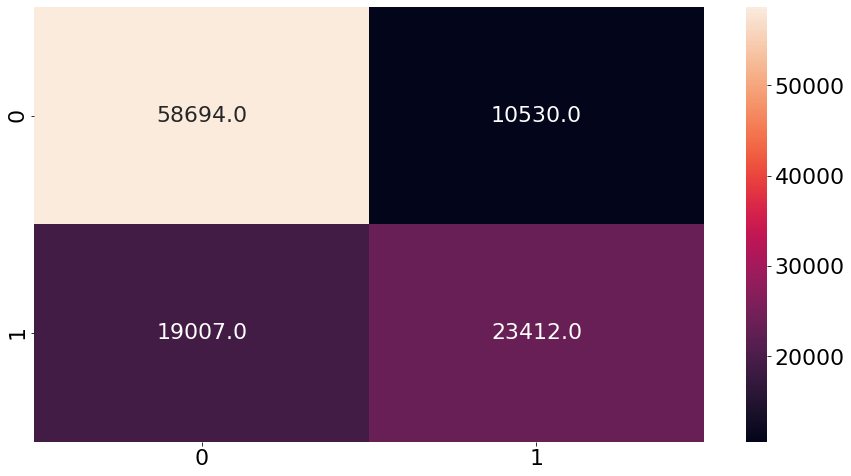

In [56]:
sns.heatmap(confusion_matrix(ytest,y_pred_rf),annot=True,fmt=".1f" )

In [14]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(xtrain,ytrain)

y_pred_dt = dt.predict(xtest)
y_train_dt = dt.predict(xtrain)
ypred_proba_dt = dt.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_dt))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_dt), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_dt))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_dt),'\n')

print(confusion_matrix(ytest,y_pred_dt),'\n')

print(classification_report(ytest,y_pred_dt))

Train Accuracy:  0.9980786800666416
Test Accuracy:  0.7009843877359082 

ROC-AUC Score:  0.6845373500162881
Cohen Cappa Score:  0.36707005186066843 

[[52241 16983]
 [16400 26019]] 

              precision    recall  f1-score   support

           0       0.76      0.75      0.76     69224
           1       0.61      0.61      0.61     42419

    accuracy                           0.70    111643
   macro avg       0.68      0.68      0.68    111643
weighted avg       0.70      0.70      0.70    111643



In [53]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=10)
xgb.fit(xtrain,ytrain)

y_pred_xgb = xgb.predict(xtest)
y_train_xgb = xgb.predict(xtrain)
ypred_proba_xgb = xgb.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_xgb))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_xgb), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_xgb))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_xgb),'\n')

print(confusion_matrix(ytest,y_pred_xgb),'\n')

print(classification_report(ytest,y_pred_xgb))

[06:37:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy:  0.7743120868490353
Test Accuracy:  0.7674999776071944 

ROC-AUC Score:  0.8255666380654205
Cohen Cappa Score:  0.4896651565670409 

[[59871  9353]
 [16604 25815]] 

              precision    recall  f1-score   support

           0       0.78      0.86      0.82     69224
           1       0.73      0.61      0.67     42419

    accuracy                           0.77    111643
   macro avg       0.76      0.74      0.74    111643
weighted avg       0.76      0.77      0.76    111643



<AxesSubplot:>

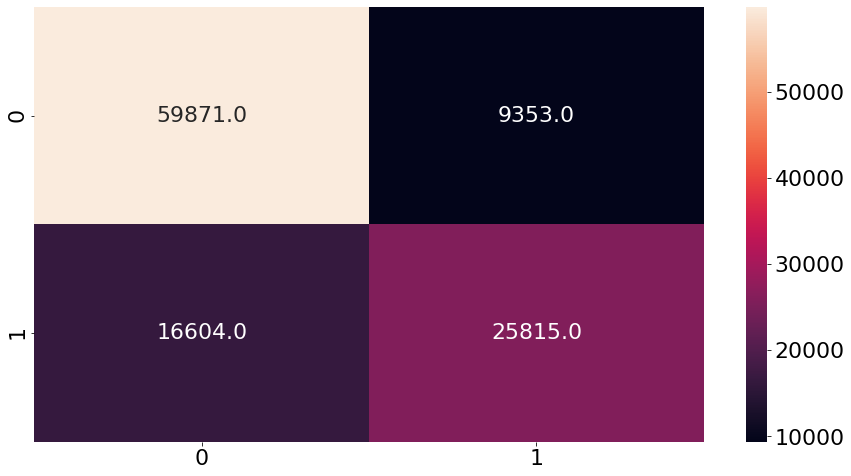

In [54]:
sns.heatmap(confusion_matrix(ytest,y_pred_xgb),annot=True,fmt=".1f" )

In [16]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(random_state=10)
cat.fit(xtrain,ytrain)

y_pred_cat = cat.predict(xtest)
y_train_cat = cat.predict(xtrain)
ypred_proba_cat = cat.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_cat))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_cat), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_cat))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_cat),'\n')

print(confusion_matrix(ytest,y_pred_cat),'\n')

print(classification_report(ytest,y_pred_cat))

Learning rate set to 0.139456
0:	learn: 0.6785687	total: 218ms	remaining: 3m 37s
1:	learn: 0.6662752	total: 278ms	remaining: 2m 18s
2:	learn: 0.6579006	total: 332ms	remaining: 1m 50s
3:	learn: 0.6509446	total: 385ms	remaining: 1m 35s
4:	learn: 0.6458738	total: 443ms	remaining: 1m 28s
5:	learn: 0.6404302	total: 506ms	remaining: 1m 23s
6:	learn: 0.6366234	total: 577ms	remaining: 1m 21s
7:	learn: 0.6337085	total: 639ms	remaining: 1m 19s
8:	learn: 0.6310049	total: 699ms	remaining: 1m 16s
9:	learn: 0.6291381	total: 758ms	remaining: 1m 15s
10:	learn: 0.6272597	total: 818ms	remaining: 1m 13s
11:	learn: 0.6248515	total: 875ms	remaining: 1m 12s
12:	learn: 0.6227261	total: 935ms	remaining: 1m 10s
13:	learn: 0.6215758	total: 995ms	remaining: 1m 10s
14:	learn: 0.6194418	total: 1.07s	remaining: 1m 10s
15:	learn: 0.6177764	total: 1.15s	remaining: 1m 10s
16:	learn: 0.6164345	total: 1.23s	remaining: 1m 10s
17:	learn: 0.6154126	total: 1.31s	remaining: 1m 11s
18:	learn: 0.6136201	total: 1.41s	remaining:

157:	learn: 0.5502198	total: 15.8s	remaining: 1m 24s
158:	learn: 0.5498984	total: 15.9s	remaining: 1m 24s
159:	learn: 0.5496336	total: 16s	remaining: 1m 24s
160:	learn: 0.5494352	total: 16.1s	remaining: 1m 24s
161:	learn: 0.5491413	total: 16.3s	remaining: 1m 24s
162:	learn: 0.5489388	total: 16.4s	remaining: 1m 24s
163:	learn: 0.5486869	total: 16.5s	remaining: 1m 23s
164:	learn: 0.5484936	total: 16.6s	remaining: 1m 23s
165:	learn: 0.5483370	total: 16.7s	remaining: 1m 23s
166:	learn: 0.5480446	total: 16.8s	remaining: 1m 23s
167:	learn: 0.5477857	total: 16.9s	remaining: 1m 23s
168:	learn: 0.5476637	total: 17s	remaining: 1m 23s
169:	learn: 0.5475628	total: 17.1s	remaining: 1m 23s
170:	learn: 0.5471872	total: 17.2s	remaining: 1m 23s
171:	learn: 0.5468976	total: 17.3s	remaining: 1m 23s
172:	learn: 0.5466997	total: 17.4s	remaining: 1m 23s
173:	learn: 0.5464829	total: 17.6s	remaining: 1m 23s
174:	learn: 0.5463595	total: 17.7s	remaining: 1m 23s
175:	learn: 0.5462617	total: 17.8s	remaining: 1m 2

315:	learn: 0.5250832	total: 32.6s	remaining: 1m 10s
316:	learn: 0.5248904	total: 32.7s	remaining: 1m 10s
317:	learn: 0.5247874	total: 32.8s	remaining: 1m 10s
318:	learn: 0.5247442	total: 33s	remaining: 1m 10s
319:	learn: 0.5246516	total: 33.1s	remaining: 1m 10s
320:	learn: 0.5245914	total: 33.1s	remaining: 1m 10s
321:	learn: 0.5244030	total: 33.2s	remaining: 1m 9s
322:	learn: 0.5242909	total: 33.3s	remaining: 1m 9s
323:	learn: 0.5239700	total: 33.4s	remaining: 1m 9s
324:	learn: 0.5238146	total: 33.4s	remaining: 1m 9s
325:	learn: 0.5236572	total: 33.5s	remaining: 1m 9s
326:	learn: 0.5234411	total: 33.6s	remaining: 1m 9s
327:	learn: 0.5234079	total: 33.7s	remaining: 1m 9s
328:	learn: 0.5233685	total: 33.8s	remaining: 1m 8s
329:	learn: 0.5232575	total: 33.8s	remaining: 1m 8s
330:	learn: 0.5231932	total: 33.9s	remaining: 1m 8s
331:	learn: 0.5231657	total: 34s	remaining: 1m 8s
332:	learn: 0.5229779	total: 34.1s	remaining: 1m 8s
333:	learn: 0.5228442	total: 34.1s	remaining: 1m 8s
334:	learn

475:	learn: 0.5103529	total: 46.3s	remaining: 50.9s
476:	learn: 0.5102086	total: 46.3s	remaining: 50.8s
477:	learn: 0.5101003	total: 46.4s	remaining: 50.7s
478:	learn: 0.5099113	total: 46.5s	remaining: 50.6s
479:	learn: 0.5098212	total: 46.6s	remaining: 50.4s
480:	learn: 0.5097898	total: 46.6s	remaining: 50.3s
481:	learn: 0.5096482	total: 46.7s	remaining: 50.2s
482:	learn: 0.5095582	total: 46.8s	remaining: 50.1s
483:	learn: 0.5095348	total: 46.9s	remaining: 50s
484:	learn: 0.5092982	total: 47s	remaining: 49.9s
485:	learn: 0.5092613	total: 47.1s	remaining: 49.8s
486:	learn: 0.5092079	total: 47.2s	remaining: 49.7s
487:	learn: 0.5091257	total: 47.3s	remaining: 49.6s
488:	learn: 0.5090807	total: 47.4s	remaining: 49.5s
489:	learn: 0.5089502	total: 47.4s	remaining: 49.4s
490:	learn: 0.5089307	total: 47.5s	remaining: 49.3s
491:	learn: 0.5088966	total: 47.6s	remaining: 49.2s
492:	learn: 0.5088269	total: 47.7s	remaining: 49.1s
493:	learn: 0.5087899	total: 47.8s	remaining: 49s
494:	learn: 0.5087

636:	learn: 0.5017617	total: 1m 1s	remaining: 34.8s
637:	learn: 0.5016809	total: 1m 1s	remaining: 34.7s
638:	learn: 0.5016082	total: 1m 1s	remaining: 34.6s
639:	learn: 0.5015861	total: 1m 1s	remaining: 34.5s
640:	learn: 0.5015100	total: 1m 1s	remaining: 34.4s
641:	learn: 0.5014811	total: 1m 1s	remaining: 34.3s
642:	learn: 0.5013959	total: 1m 1s	remaining: 34.2s
643:	learn: 0.5013707	total: 1m 1s	remaining: 34.1s
644:	learn: 0.5013472	total: 1m 1s	remaining: 34s
645:	learn: 0.5012899	total: 1m 1s	remaining: 33.8s
646:	learn: 0.5012672	total: 1m 1s	remaining: 33.7s
647:	learn: 0.5012434	total: 1m 1s	remaining: 33.6s
648:	learn: 0.5012161	total: 1m 1s	remaining: 33.5s
649:	learn: 0.5011236	total: 1m 2s	remaining: 33.4s
650:	learn: 0.5011044	total: 1m 2s	remaining: 33.3s
651:	learn: 0.5010732	total: 1m 2s	remaining: 33.2s
652:	learn: 0.5010144	total: 1m 2s	remaining: 33.1s
653:	learn: 0.5010001	total: 1m 2s	remaining: 33s
654:	learn: 0.5009764	total: 1m 2s	remaining: 32.9s
655:	learn: 0.50

796:	learn: 0.4946137	total: 1m 13s	remaining: 18.7s
797:	learn: 0.4945567	total: 1m 13s	remaining: 18.6s
798:	learn: 0.4945393	total: 1m 13s	remaining: 18.5s
799:	learn: 0.4945203	total: 1m 13s	remaining: 18.4s
800:	learn: 0.4945008	total: 1m 13s	remaining: 18.3s
801:	learn: 0.4944335	total: 1m 13s	remaining: 18.2s
802:	learn: 0.4943930	total: 1m 13s	remaining: 18.1s
803:	learn: 0.4943673	total: 1m 13s	remaining: 18s
804:	learn: 0.4942412	total: 1m 14s	remaining: 17.9s
805:	learn: 0.4941907	total: 1m 14s	remaining: 17.8s
806:	learn: 0.4941428	total: 1m 14s	remaining: 17.7s
807:	learn: 0.4941164	total: 1m 14s	remaining: 17.6s
808:	learn: 0.4940950	total: 1m 14s	remaining: 17.5s
809:	learn: 0.4940705	total: 1m 14s	remaining: 17.4s
810:	learn: 0.4939192	total: 1m 14s	remaining: 17.4s
811:	learn: 0.4938955	total: 1m 14s	remaining: 17.3s
812:	learn: 0.4938770	total: 1m 14s	remaining: 17.2s
813:	learn: 0.4938192	total: 1m 14s	remaining: 17.1s
814:	learn: 0.4938034	total: 1m 14s	remaining: 1

954:	learn: 0.4887416	total: 1m 24s	remaining: 3.99s
955:	learn: 0.4886699	total: 1m 24s	remaining: 3.9s
956:	learn: 0.4886578	total: 1m 24s	remaining: 3.81s
957:	learn: 0.4886381	total: 1m 24s	remaining: 3.73s
958:	learn: 0.4886130	total: 1m 25s	remaining: 3.64s
959:	learn: 0.4885983	total: 1m 25s	remaining: 3.55s
960:	learn: 0.4885792	total: 1m 25s	remaining: 3.46s
961:	learn: 0.4885451	total: 1m 25s	remaining: 3.37s
962:	learn: 0.4884734	total: 1m 25s	remaining: 3.28s
963:	learn: 0.4884489	total: 1m 25s	remaining: 3.19s
964:	learn: 0.4884248	total: 1m 25s	remaining: 3.1s
965:	learn: 0.4884073	total: 1m 25s	remaining: 3.01s
966:	learn: 0.4883636	total: 1m 25s	remaining: 2.92s
967:	learn: 0.4883460	total: 1m 25s	remaining: 2.83s
968:	learn: 0.4882925	total: 1m 25s	remaining: 2.74s
969:	learn: 0.4882176	total: 1m 25s	remaining: 2.65s
970:	learn: 0.4881968	total: 1m 25s	remaining: 2.56s
971:	learn: 0.4881786	total: 1m 25s	remaining: 2.48s
972:	learn: 0.4881433	total: 1m 26s	remaining: 2

In [17]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=10)
lgb.fit(xtrain,ytrain)

y_pred_lgb = lgb.predict(xtest)
y_train_lgb = lgb.predict(xtrain)
ypred_proba_lgb = lgb.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_lgb))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_lgb), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_lgb))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_lgb),'\n')

print(confusion_matrix(ytest,y_pred_lgb),'\n')

print(classification_report(ytest,y_pred_lgb))

Train Accuracy:  0.7471314559036921
Test Accuracy:  0.7463790833281083 

ROC-AUC Score:  0.7982206269839325
Cohen Cappa Score:  0.4310693603841773 

[[60970  8254]
 [20061 22358]] 

              precision    recall  f1-score   support

           0       0.75      0.88      0.81     69224
           1       0.73      0.53      0.61     42419

    accuracy                           0.75    111643
   macro avg       0.74      0.70      0.71    111643
weighted avg       0.74      0.75      0.74    111643



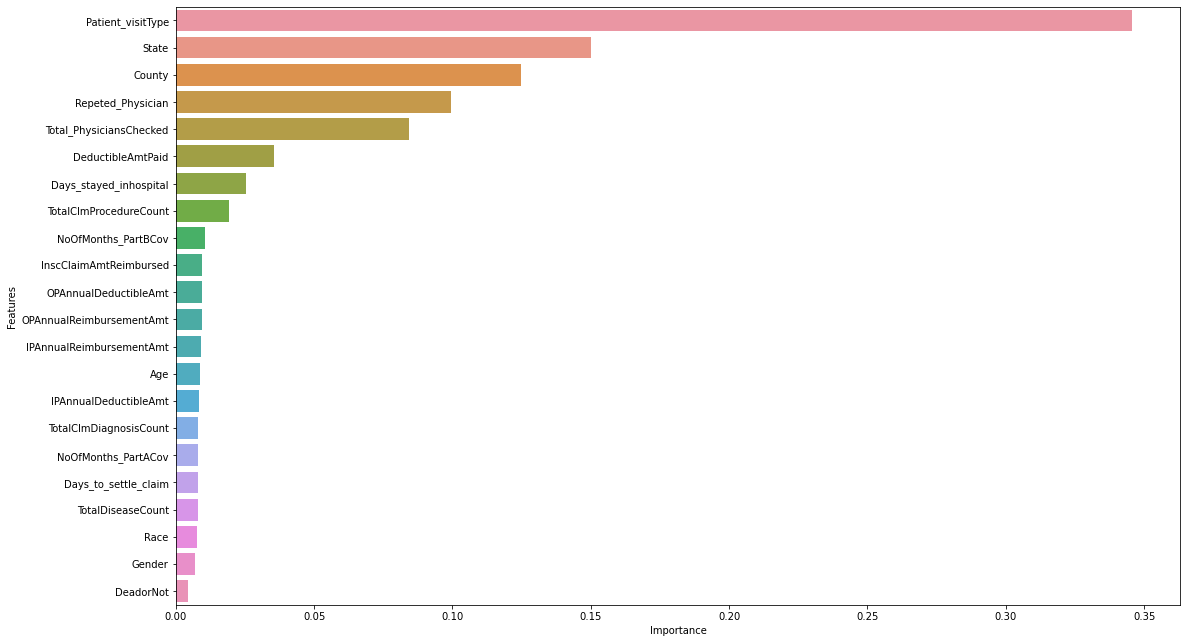

In [10]:
plt.figure(figsize=(18,11))
feature_imp = pd.DataFrame({'Features':xtrain.columns,
             'Importance':xgb.feature_importances_}).sort_values('Importance',ascending=False)
sns.barplot(x= 'Importance', y= 'Features',data= feature_imp)
plt.show()

In [11]:
final_df.columns

Index(['PotentialFraud', 'ClaimID', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'Gender', 'Race', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'Days_stayed_inhospital', 'Patient_visitType', 'DeadorNot',
       'Days_to_settle_claim', 'Total_PhysiciansChecked', 'Repeted_Physician',
       'TotalClmDiagnosisCount', 'TotalClmProcedureCount',
       'TotalDiseaseCount'],
      dtype='object')

## Selecting the best features and run the model

## selecting top 8 features from the Xg Boost model

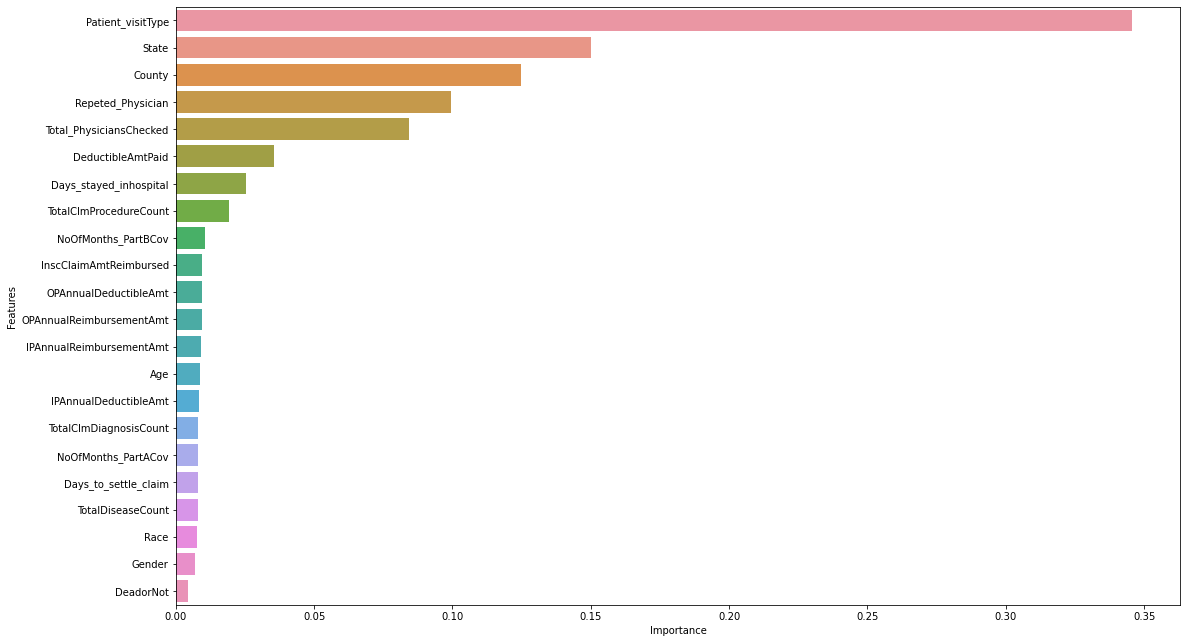

In [11]:
plt.figure(figsize=(18,11))
feature_imp = pd.DataFrame({'Features':xtrain.columns,
             'Importance':xgb.feature_importances_}).sort_values('Importance',ascending=False)
sns.barplot(x= 'Importance', y= 'Features',data= feature_imp)
plt.show()

In [30]:
final_df.columns

Index(['PotentialFraud', 'ClaimID', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'Gender', 'Race', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'Days_stayed_inhospital', 'Patient_visitType', 'DeadorNot',
       'Days_to_settle_claim', 'Total_PhysiciansChecked', 'Repeted_Physician',
       'TotalClmDiagnosisCount', 'TotalClmProcedureCount',
       'TotalDiseaseCount'],
      dtype='object')

In [57]:
df5_xgb = final_df[['PotentialFraud','Patient_visitType','State','County','Repeted_Physician','Total_PhysiciansChecked','DeductibleAmtPaid','Days_stayed_inhospital','TotalClmProcedureCount']]
df5_xgb.head(2)

PotentialFraud  Patient_visitType  State  County  Repeted_Physician  \
0               0                0.0      1     410                0.0   
1               0                1.0      1     510                0.0   

   Total_PhysiciansChecked  DeductibleAmtPaid  Days_stayed_inhospital  \
0                        2                0.0                     0.0   
1                        1             1068.0                     4.0   

   TotalClmProcedureCount  
0                       0  
1                       0

## Tune the model with Top 8 features

### Model Choosen : XGB

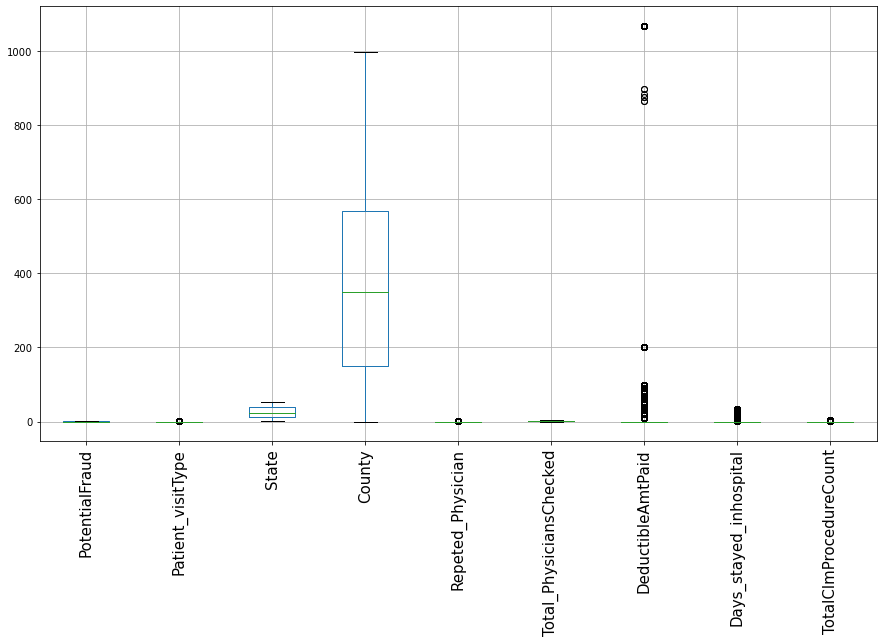

In [12]:
plt.figure(figsize = (15,8))
df5_xgb.boxplot()

plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [33]:
# sns.pairplot(df5_xgb, diag_kind='kde')

## Scaling

### As most of the features are skewed , not normally distributed so will go for min-max scaler

In [34]:
df5_xgb.shape

(558211, 9)

In [58]:
X = df5_xgb.drop(['PotentialFraud'],axis=1)
y = df5_xgb['PotentialFraud']

xtrain,xtest,ytrain,ytest = train_test_split(X,y, train_size=0.8,random_state=10 )

In [59]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

scaled_xtrain = mm.fit_transform(xtrain)
scaled_xtrain = pd.DataFrame(scaled_xtrain, columns= xtrain.columns)

In [60]:
scaled_xtest= mm.transform(xtest)
scaled_xtest = pd.DataFrame(scaled_xtest, columns= xtest.columns)

In [9]:
scaled_xtrain.head()

Patient_visitType     State    County  Repeted_Physician  \
0                0.0  0.962264  0.510511                0.0   
1                0.0  0.452830  0.290290                0.0   
2                0.0  0.566038  0.350350                0.0   
3                0.0  0.377358  0.150150                1.0   
4                0.0  0.660377  0.760761                0.0   

   Total_PhysiciansChecked  DeductibleAmtPaid  Days_stayed_inhospital  \
0                 0.333333                0.0                     0.0   
1                 0.333333                0.0                     0.0   
2                 0.333333                0.0                     0.0   
3                 1.000000                0.0                     0.0   
4                 0.333333                0.0                     0.0   

   TotalClmProcedureCount  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0

In [10]:
rf_sacled = RandomForestClassifier(random_state=100)
rf_sacled.fit(scaled_xtrain,ytrain)

y_pred_rf_scaled = rf_sacled.predict(scaled_xtest)
y_pred_train_scaled = rf_sacled.predict(scaled_xtrain)
ypred_proba_rf = rf_sacled.predict_proba(scaled_xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_pred_train_scaled))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_rf_scaled), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,y_pred_rf_scaled))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_rf_scaled),'\n')

print(confusion_matrix(ytest,y_pred_rf_scaled),'\n')

print(classification_report(ytest,y_pred_rf_scaled))

Train Accuracy:  0.8164176564375414
Test Accuracy:  0.7800757772542838 

ROC-AUC Score:  0.7600705459178116
Cohen Cappa Score:  0.5270474904595046 

[[58383 10841]
 [13712 28707]] 

              precision    recall  f1-score   support

           0       0.81      0.84      0.83     69224
           1       0.73      0.68      0.70     42419

    accuracy                           0.78    111643
   macro avg       0.77      0.76      0.76    111643
weighted avg       0.78      0.78      0.78    111643



In [5]:
### Without scaling

rf10 = RandomForestClassifier(random_state=10)
rf10.fit(xtrain,ytrain)

y_pred_rf = rf10.predict(xtest)
y_train_rf = rf10.predict(xtrain)
ypred_proba_rf = rf10.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_rf))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_rf), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_rf))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_rf),'\n')

print(confusion_matrix(ytest,y_pred_rf),'\n')

print(classification_report(ytest,y_pred_rf))

Train Accuracy:  0.8163997420325684
Test Accuracy:  0.7800578630097722 

ROC-AUC Score:  0.8450121461734943
Cohen Cappa Score:  0.5258467359219108 

[[58647 10577]
 [13978 28441]] 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     69224
           1       0.73      0.67      0.70     42419

    accuracy                           0.78    111643
   macro avg       0.77      0.76      0.76    111643
weighted avg       0.78      0.78      0.78    111643



In [11]:
from xgboost import XGBClassifier
xgb_scaled = XGBClassifier(random_state=10)
xgb_scaled.fit(scaled_xtrain,ytrain)

y_pred_xgb_scaled = xgb_scaled.predict(scaled_xtest)
y_train_xgb_scaled = xgb_scaled.predict(scaled_xtrain)
ypred_proba_xgb = xgb_scaled.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_xgb_scaled))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_xgb_scaled), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_xgb))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_xgb_scaled),'\n')

print(confusion_matrix(ytest,y_pred_xgb_scaled),'\n')

print(classification_report(ytest,y_pred_xgb_scaled))

[21:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy:  0.7773418605901005
Test Accuracy:  0.7747015039008267 

ROC-AUC Score:  0.4978129723867412
Cohen Cappa Score:  0.5069990629186791 

[[59945  9279]
 [15874 26545]] 

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     69224
           1       0.74      0.63      0.68     42419

    accuracy                           0.77    111643
   macro avg       0.77      0.75      0.75    111643
weighted avg       0.77      0.77      0.77    111643



In [6]:
## Without scaling

from xgboost import XGBClassifier
xgb10 = XGBClassifier(random_state=10)
xgb10.fit(xtrain,ytrain)

y_pred_xgb = xgb10.predict(xtest)
y_train_xgb = xgb10.predict(xtrain)
ypred_proba_xgb = xgb10.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_xgb))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_xgb), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_xgb))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_xgb),'\n')

print(confusion_matrix(ytest,y_pred_xgb),'\n')

print(classification_report(ytest,y_pred_xgb))

[21:29:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy:  0.7773418605901005
Test Accuracy:  0.7747015039008267 

ROC-AUC Score:  0.8344306591606886
Cohen Cappa Score:  0.5069990629186791 

[[59945  9279]
 [15874 26545]] 

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     69224
           1       0.74      0.63      0.68     42419

    accuracy                           0.77    111643
   macro avg       0.77      0.75      0.75    111643
weighted avg       0.77      0.77      0.77    111643



### Scaling dosent make any significant difference so we will run a grid search with the best 8 features

In [43]:
## Unable to run it for Lack of Computational resources

# from sklearn.model_selection import KFold, GridSearchCV

# params = {'n_estimators': [10,20],
#          'max_depth': range(1,10),
#          'criterion': ['gini','entropy'],
#          'min_samples_split':[5,10,15],
#          'min_samples_leaf':[5,10,15]
#          }

# rf = RandomForestClassifier(random_state = 10)

# rfcv = GridSearchCV(rf10,params, cv=5, scoring = 'accuracy')
# rfcv.fit(xtrain, ytrain)

# rfcv.best_params_

## We select XGB as the best model and and we will tune the model

## RandomizedSearch CV

In [13]:
from sklearn.model_selection import RandomizedSearchCV

In [18]:
params = {'n_estimators': [50,150,200,300],
         'max_depth': [12,18,25,30],
         'criterion': ['gini','entropy'],
         'min_samples_split':[5,10,15,18],
         'min_samples_leaf':[5,10,15,18]
         }

rf = RandomForestClassifier(random_state = 10)

randmcv = RandomizedSearchCV(estimator=rf, param_distributions = params,
                               cv = 5, n_iter = 10, n_jobs=-1)


randmcv.fit(xtrain, ytrain)

randmcv.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 18,
 'criterion': 'entropy'}

In [21]:
rf_sacled = RandomForestClassifier(n_estimators=300,max_depth=18,criterion='entropy',min_samples_leaf=5,min_samples_split=18,random_state=100)
rf_sacled.fit(scaled_xtrain,ytrain)

y_pred_rf_scaled = rf_sacled.predict(scaled_xtest)
y_pred_train_scaled = rf_sacled.predict(scaled_xtrain)
ypred_proba_rf = rf_sacled.predict_proba(scaled_xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_pred_train_scaled))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_rf_scaled), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,y_pred_rf_scaled))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_rf_scaled),'\n')

print(confusion_matrix(ytest,y_pred_rf_scaled),'\n')

print(classification_report(ytest,y_pred_rf_scaled))

Train Accuracy:  0.7500716576198921
Test Accuracy:  0.7437725607516817 

ROC-AUC Score:  0.6952268759921272
Cohen Cappa Score:  0.41792985987973685 

[[62123  7101]
 [21505 20914]] 

              precision    recall  f1-score   support

           0       0.74      0.90      0.81     69224
           1       0.75      0.49      0.59     42419

    accuracy                           0.74    111643
   macro avg       0.74      0.70      0.70    111643
weighted avg       0.74      0.74      0.73    111643



In [16]:
### Without scaling

rf10 = RandomForestClassifier(n_estimators=50,max_depth=12,criterion='entropy',min_samples_leaf=15,min_samples_split=15,random_state=10)
rf10.fit(xtrain,ytrain)

y_pred_rf = rf10.predict(xtest)
y_train_rf = rf10.predict(xtrain)
ypred_proba_rf = rf10.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_rf))
print ('Test Accuracy: ',accuracy_score(ytest,y_pred_rf), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_rf))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,y_pred_rf),'\n')

print(confusion_matrix(ytest,y_pred_rf),'\n')

print(classification_report(ytest,y_pred_rf))

Train Accuracy:  0.6888043926120994
Test Accuracy:  0.6876830611861021 

ROC-AUC Score:  0.7244546049283473
Cohen Cappa Score:  0.2651516251487993 

[[62524  6700]
 [28168 14251]] 

              precision    recall  f1-score   support

           0       0.69      0.90      0.78     69224
           1       0.68      0.34      0.45     42419

    accuracy                           0.69    111643
   macro avg       0.68      0.62      0.62    111643
weighted avg       0.69      0.69      0.66    111643



## Bagging Classifier

In [19]:
from sklearn.ensemble import BaggingClassifier
rf =RandomForestClassifier()

bc = BaggingClassifier(base_estimator =rf, random_state=10)

bc.fit(xtrain,ytrain)
ypred_bc = bc.predict(xtest)
y_train_bc = bc.predict(xtrain)
ypred_proba_bc = bc.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_bc))
print ('Test Accuracy: ',accuracy_score(ytest,ypred_bc), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_bc))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,ypred_bc),'\n')

print(confusion_matrix(ytest,ypred_bc),'\n')
print(classification_report(ytest,ypred_bc))

Train Accuracy:  0.8127519213199333
Test Accuracy:  0.7811595890472309 

ROC-AUC Score:  0.8470870144903084
Cohen Cappa Score:  0.528228408654425 

[[58707 10517]
 [13915 28504]] 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     69224
           1       0.73      0.67      0.70     42419

    accuracy                           0.78    111643
   macro avg       0.77      0.76      0.76    111643
weighted avg       0.78      0.78      0.78    111643



In [20]:
bc = BaggingClassifier(base_estimator =rf, random_state=10)

bc.fit(scaled_xtrain,ytrain)
ypred_bc = bc.predict(scaled_xtest)
y_train_bc = bc.predict(scaled_xtrain)
ypred_proba_bc = bc.predict_proba(scaled_xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_bc))
print ('Test Accuracy: ',accuracy_score(ytest,ypred_bc), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_bc))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,ypred_bc),'\n')

print(confusion_matrix(ytest,ypred_bc),'\n')

print(classification_report(ytest,ypred_bc))

Train Accuracy:  0.8127563999211767
Test Accuracy:  0.7810879320691848 

ROC-AUC Score:  0.847082777007158
Cohen Cappa Score:  0.5280739320364336 

[[58703 10521]
 [13919 28500]] 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     69224
           1       0.73      0.67      0.70     42419

    accuracy                           0.78    111643
   macro avg       0.77      0.76      0.76    111643
weighted avg       0.78      0.78      0.78    111643



In [22]:
bc = BaggingClassifier(base_estimator =xgb, random_state=10)

bc.fit(scaled_xtrain,ytrain)
ypred_bc = bc.predict(scaled_xtest)
y_train_bc = bc.predict(scaled_xtrain)
ypred_proba_bc = bc.predict_proba(scaled_xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_bc))
print ('Test Accuracy: ',accuracy_score(ytest,ypred_bc), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_bc))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,ypred_bc),'\n')

print(confusion_matrix(ytest,ypred_bc),'\n')

print(classification_report(ytest,ypred_bc))

[23:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## Stacking Classifier

In [32]:
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
cat = CatBoostClassifier(random_state=42)

base_learners = [('DT Model',dt),
                ('RF Model',rf),
                ('CatB Model',cat),
                ('XGB Model', xgb)]

stack_model = StackingClassifier(estimators=base_learners, final_estimator=xgb)

stack_model.fit(xtrain, ytrain)
ypred_stack = stack_model.predict(xtest)
y_train_stack = bc.predict(xtrain)
ypred_proba_stack = bc.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_stack))
print ('Test Accuracy: ',accuracy_score(ytest,ypred_stack), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_stack))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,ypred_stack),'\n')

print(confusion_matrix(ytest,ypred_stack),'\n')

print(classification_report(ytest,ypred_stack))

Learning rate set to 0.139456
0:	learn: 0.6781804	total: 56.3ms	remaining: 56.2s
1:	learn: 0.6663916	total: 97.8ms	remaining: 48.8s
2:	learn: 0.6581340	total: 138ms	remaining: 45.7s
3:	learn: 0.6507492	total: 176ms	remaining: 43.9s
4:	learn: 0.6454095	total: 222ms	remaining: 44.1s
5:	learn: 0.6401231	total: 263ms	remaining: 43.6s
6:	learn: 0.6362593	total: 308ms	remaining: 43.7s
7:	learn: 0.6332199	total: 346ms	remaining: 42.9s
8:	learn: 0.6310719	total: 386ms	remaining: 42.5s
9:	learn: 0.6288032	total: 429ms	remaining: 42.4s
10:	learn: 0.6264507	total: 470ms	remaining: 42.2s
11:	learn: 0.6241496	total: 511ms	remaining: 42.1s
12:	learn: 0.6225619	total: 547ms	remaining: 41.6s
13:	learn: 0.6204824	total: 588ms	remaining: 41.4s
14:	learn: 0.6189798	total: 639ms	remaining: 41.9s
15:	learn: 0.6180186	total: 677ms	remaining: 41.6s
16:	learn: 0.6172368	total: 718ms	remaining: 41.5s
17:	learn: 0.6158812	total: 761ms	remaining: 41.5s
18:	learn: 0.6140077	total: 807ms	remaining: 41.7s
19:	learn

163:	learn: 0.5471790	total: 10s	remaining: 51.1s
164:	learn: 0.5470605	total: 10.1s	remaining: 51s
165:	learn: 0.5466937	total: 10.1s	remaining: 51s
166:	learn: 0.5465987	total: 10.2s	remaining: 50.9s
167:	learn: 0.5464212	total: 10.3s	remaining: 50.8s
168:	learn: 0.5460873	total: 10.3s	remaining: 50.8s
169:	learn: 0.5459840	total: 10.4s	remaining: 50.8s
170:	learn: 0.5456495	total: 10.5s	remaining: 50.8s
171:	learn: 0.5454217	total: 10.5s	remaining: 50.8s
172:	learn: 0.5452926	total: 10.6s	remaining: 50.7s
173:	learn: 0.5450397	total: 10.7s	remaining: 50.7s
174:	learn: 0.5448351	total: 10.7s	remaining: 50.6s
175:	learn: 0.5447459	total: 10.8s	remaining: 50.6s
176:	learn: 0.5445676	total: 10.9s	remaining: 50.5s
177:	learn: 0.5441434	total: 10.9s	remaining: 50.5s
178:	learn: 0.5438264	total: 11s	remaining: 50.4s
179:	learn: 0.5434781	total: 11.1s	remaining: 50.4s
180:	learn: 0.5432203	total: 11.1s	remaining: 50.4s
181:	learn: 0.5428299	total: 11.2s	remaining: 50.3s
182:	learn: 0.542721

322:	learn: 0.5191897	total: 19.7s	remaining: 41.4s
323:	learn: 0.5191250	total: 19.8s	remaining: 41.3s
324:	learn: 0.5189839	total: 19.9s	remaining: 41.2s
325:	learn: 0.5189241	total: 19.9s	remaining: 41.2s
326:	learn: 0.5188640	total: 20s	remaining: 41.1s
327:	learn: 0.5186415	total: 20s	remaining: 41s
328:	learn: 0.5183512	total: 20.1s	remaining: 41s
329:	learn: 0.5181690	total: 20.2s	remaining: 40.9s
330:	learn: 0.5181135	total: 20.2s	remaining: 40.9s
331:	learn: 0.5180590	total: 20.3s	remaining: 40.8s
332:	learn: 0.5179904	total: 20.3s	remaining: 40.7s
333:	learn: 0.5178959	total: 20.4s	remaining: 40.7s
334:	learn: 0.5178397	total: 20.5s	remaining: 40.6s
335:	learn: 0.5177060	total: 20.5s	remaining: 40.6s
336:	learn: 0.5172990	total: 20.6s	remaining: 40.5s
337:	learn: 0.5172363	total: 20.7s	remaining: 40.5s
338:	learn: 0.5170463	total: 20.7s	remaining: 40.4s
339:	learn: 0.5168441	total: 20.8s	remaining: 40.4s
340:	learn: 0.5167599	total: 20.9s	remaining: 40.3s
341:	learn: 0.516502

483:	learn: 0.5031959	total: 29.3s	remaining: 31.3s
484:	learn: 0.5031010	total: 29.4s	remaining: 31.2s
485:	learn: 0.5029498	total: 29.4s	remaining: 31.1s
486:	learn: 0.5029184	total: 29.5s	remaining: 31.1s
487:	learn: 0.5028162	total: 29.6s	remaining: 31s
488:	learn: 0.5026921	total: 29.6s	remaining: 30.9s
489:	learn: 0.5026338	total: 29.7s	remaining: 30.9s
490:	learn: 0.5025826	total: 29.7s	remaining: 30.8s
491:	learn: 0.5025224	total: 29.8s	remaining: 30.8s
492:	learn: 0.5024312	total: 29.9s	remaining: 30.7s
493:	learn: 0.5023534	total: 29.9s	remaining: 30.7s
494:	learn: 0.5021434	total: 30s	remaining: 30.6s
495:	learn: 0.5020646	total: 30.1s	remaining: 30.5s
496:	learn: 0.5019861	total: 30.1s	remaining: 30.5s
497:	learn: 0.5018847	total: 30.2s	remaining: 30.4s
498:	learn: 0.5018265	total: 30.2s	remaining: 30.4s
499:	learn: 0.5016715	total: 30.3s	remaining: 30.3s
500:	learn: 0.5016137	total: 30.4s	remaining: 30.2s
501:	learn: 0.5015782	total: 30.4s	remaining: 30.2s
502:	learn: 0.50

643:	learn: 0.4930055	total: 39.1s	remaining: 21.6s
644:	learn: 0.4929445	total: 39.2s	remaining: 21.5s
645:	learn: 0.4929252	total: 39.2s	remaining: 21.5s
646:	learn: 0.4928847	total: 39.3s	remaining: 21.4s
647:	learn: 0.4928662	total: 39.3s	remaining: 21.4s
648:	learn: 0.4927867	total: 39.4s	remaining: 21.3s
649:	learn: 0.4927156	total: 39.4s	remaining: 21.2s
650:	learn: 0.4926947	total: 39.5s	remaining: 21.2s
651:	learn: 0.4926688	total: 39.6s	remaining: 21.1s
652:	learn: 0.4926363	total: 39.6s	remaining: 21s
653:	learn: 0.4926206	total: 39.7s	remaining: 21s
654:	learn: 0.4925378	total: 39.7s	remaining: 20.9s
655:	learn: 0.4924833	total: 39.8s	remaining: 20.9s
656:	learn: 0.4923008	total: 39.8s	remaining: 20.8s
657:	learn: 0.4922858	total: 39.9s	remaining: 20.7s
658:	learn: 0.4922449	total: 39.9s	remaining: 20.7s
659:	learn: 0.4921791	total: 40s	remaining: 20.6s
660:	learn: 0.4921583	total: 40.1s	remaining: 20.5s
661:	learn: 0.4921415	total: 40.1s	remaining: 20.5s
662:	learn: 0.4920

805:	learn: 0.4860657	total: 48.7s	remaining: 11.7s
806:	learn: 0.4860485	total: 48.7s	remaining: 11.7s
807:	learn: 0.4859690	total: 48.8s	remaining: 11.6s
808:	learn: 0.4859184	total: 48.8s	remaining: 11.5s
809:	learn: 0.4858764	total: 48.9s	remaining: 11.5s
810:	learn: 0.4858649	total: 48.9s	remaining: 11.4s
811:	learn: 0.4858379	total: 49s	remaining: 11.3s
812:	learn: 0.4858169	total: 49.1s	remaining: 11.3s
813:	learn: 0.4857665	total: 49.1s	remaining: 11.2s
814:	learn: 0.4857393	total: 49.2s	remaining: 11.2s
815:	learn: 0.4856415	total: 49.2s	remaining: 11.1s
816:	learn: 0.4856008	total: 49.3s	remaining: 11s
817:	learn: 0.4855710	total: 49.3s	remaining: 11s
818:	learn: 0.4855526	total: 49.4s	remaining: 10.9s
819:	learn: 0.4855221	total: 49.4s	remaining: 10.8s
820:	learn: 0.4855126	total: 49.5s	remaining: 10.8s
821:	learn: 0.4854784	total: 49.6s	remaining: 10.7s
822:	learn: 0.4854349	total: 49.6s	remaining: 10.7s
823:	learn: 0.4854178	total: 49.7s	remaining: 10.6s
824:	learn: 0.4854

964:	learn: 0.4809230	total: 58s	remaining: 2.1s
965:	learn: 0.4808555	total: 58s	remaining: 2.04s
966:	learn: 0.4808252	total: 58.1s	remaining: 1.98s
967:	learn: 0.4808168	total: 58.2s	remaining: 1.92s
968:	learn: 0.4807987	total: 58.2s	remaining: 1.86s
969:	learn: 0.4807894	total: 58.3s	remaining: 1.8s
970:	learn: 0.4807658	total: 58.3s	remaining: 1.74s
971:	learn: 0.4807061	total: 58.4s	remaining: 1.68s
972:	learn: 0.4806788	total: 58.4s	remaining: 1.62s
973:	learn: 0.4806671	total: 58.5s	remaining: 1.56s
974:	learn: 0.4806160	total: 58.6s	remaining: 1.5s
975:	learn: 0.4805558	total: 58.6s	remaining: 1.44s
976:	learn: 0.4805100	total: 58.7s	remaining: 1.38s
977:	learn: 0.4804311	total: 58.7s	remaining: 1.32s
978:	learn: 0.4803842	total: 58.8s	remaining: 1.26s
979:	learn: 0.4803631	total: 58.9s	remaining: 1.2s
980:	learn: 0.4803417	total: 58.9s	remaining: 1.14s
981:	learn: 0.4803109	total: 59s	remaining: 1.08s
982:	learn: 0.4802750	total: 59s	remaining: 1.02s
983:	learn: 0.4801957	to

119:	learn: 0.5632337	total: 5.88s	remaining: 43.2s
120:	learn: 0.5630818	total: 5.94s	remaining: 43.1s
121:	learn: 0.5626596	total: 6s	remaining: 43.2s
122:	learn: 0.5624329	total: 6.06s	remaining: 43.2s
123:	learn: 0.5621265	total: 6.12s	remaining: 43.2s
124:	learn: 0.5617672	total: 6.18s	remaining: 43.2s
125:	learn: 0.5616561	total: 6.24s	remaining: 43.3s
126:	learn: 0.5613804	total: 6.29s	remaining: 43.2s
127:	learn: 0.5608990	total: 6.34s	remaining: 43.2s
128:	learn: 0.5605891	total: 6.39s	remaining: 43.2s
129:	learn: 0.5603326	total: 6.44s	remaining: 43.1s
130:	learn: 0.5602237	total: 6.5s	remaining: 43.1s
131:	learn: 0.5599529	total: 6.54s	remaining: 43s
132:	learn: 0.5598528	total: 6.58s	remaining: 42.9s
133:	learn: 0.5594014	total: 6.63s	remaining: 42.8s
134:	learn: 0.5590036	total: 6.67s	remaining: 42.8s
135:	learn: 0.5588243	total: 6.72s	remaining: 42.7s
136:	learn: 0.5586539	total: 6.77s	remaining: 42.6s
137:	learn: 0.5585577	total: 6.82s	remaining: 42.6s
138:	learn: 0.5583

279:	learn: 0.5301949	total: 14s	remaining: 35.9s
280:	learn: 0.5300432	total: 14s	remaining: 35.9s
281:	learn: 0.5299859	total: 14.1s	remaining: 35.9s
282:	learn: 0.5296969	total: 14.1s	remaining: 35.8s
283:	learn: 0.5295646	total: 14.3s	remaining: 35.9s
284:	learn: 0.5294943	total: 14.4s	remaining: 36s
285:	learn: 0.5294633	total: 14.4s	remaining: 36s
286:	learn: 0.5293041	total: 14.5s	remaining: 36s
287:	learn: 0.5292138	total: 14.6s	remaining: 36s
288:	learn: 0.5291089	total: 14.6s	remaining: 36s
289:	learn: 0.5289015	total: 14.7s	remaining: 35.9s
290:	learn: 0.5288010	total: 14.7s	remaining: 35.9s
291:	learn: 0.5285365	total: 14.8s	remaining: 35.9s
292:	learn: 0.5284628	total: 14.8s	remaining: 35.8s
293:	learn: 0.5282928	total: 14.9s	remaining: 35.8s
294:	learn: 0.5281082	total: 15s	remaining: 35.8s
295:	learn: 0.5279775	total: 15s	remaining: 35.7s
296:	learn: 0.5278824	total: 15.1s	remaining: 35.7s
297:	learn: 0.5278035	total: 15.1s	remaining: 35.6s
298:	learn: 0.5276924	total: 1

440:	learn: 0.5111299	total: 22.9s	remaining: 29.1s
441:	learn: 0.5110590	total: 23s	remaining: 29s
442:	learn: 0.5109073	total: 23s	remaining: 29s
443:	learn: 0.5108737	total: 23.1s	remaining: 28.9s
444:	learn: 0.5107778	total: 23.1s	remaining: 28.8s
445:	learn: 0.5106896	total: 23.2s	remaining: 28.8s
446:	learn: 0.5105429	total: 23.2s	remaining: 28.7s
447:	learn: 0.5103808	total: 23.3s	remaining: 28.7s
448:	learn: 0.5102834	total: 23.3s	remaining: 28.6s
449:	learn: 0.5101205	total: 23.4s	remaining: 28.6s
450:	learn: 0.5100094	total: 23.4s	remaining: 28.5s
451:	learn: 0.5098784	total: 23.5s	remaining: 28.5s
452:	learn: 0.5098483	total: 23.6s	remaining: 28.4s
453:	learn: 0.5096606	total: 23.6s	remaining: 28.4s
454:	learn: 0.5095751	total: 23.7s	remaining: 28.3s
455:	learn: 0.5095007	total: 23.7s	remaining: 28.3s
456:	learn: 0.5093702	total: 23.8s	remaining: 28.2s
457:	learn: 0.5093594	total: 23.8s	remaining: 28.2s
458:	learn: 0.5093305	total: 23.8s	remaining: 28.1s
459:	learn: 0.509225

602:	learn: 0.4995490	total: 31.5s	remaining: 20.7s
603:	learn: 0.4995312	total: 31.5s	remaining: 20.7s
604:	learn: 0.4994754	total: 31.6s	remaining: 20.6s
605:	learn: 0.4994410	total: 31.6s	remaining: 20.6s
606:	learn: 0.4994328	total: 31.7s	remaining: 20.5s
607:	learn: 0.4993518	total: 31.7s	remaining: 20.5s
608:	learn: 0.4993128	total: 31.8s	remaining: 20.4s
609:	learn: 0.4992538	total: 31.8s	remaining: 20.3s
610:	learn: 0.4992038	total: 31.9s	remaining: 20.3s
611:	learn: 0.4991719	total: 31.9s	remaining: 20.2s
612:	learn: 0.4990917	total: 32s	remaining: 20.2s
613:	learn: 0.4990113	total: 32s	remaining: 20.1s
614:	learn: 0.4989209	total: 32s	remaining: 20.1s
615:	learn: 0.4988904	total: 32.1s	remaining: 20s
616:	learn: 0.4988401	total: 32.1s	remaining: 19.9s
617:	learn: 0.4987906	total: 32.2s	remaining: 19.9s
618:	learn: 0.4987608	total: 32.2s	remaining: 19.8s
619:	learn: 0.4987416	total: 32.3s	remaining: 19.8s
620:	learn: 0.4987079	total: 32.3s	remaining: 19.7s
621:	learn: 0.498603

763:	learn: 0.4909391	total: 39.6s	remaining: 12.2s
764:	learn: 0.4908918	total: 39.7s	remaining: 12.2s
765:	learn: 0.4908477	total: 39.7s	remaining: 12.1s
766:	learn: 0.4907629	total: 39.8s	remaining: 12.1s
767:	learn: 0.4907188	total: 39.8s	remaining: 12s
768:	learn: 0.4906852	total: 39.9s	remaining: 12s
769:	learn: 0.4906655	total: 39.9s	remaining: 11.9s
770:	learn: 0.4906331	total: 40s	remaining: 11.9s
771:	learn: 0.4906124	total: 40s	remaining: 11.8s
772:	learn: 0.4906018	total: 40s	remaining: 11.8s
773:	learn: 0.4905566	total: 40.1s	remaining: 11.7s
774:	learn: 0.4905444	total: 40.1s	remaining: 11.7s
775:	learn: 0.4904981	total: 40.2s	remaining: 11.6s
776:	learn: 0.4904826	total: 40.2s	remaining: 11.5s
777:	learn: 0.4904685	total: 40.3s	remaining: 11.5s
778:	learn: 0.4904139	total: 40.3s	remaining: 11.4s
779:	learn: 0.4903976	total: 40.4s	remaining: 11.4s
780:	learn: 0.4903490	total: 40.4s	remaining: 11.3s
781:	learn: 0.4903126	total: 40.5s	remaining: 11.3s
782:	learn: 0.4902190	

924:	learn: 0.4846539	total: 47.4s	remaining: 3.84s
925:	learn: 0.4846332	total: 47.4s	remaining: 3.79s
926:	learn: 0.4845971	total: 47.5s	remaining: 3.74s
927:	learn: 0.4845538	total: 47.5s	remaining: 3.69s
928:	learn: 0.4845315	total: 47.5s	remaining: 3.63s
929:	learn: 0.4845251	total: 47.6s	remaining: 3.58s
930:	learn: 0.4844937	total: 47.6s	remaining: 3.53s
931:	learn: 0.4844237	total: 47.7s	remaining: 3.48s
932:	learn: 0.4844087	total: 47.7s	remaining: 3.43s
933:	learn: 0.4843991	total: 47.8s	remaining: 3.38s
934:	learn: 0.4843680	total: 47.8s	remaining: 3.32s
935:	learn: 0.4843122	total: 47.9s	remaining: 3.27s
936:	learn: 0.4842756	total: 47.9s	remaining: 3.22s
937:	learn: 0.4842585	total: 48s	remaining: 3.17s
938:	learn: 0.4842373	total: 48s	remaining: 3.12s
939:	learn: 0.4841612	total: 48.1s	remaining: 3.07s
940:	learn: 0.4841419	total: 48.1s	remaining: 3.02s
941:	learn: 0.4840846	total: 48.2s	remaining: 2.96s
942:	learn: 0.4840470	total: 48.2s	remaining: 2.91s
943:	learn: 0.48

84:	learn: 0.5747611	total: 3.74s	remaining: 40.3s
85:	learn: 0.5744362	total: 3.79s	remaining: 40.3s
86:	learn: 0.5738403	total: 3.84s	remaining: 40.3s
87:	learn: 0.5733321	total: 3.88s	remaining: 40.3s
88:	learn: 0.5729719	total: 3.93s	remaining: 40.2s
89:	learn: 0.5729182	total: 3.97s	remaining: 40.2s
90:	learn: 0.5725980	total: 4.02s	remaining: 40.1s
91:	learn: 0.5725261	total: 4.06s	remaining: 40.1s
92:	learn: 0.5722116	total: 4.1s	remaining: 40s
93:	learn: 0.5719333	total: 4.14s	remaining: 39.9s
94:	learn: 0.5713494	total: 4.19s	remaining: 39.9s
95:	learn: 0.5712233	total: 4.22s	remaining: 39.8s
96:	learn: 0.5710244	total: 4.26s	remaining: 39.7s
97:	learn: 0.5708917	total: 4.3s	remaining: 39.6s
98:	learn: 0.5705875	total: 4.35s	remaining: 39.6s
99:	learn: 0.5700126	total: 4.39s	remaining: 39.5s
100:	learn: 0.5697018	total: 4.44s	remaining: 39.5s
101:	learn: 0.5695610	total: 4.48s	remaining: 39.4s
102:	learn: 0.5693706	total: 4.52s	remaining: 39.4s
103:	learn: 0.5691049	total: 4.5

244:	learn: 0.5347820	total: 11.2s	remaining: 34.5s
245:	learn: 0.5347012	total: 11.3s	remaining: 34.5s
246:	learn: 0.5345803	total: 11.3s	remaining: 34.5s
247:	learn: 0.5343500	total: 11.4s	remaining: 34.5s
248:	learn: 0.5341878	total: 11.4s	remaining: 34.4s
249:	learn: 0.5341455	total: 11.5s	remaining: 34.4s
250:	learn: 0.5339835	total: 11.5s	remaining: 34.4s
251:	learn: 0.5339177	total: 11.6s	remaining: 34.4s
252:	learn: 0.5338396	total: 11.6s	remaining: 34.3s
253:	learn: 0.5336406	total: 11.7s	remaining: 34.3s
254:	learn: 0.5335270	total: 11.7s	remaining: 34.2s
255:	learn: 0.5332911	total: 11.8s	remaining: 34.2s
256:	learn: 0.5331027	total: 11.8s	remaining: 34.2s
257:	learn: 0.5329152	total: 11.9s	remaining: 34.1s
258:	learn: 0.5327199	total: 11.9s	remaining: 34.1s
259:	learn: 0.5325182	total: 12s	remaining: 34.1s
260:	learn: 0.5322739	total: 12s	remaining: 34s
261:	learn: 0.5321647	total: 12.1s	remaining: 33.9s
262:	learn: 0.5318840	total: 12.1s	remaining: 33.9s
263:	learn: 0.5317

405:	learn: 0.5140740	total: 19s	remaining: 27.8s
406:	learn: 0.5139548	total: 19s	remaining: 27.7s
407:	learn: 0.5138262	total: 19.1s	remaining: 27.7s
408:	learn: 0.5137828	total: 19.1s	remaining: 27.6s
409:	learn: 0.5136881	total: 19.2s	remaining: 27.6s
410:	learn: 0.5135234	total: 19.2s	remaining: 27.6s
411:	learn: 0.5134527	total: 19.3s	remaining: 27.5s
412:	learn: 0.5133340	total: 19.3s	remaining: 27.5s
413:	learn: 0.5132599	total: 19.4s	remaining: 27.4s
414:	learn: 0.5132065	total: 19.4s	remaining: 27.4s
415:	learn: 0.5131287	total: 19.5s	remaining: 27.3s
416:	learn: 0.5130407	total: 19.5s	remaining: 27.3s
417:	learn: 0.5128926	total: 19.6s	remaining: 27.3s
418:	learn: 0.5127584	total: 19.6s	remaining: 27.2s
419:	learn: 0.5127139	total: 19.7s	remaining: 27.2s
420:	learn: 0.5126266	total: 19.7s	remaining: 27.1s
421:	learn: 0.5125405	total: 19.8s	remaining: 27.1s
422:	learn: 0.5124545	total: 19.8s	remaining: 27s
423:	learn: 0.5123610	total: 19.9s	remaining: 27s
424:	learn: 0.512328

565:	learn: 0.5018452	total: 26.5s	remaining: 20.3s
566:	learn: 0.5018309	total: 26.6s	remaining: 20.3s
567:	learn: 0.5017288	total: 26.6s	remaining: 20.2s
568:	learn: 0.5017171	total: 26.7s	remaining: 20.2s
569:	learn: 0.5016722	total: 26.7s	remaining: 20.2s
570:	learn: 0.5016269	total: 26.8s	remaining: 20.1s
571:	learn: 0.5016013	total: 26.8s	remaining: 20.1s
572:	learn: 0.5015282	total: 26.8s	remaining: 20s
573:	learn: 0.5014492	total: 26.9s	remaining: 20s
574:	learn: 0.5013696	total: 26.9s	remaining: 19.9s
575:	learn: 0.5013034	total: 27s	remaining: 19.9s
576:	learn: 0.5012781	total: 27s	remaining: 19.8s
577:	learn: 0.5011593	total: 27.1s	remaining: 19.8s
578:	learn: 0.5010812	total: 27.1s	remaining: 19.7s
579:	learn: 0.5010423	total: 27.2s	remaining: 19.7s
580:	learn: 0.5009950	total: 27.2s	remaining: 19.6s
581:	learn: 0.5009743	total: 27.3s	remaining: 19.6s
582:	learn: 0.5009046	total: 27.3s	remaining: 19.5s
583:	learn: 0.5008267	total: 27.4s	remaining: 19.5s
584:	learn: 0.500748

724:	learn: 0.4936405	total: 35.6s	remaining: 13.5s
725:	learn: 0.4936165	total: 35.6s	remaining: 13.4s
726:	learn: 0.4935443	total: 35.7s	remaining: 13.4s
727:	learn: 0.4934814	total: 35.7s	remaining: 13.3s
728:	learn: 0.4934308	total: 35.8s	remaining: 13.3s
729:	learn: 0.4933653	total: 35.8s	remaining: 13.3s
730:	learn: 0.4932329	total: 35.9s	remaining: 13.2s
731:	learn: 0.4931940	total: 35.9s	remaining: 13.2s
732:	learn: 0.4931668	total: 36s	remaining: 13.1s
733:	learn: 0.4931480	total: 36s	remaining: 13.1s
734:	learn: 0.4930554	total: 36.1s	remaining: 13s
735:	learn: 0.4929995	total: 36.1s	remaining: 13s
736:	learn: 0.4929391	total: 36.2s	remaining: 12.9s
737:	learn: 0.4929282	total: 36.2s	remaining: 12.9s
738:	learn: 0.4928410	total: 36.3s	remaining: 12.8s
739:	learn: 0.4927261	total: 36.4s	remaining: 12.8s
740:	learn: 0.4927049	total: 36.4s	remaining: 12.7s
741:	learn: 0.4926822	total: 36.5s	remaining: 12.7s
742:	learn: 0.4926043	total: 36.5s	remaining: 12.6s
743:	learn: 0.492586

886:	learn: 0.4873711	total: 43.8s	remaining: 5.58s
887:	learn: 0.4873040	total: 43.9s	remaining: 5.53s
888:	learn: 0.4872871	total: 43.9s	remaining: 5.48s
889:	learn: 0.4872582	total: 44s	remaining: 5.43s
890:	learn: 0.4872443	total: 44s	remaining: 5.38s
891:	learn: 0.4872352	total: 44.1s	remaining: 5.34s
892:	learn: 0.4872113	total: 44.1s	remaining: 5.29s
893:	learn: 0.4871920	total: 44.2s	remaining: 5.24s
894:	learn: 0.4871720	total: 44.2s	remaining: 5.19s
895:	learn: 0.4871463	total: 44.3s	remaining: 5.14s
896:	learn: 0.4871101	total: 44.3s	remaining: 5.09s
897:	learn: 0.4871023	total: 44.4s	remaining: 5.04s
898:	learn: 0.4870881	total: 44.4s	remaining: 4.99s
899:	learn: 0.4870451	total: 44.5s	remaining: 4.94s
900:	learn: 0.4870076	total: 44.5s	remaining: 4.89s
901:	learn: 0.4869744	total: 44.5s	remaining: 4.84s
902:	learn: 0.4869054	total: 44.6s	remaining: 4.79s
903:	learn: 0.4868970	total: 44.7s	remaining: 4.74s
904:	learn: 0.4868521	total: 44.7s	remaining: 4.69s
905:	learn: 0.48

46:	learn: 0.5931328	total: 2.26s	remaining: 45.8s
47:	learn: 0.5923599	total: 2.31s	remaining: 45.9s
48:	learn: 0.5917599	total: 2.37s	remaining: 45.9s
49:	learn: 0.5913905	total: 2.42s	remaining: 45.9s
50:	learn: 0.5909874	total: 2.46s	remaining: 45.8s
51:	learn: 0.5906297	total: 2.51s	remaining: 45.8s
52:	learn: 0.5897060	total: 2.56s	remaining: 45.8s
53:	learn: 0.5891369	total: 2.61s	remaining: 45.7s
54:	learn: 0.5883714	total: 2.66s	remaining: 45.7s
55:	learn: 0.5877337	total: 2.71s	remaining: 45.7s
56:	learn: 0.5872085	total: 2.76s	remaining: 45.7s
57:	learn: 0.5867532	total: 2.81s	remaining: 45.7s
58:	learn: 0.5864219	total: 2.86s	remaining: 45.7s
59:	learn: 0.5858557	total: 2.91s	remaining: 45.6s
60:	learn: 0.5854149	total: 2.96s	remaining: 45.6s
61:	learn: 0.5846309	total: 3.02s	remaining: 45.6s
62:	learn: 0.5839088	total: 3.07s	remaining: 45.6s
63:	learn: 0.5834345	total: 3.12s	remaining: 45.6s
64:	learn: 0.5832266	total: 3.16s	remaining: 45.5s
65:	learn: 0.5831039	total: 3.2

208:	learn: 0.5422765	total: 10s	remaining: 38s
209:	learn: 0.5421166	total: 10.1s	remaining: 38s
210:	learn: 0.5419513	total: 10.1s	remaining: 37.9s
211:	learn: 0.5418642	total: 10.2s	remaining: 37.9s
212:	learn: 0.5417079	total: 10.2s	remaining: 37.8s
213:	learn: 0.5415022	total: 10.3s	remaining: 37.8s
214:	learn: 0.5413718	total: 10.3s	remaining: 37.7s
215:	learn: 0.5411787	total: 10.4s	remaining: 37.7s
216:	learn: 0.5409822	total: 10.4s	remaining: 37.6s
217:	learn: 0.5408338	total: 10.5s	remaining: 37.5s
218:	learn: 0.5406753	total: 10.5s	remaining: 37.4s
219:	learn: 0.5405088	total: 10.5s	remaining: 37.4s
220:	learn: 0.5401107	total: 10.6s	remaining: 37.3s
221:	learn: 0.5400315	total: 10.6s	remaining: 37.3s
222:	learn: 0.5394970	total: 10.7s	remaining: 37.2s
223:	learn: 0.5391696	total: 10.7s	remaining: 37.1s
224:	learn: 0.5390046	total: 10.8s	remaining: 37.1s
225:	learn: 0.5389179	total: 10.8s	remaining: 37s
226:	learn: 0.5387279	total: 10.8s	remaining: 36.9s
227:	learn: 0.538633

369:	learn: 0.5180418	total: 17.7s	remaining: 30.1s
370:	learn: 0.5179236	total: 17.7s	remaining: 30s
371:	learn: 0.5178211	total: 17.8s	remaining: 30s
372:	learn: 0.5177824	total: 17.8s	remaining: 29.9s
373:	learn: 0.5176274	total: 17.9s	remaining: 29.9s
374:	learn: 0.5175056	total: 17.9s	remaining: 29.8s
375:	learn: 0.5174434	total: 18s	remaining: 29.8s
376:	learn: 0.5172894	total: 18s	remaining: 29.7s
377:	learn: 0.5171301	total: 18s	remaining: 29.7s
378:	learn: 0.5170392	total: 18.1s	remaining: 29.6s
379:	learn: 0.5169673	total: 18.1s	remaining: 29.6s
380:	learn: 0.5168787	total: 18.2s	remaining: 29.5s
381:	learn: 0.5168141	total: 18.2s	remaining: 29.5s
382:	learn: 0.5166218	total: 18.3s	remaining: 29.4s
383:	learn: 0.5165431	total: 18.3s	remaining: 29.4s
384:	learn: 0.5164979	total: 18.4s	remaining: 29.3s
385:	learn: 0.5164254	total: 18.4s	remaining: 29.3s
386:	learn: 0.5163587	total: 18.5s	remaining: 29.2s
387:	learn: 0.5162984	total: 18.5s	remaining: 29.2s
388:	learn: 0.5162385	

531:	learn: 0.5037967	total: 25.2s	remaining: 22.2s
532:	learn: 0.5037538	total: 25.3s	remaining: 22.1s
533:	learn: 0.5035951	total: 25.3s	remaining: 22.1s
534:	learn: 0.5035432	total: 25.4s	remaining: 22s
535:	learn: 0.5034728	total: 25.4s	remaining: 22s
536:	learn: 0.5033830	total: 25.4s	remaining: 21.9s
537:	learn: 0.5033447	total: 25.5s	remaining: 21.9s
538:	learn: 0.5033160	total: 25.5s	remaining: 21.8s
539:	learn: 0.5032061	total: 25.6s	remaining: 21.8s
540:	learn: 0.5031801	total: 25.6s	remaining: 21.7s
541:	learn: 0.5031349	total: 25.7s	remaining: 21.7s
542:	learn: 0.5031059	total: 25.7s	remaining: 21.6s
543:	learn: 0.5030799	total: 25.7s	remaining: 21.6s
544:	learn: 0.5029726	total: 25.8s	remaining: 21.5s
545:	learn: 0.5028641	total: 25.8s	remaining: 21.5s
546:	learn: 0.5028469	total: 25.9s	remaining: 21.4s
547:	learn: 0.5028256	total: 25.9s	remaining: 21.4s
548:	learn: 0.5027109	total: 26s	remaining: 21.4s
549:	learn: 0.5026453	total: 26s	remaining: 21.3s
550:	learn: 0.502533

692:	learn: 0.4948100	total: 32.5s	remaining: 14.4s
693:	learn: 0.4947898	total: 32.5s	remaining: 14.3s
694:	learn: 0.4946967	total: 32.6s	remaining: 14.3s
695:	learn: 0.4946357	total: 32.6s	remaining: 14.3s
696:	learn: 0.4945839	total: 32.7s	remaining: 14.2s
697:	learn: 0.4945234	total: 32.8s	remaining: 14.2s
698:	learn: 0.4944587	total: 32.8s	remaining: 14.1s
699:	learn: 0.4944298	total: 32.9s	remaining: 14.1s
700:	learn: 0.4944137	total: 32.9s	remaining: 14s
701:	learn: 0.4943655	total: 33s	remaining: 14s
702:	learn: 0.4943281	total: 33s	remaining: 14s
703:	learn: 0.4942885	total: 33.1s	remaining: 13.9s
704:	learn: 0.4942225	total: 33.1s	remaining: 13.9s
705:	learn: 0.4941886	total: 33.2s	remaining: 13.8s
706:	learn: 0.4941197	total: 33.2s	remaining: 13.8s
707:	learn: 0.4940455	total: 33.3s	remaining: 13.7s
708:	learn: 0.4939918	total: 33.3s	remaining: 13.7s
709:	learn: 0.4939542	total: 33.4s	remaining: 13.6s
710:	learn: 0.4939301	total: 33.4s	remaining: 13.6s
711:	learn: 0.4938080	

855:	learn: 0.4878795	total: 40.1s	remaining: 6.75s
856:	learn: 0.4878182	total: 40.2s	remaining: 6.7s
857:	learn: 0.4878112	total: 40.2s	remaining: 6.66s
858:	learn: 0.4877117	total: 40.3s	remaining: 6.61s
859:	learn: 0.4876171	total: 40.3s	remaining: 6.57s
860:	learn: 0.4875752	total: 40.4s	remaining: 6.52s
861:	learn: 0.4875126	total: 40.4s	remaining: 6.47s
862:	learn: 0.4874733	total: 40.5s	remaining: 6.43s
863:	learn: 0.4873644	total: 40.5s	remaining: 6.38s
864:	learn: 0.4873354	total: 40.6s	remaining: 6.33s
865:	learn: 0.4872402	total: 40.6s	remaining: 6.29s
866:	learn: 0.4871968	total: 40.7s	remaining: 6.24s
867:	learn: 0.4871761	total: 40.7s	remaining: 6.19s
868:	learn: 0.4871663	total: 40.8s	remaining: 6.14s
869:	learn: 0.4871453	total: 40.8s	remaining: 6.1s
870:	learn: 0.4871076	total: 40.8s	remaining: 6.05s
871:	learn: 0.4870760	total: 40.9s	remaining: 6s
872:	learn: 0.4870478	total: 40.9s	remaining: 5.96s
873:	learn: 0.4869953	total: 41s	remaining: 5.91s
874:	learn: 0.48695

15:	learn: 0.6211777	total: 594ms	remaining: 36.6s
16:	learn: 0.6198843	total: 642ms	remaining: 37.1s
17:	learn: 0.6182846	total: 685ms	remaining: 37.3s
18:	learn: 0.6172674	total: 724ms	remaining: 37.4s
19:	learn: 0.6154404	total: 766ms	remaining: 37.5s
20:	learn: 0.6143719	total: 806ms	remaining: 37.6s
21:	learn: 0.6137311	total: 843ms	remaining: 37.5s
22:	learn: 0.6127084	total: 881ms	remaining: 37.4s
23:	learn: 0.6118973	total: 923ms	remaining: 37.5s
24:	learn: 0.6103587	total: 968ms	remaining: 37.8s
25:	learn: 0.6091912	total: 1.01s	remaining: 37.8s
26:	learn: 0.6080941	total: 1.05s	remaining: 37.9s
27:	learn: 0.6075652	total: 1.09s	remaining: 37.9s
28:	learn: 0.6064244	total: 1.14s	remaining: 38s
29:	learn: 0.6054991	total: 1.18s	remaining: 38.2s
30:	learn: 0.6042373	total: 1.22s	remaining: 38.3s
31:	learn: 0.6033913	total: 1.26s	remaining: 38.2s
32:	learn: 0.6025856	total: 1.3s	remaining: 38.1s
33:	learn: 0.6020813	total: 1.34s	remaining: 38.2s
34:	learn: 0.6009657	total: 1.39s	

178:	learn: 0.5467513	total: 7.75s	remaining: 35.5s
179:	learn: 0.5465856	total: 7.79s	remaining: 35.5s
180:	learn: 0.5463689	total: 7.84s	remaining: 35.5s
181:	learn: 0.5462444	total: 7.88s	remaining: 35.4s
182:	learn: 0.5459143	total: 7.92s	remaining: 35.4s
183:	learn: 0.5456937	total: 7.97s	remaining: 35.3s
184:	learn: 0.5454069	total: 8.02s	remaining: 35.3s
185:	learn: 0.5452484	total: 8.07s	remaining: 35.3s
186:	learn: 0.5449770	total: 8.12s	remaining: 35.3s
187:	learn: 0.5448909	total: 8.17s	remaining: 35.3s
188:	learn: 0.5447731	total: 8.21s	remaining: 35.2s
189:	learn: 0.5446424	total: 8.26s	remaining: 35.2s
190:	learn: 0.5444156	total: 8.3s	remaining: 35.2s
191:	learn: 0.5442949	total: 8.34s	remaining: 35.1s
192:	learn: 0.5439353	total: 8.39s	remaining: 35.1s
193:	learn: 0.5438400	total: 8.43s	remaining: 35s
194:	learn: 0.5436678	total: 8.47s	remaining: 35s
195:	learn: 0.5435332	total: 8.51s	remaining: 34.9s
196:	learn: 0.5434327	total: 8.56s	remaining: 34.9s
197:	learn: 0.543

339:	learn: 0.5218436	total: 15.9s	remaining: 30.8s
340:	learn: 0.5217419	total: 15.9s	remaining: 30.8s
341:	learn: 0.5216117	total: 16s	remaining: 30.7s
342:	learn: 0.5215069	total: 16s	remaining: 30.7s
343:	learn: 0.5213752	total: 16s	remaining: 30.6s
344:	learn: 0.5213053	total: 16.1s	remaining: 30.5s
345:	learn: 0.5212706	total: 16.1s	remaining: 30.5s
346:	learn: 0.5210643	total: 16.2s	remaining: 30.4s
347:	learn: 0.5209793	total: 16.2s	remaining: 30.4s
348:	learn: 0.5208992	total: 16.3s	remaining: 30.3s
349:	learn: 0.5205521	total: 16.3s	remaining: 30.3s
350:	learn: 0.5204643	total: 16.4s	remaining: 30.2s
351:	learn: 0.5202367	total: 16.4s	remaining: 30.2s
352:	learn: 0.5198600	total: 16.4s	remaining: 30.1s
353:	learn: 0.5197642	total: 16.5s	remaining: 30.1s
354:	learn: 0.5196304	total: 16.5s	remaining: 30s
355:	learn: 0.5195755	total: 16.6s	remaining: 30s
356:	learn: 0.5194914	total: 16.6s	remaining: 30s
357:	learn: 0.5193725	total: 16.7s	remaining: 29.9s
358:	learn: 0.5192445	to

498:	learn: 0.5058310	total: 23.6s	remaining: 23.7s
499:	learn: 0.5057910	total: 23.7s	remaining: 23.7s
500:	learn: 0.5057007	total: 23.7s	remaining: 23.6s
501:	learn: 0.5056647	total: 23.8s	remaining: 23.6s
502:	learn: 0.5055583	total: 23.8s	remaining: 23.5s
503:	learn: 0.5054687	total: 23.9s	remaining: 23.5s
504:	learn: 0.5054036	total: 23.9s	remaining: 23.4s
505:	learn: 0.5053511	total: 23.9s	remaining: 23.4s
506:	learn: 0.5053177	total: 24s	remaining: 23.3s
507:	learn: 0.5052659	total: 24s	remaining: 23.3s
508:	learn: 0.5051659	total: 24.1s	remaining: 23.2s
509:	learn: 0.5051261	total: 24.1s	remaining: 23.2s
510:	learn: 0.5050829	total: 24.2s	remaining: 23.1s
511:	learn: 0.5049292	total: 24.2s	remaining: 23.1s
512:	learn: 0.5048848	total: 24.2s	remaining: 23s
513:	learn: 0.5048169	total: 24.3s	remaining: 23s
514:	learn: 0.5047792	total: 24.3s	remaining: 22.9s
515:	learn: 0.5047143	total: 24.4s	remaining: 22.9s
516:	learn: 0.5046737	total: 24.4s	remaining: 22.8s
517:	learn: 0.504618

657:	learn: 0.4955549	total: 31.5s	remaining: 16.4s
658:	learn: 0.4955060	total: 31.5s	remaining: 16.3s
659:	learn: 0.4954823	total: 31.6s	remaining: 16.3s
660:	learn: 0.4954125	total: 31.6s	remaining: 16.2s
661:	learn: 0.4953943	total: 31.7s	remaining: 16.2s
662:	learn: 0.4953736	total: 31.7s	remaining: 16.1s
663:	learn: 0.4953383	total: 31.7s	remaining: 16.1s
664:	learn: 0.4952926	total: 31.8s	remaining: 16s
665:	learn: 0.4952613	total: 31.8s	remaining: 16s
666:	learn: 0.4952306	total: 31.9s	remaining: 15.9s
667:	learn: 0.4951670	total: 31.9s	remaining: 15.9s
668:	learn: 0.4950604	total: 32s	remaining: 15.8s
669:	learn: 0.4950224	total: 32s	remaining: 15.8s
670:	learn: 0.4949626	total: 32.1s	remaining: 15.7s
671:	learn: 0.4949204	total: 32.1s	remaining: 15.7s
672:	learn: 0.4948832	total: 32.1s	remaining: 15.6s
673:	learn: 0.4948605	total: 32.2s	remaining: 15.6s
674:	learn: 0.4947925	total: 32.2s	remaining: 15.5s
675:	learn: 0.4947574	total: 32.3s	remaining: 15.5s
676:	learn: 0.494734

817:	learn: 0.4886318	total: 38.9s	remaining: 8.65s
818:	learn: 0.4885835	total: 38.9s	remaining: 8.6s
819:	learn: 0.4885527	total: 39s	remaining: 8.55s
820:	learn: 0.4885344	total: 39s	remaining: 8.51s
821:	learn: 0.4885015	total: 39.1s	remaining: 8.46s
822:	learn: 0.4884480	total: 39.1s	remaining: 8.41s
823:	learn: 0.4883863	total: 39.2s	remaining: 8.37s
824:	learn: 0.4883755	total: 39.2s	remaining: 8.32s
825:	learn: 0.4883351	total: 39.3s	remaining: 8.27s
826:	learn: 0.4882677	total: 39.3s	remaining: 8.22s
827:	learn: 0.4882522	total: 39.4s	remaining: 8.18s
828:	learn: 0.4882195	total: 39.4s	remaining: 8.13s
829:	learn: 0.4881729	total: 39.5s	remaining: 8.08s
830:	learn: 0.4881354	total: 39.5s	remaining: 8.03s
831:	learn: 0.4881096	total: 39.6s	remaining: 7.99s
832:	learn: 0.4880820	total: 39.6s	remaining: 7.94s
833:	learn: 0.4880476	total: 39.6s	remaining: 7.89s
834:	learn: 0.4880155	total: 39.7s	remaining: 7.84s
835:	learn: 0.4879433	total: 39.7s	remaining: 7.79s
836:	learn: 0.487

979:	learn: 0.4826542	total: 46.2s	remaining: 942ms
980:	learn: 0.4825863	total: 46.2s	remaining: 895ms
981:	learn: 0.4825409	total: 46.3s	remaining: 848ms
982:	learn: 0.4825337	total: 46.3s	remaining: 801ms
983:	learn: 0.4824968	total: 46.3s	remaining: 754ms
984:	learn: 0.4824899	total: 46.4s	remaining: 707ms
985:	learn: 0.4824769	total: 46.4s	remaining: 659ms
986:	learn: 0.4824585	total: 46.5s	remaining: 612ms
987:	learn: 0.4824484	total: 46.5s	remaining: 565ms
988:	learn: 0.4824270	total: 46.6s	remaining: 518ms
989:	learn: 0.4823867	total: 46.6s	remaining: 471ms
990:	learn: 0.4823632	total: 46.7s	remaining: 424ms
991:	learn: 0.4822936	total: 46.7s	remaining: 377ms
992:	learn: 0.4822602	total: 46.8s	remaining: 330ms
993:	learn: 0.4822250	total: 46.8s	remaining: 283ms
994:	learn: 0.4821633	total: 46.9s	remaining: 235ms
995:	learn: 0.4821494	total: 46.9s	remaining: 188ms
996:	learn: 0.4821038	total: 46.9s	remaining: 141ms
997:	learn: 0.4820868	total: 47s	remaining: 94.2ms
998:	learn: 0

143:	learn: 0.5566987	total: 6.44s	remaining: 38.3s
144:	learn: 0.5564206	total: 6.49s	remaining: 38.3s
145:	learn: 0.5561252	total: 6.54s	remaining: 38.3s
146:	learn: 0.5558160	total: 6.58s	remaining: 38.2s
147:	learn: 0.5555879	total: 6.63s	remaining: 38.2s
148:	learn: 0.5553570	total: 6.68s	remaining: 38.1s
149:	learn: 0.5551467	total: 6.72s	remaining: 38.1s
150:	learn: 0.5548246	total: 6.76s	remaining: 38s
151:	learn: 0.5545542	total: 6.81s	remaining: 38s
152:	learn: 0.5543112	total: 6.85s	remaining: 37.9s
153:	learn: 0.5539414	total: 6.9s	remaining: 37.9s
154:	learn: 0.5537238	total: 6.94s	remaining: 37.9s
155:	learn: 0.5535418	total: 6.99s	remaining: 37.8s
156:	learn: 0.5532156	total: 7.03s	remaining: 37.8s
157:	learn: 0.5528944	total: 7.08s	remaining: 37.7s
158:	learn: 0.5524985	total: 7.13s	remaining: 37.7s
159:	learn: 0.5522121	total: 7.18s	remaining: 37.7s
160:	learn: 0.5519494	total: 7.22s	remaining: 37.6s
161:	learn: 0.5517386	total: 7.26s	remaining: 37.6s
162:	learn: 0.551

302:	learn: 0.5257347	total: 13.6s	remaining: 31.4s
303:	learn: 0.5256025	total: 13.7s	remaining: 31.4s
304:	learn: 0.5255580	total: 13.7s	remaining: 31.3s
305:	learn: 0.5254749	total: 13.8s	remaining: 31.3s
306:	learn: 0.5254469	total: 13.8s	remaining: 31.2s
307:	learn: 0.5252569	total: 13.9s	remaining: 31.2s
308:	learn: 0.5250975	total: 13.9s	remaining: 31.2s
309:	learn: 0.5250041	total: 14s	remaining: 31.1s
310:	learn: 0.5249132	total: 14s	remaining: 31.1s
311:	learn: 0.5246449	total: 14.1s	remaining: 31s
312:	learn: 0.5244477	total: 14.1s	remaining: 31s
313:	learn: 0.5243426	total: 14.1s	remaining: 30.9s
314:	learn: 0.5242678	total: 14.2s	remaining: 30.9s
315:	learn: 0.5241797	total: 14.2s	remaining: 30.8s
316:	learn: 0.5240398	total: 14.3s	remaining: 30.8s
317:	learn: 0.5238843	total: 14.3s	remaining: 30.7s
318:	learn: 0.5236936	total: 14.4s	remaining: 30.7s
319:	learn: 0.5236188	total: 14.4s	remaining: 30.6s
320:	learn: 0.5234138	total: 14.5s	remaining: 30.6s
321:	learn: 0.523221

462:	learn: 0.5092264	total: 20.8s	remaining: 24.1s
463:	learn: 0.5091655	total: 20.8s	remaining: 24.1s
464:	learn: 0.5091394	total: 20.9s	remaining: 24s
465:	learn: 0.5089678	total: 20.9s	remaining: 24s
466:	learn: 0.5088778	total: 21s	remaining: 23.9s
467:	learn: 0.5087812	total: 21s	remaining: 23.9s
468:	learn: 0.5086619	total: 21s	remaining: 23.8s
469:	learn: 0.5086237	total: 21.1s	remaining: 23.8s
470:	learn: 0.5085869	total: 21.1s	remaining: 23.7s
471:	learn: 0.5085170	total: 21.2s	remaining: 23.7s
472:	learn: 0.5084191	total: 21.2s	remaining: 23.6s
473:	learn: 0.5082926	total: 21.3s	remaining: 23.6s
474:	learn: 0.5082717	total: 21.3s	remaining: 23.6s
475:	learn: 0.5082186	total: 21.4s	remaining: 23.5s
476:	learn: 0.5081933	total: 21.4s	remaining: 23.5s
477:	learn: 0.5081695	total: 21.4s	remaining: 23.4s
478:	learn: 0.5080451	total: 21.5s	remaining: 23.4s
479:	learn: 0.5079268	total: 21.5s	remaining: 23.3s
480:	learn: 0.5078927	total: 21.6s	remaining: 23.3s
481:	learn: 0.5077675	

624:	learn: 0.4979837	total: 28.2s	remaining: 16.9s
625:	learn: 0.4978979	total: 28.3s	remaining: 16.9s
626:	learn: 0.4978370	total: 28.3s	remaining: 16.8s
627:	learn: 0.4978135	total: 28.4s	remaining: 16.8s
628:	learn: 0.4977396	total: 28.4s	remaining: 16.8s
629:	learn: 0.4976860	total: 28.4s	remaining: 16.7s
630:	learn: 0.4976042	total: 28.5s	remaining: 16.7s
631:	learn: 0.4975377	total: 28.5s	remaining: 16.6s
632:	learn: 0.4975058	total: 28.6s	remaining: 16.6s
633:	learn: 0.4974829	total: 28.6s	remaining: 16.5s
634:	learn: 0.4974336	total: 28.7s	remaining: 16.5s
635:	learn: 0.4974019	total: 28.7s	remaining: 16.4s
636:	learn: 0.4972817	total: 28.8s	remaining: 16.4s
637:	learn: 0.4972111	total: 28.8s	remaining: 16.3s
638:	learn: 0.4971546	total: 28.9s	remaining: 16.3s
639:	learn: 0.4970174	total: 28.9s	remaining: 16.3s
640:	learn: 0.4969688	total: 28.9s	remaining: 16.2s
641:	learn: 0.4969300	total: 29s	remaining: 16.2s
642:	learn: 0.4968980	total: 29s	remaining: 16.1s
643:	learn: 0.49

787:	learn: 0.4899329	total: 36.2s	remaining: 9.73s
788:	learn: 0.4899173	total: 36.2s	remaining: 9.68s
789:	learn: 0.4898796	total: 36.2s	remaining: 9.63s
790:	learn: 0.4898321	total: 36.3s	remaining: 9.59s
791:	learn: 0.4898175	total: 36.3s	remaining: 9.54s
792:	learn: 0.4897786	total: 36.4s	remaining: 9.5s
793:	learn: 0.4897677	total: 36.4s	remaining: 9.45s
794:	learn: 0.4897591	total: 36.5s	remaining: 9.4s
795:	learn: 0.4896992	total: 36.5s	remaining: 9.36s
796:	learn: 0.4896867	total: 36.6s	remaining: 9.32s
797:	learn: 0.4896058	total: 36.6s	remaining: 9.28s
798:	learn: 0.4895944	total: 36.7s	remaining: 9.23s
799:	learn: 0.4895812	total: 36.7s	remaining: 9.19s
800:	learn: 0.4895401	total: 36.8s	remaining: 9.14s
801:	learn: 0.4895312	total: 36.8s	remaining: 9.1s
802:	learn: 0.4894948	total: 36.9s	remaining: 9.05s
803:	learn: 0.4894410	total: 36.9s	remaining: 9.01s
804:	learn: 0.4894314	total: 37s	remaining: 8.96s
805:	learn: 0.4894029	total: 37s	remaining: 8.91s
806:	learn: 0.48938

950:	learn: 0.4843366	total: 43.8s	remaining: 2.25s
951:	learn: 0.4843033	total: 43.8s	remaining: 2.21s
952:	learn: 0.4842640	total: 43.9s	remaining: 2.16s
953:	learn: 0.4842503	total: 43.9s	remaining: 2.12s
954:	learn: 0.4842406	total: 43.9s	remaining: 2.07s
955:	learn: 0.4842012	total: 44s	remaining: 2.02s
956:	learn: 0.4841626	total: 44s	remaining: 1.98s
957:	learn: 0.4841145	total: 44.1s	remaining: 1.93s
958:	learn: 0.4840992	total: 44.1s	remaining: 1.89s
959:	learn: 0.4840666	total: 44.2s	remaining: 1.84s
960:	learn: 0.4840537	total: 44.2s	remaining: 1.79s
961:	learn: 0.4840306	total: 44.3s	remaining: 1.75s
962:	learn: 0.4840206	total: 44.3s	remaining: 1.7s
963:	learn: 0.4839786	total: 44.4s	remaining: 1.66s
964:	learn: 0.4839067	total: 44.4s	remaining: 1.61s
965:	learn: 0.4838407	total: 44.4s	remaining: 1.56s
966:	learn: 0.4838271	total: 44.5s	remaining: 1.52s
967:	learn: 0.4837998	total: 44.5s	remaining: 1.47s
968:	learn: 0.4837305	total: 44.6s	remaining: 1.43s
969:	learn: 0.483

## 10 Fold CV on the Stacking Classifier Model

In [33]:
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier()

base_learners = [('DT Model',dt),
                ('RF Model',rf),
                ('CatB Model',cat),
                ('XGB Model', xgb)]

stack_model = StackingClassifier(estimators=base_learners, final_estimator=rf )

stack_model.fit(scaled_xtrain, ytrain)
ypred_stack = stack_model.predict(scaled_xtest)
y_train_stack = bc.predict(scaled_xtrain)
ypred_proba_stack = bc.predict_proba(scaled_xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_stack))
print ('Test Accuracy: ',accuracy_score(ytest,ypred_stack), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_stack))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,ypred_stack),'\n')

print(confusion_matrix(ytest,ypred_stack),'\n')

print(classification_report(ytest,ypred_stack))

Learning rate set to 0.139456
0:	learn: 0.6783223	total: 68.7ms	remaining: 1m 8s
1:	learn: 0.6660363	total: 103ms	remaining: 51.3s
2:	learn: 0.6565456	total: 136ms	remaining: 45.3s
3:	learn: 0.6496254	total: 169ms	remaining: 42.1s
4:	learn: 0.6440758	total: 208ms	remaining: 41.5s
5:	learn: 0.6401077	total: 252ms	remaining: 41.8s
6:	learn: 0.6356405	total: 287ms	remaining: 40.7s
7:	learn: 0.6325914	total: 319ms	remaining: 39.5s
8:	learn: 0.6300615	total: 355ms	remaining: 39.1s
9:	learn: 0.6280832	total: 397ms	remaining: 39.3s
10:	learn: 0.6258464	total: 437ms	remaining: 39.3s
11:	learn: 0.6239403	total: 473ms	remaining: 39s
12:	learn: 0.6218369	total: 517ms	remaining: 39.3s
13:	learn: 0.6202799	total: 557ms	remaining: 39.2s
14:	learn: 0.6185831	total: 599ms	remaining: 39.3s
15:	learn: 0.6173430	total: 637ms	remaining: 39.2s
16:	learn: 0.6164298	total: 675ms	remaining: 39.1s
17:	learn: 0.6151886	total: 708ms	remaining: 38.6s
18:	learn: 0.6144584	total: 741ms	remaining: 38.3s
19:	learn: 0

164:	learn: 0.5485945	total: 6.77s	remaining: 34.3s
165:	learn: 0.5483423	total: 6.82s	remaining: 34.2s
166:	learn: 0.5482493	total: 6.87s	remaining: 34.3s
167:	learn: 0.5480372	total: 6.91s	remaining: 34.2s
168:	learn: 0.5477370	total: 6.97s	remaining: 34.3s
169:	learn: 0.5474379	total: 7.02s	remaining: 34.3s
170:	learn: 0.5471800	total: 7.07s	remaining: 34.3s
171:	learn: 0.5468084	total: 7.13s	remaining: 34.3s
172:	learn: 0.5465858	total: 7.2s	remaining: 34.4s
173:	learn: 0.5464781	total: 7.25s	remaining: 34.4s
174:	learn: 0.5462745	total: 7.31s	remaining: 34.5s
175:	learn: 0.5460424	total: 7.38s	remaining: 34.5s
176:	learn: 0.5456714	total: 7.44s	remaining: 34.6s
177:	learn: 0.5455313	total: 7.5s	remaining: 34.6s
178:	learn: 0.5450510	total: 7.56s	remaining: 34.7s
179:	learn: 0.5448738	total: 7.62s	remaining: 34.7s
180:	learn: 0.5446185	total: 7.68s	remaining: 34.8s
181:	learn: 0.5444736	total: 7.76s	remaining: 34.9s
182:	learn: 0.5443573	total: 7.83s	remaining: 35s
183:	learn: 0.54

324:	learn: 0.5195112	total: 17.4s	remaining: 36.1s
325:	learn: 0.5194480	total: 17.4s	remaining: 36s
326:	learn: 0.5193801	total: 17.5s	remaining: 36s
327:	learn: 0.5192200	total: 17.6s	remaining: 36s
328:	learn: 0.5190641	total: 17.6s	remaining: 35.9s
329:	learn: 0.5188056	total: 17.7s	remaining: 35.9s
330:	learn: 0.5185521	total: 17.8s	remaining: 35.9s
331:	learn: 0.5183363	total: 17.8s	remaining: 35.8s
332:	learn: 0.5182190	total: 17.9s	remaining: 35.8s
333:	learn: 0.5180786	total: 17.9s	remaining: 35.8s
334:	learn: 0.5179729	total: 18s	remaining: 35.7s
335:	learn: 0.5178766	total: 18.1s	remaining: 35.7s
336:	learn: 0.5177385	total: 18.1s	remaining: 35.6s
337:	learn: 0.5175717	total: 18.2s	remaining: 35.6s
338:	learn: 0.5175356	total: 18.2s	remaining: 35.5s
339:	learn: 0.5173536	total: 18.3s	remaining: 35.5s
340:	learn: 0.5172909	total: 18.3s	remaining: 35.4s
341:	learn: 0.5171988	total: 18.4s	remaining: 35.4s
342:	learn: 0.5171078	total: 18.4s	remaining: 35.3s
343:	learn: 0.517017

486:	learn: 0.5038756	total: 28.9s	remaining: 30.4s
487:	learn: 0.5037847	total: 28.9s	remaining: 30.3s
488:	learn: 0.5037373	total: 29.1s	remaining: 30.4s
489:	learn: 0.5037230	total: 29.1s	remaining: 30.3s
490:	learn: 0.5036496	total: 29.2s	remaining: 30.3s
491:	learn: 0.5035996	total: 29.3s	remaining: 30.2s
492:	learn: 0.5035494	total: 29.4s	remaining: 30.2s
493:	learn: 0.5034650	total: 29.4s	remaining: 30.1s
494:	learn: 0.5033685	total: 29.5s	remaining: 30.1s
495:	learn: 0.5032288	total: 29.6s	remaining: 30s
496:	learn: 0.5031558	total: 29.6s	remaining: 30s
497:	learn: 0.5031355	total: 29.7s	remaining: 29.9s
498:	learn: 0.5030456	total: 29.8s	remaining: 29.9s
499:	learn: 0.5030184	total: 29.9s	remaining: 29.9s
500:	learn: 0.5029447	total: 30s	remaining: 29.9s
501:	learn: 0.5029069	total: 30.1s	remaining: 29.8s
502:	learn: 0.5028649	total: 30.1s	remaining: 29.8s
503:	learn: 0.5028130	total: 30.2s	remaining: 29.7s
504:	learn: 0.5027826	total: 30.3s	remaining: 29.7s
505:	learn: 0.5027

646:	learn: 0.4940850	total: 41.2s	remaining: 22.5s
647:	learn: 0.4940582	total: 41.2s	remaining: 22.4s
648:	learn: 0.4939857	total: 41.3s	remaining: 22.3s
649:	learn: 0.4939610	total: 41.4s	remaining: 22.3s
650:	learn: 0.4938791	total: 41.5s	remaining: 22.2s
651:	learn: 0.4938508	total: 41.5s	remaining: 22.2s
652:	learn: 0.4937452	total: 41.6s	remaining: 22.1s
653:	learn: 0.4937063	total: 41.7s	remaining: 22.1s
654:	learn: 0.4936626	total: 41.8s	remaining: 22s
655:	learn: 0.4936395	total: 41.8s	remaining: 21.9s
656:	learn: 0.4935701	total: 41.9s	remaining: 21.9s
657:	learn: 0.4935165	total: 42s	remaining: 21.8s
658:	learn: 0.4934867	total: 42.1s	remaining: 21.8s
659:	learn: 0.4934196	total: 42.1s	remaining: 21.7s
660:	learn: 0.4933939	total: 42.2s	remaining: 21.6s
661:	learn: 0.4933493	total: 42.3s	remaining: 21.6s
662:	learn: 0.4932681	total: 42.4s	remaining: 21.5s
663:	learn: 0.4932268	total: 42.4s	remaining: 21.5s
664:	learn: 0.4931401	total: 42.5s	remaining: 21.4s
665:	learn: 0.49

807:	learn: 0.4865533	total: 51.5s	remaining: 12.2s
808:	learn: 0.4864990	total: 51.5s	remaining: 12.2s
809:	learn: 0.4864332	total: 51.6s	remaining: 12.1s
810:	learn: 0.4864000	total: 51.6s	remaining: 12s
811:	learn: 0.4863651	total: 51.7s	remaining: 12s
812:	learn: 0.4863423	total: 51.8s	remaining: 11.9s
813:	learn: 0.4863220	total: 51.8s	remaining: 11.8s
814:	learn: 0.4862994	total: 51.9s	remaining: 11.8s
815:	learn: 0.4862733	total: 51.9s	remaining: 11.7s
816:	learn: 0.4862388	total: 52s	remaining: 11.6s
817:	learn: 0.4862184	total: 52s	remaining: 11.6s
818:	learn: 0.4861787	total: 52.1s	remaining: 11.5s
819:	learn: 0.4861260	total: 52.2s	remaining: 11.5s
820:	learn: 0.4860988	total: 52.2s	remaining: 11.4s
821:	learn: 0.4860388	total: 52.3s	remaining: 11.3s
822:	learn: 0.4860048	total: 52.4s	remaining: 11.3s
823:	learn: 0.4859905	total: 52.5s	remaining: 11.2s
824:	learn: 0.4859291	total: 52.6s	remaining: 11.2s
825:	learn: 0.4858653	total: 52.6s	remaining: 11.1s
826:	learn: 0.485844

969:	learn: 0.4811266	total: 1m 1s	remaining: 1.89s
970:	learn: 0.4811153	total: 1m 1s	remaining: 1.82s
971:	learn: 0.4810700	total: 1m 1s	remaining: 1.76s
972:	learn: 0.4810340	total: 1m 1s	remaining: 1.7s
973:	learn: 0.4810162	total: 1m 1s	remaining: 1.64s
974:	learn: 0.4809882	total: 1m 1s	remaining: 1.57s
975:	learn: 0.4809765	total: 1m 1s	remaining: 1.51s
976:	learn: 0.4809656	total: 1m 1s	remaining: 1.45s
977:	learn: 0.4809082	total: 1m 1s	remaining: 1.38s
978:	learn: 0.4808980	total: 1m 1s	remaining: 1.32s
979:	learn: 0.4808663	total: 1m 1s	remaining: 1.26s
980:	learn: 0.4808538	total: 1m 1s	remaining: 1.19s
981:	learn: 0.4808190	total: 1m 1s	remaining: 1.13s
982:	learn: 0.4808107	total: 1m 1s	remaining: 1.07s
983:	learn: 0.4807971	total: 1m 1s	remaining: 1s
984:	learn: 0.4807630	total: 1m 1s	remaining: 943ms
985:	learn: 0.4807136	total: 1m 1s	remaining: 880ms
986:	learn: 0.4807027	total: 1m 2s	remaining: 817ms
987:	learn: 0.4806985	total: 1m 2s	remaining: 754ms
988:	learn: 0.48

126:	learn: 0.5616561	total: 5.86s	remaining: 40.3s
127:	learn: 0.5613684	total: 5.91s	remaining: 40.3s
128:	learn: 0.5609681	total: 5.97s	remaining: 40.3s
129:	learn: 0.5606149	total: 6.02s	remaining: 40.3s
130:	learn: 0.5601846	total: 6.08s	remaining: 40.3s
131:	learn: 0.5596738	total: 6.13s	remaining: 40.3s
132:	learn: 0.5595028	total: 6.17s	remaining: 40.2s
133:	learn: 0.5592003	total: 6.22s	remaining: 40.2s
134:	learn: 0.5590583	total: 6.26s	remaining: 40.1s
135:	learn: 0.5587286	total: 6.31s	remaining: 40.1s
136:	learn: 0.5583290	total: 6.36s	remaining: 40.1s
137:	learn: 0.5580564	total: 6.41s	remaining: 40s
138:	learn: 0.5579178	total: 6.45s	remaining: 40s
139:	learn: 0.5577511	total: 6.5s	remaining: 39.9s
140:	learn: 0.5575397	total: 6.55s	remaining: 39.9s
141:	learn: 0.5569902	total: 6.6s	remaining: 39.9s
142:	learn: 0.5568485	total: 6.65s	remaining: 39.9s
143:	learn: 0.5564411	total: 6.7s	remaining: 39.8s
144:	learn: 0.5562954	total: 6.74s	remaining: 39.8s
145:	learn: 0.55588

287:	learn: 0.5283291	total: 13.5s	remaining: 33.4s
288:	learn: 0.5282396	total: 13.5s	remaining: 33.3s
289:	learn: 0.5280905	total: 13.6s	remaining: 33.3s
290:	learn: 0.5279410	total: 13.6s	remaining: 33.2s
291:	learn: 0.5278314	total: 13.7s	remaining: 33.2s
292:	learn: 0.5277131	total: 13.8s	remaining: 33.2s
293:	learn: 0.5275792	total: 13.8s	remaining: 33.1s
294:	learn: 0.5275316	total: 13.8s	remaining: 33.1s
295:	learn: 0.5274615	total: 13.9s	remaining: 33.1s
296:	learn: 0.5273562	total: 14s	remaining: 33s
297:	learn: 0.5272166	total: 14s	remaining: 33s
298:	learn: 0.5271671	total: 14.1s	remaining: 33s
299:	learn: 0.5270947	total: 14.1s	remaining: 32.9s
300:	learn: 0.5270598	total: 14.2s	remaining: 32.9s
301:	learn: 0.5269840	total: 14.2s	remaining: 32.9s
302:	learn: 0.5267868	total: 14.3s	remaining: 32.9s
303:	learn: 0.5266735	total: 14.4s	remaining: 32.9s
304:	learn: 0.5266179	total: 14.4s	remaining: 32.9s
305:	learn: 0.5265354	total: 14.5s	remaining: 32.8s
306:	learn: 0.5264699	

448:	learn: 0.5112621	total: 22.2s	remaining: 27.2s
449:	learn: 0.5111813	total: 22.2s	remaining: 27.2s
450:	learn: 0.5110800	total: 22.3s	remaining: 27.1s
451:	learn: 0.5110256	total: 22.4s	remaining: 27.1s
452:	learn: 0.5109125	total: 22.4s	remaining: 27.1s
453:	learn: 0.5108762	total: 22.5s	remaining: 27s
454:	learn: 0.5108115	total: 22.5s	remaining: 27s
455:	learn: 0.5107534	total: 22.6s	remaining: 26.9s
456:	learn: 0.5106990	total: 22.6s	remaining: 26.9s
457:	learn: 0.5105601	total: 22.7s	remaining: 26.9s
458:	learn: 0.5104248	total: 22.8s	remaining: 26.8s
459:	learn: 0.5103928	total: 22.8s	remaining: 26.8s
460:	learn: 0.5102588	total: 22.9s	remaining: 26.7s
461:	learn: 0.5101398	total: 22.9s	remaining: 26.7s
462:	learn: 0.5101035	total: 23s	remaining: 26.6s
463:	learn: 0.5100798	total: 23s	remaining: 26.6s
464:	learn: 0.5099645	total: 23.1s	remaining: 26.6s
465:	learn: 0.5098477	total: 23.1s	remaining: 26.5s
466:	learn: 0.5097598	total: 23.2s	remaining: 26.5s
467:	learn: 0.509667

608:	learn: 0.4992334	total: 30.6s	remaining: 19.6s
609:	learn: 0.4991808	total: 30.6s	remaining: 19.6s
610:	learn: 0.4991730	total: 30.7s	remaining: 19.5s
611:	learn: 0.4991338	total: 30.7s	remaining: 19.5s
612:	learn: 0.4990788	total: 30.8s	remaining: 19.4s
613:	learn: 0.4990414	total: 30.8s	remaining: 19.4s
614:	learn: 0.4988922	total: 30.9s	remaining: 19.3s
615:	learn: 0.4988561	total: 30.9s	remaining: 19.3s
616:	learn: 0.4988085	total: 31s	remaining: 19.2s
617:	learn: 0.4987889	total: 31s	remaining: 19.2s
618:	learn: 0.4987219	total: 31.1s	remaining: 19.1s
619:	learn: 0.4985498	total: 31.1s	remaining: 19.1s
620:	learn: 0.4984848	total: 31.1s	remaining: 19s
621:	learn: 0.4984378	total: 31.2s	remaining: 18.9s
622:	learn: 0.4983916	total: 31.2s	remaining: 18.9s
623:	learn: 0.4983366	total: 31.3s	remaining: 18.8s
624:	learn: 0.4983139	total: 31.3s	remaining: 18.8s
625:	learn: 0.4982646	total: 31.4s	remaining: 18.7s
626:	learn: 0.4982215	total: 31.4s	remaining: 18.7s
627:	learn: 0.4981

767:	learn: 0.4910385	total: 38.6s	remaining: 11.7s
768:	learn: 0.4909681	total: 38.7s	remaining: 11.6s
769:	learn: 0.4909544	total: 38.7s	remaining: 11.6s
770:	learn: 0.4908791	total: 38.7s	remaining: 11.5s
771:	learn: 0.4908602	total: 38.8s	remaining: 11.5s
772:	learn: 0.4907773	total: 38.8s	remaining: 11.4s
773:	learn: 0.4907688	total: 38.9s	remaining: 11.4s
774:	learn: 0.4906344	total: 38.9s	remaining: 11.3s
775:	learn: 0.4905759	total: 39s	remaining: 11.3s
776:	learn: 0.4905277	total: 39s	remaining: 11.2s
777:	learn: 0.4904846	total: 39.1s	remaining: 11.2s
778:	learn: 0.4904676	total: 39.2s	remaining: 11.1s
779:	learn: 0.4904506	total: 39.2s	remaining: 11.1s
780:	learn: 0.4904343	total: 39.3s	remaining: 11s
781:	learn: 0.4903516	total: 39.3s	remaining: 11s
782:	learn: 0.4902842	total: 39.4s	remaining: 10.9s
783:	learn: 0.4902333	total: 39.4s	remaining: 10.9s
784:	learn: 0.4902051	total: 39.5s	remaining: 10.8s
785:	learn: 0.4901831	total: 39.5s	remaining: 10.8s
786:	learn: 0.490097

929:	learn: 0.4846393	total: 47.4s	remaining: 3.57s
930:	learn: 0.4846196	total: 47.5s	remaining: 3.52s
931:	learn: 0.4845181	total: 47.6s	remaining: 3.47s
932:	learn: 0.4844513	total: 47.6s	remaining: 3.42s
933:	learn: 0.4844048	total: 47.7s	remaining: 3.37s
934:	learn: 0.4843550	total: 47.7s	remaining: 3.32s
935:	learn: 0.4843448	total: 47.8s	remaining: 3.27s
936:	learn: 0.4843206	total: 47.8s	remaining: 3.21s
937:	learn: 0.4842830	total: 47.9s	remaining: 3.16s
938:	learn: 0.4842692	total: 47.9s	remaining: 3.11s
939:	learn: 0.4842389	total: 48s	remaining: 3.06s
940:	learn: 0.4842160	total: 48s	remaining: 3.01s
941:	learn: 0.4841821	total: 48.1s	remaining: 2.96s
942:	learn: 0.4841654	total: 48.1s	remaining: 2.91s
943:	learn: 0.4841498	total: 48.2s	remaining: 2.86s
944:	learn: 0.4841101	total: 48.3s	remaining: 2.81s
945:	learn: 0.4840946	total: 48.3s	remaining: 2.76s
946:	learn: 0.4840848	total: 48.4s	remaining: 2.71s
947:	learn: 0.4840531	total: 48.4s	remaining: 2.65s
948:	learn: 0.48

89:	learn: 0.5746982	total: 5.31s	remaining: 53.7s
90:	learn: 0.5744465	total: 5.38s	remaining: 53.7s
91:	learn: 0.5739231	total: 5.44s	remaining: 53.7s
92:	learn: 0.5733991	total: 5.52s	remaining: 53.8s
93:	learn: 0.5731300	total: 5.58s	remaining: 53.7s
94:	learn: 0.5730127	total: 5.64s	remaining: 53.7s
95:	learn: 0.5725215	total: 5.69s	remaining: 53.6s
96:	learn: 0.5721236	total: 5.75s	remaining: 53.5s
97:	learn: 0.5718814	total: 5.81s	remaining: 53.4s
98:	learn: 0.5714062	total: 5.86s	remaining: 53.3s
99:	learn: 0.5712732	total: 5.92s	remaining: 53.3s
100:	learn: 0.5707161	total: 5.99s	remaining: 53.3s
101:	learn: 0.5703949	total: 6.05s	remaining: 53.3s
102:	learn: 0.5699392	total: 6.12s	remaining: 53.3s
103:	learn: 0.5697378	total: 6.18s	remaining: 53.2s
104:	learn: 0.5693881	total: 6.24s	remaining: 53.2s
105:	learn: 0.5689807	total: 6.3s	remaining: 53.1s
106:	learn: 0.5684320	total: 6.35s	remaining: 53s
107:	learn: 0.5680102	total: 6.4s	remaining: 52.9s
108:	learn: 0.5677761	total

250:	learn: 0.5345522	total: 13.2s	remaining: 39.5s
251:	learn: 0.5344402	total: 13.3s	remaining: 39.4s
252:	learn: 0.5342984	total: 13.3s	remaining: 39.4s
253:	learn: 0.5341147	total: 13.4s	remaining: 39.3s
254:	learn: 0.5339351	total: 13.4s	remaining: 39.2s
255:	learn: 0.5337390	total: 13.5s	remaining: 39.2s
256:	learn: 0.5335571	total: 13.5s	remaining: 39.1s
257:	learn: 0.5333078	total: 13.6s	remaining: 39s
258:	learn: 0.5331209	total: 13.6s	remaining: 39s
259:	learn: 0.5329567	total: 13.7s	remaining: 38.9s
260:	learn: 0.5328096	total: 13.7s	remaining: 38.8s
261:	learn: 0.5327348	total: 13.7s	remaining: 38.7s
262:	learn: 0.5326330	total: 13.8s	remaining: 38.7s
263:	learn: 0.5325270	total: 13.8s	remaining: 38.6s
264:	learn: 0.5323255	total: 13.9s	remaining: 38.5s
265:	learn: 0.5321864	total: 13.9s	remaining: 38.4s
266:	learn: 0.5320423	total: 14s	remaining: 38.3s
267:	learn: 0.5318720	total: 14s	remaining: 38.3s
268:	learn: 0.5315572	total: 14.1s	remaining: 38.2s
269:	learn: 0.531238

413:	learn: 0.5140908	total: 20.6s	remaining: 29.2s
414:	learn: 0.5140479	total: 20.7s	remaining: 29.2s
415:	learn: 0.5140038	total: 20.7s	remaining: 29.1s
416:	learn: 0.5138676	total: 20.8s	remaining: 29s
417:	learn: 0.5138395	total: 20.8s	remaining: 29s
418:	learn: 0.5137901	total: 20.9s	remaining: 28.9s
419:	learn: 0.5135981	total: 20.9s	remaining: 28.9s
420:	learn: 0.5135035	total: 21s	remaining: 28.8s
421:	learn: 0.5133831	total: 21s	remaining: 28.8s
422:	learn: 0.5133158	total: 21.1s	remaining: 28.7s
423:	learn: 0.5131992	total: 21.1s	remaining: 28.7s
424:	learn: 0.5131424	total: 21.2s	remaining: 28.6s
425:	learn: 0.5130248	total: 21.2s	remaining: 28.6s
426:	learn: 0.5128967	total: 21.2s	remaining: 28.5s
427:	learn: 0.5127866	total: 21.3s	remaining: 28.5s
428:	learn: 0.5127431	total: 21.3s	remaining: 28.4s
429:	learn: 0.5126665	total: 21.4s	remaining: 28.3s
430:	learn: 0.5125348	total: 21.4s	remaining: 28.3s
431:	learn: 0.5124834	total: 21.5s	remaining: 28.2s
432:	learn: 0.512356

573:	learn: 0.5018293	total: 29.1s	remaining: 21.6s
574:	learn: 0.5017577	total: 29.1s	remaining: 21.5s
575:	learn: 0.5016953	total: 29.2s	remaining: 21.5s
576:	learn: 0.5016086	total: 29.2s	remaining: 21.4s
577:	learn: 0.5015391	total: 29.3s	remaining: 21.4s
578:	learn: 0.5015170	total: 29.4s	remaining: 21.3s
579:	learn: 0.5014362	total: 29.4s	remaining: 21.3s
580:	learn: 0.5013995	total: 29.5s	remaining: 21.2s
581:	learn: 0.5013434	total: 29.5s	remaining: 21.2s
582:	learn: 0.5012182	total: 29.6s	remaining: 21.2s
583:	learn: 0.5011745	total: 29.6s	remaining: 21.1s
584:	learn: 0.5011427	total: 29.7s	remaining: 21.1s
585:	learn: 0.5010436	total: 29.7s	remaining: 21s
586:	learn: 0.5010214	total: 29.8s	remaining: 21s
587:	learn: 0.5009800	total: 29.8s	remaining: 20.9s
588:	learn: 0.5009410	total: 29.9s	remaining: 20.9s
589:	learn: 0.5008025	total: 29.9s	remaining: 20.8s
590:	learn: 0.5007703	total: 30s	remaining: 20.7s
591:	learn: 0.5007164	total: 30s	remaining: 20.7s
592:	learn: 0.500627

734:	learn: 0.4937273	total: 37.6s	remaining: 13.6s
735:	learn: 0.4936978	total: 37.6s	remaining: 13.5s
736:	learn: 0.4936556	total: 37.7s	remaining: 13.4s
737:	learn: 0.4936009	total: 37.7s	remaining: 13.4s
738:	learn: 0.4935396	total: 37.8s	remaining: 13.3s
739:	learn: 0.4934853	total: 37.8s	remaining: 13.3s
740:	learn: 0.4934554	total: 37.8s	remaining: 13.2s
741:	learn: 0.4934462	total: 37.9s	remaining: 13.2s
742:	learn: 0.4934191	total: 37.9s	remaining: 13.1s
743:	learn: 0.4933921	total: 38s	remaining: 13.1s
744:	learn: 0.4932802	total: 38s	remaining: 13s
745:	learn: 0.4932309	total: 38.1s	remaining: 13s
746:	learn: 0.4932067	total: 38.1s	remaining: 12.9s
747:	learn: 0.4931904	total: 38.2s	remaining: 12.9s
748:	learn: 0.4931182	total: 38.3s	remaining: 12.8s
749:	learn: 0.4930986	total: 38.3s	remaining: 12.8s
750:	learn: 0.4930830	total: 38.4s	remaining: 12.7s
751:	learn: 0.4930576	total: 38.4s	remaining: 12.7s
752:	learn: 0.4930368	total: 38.5s	remaining: 12.6s
753:	learn: 0.492965

894:	learn: 0.4882773	total: 45.6s	remaining: 5.35s
895:	learn: 0.4882577	total: 45.7s	remaining: 5.3s
896:	learn: 0.4881691	total: 45.7s	remaining: 5.25s
897:	learn: 0.4881463	total: 45.8s	remaining: 5.2s
898:	learn: 0.4881256	total: 45.8s	remaining: 5.15s
899:	learn: 0.4880964	total: 45.9s	remaining: 5.09s
900:	learn: 0.4880834	total: 45.9s	remaining: 5.04s
901:	learn: 0.4880602	total: 45.9s	remaining: 4.99s
902:	learn: 0.4880143	total: 46s	remaining: 4.94s
903:	learn: 0.4880046	total: 46s	remaining: 4.89s
904:	learn: 0.4879721	total: 46.1s	remaining: 4.84s
905:	learn: 0.4879338	total: 46.1s	remaining: 4.78s
906:	learn: 0.4878929	total: 46.2s	remaining: 4.73s
907:	learn: 0.4878723	total: 46.2s	remaining: 4.68s
908:	learn: 0.4878099	total: 46.3s	remaining: 4.63s
909:	learn: 0.4877799	total: 46.3s	remaining: 4.58s
910:	learn: 0.4877245	total: 46.4s	remaining: 4.53s
911:	learn: 0.4876592	total: 46.4s	remaining: 4.48s
912:	learn: 0.4876151	total: 46.4s	remaining: 4.42s
913:	learn: 0.4876

56:	learn: 0.5876239	total: 2.87s	remaining: 47.4s
57:	learn: 0.5871653	total: 2.92s	remaining: 47.4s
58:	learn: 0.5866024	total: 2.97s	remaining: 47.4s
59:	learn: 0.5863060	total: 3.03s	remaining: 47.5s
60:	learn: 0.5858464	total: 3.08s	remaining: 47.5s
61:	learn: 0.5848828	total: 3.14s	remaining: 47.5s
62:	learn: 0.5846477	total: 3.18s	remaining: 47.4s
63:	learn: 0.5840004	total: 3.24s	remaining: 47.3s
64:	learn: 0.5835268	total: 3.29s	remaining: 47.3s
65:	learn: 0.5829742	total: 3.34s	remaining: 47.3s
66:	learn: 0.5824394	total: 3.4s	remaining: 47.3s
67:	learn: 0.5820917	total: 3.45s	remaining: 47.3s
68:	learn: 0.5813720	total: 3.5s	remaining: 47.3s
69:	learn: 0.5809217	total: 3.56s	remaining: 47.3s
70:	learn: 0.5805583	total: 3.62s	remaining: 47.3s
71:	learn: 0.5804208	total: 3.66s	remaining: 47.2s
72:	learn: 0.5801136	total: 3.71s	remaining: 47s
73:	learn: 0.5795872	total: 3.75s	remaining: 46.9s
74:	learn: 0.5793054	total: 3.79s	remaining: 46.8s
75:	learn: 0.5787901	total: 3.85s	r

217:	learn: 0.5406891	total: 11.6s	remaining: 41.5s
218:	learn: 0.5405614	total: 11.6s	remaining: 41.5s
219:	learn: 0.5403273	total: 11.7s	remaining: 41.5s
220:	learn: 0.5400107	total: 11.8s	remaining: 41.4s
221:	learn: 0.5397966	total: 11.8s	remaining: 41.4s
222:	learn: 0.5397593	total: 11.9s	remaining: 41.3s
223:	learn: 0.5395441	total: 11.9s	remaining: 41.2s
224:	learn: 0.5393143	total: 11.9s	remaining: 41.1s
225:	learn: 0.5391900	total: 12s	remaining: 41.1s
226:	learn: 0.5389705	total: 12s	remaining: 41s
227:	learn: 0.5387682	total: 12.1s	remaining: 40.9s
228:	learn: 0.5386400	total: 12.1s	remaining: 40.8s
229:	learn: 0.5383525	total: 12.2s	remaining: 40.8s
230:	learn: 0.5380808	total: 12.2s	remaining: 40.7s
231:	learn: 0.5378763	total: 12.3s	remaining: 40.7s
232:	learn: 0.5377788	total: 12.3s	remaining: 40.6s
233:	learn: 0.5375882	total: 12.4s	remaining: 40.5s
234:	learn: 0.5374707	total: 12.4s	remaining: 40.5s
235:	learn: 0.5373030	total: 12.5s	remaining: 40.5s
236:	learn: 0.5372

376:	learn: 0.5176043	total: 20s	remaining: 33.1s
377:	learn: 0.5174010	total: 20.1s	remaining: 33s
378:	learn: 0.5173523	total: 20.1s	remaining: 33s
379:	learn: 0.5172807	total: 20.2s	remaining: 32.9s
380:	learn: 0.5171108	total: 20.2s	remaining: 32.9s
381:	learn: 0.5170048	total: 20.3s	remaining: 32.8s
382:	learn: 0.5169830	total: 20.3s	remaining: 32.7s
383:	learn: 0.5169117	total: 20.4s	remaining: 32.7s
384:	learn: 0.5168065	total: 20.4s	remaining: 32.6s
385:	learn: 0.5166985	total: 20.5s	remaining: 32.6s
386:	learn: 0.5165817	total: 20.5s	remaining: 32.5s
387:	learn: 0.5164329	total: 20.6s	remaining: 32.5s
388:	learn: 0.5163972	total: 20.6s	remaining: 32.4s
389:	learn: 0.5162817	total: 20.7s	remaining: 32.3s
390:	learn: 0.5161346	total: 20.7s	remaining: 32.3s
391:	learn: 0.5160255	total: 20.8s	remaining: 32.2s
392:	learn: 0.5159172	total: 20.8s	remaining: 32.2s
393:	learn: 0.5157699	total: 20.9s	remaining: 32.1s
394:	learn: 0.5156026	total: 20.9s	remaining: 32.1s
395:	learn: 0.5154

536:	learn: 0.5042231	total: 28.8s	remaining: 24.8s
537:	learn: 0.5041754	total: 28.8s	remaining: 24.8s
538:	learn: 0.5041456	total: 28.9s	remaining: 24.7s
539:	learn: 0.5041131	total: 29s	remaining: 24.7s
540:	learn: 0.5040885	total: 29s	remaining: 24.6s
541:	learn: 0.5040204	total: 29.1s	remaining: 24.6s
542:	learn: 0.5039359	total: 29.1s	remaining: 24.5s
543:	learn: 0.5039063	total: 29.2s	remaining: 24.4s
544:	learn: 0.5038037	total: 29.2s	remaining: 24.4s
545:	learn: 0.5037600	total: 29.3s	remaining: 24.3s
546:	learn: 0.5037192	total: 29.3s	remaining: 24.3s
547:	learn: 0.5036191	total: 29.4s	remaining: 24.2s
548:	learn: 0.5035753	total: 29.4s	remaining: 24.2s
549:	learn: 0.5034505	total: 29.5s	remaining: 24.1s
550:	learn: 0.5033735	total: 29.5s	remaining: 24.1s
551:	learn: 0.5033325	total: 29.6s	remaining: 24s
552:	learn: 0.5032645	total: 29.7s	remaining: 24s
553:	learn: 0.5032309	total: 29.7s	remaining: 23.9s
554:	learn: 0.5031252	total: 29.8s	remaining: 23.9s
555:	learn: 0.503077

698:	learn: 0.4953498	total: 37.7s	remaining: 16.2s
699:	learn: 0.4952881	total: 37.8s	remaining: 16.2s
700:	learn: 0.4952354	total: 37.8s	remaining: 16.1s
701:	learn: 0.4952050	total: 37.9s	remaining: 16.1s
702:	learn: 0.4951032	total: 37.9s	remaining: 16s
703:	learn: 0.4950672	total: 38s	remaining: 16s
704:	learn: 0.4950181	total: 38s	remaining: 15.9s
705:	learn: 0.4950042	total: 38.1s	remaining: 15.9s
706:	learn: 0.4949773	total: 38.1s	remaining: 15.8s
707:	learn: 0.4949356	total: 38.2s	remaining: 15.8s
708:	learn: 0.4948762	total: 38.3s	remaining: 15.7s
709:	learn: 0.4948500	total: 38.3s	remaining: 15.6s
710:	learn: 0.4948062	total: 38.4s	remaining: 15.6s
711:	learn: 0.4947612	total: 38.4s	remaining: 15.5s
712:	learn: 0.4947216	total: 38.5s	remaining: 15.5s
713:	learn: 0.4946854	total: 38.5s	remaining: 15.4s
714:	learn: 0.4946570	total: 38.6s	remaining: 15.4s
715:	learn: 0.4946197	total: 38.6s	remaining: 15.3s
716:	learn: 0.4945917	total: 38.7s	remaining: 15.3s
717:	learn: 0.494542

860:	learn: 0.4880466	total: 46.8s	remaining: 7.56s
861:	learn: 0.4880251	total: 46.9s	remaining: 7.51s
862:	learn: 0.4879909	total: 46.9s	remaining: 7.45s
863:	learn: 0.4879397	total: 47s	remaining: 7.4s
864:	learn: 0.4878760	total: 47s	remaining: 7.34s
865:	learn: 0.4878184	total: 47.1s	remaining: 7.29s
866:	learn: 0.4878101	total: 47.1s	remaining: 7.23s
867:	learn: 0.4877782	total: 47.2s	remaining: 7.18s
868:	learn: 0.4877495	total: 47.2s	remaining: 7.12s
869:	learn: 0.4877363	total: 47.3s	remaining: 7.07s
870:	learn: 0.4877267	total: 47.3s	remaining: 7.01s
871:	learn: 0.4877071	total: 47.4s	remaining: 6.96s
872:	learn: 0.4876804	total: 47.5s	remaining: 6.91s
873:	learn: 0.4876509	total: 47.5s	remaining: 6.85s
874:	learn: 0.4876019	total: 47.6s	remaining: 6.8s
875:	learn: 0.4875718	total: 47.6s	remaining: 6.74s
876:	learn: 0.4875329	total: 47.7s	remaining: 6.69s
877:	learn: 0.4875109	total: 47.7s	remaining: 6.63s
878:	learn: 0.4874906	total: 47.8s	remaining: 6.58s
879:	learn: 0.4874

22:	learn: 0.6121174	total: 977ms	remaining: 41.5s
23:	learn: 0.6109309	total: 1.02s	remaining: 41.4s
24:	learn: 0.6103524	total: 1.05s	remaining: 41.2s
25:	learn: 0.6094763	total: 1.1s	remaining: 41.3s
26:	learn: 0.6087166	total: 1.15s	remaining: 41.3s
27:	learn: 0.6072463	total: 1.19s	remaining: 41.4s
28:	learn: 0.6062500	total: 1.24s	remaining: 41.4s
29:	learn: 0.6051105	total: 1.28s	remaining: 41.4s
30:	learn: 0.6040578	total: 1.32s	remaining: 41.3s
31:	learn: 0.6036548	total: 1.37s	remaining: 41.4s
32:	learn: 0.6026929	total: 1.41s	remaining: 41.4s
33:	learn: 0.6021345	total: 1.46s	remaining: 41.4s
34:	learn: 0.6013990	total: 1.5s	remaining: 41.3s
35:	learn: 0.6003136	total: 1.54s	remaining: 41.2s
36:	learn: 0.5990465	total: 1.58s	remaining: 41.1s
37:	learn: 0.5982433	total: 1.62s	remaining: 41.1s
38:	learn: 0.5975891	total: 1.66s	remaining: 40.9s
39:	learn: 0.5969612	total: 1.7s	remaining: 40.8s
40:	learn: 0.5965163	total: 1.74s	remaining: 40.7s
41:	learn: 0.5957965	total: 1.79s	

183:	learn: 0.5466064	total: 8.35s	remaining: 37s
184:	learn: 0.5463624	total: 8.4s	remaining: 37s
185:	learn: 0.5456990	total: 8.46s	remaining: 37s
186:	learn: 0.5453758	total: 8.52s	remaining: 37s
187:	learn: 0.5449092	total: 8.57s	remaining: 37s
188:	learn: 0.5446683	total: 8.62s	remaining: 37s
189:	learn: 0.5445826	total: 8.67s	remaining: 37s
190:	learn: 0.5443836	total: 8.72s	remaining: 36.9s
191:	learn: 0.5441459	total: 8.77s	remaining: 36.9s
192:	learn: 0.5438504	total: 8.82s	remaining: 36.9s
193:	learn: 0.5436147	total: 8.88s	remaining: 36.9s
194:	learn: 0.5434766	total: 8.93s	remaining: 36.9s
195:	learn: 0.5432741	total: 8.98s	remaining: 36.8s
196:	learn: 0.5429364	total: 9.03s	remaining: 36.8s
197:	learn: 0.5428058	total: 9.07s	remaining: 36.8s
198:	learn: 0.5426844	total: 9.12s	remaining: 36.7s
199:	learn: 0.5422623	total: 9.17s	remaining: 36.7s
200:	learn: 0.5421107	total: 9.21s	remaining: 36.6s
201:	learn: 0.5417705	total: 9.26s	remaining: 36.6s
202:	learn: 0.5415346	total

342:	learn: 0.5208479	total: 16.2s	remaining: 31s
343:	learn: 0.5207399	total: 16.2s	remaining: 30.9s
344:	learn: 0.5206947	total: 16.3s	remaining: 30.9s
345:	learn: 0.5205578	total: 16.3s	remaining: 30.8s
346:	learn: 0.5204757	total: 16.4s	remaining: 30.8s
347:	learn: 0.5202409	total: 16.4s	remaining: 30.7s
348:	learn: 0.5201450	total: 16.5s	remaining: 30.7s
349:	learn: 0.5201234	total: 16.5s	remaining: 30.6s
350:	learn: 0.5200337	total: 16.6s	remaining: 30.6s
351:	learn: 0.5199318	total: 16.6s	remaining: 30.6s
352:	learn: 0.5197843	total: 16.7s	remaining: 30.5s
353:	learn: 0.5196826	total: 16.7s	remaining: 30.5s
354:	learn: 0.5194717	total: 16.7s	remaining: 30.4s
355:	learn: 0.5193915	total: 16.8s	remaining: 30.4s
356:	learn: 0.5192323	total: 16.8s	remaining: 30.3s
357:	learn: 0.5190756	total: 16.9s	remaining: 30.3s
358:	learn: 0.5188471	total: 16.9s	remaining: 30.2s
359:	learn: 0.5187561	total: 17s	remaining: 30.2s
360:	learn: 0.5186275	total: 17s	remaining: 30.1s
361:	learn: 0.5183

502:	learn: 0.5054707	total: 24.4s	remaining: 24.1s
503:	learn: 0.5053438	total: 24.5s	remaining: 24.1s
504:	learn: 0.5052956	total: 24.5s	remaining: 24s
505:	learn: 0.5052250	total: 24.6s	remaining: 24s
506:	learn: 0.5052087	total: 24.6s	remaining: 24s
507:	learn: 0.5051676	total: 24.7s	remaining: 23.9s
508:	learn: 0.5051156	total: 24.7s	remaining: 23.9s
509:	learn: 0.5050589	total: 24.8s	remaining: 23.8s
510:	learn: 0.5050127	total: 24.8s	remaining: 23.8s
511:	learn: 0.5049196	total: 24.9s	remaining: 23.7s
512:	learn: 0.5048941	total: 24.9s	remaining: 23.7s
513:	learn: 0.5048723	total: 25s	remaining: 23.6s
514:	learn: 0.5047577	total: 25.1s	remaining: 23.6s
515:	learn: 0.5045765	total: 25.1s	remaining: 23.6s
516:	learn: 0.5044874	total: 25.2s	remaining: 23.5s
517:	learn: 0.5044282	total: 25.2s	remaining: 23.5s
518:	learn: 0.5042784	total: 25.3s	remaining: 23.4s
519:	learn: 0.5042344	total: 25.3s	remaining: 23.4s
520:	learn: 0.5041828	total: 25.4s	remaining: 23.3s
521:	learn: 0.504155

664:	learn: 0.4951528	total: 32.6s	remaining: 16.4s
665:	learn: 0.4950791	total: 32.6s	remaining: 16.4s
666:	learn: 0.4950124	total: 32.6s	remaining: 16.3s
667:	learn: 0.4949301	total: 32.7s	remaining: 16.2s
668:	learn: 0.4948450	total: 32.7s	remaining: 16.2s
669:	learn: 0.4947935	total: 32.8s	remaining: 16.1s
670:	learn: 0.4947361	total: 32.8s	remaining: 16.1s
671:	learn: 0.4946776	total: 32.9s	remaining: 16s
672:	learn: 0.4946658	total: 32.9s	remaining: 16s
673:	learn: 0.4945945	total: 32.9s	remaining: 15.9s
674:	learn: 0.4945742	total: 33s	remaining: 15.9s
675:	learn: 0.4944954	total: 33s	remaining: 15.8s
676:	learn: 0.4944314	total: 33.1s	remaining: 15.8s
677:	learn: 0.4944000	total: 33.1s	remaining: 15.7s
678:	learn: 0.4943785	total: 33.2s	remaining: 15.7s
679:	learn: 0.4943229	total: 33.2s	remaining: 15.6s
680:	learn: 0.4942582	total: 33.3s	remaining: 15.6s
681:	learn: 0.4942259	total: 33.3s	remaining: 15.5s
682:	learn: 0.4942011	total: 33.3s	remaining: 15.5s
683:	learn: 0.494135

826:	learn: 0.4878869	total: 40.5s	remaining: 8.47s
827:	learn: 0.4878626	total: 40.5s	remaining: 8.42s
828:	learn: 0.4878457	total: 40.6s	remaining: 8.37s
829:	learn: 0.4878335	total: 40.6s	remaining: 8.32s
830:	learn: 0.4877540	total: 40.7s	remaining: 8.28s
831:	learn: 0.4877114	total: 40.8s	remaining: 8.23s
832:	learn: 0.4876828	total: 40.8s	remaining: 8.18s
833:	learn: 0.4876655	total: 40.9s	remaining: 8.13s
834:	learn: 0.4876382	total: 40.9s	remaining: 8.09s
835:	learn: 0.4875675	total: 41s	remaining: 8.04s
836:	learn: 0.4875529	total: 41s	remaining: 7.99s
837:	learn: 0.4875067	total: 41.1s	remaining: 7.94s
838:	learn: 0.4874456	total: 41.1s	remaining: 7.89s
839:	learn: 0.4874258	total: 41.2s	remaining: 7.85s
840:	learn: 0.4873792	total: 41.2s	remaining: 7.8s
841:	learn: 0.4873280	total: 41.3s	remaining: 7.75s
842:	learn: 0.4873179	total: 41.4s	remaining: 7.7s
843:	learn: 0.4872853	total: 41.4s	remaining: 7.65s
844:	learn: 0.4872751	total: 41.5s	remaining: 7.61s
845:	learn: 0.4872

985:	learn: 0.4821192	total: 49.3s	remaining: 700ms
986:	learn: 0.4821115	total: 49.3s	remaining: 650ms
987:	learn: 0.4821012	total: 49.4s	remaining: 599ms
988:	learn: 0.4820932	total: 49.4s	remaining: 550ms
989:	learn: 0.4820865	total: 49.5s	remaining: 500ms
990:	learn: 0.4820202	total: 49.5s	remaining: 450ms
991:	learn: 0.4819621	total: 49.6s	remaining: 400ms
992:	learn: 0.4819174	total: 49.6s	remaining: 350ms
993:	learn: 0.4818890	total: 49.6s	remaining: 300ms
994:	learn: 0.4818758	total: 49.7s	remaining: 250ms
995:	learn: 0.4818641	total: 49.7s	remaining: 200ms
996:	learn: 0.4818380	total: 49.8s	remaining: 150ms
997:	learn: 0.4817922	total: 49.8s	remaining: 99.8ms
998:	learn: 0.4817720	total: 49.9s	remaining: 49.9ms
999:	learn: 0.4817539	total: 49.9s	remaining: 0us
Learning rate set to 0.126781
0:	learn: 0.6798427	total: 35.5ms	remaining: 35.5s
1:	learn: 0.6686308	total: 72.5ms	remaining: 36.2s
2:	learn: 0.6605923	total: 107ms	remaining: 35.6s
3:	learn: 0.6530267	total: 142ms	remai

147:	learn: 0.5549347	total: 7.28s	remaining: 41.9s
148:	learn: 0.5546565	total: 7.35s	remaining: 42s
149:	learn: 0.5544764	total: 7.41s	remaining: 42s
150:	learn: 0.5543823	total: 7.48s	remaining: 42.1s
151:	learn: 0.5541618	total: 7.54s	remaining: 42.1s
152:	learn: 0.5540101	total: 7.59s	remaining: 42s
153:	learn: 0.5536983	total: 7.65s	remaining: 42s
154:	learn: 0.5535853	total: 7.71s	remaining: 42.1s
155:	learn: 0.5534294	total: 7.78s	remaining: 42.1s
156:	learn: 0.5532043	total: 7.84s	remaining: 42.1s
157:	learn: 0.5529932	total: 7.89s	remaining: 42.1s
158:	learn: 0.5528574	total: 7.95s	remaining: 42s
159:	learn: 0.5524615	total: 8s	remaining: 42s
160:	learn: 0.5521472	total: 8.05s	remaining: 42s
161:	learn: 0.5519897	total: 8.11s	remaining: 42s
162:	learn: 0.5518309	total: 8.16s	remaining: 41.9s
163:	learn: 0.5516226	total: 8.22s	remaining: 41.9s
164:	learn: 0.5514060	total: 8.28s	remaining: 41.9s
165:	learn: 0.5512350	total: 8.33s	remaining: 41.8s
166:	learn: 0.5510240	total: 8.

307:	learn: 0.5255836	total: 16.5s	remaining: 37.1s
308:	learn: 0.5254524	total: 16.6s	remaining: 37.1s
309:	learn: 0.5254105	total: 16.6s	remaining: 37s
310:	learn: 0.5253114	total: 16.7s	remaining: 36.9s
311:	learn: 0.5251499	total: 16.7s	remaining: 36.9s
312:	learn: 0.5250858	total: 16.8s	remaining: 36.8s
313:	learn: 0.5249937	total: 16.8s	remaining: 36.7s
314:	learn: 0.5249289	total: 16.9s	remaining: 36.7s
315:	learn: 0.5248594	total: 16.9s	remaining: 36.6s
316:	learn: 0.5246418	total: 17s	remaining: 36.6s
317:	learn: 0.5244077	total: 17s	remaining: 36.5s
318:	learn: 0.5243270	total: 17.1s	remaining: 36.5s
319:	learn: 0.5242217	total: 17.1s	remaining: 36.4s
320:	learn: 0.5241681	total: 17.2s	remaining: 36.4s
321:	learn: 0.5239742	total: 17.3s	remaining: 36.3s
322:	learn: 0.5237846	total: 17.3s	remaining: 36.3s
323:	learn: 0.5236376	total: 17.4s	remaining: 36.2s
324:	learn: 0.5235021	total: 17.4s	remaining: 36.2s
325:	learn: 0.5234033	total: 17.5s	remaining: 36.1s
326:	learn: 0.5233

467:	learn: 0.5085267	total: 24.3s	remaining: 27.6s
468:	learn: 0.5084773	total: 24.3s	remaining: 27.6s
469:	learn: 0.5084167	total: 24.4s	remaining: 27.5s
470:	learn: 0.5082906	total: 24.4s	remaining: 27.5s
471:	learn: 0.5082400	total: 24.5s	remaining: 27.4s
472:	learn: 0.5081599	total: 24.5s	remaining: 27.3s
473:	learn: 0.5080727	total: 24.6s	remaining: 27.3s
474:	learn: 0.5079980	total: 24.6s	remaining: 27.2s
475:	learn: 0.5078833	total: 24.7s	remaining: 27.2s
476:	learn: 0.5077757	total: 24.7s	remaining: 27.1s
477:	learn: 0.5077317	total: 24.8s	remaining: 27s
478:	learn: 0.5076636	total: 24.8s	remaining: 27s
479:	learn: 0.5076393	total: 24.9s	remaining: 26.9s
480:	learn: 0.5076104	total: 24.9s	remaining: 26.9s
481:	learn: 0.5075615	total: 25s	remaining: 26.8s
482:	learn: 0.5074620	total: 25s	remaining: 26.8s
483:	learn: 0.5074039	total: 25s	remaining: 26.7s
484:	learn: 0.5073591	total: 25.1s	remaining: 26.6s
485:	learn: 0.5072763	total: 25.1s	remaining: 26.6s
486:	learn: 0.5072373	

627:	learn: 0.4985698	total: 32s	remaining: 19s
628:	learn: 0.4984957	total: 32s	remaining: 18.9s
629:	learn: 0.4984718	total: 32.1s	remaining: 18.8s
630:	learn: 0.4984343	total: 32.1s	remaining: 18.8s
631:	learn: 0.4983330	total: 32.2s	remaining: 18.7s
632:	learn: 0.4982490	total: 32.2s	remaining: 18.7s
633:	learn: 0.4981774	total: 32.3s	remaining: 18.6s
634:	learn: 0.4981305	total: 32.4s	remaining: 18.6s
635:	learn: 0.4980717	total: 32.4s	remaining: 18.5s
636:	learn: 0.4979460	total: 32.5s	remaining: 18.5s
637:	learn: 0.4979074	total: 32.5s	remaining: 18.5s
638:	learn: 0.4978877	total: 32.6s	remaining: 18.4s
639:	learn: 0.4978672	total: 32.6s	remaining: 18.4s
640:	learn: 0.4978315	total: 32.7s	remaining: 18.3s
641:	learn: 0.4977375	total: 32.7s	remaining: 18.2s
642:	learn: 0.4977201	total: 32.8s	remaining: 18.2s
643:	learn: 0.4975456	total: 32.8s	remaining: 18.1s
644:	learn: 0.4974423	total: 32.9s	remaining: 18.1s
645:	learn: 0.4974021	total: 32.9s	remaining: 18s
646:	learn: 0.497334

787:	learn: 0.4903641	total: 40.2s	remaining: 10.8s
788:	learn: 0.4903297	total: 40.3s	remaining: 10.8s
789:	learn: 0.4902490	total: 40.3s	remaining: 10.7s
790:	learn: 0.4902339	total: 40.4s	remaining: 10.7s
791:	learn: 0.4901887	total: 40.4s	remaining: 10.6s
792:	learn: 0.4901436	total: 40.5s	remaining: 10.6s
793:	learn: 0.4901261	total: 40.5s	remaining: 10.5s
794:	learn: 0.4900839	total: 40.6s	remaining: 10.5s
795:	learn: 0.4900352	total: 40.6s	remaining: 10.4s
796:	learn: 0.4900209	total: 40.7s	remaining: 10.4s
797:	learn: 0.4899629	total: 40.7s	remaining: 10.3s
798:	learn: 0.4899531	total: 40.8s	remaining: 10.3s
799:	learn: 0.4898989	total: 40.8s	remaining: 10.2s
800:	learn: 0.4898784	total: 40.9s	remaining: 10.2s
801:	learn: 0.4897605	total: 40.9s	remaining: 10.1s
802:	learn: 0.4896327	total: 41s	remaining: 10.1s
803:	learn: 0.4895973	total: 41s	remaining: 10s
804:	learn: 0.4895003	total: 41.1s	remaining: 9.95s
805:	learn: 0.4894558	total: 41.1s	remaining: 9.9s
806:	learn: 0.48941

948:	learn: 0.4836679	total: 48.1s	remaining: 2.58s
949:	learn: 0.4836347	total: 48.1s	remaining: 2.53s
950:	learn: 0.4835932	total: 48.2s	remaining: 2.48s
951:	learn: 0.4835487	total: 48.2s	remaining: 2.43s
952:	learn: 0.4835267	total: 48.3s	remaining: 2.38s
953:	learn: 0.4835108	total: 48.3s	remaining: 2.33s
954:	learn: 0.4834914	total: 48.4s	remaining: 2.28s
955:	learn: 0.4834562	total: 48.4s	remaining: 2.23s
956:	learn: 0.4834325	total: 48.5s	remaining: 2.18s
957:	learn: 0.4834176	total: 48.5s	remaining: 2.13s
958:	learn: 0.4833939	total: 48.6s	remaining: 2.08s
959:	learn: 0.4833544	total: 48.6s	remaining: 2.02s
960:	learn: 0.4833324	total: 48.7s	remaining: 1.98s
961:	learn: 0.4832372	total: 48.7s	remaining: 1.92s
962:	learn: 0.4832260	total: 48.8s	remaining: 1.87s
963:	learn: 0.4832094	total: 48.8s	remaining: 1.82s
964:	learn: 0.4831907	total: 48.9s	remaining: 1.77s
965:	learn: 0.4831490	total: 48.9s	remaining: 1.72s
966:	learn: 0.4831018	total: 49s	remaining: 1.67s
967:	learn: 0.

In [85]:
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier()

base_learners = [('DT Model',dt),
                ('RF Model',rf),
                ('CatB Model',cat),
                ('XGB Model', xgb)]

stack_model = StackingClassifier(estimators=base_learners, final_estimator=xgb )

stack_model.fit(scaled_xtrain, ytrain)
ypred_stack = stack_model.predict(scaled_xtest)
y_train_stack = bc.predict(scaled_xtrain)
ypred_proba_stack = bc.predict_proba(scaled_xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_stack))
print ('Test Accuracy: ',accuracy_score(ytest,ypred_stack), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_stack))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,ypred_stack),'\n')

print(confusion_matrix(ytest,ypred_stack),'\n')

print(classification_report(ytest,ypred_stack))

scoresdt = cross_val_score(stack_model,scaled_xtrain,ytrain,cv=10,scoring='recall')
print(scoresdt)
print("Average f1")
print(np.mean(scoresdt))

Learning rate set to 0.139456
0:	learn: 0.6783223	total: 37.1ms	remaining: 37.1s
1:	learn: 0.6660363	total: 71.9ms	remaining: 35.9s
2:	learn: 0.6565456	total: 105ms	remaining: 35s
3:	learn: 0.6496254	total: 138ms	remaining: 34.4s
4:	learn: 0.6440758	total: 171ms	remaining: 34s
5:	learn: 0.6401077	total: 211ms	remaining: 35s
6:	learn: 0.6356405	total: 259ms	remaining: 36.7s
7:	learn: 0.6325914	total: 291ms	remaining: 36.1s
8:	learn: 0.6300615	total: 330ms	remaining: 36.3s
9:	learn: 0.6280832	total: 368ms	remaining: 36.4s
10:	learn: 0.6258464	total: 405ms	remaining: 36.4s
11:	learn: 0.6239403	total: 450ms	remaining: 37s
12:	learn: 0.6218369	total: 486ms	remaining: 36.9s
13:	learn: 0.6202799	total: 523ms	remaining: 36.8s
14:	learn: 0.6185831	total: 559ms	remaining: 36.7s
15:	learn: 0.6173430	total: 598ms	remaining: 36.8s
16:	learn: 0.6164298	total: 649ms	remaining: 37.5s
17:	learn: 0.6151886	total: 683ms	remaining: 37.3s
18:	learn: 0.6144584	total: 718ms	remaining: 37.1s
19:	learn: 0.6126

164:	learn: 0.5485945	total: 6.56s	remaining: 33.2s
165:	learn: 0.5483423	total: 6.6s	remaining: 33.2s
166:	learn: 0.5482493	total: 6.64s	remaining: 33.1s
167:	learn: 0.5480372	total: 6.67s	remaining: 33s
168:	learn: 0.5477370	total: 6.71s	remaining: 33s
169:	learn: 0.5474379	total: 6.75s	remaining: 33s
170:	learn: 0.5471800	total: 6.79s	remaining: 32.9s
171:	learn: 0.5468084	total: 6.83s	remaining: 32.9s
172:	learn: 0.5465858	total: 6.87s	remaining: 32.8s
173:	learn: 0.5464781	total: 6.9s	remaining: 32.8s
174:	learn: 0.5462745	total: 6.94s	remaining: 32.7s
175:	learn: 0.5460424	total: 6.98s	remaining: 32.7s
176:	learn: 0.5456714	total: 7.02s	remaining: 32.6s
177:	learn: 0.5455313	total: 7.06s	remaining: 32.6s
178:	learn: 0.5450510	total: 7.1s	remaining: 32.6s
179:	learn: 0.5448738	total: 7.13s	remaining: 32.5s
180:	learn: 0.5446185	total: 7.18s	remaining: 32.5s
181:	learn: 0.5444736	total: 7.22s	remaining: 32.4s
182:	learn: 0.5443573	total: 7.26s	remaining: 32.4s
183:	learn: 0.5441897

323:	learn: 0.5196336	total: 15.6s	remaining: 32.5s
324:	learn: 0.5195112	total: 15.7s	remaining: 32.5s
325:	learn: 0.5194480	total: 15.7s	remaining: 32.5s
326:	learn: 0.5193801	total: 15.8s	remaining: 32.5s
327:	learn: 0.5192200	total: 15.9s	remaining: 32.5s
328:	learn: 0.5190641	total: 15.9s	remaining: 32.5s
329:	learn: 0.5188056	total: 16s	remaining: 32.5s
330:	learn: 0.5185521	total: 16.1s	remaining: 32.4s
331:	learn: 0.5183363	total: 16.1s	remaining: 32.4s
332:	learn: 0.5182190	total: 16.2s	remaining: 32.4s
333:	learn: 0.5180786	total: 16.2s	remaining: 32.4s
334:	learn: 0.5179729	total: 16.3s	remaining: 32.4s
335:	learn: 0.5178766	total: 16.4s	remaining: 32.3s
336:	learn: 0.5177385	total: 16.4s	remaining: 32.3s
337:	learn: 0.5175717	total: 16.5s	remaining: 32.3s
338:	learn: 0.5175356	total: 16.5s	remaining: 32.2s
339:	learn: 0.5173536	total: 16.6s	remaining: 32.2s
340:	learn: 0.5172909	total: 16.7s	remaining: 32.2s
341:	learn: 0.5171988	total: 16.7s	remaining: 32.2s
342:	learn: 0.

483:	learn: 0.5041072	total: 25.7s	remaining: 27.4s
484:	learn: 0.5040345	total: 25.8s	remaining: 27.4s
485:	learn: 0.5039119	total: 25.9s	remaining: 27.3s
486:	learn: 0.5038756	total: 25.9s	remaining: 27.3s
487:	learn: 0.5037847	total: 26s	remaining: 27.3s
488:	learn: 0.5037373	total: 26s	remaining: 27.2s
489:	learn: 0.5037230	total: 26.1s	remaining: 27.1s
490:	learn: 0.5036496	total: 26.1s	remaining: 27.1s
491:	learn: 0.5035996	total: 26.2s	remaining: 27s
492:	learn: 0.5035494	total: 26.3s	remaining: 27s
493:	learn: 0.5034650	total: 26.3s	remaining: 27s
494:	learn: 0.5033685	total: 26.4s	remaining: 26.9s
495:	learn: 0.5032288	total: 26.5s	remaining: 26.9s
496:	learn: 0.5031558	total: 26.5s	remaining: 26.8s
497:	learn: 0.5031355	total: 26.6s	remaining: 26.8s
498:	learn: 0.5030456	total: 26.6s	remaining: 26.8s
499:	learn: 0.5030184	total: 26.7s	remaining: 26.7s
500:	learn: 0.5029447	total: 26.7s	remaining: 26.6s
501:	learn: 0.5029069	total: 26.8s	remaining: 26.6s
502:	learn: 0.5028649	

645:	learn: 0.4941258	total: 35.2s	remaining: 19.3s
646:	learn: 0.4940850	total: 35.3s	remaining: 19.3s
647:	learn: 0.4940582	total: 35.3s	remaining: 19.2s
648:	learn: 0.4939857	total: 35.4s	remaining: 19.1s
649:	learn: 0.4939610	total: 35.4s	remaining: 19.1s
650:	learn: 0.4938791	total: 35.5s	remaining: 19s
651:	learn: 0.4938508	total: 35.6s	remaining: 19s
652:	learn: 0.4937452	total: 35.6s	remaining: 18.9s
653:	learn: 0.4937063	total: 35.7s	remaining: 18.9s
654:	learn: 0.4936626	total: 35.7s	remaining: 18.8s
655:	learn: 0.4936395	total: 35.8s	remaining: 18.8s
656:	learn: 0.4935701	total: 35.9s	remaining: 18.7s
657:	learn: 0.4935165	total: 35.9s	remaining: 18.7s
658:	learn: 0.4934867	total: 36s	remaining: 18.6s
659:	learn: 0.4934196	total: 36s	remaining: 18.6s
660:	learn: 0.4933939	total: 36.1s	remaining: 18.5s
661:	learn: 0.4933493	total: 36.1s	remaining: 18.5s
662:	learn: 0.4932681	total: 36.2s	remaining: 18.4s
663:	learn: 0.4932268	total: 36.3s	remaining: 18.3s
664:	learn: 0.493140

805:	learn: 0.4866181	total: 44.5s	remaining: 10.7s
806:	learn: 0.4865637	total: 44.5s	remaining: 10.7s
807:	learn: 0.4865533	total: 44.6s	remaining: 10.6s
808:	learn: 0.4864990	total: 44.6s	remaining: 10.5s
809:	learn: 0.4864332	total: 44.7s	remaining: 10.5s
810:	learn: 0.4864000	total: 44.8s	remaining: 10.4s
811:	learn: 0.4863651	total: 44.8s	remaining: 10.4s
812:	learn: 0.4863423	total: 44.9s	remaining: 10.3s
813:	learn: 0.4863220	total: 44.9s	remaining: 10.3s
814:	learn: 0.4862994	total: 45s	remaining: 10.2s
815:	learn: 0.4862733	total: 45s	remaining: 10.2s
816:	learn: 0.4862388	total: 45.1s	remaining: 10.1s
817:	learn: 0.4862184	total: 45.2s	remaining: 10s
818:	learn: 0.4861787	total: 45.2s	remaining: 9.99s
819:	learn: 0.4861260	total: 45.3s	remaining: 9.94s
820:	learn: 0.4860988	total: 45.3s	remaining: 9.88s
821:	learn: 0.4860388	total: 45.4s	remaining: 9.83s
822:	learn: 0.4860048	total: 45.5s	remaining: 9.78s
823:	learn: 0.4859905	total: 45.5s	remaining: 9.72s
824:	learn: 0.4859

965:	learn: 0.4812273	total: 54.2s	remaining: 1.91s
966:	learn: 0.4812070	total: 54.3s	remaining: 1.85s
967:	learn: 0.4811928	total: 54.3s	remaining: 1.8s
968:	learn: 0.4811620	total: 54.4s	remaining: 1.74s
969:	learn: 0.4811266	total: 54.5s	remaining: 1.68s
970:	learn: 0.4811153	total: 54.5s	remaining: 1.63s
971:	learn: 0.4810700	total: 54.6s	remaining: 1.57s
972:	learn: 0.4810340	total: 54.6s	remaining: 1.51s
973:	learn: 0.4810162	total: 54.7s	remaining: 1.46s
974:	learn: 0.4809882	total: 54.7s	remaining: 1.4s
975:	learn: 0.4809765	total: 54.8s	remaining: 1.35s
976:	learn: 0.4809656	total: 54.9s	remaining: 1.29s
977:	learn: 0.4809082	total: 54.9s	remaining: 1.24s
978:	learn: 0.4808980	total: 55s	remaining: 1.18s
979:	learn: 0.4808663	total: 55s	remaining: 1.12s
980:	learn: 0.4808538	total: 55.1s	remaining: 1.07s
981:	learn: 0.4808190	total: 55.1s	remaining: 1.01s
982:	learn: 0.4808107	total: 55.2s	remaining: 955ms
983:	learn: 0.4807971	total: 55.3s	remaining: 898ms
984:	learn: 0.4807

122:	learn: 0.5627348	total: 5.08s	remaining: 36.2s
123:	learn: 0.5626028	total: 5.13s	remaining: 36.2s
124:	learn: 0.5620653	total: 5.18s	remaining: 36.3s
125:	learn: 0.5617598	total: 5.24s	remaining: 36.3s
126:	learn: 0.5616561	total: 5.29s	remaining: 36.3s
127:	learn: 0.5613684	total: 5.33s	remaining: 36.3s
128:	learn: 0.5609681	total: 5.38s	remaining: 36.3s
129:	learn: 0.5606149	total: 5.43s	remaining: 36.3s
130:	learn: 0.5601846	total: 5.47s	remaining: 36.3s
131:	learn: 0.5596738	total: 5.52s	remaining: 36.3s
132:	learn: 0.5595028	total: 5.56s	remaining: 36.3s
133:	learn: 0.5592003	total: 5.6s	remaining: 36.2s
134:	learn: 0.5590583	total: 5.64s	remaining: 36.2s
135:	learn: 0.5587286	total: 5.69s	remaining: 36.1s
136:	learn: 0.5583290	total: 5.73s	remaining: 36.1s
137:	learn: 0.5580564	total: 5.77s	remaining: 36.1s
138:	learn: 0.5579178	total: 5.83s	remaining: 36.1s
139:	learn: 0.5577511	total: 5.87s	remaining: 36s
140:	learn: 0.5575397	total: 5.91s	remaining: 36s
141:	learn: 0.556

284:	learn: 0.5286941	total: 12.5s	remaining: 31.3s
285:	learn: 0.5284854	total: 12.5s	remaining: 31.3s
286:	learn: 0.5284181	total: 12.6s	remaining: 31.2s
287:	learn: 0.5283291	total: 12.6s	remaining: 31.2s
288:	learn: 0.5282396	total: 12.6s	remaining: 31.1s
289:	learn: 0.5280905	total: 12.7s	remaining: 31.1s
290:	learn: 0.5279410	total: 12.7s	remaining: 31s
291:	learn: 0.5278314	total: 12.8s	remaining: 31s
292:	learn: 0.5277131	total: 12.8s	remaining: 30.9s
293:	learn: 0.5275792	total: 12.9s	remaining: 30.9s
294:	learn: 0.5275316	total: 12.9s	remaining: 30.8s
295:	learn: 0.5274615	total: 12.9s	remaining: 30.8s
296:	learn: 0.5273562	total: 13s	remaining: 30.7s
297:	learn: 0.5272166	total: 13s	remaining: 30.7s
298:	learn: 0.5271671	total: 13.1s	remaining: 30.7s
299:	learn: 0.5270947	total: 13.1s	remaining: 30.6s
300:	learn: 0.5270598	total: 13.2s	remaining: 30.6s
301:	learn: 0.5269840	total: 13.2s	remaining: 30.5s
302:	learn: 0.5267868	total: 13.3s	remaining: 30.5s
303:	learn: 0.526673

443:	learn: 0.5116662	total: 19.7s	remaining: 24.7s
444:	learn: 0.5115645	total: 19.8s	remaining: 24.7s
445:	learn: 0.5114781	total: 19.8s	remaining: 24.6s
446:	learn: 0.5113748	total: 19.9s	remaining: 24.6s
447:	learn: 0.5112993	total: 19.9s	remaining: 24.5s
448:	learn: 0.5112621	total: 20s	remaining: 24.5s
449:	learn: 0.5111813	total: 20s	remaining: 24.4s
450:	learn: 0.5110800	total: 20s	remaining: 24.4s
451:	learn: 0.5110256	total: 20.1s	remaining: 24.4s
452:	learn: 0.5109125	total: 20.1s	remaining: 24.3s
453:	learn: 0.5108762	total: 20.2s	remaining: 24.3s
454:	learn: 0.5108115	total: 20.2s	remaining: 24.2s
455:	learn: 0.5107534	total: 20.3s	remaining: 24.2s
456:	learn: 0.5106990	total: 20.3s	remaining: 24.1s
457:	learn: 0.5105601	total: 20.4s	remaining: 24.1s
458:	learn: 0.5104248	total: 20.4s	remaining: 24.1s
459:	learn: 0.5103928	total: 20.5s	remaining: 24s
460:	learn: 0.5102588	total: 20.5s	remaining: 24s
461:	learn: 0.5101398	total: 20.6s	remaining: 23.9s
462:	learn: 0.5101035	

605:	learn: 0.4993804	total: 27.2s	remaining: 17.7s
606:	learn: 0.4993368	total: 27.2s	remaining: 17.6s
607:	learn: 0.4992765	total: 27.3s	remaining: 17.6s
608:	learn: 0.4992334	total: 27.3s	remaining: 17.5s
609:	learn: 0.4991808	total: 27.4s	remaining: 17.5s
610:	learn: 0.4991730	total: 27.4s	remaining: 17.5s
611:	learn: 0.4991338	total: 27.5s	remaining: 17.4s
612:	learn: 0.4990788	total: 27.5s	remaining: 17.4s
613:	learn: 0.4990414	total: 27.6s	remaining: 17.3s
614:	learn: 0.4988922	total: 27.6s	remaining: 17.3s
615:	learn: 0.4988561	total: 27.6s	remaining: 17.2s
616:	learn: 0.4988085	total: 27.7s	remaining: 17.2s
617:	learn: 0.4987889	total: 27.7s	remaining: 17.1s
618:	learn: 0.4987219	total: 27.8s	remaining: 17.1s
619:	learn: 0.4985498	total: 27.8s	remaining: 17s
620:	learn: 0.4984848	total: 27.9s	remaining: 17s
621:	learn: 0.4984378	total: 27.9s	remaining: 17s
622:	learn: 0.4983916	total: 27.9s	remaining: 16.9s
623:	learn: 0.4983366	total: 28s	remaining: 16.9s
624:	learn: 0.498313

764:	learn: 0.4912020	total: 34.3s	remaining: 10.6s
765:	learn: 0.4911434	total: 34.4s	remaining: 10.5s
766:	learn: 0.4911285	total: 34.4s	remaining: 10.5s
767:	learn: 0.4910385	total: 34.5s	remaining: 10.4s
768:	learn: 0.4909681	total: 34.5s	remaining: 10.4s
769:	learn: 0.4909544	total: 34.6s	remaining: 10.3s
770:	learn: 0.4908791	total: 34.6s	remaining: 10.3s
771:	learn: 0.4908602	total: 34.6s	remaining: 10.2s
772:	learn: 0.4907773	total: 34.7s	remaining: 10.2s
773:	learn: 0.4907688	total: 34.7s	remaining: 10.1s
774:	learn: 0.4906344	total: 34.8s	remaining: 10.1s
775:	learn: 0.4905759	total: 34.8s	remaining: 10.1s
776:	learn: 0.4905277	total: 34.9s	remaining: 10s
777:	learn: 0.4904846	total: 34.9s	remaining: 9.96s
778:	learn: 0.4904676	total: 34.9s	remaining: 9.91s
779:	learn: 0.4904506	total: 35s	remaining: 9.87s
780:	learn: 0.4904343	total: 35s	remaining: 9.82s
781:	learn: 0.4903516	total: 35.1s	remaining: 9.78s
782:	learn: 0.4902842	total: 35.1s	remaining: 9.74s
783:	learn: 0.4902

926:	learn: 0.4847502	total: 41.6s	remaining: 3.28s
927:	learn: 0.4847099	total: 41.7s	remaining: 3.23s
928:	learn: 0.4846953	total: 41.7s	remaining: 3.19s
929:	learn: 0.4846393	total: 41.8s	remaining: 3.14s
930:	learn: 0.4846196	total: 41.8s	remaining: 3.1s
931:	learn: 0.4845181	total: 41.9s	remaining: 3.05s
932:	learn: 0.4844513	total: 41.9s	remaining: 3.01s
933:	learn: 0.4844048	total: 41.9s	remaining: 2.96s
934:	learn: 0.4843550	total: 42s	remaining: 2.92s
935:	learn: 0.4843448	total: 42s	remaining: 2.87s
936:	learn: 0.4843206	total: 42.1s	remaining: 2.83s
937:	learn: 0.4842830	total: 42.1s	remaining: 2.78s
938:	learn: 0.4842692	total: 42.2s	remaining: 2.74s
939:	learn: 0.4842389	total: 42.2s	remaining: 2.69s
940:	learn: 0.4842160	total: 42.3s	remaining: 2.65s
941:	learn: 0.4841821	total: 42.3s	remaining: 2.6s
942:	learn: 0.4841654	total: 42.4s	remaining: 2.56s
943:	learn: 0.4841498	total: 42.4s	remaining: 2.52s
944:	learn: 0.4841101	total: 42.5s	remaining: 2.47s
945:	learn: 0.4840

87:	learn: 0.5753611	total: 3.72s	remaining: 38.6s
88:	learn: 0.5752706	total: 3.77s	remaining: 38.6s
89:	learn: 0.5746982	total: 3.82s	remaining: 38.6s
90:	learn: 0.5744465	total: 3.86s	remaining: 38.5s
91:	learn: 0.5739231	total: 3.9s	remaining: 38.5s
92:	learn: 0.5733991	total: 3.95s	remaining: 38.5s
93:	learn: 0.5731300	total: 3.99s	remaining: 38.5s
94:	learn: 0.5730127	total: 4.04s	remaining: 38.5s
95:	learn: 0.5725215	total: 4.09s	remaining: 38.5s
96:	learn: 0.5721236	total: 4.14s	remaining: 38.6s
97:	learn: 0.5718814	total: 4.19s	remaining: 38.6s
98:	learn: 0.5714062	total: 4.24s	remaining: 38.6s
99:	learn: 0.5712732	total: 4.29s	remaining: 38.6s
100:	learn: 0.5707161	total: 4.35s	remaining: 38.7s
101:	learn: 0.5703949	total: 4.39s	remaining: 38.7s
102:	learn: 0.5699392	total: 4.44s	remaining: 38.7s
103:	learn: 0.5697378	total: 4.48s	remaining: 38.6s
104:	learn: 0.5693881	total: 4.53s	remaining: 38.6s
105:	learn: 0.5689807	total: 4.57s	remaining: 38.5s
106:	learn: 0.5684320	tota

247:	learn: 0.5349454	total: 10.8s	remaining: 32.8s
248:	learn: 0.5348822	total: 10.9s	remaining: 32.8s
249:	learn: 0.5346899	total: 10.9s	remaining: 32.7s
250:	learn: 0.5345522	total: 11s	remaining: 32.7s
251:	learn: 0.5344402	total: 11s	remaining: 32.7s
252:	learn: 0.5342984	total: 11s	remaining: 32.6s
253:	learn: 0.5341147	total: 11.1s	remaining: 32.6s
254:	learn: 0.5339351	total: 11.1s	remaining: 32.5s
255:	learn: 0.5337390	total: 11.2s	remaining: 32.5s
256:	learn: 0.5335571	total: 11.2s	remaining: 32.5s
257:	learn: 0.5333078	total: 11.3s	remaining: 32.4s
258:	learn: 0.5331209	total: 11.3s	remaining: 32.4s
259:	learn: 0.5329567	total: 11.4s	remaining: 32.4s
260:	learn: 0.5328096	total: 11.4s	remaining: 32.4s
261:	learn: 0.5327348	total: 11.5s	remaining: 32.3s
262:	learn: 0.5326330	total: 11.5s	remaining: 32.3s
263:	learn: 0.5325270	total: 11.6s	remaining: 32.3s
264:	learn: 0.5323255	total: 11.6s	remaining: 32.2s
265:	learn: 0.5321864	total: 11.7s	remaining: 32.2s
266:	learn: 0.5320

408:	learn: 0.5144387	total: 18.1s	remaining: 26.2s
409:	learn: 0.5143401	total: 18.2s	remaining: 26.1s
410:	learn: 0.5142787	total: 18.2s	remaining: 26.1s
411:	learn: 0.5142169	total: 18.2s	remaining: 26s
412:	learn: 0.5141475	total: 18.3s	remaining: 26s
413:	learn: 0.5140908	total: 18.3s	remaining: 26s
414:	learn: 0.5140479	total: 18.4s	remaining: 25.9s
415:	learn: 0.5140038	total: 18.4s	remaining: 25.9s
416:	learn: 0.5138676	total: 18.5s	remaining: 25.8s
417:	learn: 0.5138395	total: 18.5s	remaining: 25.8s
418:	learn: 0.5137901	total: 18.6s	remaining: 25.7s
419:	learn: 0.5135981	total: 18.6s	remaining: 25.7s
420:	learn: 0.5135035	total: 18.6s	remaining: 25.6s
421:	learn: 0.5133831	total: 18.7s	remaining: 25.6s
422:	learn: 0.5133158	total: 18.7s	remaining: 25.5s
423:	learn: 0.5131992	total: 18.8s	remaining: 25.5s
424:	learn: 0.5131424	total: 18.8s	remaining: 25.5s
425:	learn: 0.5130248	total: 18.9s	remaining: 25.4s
426:	learn: 0.5128967	total: 18.9s	remaining: 25.4s
427:	learn: 0.5127

567:	learn: 0.5021759	total: 25.6s	remaining: 19.4s
568:	learn: 0.5021303	total: 25.6s	remaining: 19.4s
569:	learn: 0.5020949	total: 25.7s	remaining: 19.4s
570:	learn: 0.5020338	total: 25.7s	remaining: 19.3s
571:	learn: 0.5020196	total: 25.8s	remaining: 19.3s
572:	learn: 0.5019639	total: 25.8s	remaining: 19.2s
573:	learn: 0.5018293	total: 25.9s	remaining: 19.2s
574:	learn: 0.5017577	total: 25.9s	remaining: 19.2s
575:	learn: 0.5016953	total: 26s	remaining: 19.1s
576:	learn: 0.5016086	total: 26s	remaining: 19.1s
577:	learn: 0.5015391	total: 26.1s	remaining: 19s
578:	learn: 0.5015170	total: 26.1s	remaining: 19s
579:	learn: 0.5014362	total: 26.2s	remaining: 19s
580:	learn: 0.5013995	total: 26.2s	remaining: 18.9s
581:	learn: 0.5013434	total: 26.3s	remaining: 18.9s
582:	learn: 0.5012182	total: 26.3s	remaining: 18.8s
583:	learn: 0.5011745	total: 26.4s	remaining: 18.8s
584:	learn: 0.5011427	total: 26.4s	remaining: 18.8s
585:	learn: 0.5010436	total: 26.5s	remaining: 18.7s
586:	learn: 0.5010214	

729:	learn: 0.4939937	total: 33.2s	remaining: 12.3s
730:	learn: 0.4939497	total: 33.3s	remaining: 12.2s
731:	learn: 0.4939314	total: 33.3s	remaining: 12.2s
732:	learn: 0.4937969	total: 33.4s	remaining: 12.1s
733:	learn: 0.4937722	total: 33.4s	remaining: 12.1s
734:	learn: 0.4937273	total: 33.5s	remaining: 12.1s
735:	learn: 0.4936978	total: 33.5s	remaining: 12s
736:	learn: 0.4936556	total: 33.5s	remaining: 12s
737:	learn: 0.4936009	total: 33.6s	remaining: 11.9s
738:	learn: 0.4935396	total: 33.6s	remaining: 11.9s
739:	learn: 0.4934853	total: 33.7s	remaining: 11.8s
740:	learn: 0.4934554	total: 33.7s	remaining: 11.8s
741:	learn: 0.4934462	total: 33.8s	remaining: 11.7s
742:	learn: 0.4934191	total: 33.8s	remaining: 11.7s
743:	learn: 0.4933921	total: 33.9s	remaining: 11.7s
744:	learn: 0.4932802	total: 33.9s	remaining: 11.6s
745:	learn: 0.4932309	total: 34s	remaining: 11.6s
746:	learn: 0.4932067	total: 34.1s	remaining: 11.5s
747:	learn: 0.4931904	total: 34.1s	remaining: 11.5s
748:	learn: 0.4931

890:	learn: 0.4884176	total: 40.8s	remaining: 4.99s
891:	learn: 0.4884079	total: 40.8s	remaining: 4.94s
892:	learn: 0.4883900	total: 40.9s	remaining: 4.89s
893:	learn: 0.4883228	total: 40.9s	remaining: 4.85s
894:	learn: 0.4882773	total: 41s	remaining: 4.8s
895:	learn: 0.4882577	total: 41s	remaining: 4.76s
896:	learn: 0.4881691	total: 41.1s	remaining: 4.71s
897:	learn: 0.4881463	total: 41.1s	remaining: 4.67s
898:	learn: 0.4881256	total: 41.2s	remaining: 4.62s
899:	learn: 0.4880964	total: 41.2s	remaining: 4.58s
900:	learn: 0.4880834	total: 41.2s	remaining: 4.53s
901:	learn: 0.4880602	total: 41.3s	remaining: 4.49s
902:	learn: 0.4880143	total: 41.3s	remaining: 4.44s
903:	learn: 0.4880046	total: 41.4s	remaining: 4.39s
904:	learn: 0.4879721	total: 41.4s	remaining: 4.35s
905:	learn: 0.4879338	total: 41.4s	remaining: 4.3s
906:	learn: 0.4878929	total: 41.5s	remaining: 4.25s
907:	learn: 0.4878723	total: 41.5s	remaining: 4.21s
908:	learn: 0.4878099	total: 41.6s	remaining: 4.16s
909:	learn: 0.4877

53:	learn: 0.5885983	total: 2.33s	remaining: 40.9s
54:	learn: 0.5884359	total: 2.38s	remaining: 40.8s
55:	learn: 0.5881533	total: 2.42s	remaining: 40.8s
56:	learn: 0.5876239	total: 2.46s	remaining: 40.8s
57:	learn: 0.5871653	total: 2.52s	remaining: 40.9s
58:	learn: 0.5866024	total: 2.56s	remaining: 40.8s
59:	learn: 0.5863060	total: 2.6s	remaining: 40.7s
60:	learn: 0.5858464	total: 2.64s	remaining: 40.7s
61:	learn: 0.5848828	total: 2.69s	remaining: 40.7s
62:	learn: 0.5846477	total: 2.73s	remaining: 40.6s
63:	learn: 0.5840004	total: 2.77s	remaining: 40.5s
64:	learn: 0.5835268	total: 2.81s	remaining: 40.5s
65:	learn: 0.5829742	total: 2.85s	remaining: 40.4s
66:	learn: 0.5824394	total: 2.9s	remaining: 40.4s
67:	learn: 0.5820917	total: 2.94s	remaining: 40.3s
68:	learn: 0.5813720	total: 2.98s	remaining: 40.2s
69:	learn: 0.5809217	total: 3.02s	remaining: 40.1s
70:	learn: 0.5805583	total: 3.06s	remaining: 40.1s
71:	learn: 0.5804208	total: 3.11s	remaining: 40.1s
72:	learn: 0.5801136	total: 3.15s

215:	learn: 0.5410776	total: 9.63s	remaining: 35s
216:	learn: 0.5407529	total: 9.69s	remaining: 35s
217:	learn: 0.5406891	total: 9.73s	remaining: 34.9s
218:	learn: 0.5405614	total: 9.78s	remaining: 34.9s
219:	learn: 0.5403273	total: 9.83s	remaining: 34.8s
220:	learn: 0.5400107	total: 9.88s	remaining: 34.8s
221:	learn: 0.5397966	total: 9.93s	remaining: 34.8s
222:	learn: 0.5397593	total: 9.98s	remaining: 34.8s
223:	learn: 0.5395441	total: 10s	remaining: 34.7s
224:	learn: 0.5393143	total: 10.1s	remaining: 34.7s
225:	learn: 0.5391900	total: 10.1s	remaining: 34.7s
226:	learn: 0.5389705	total: 10.2s	remaining: 34.7s
227:	learn: 0.5387682	total: 10.2s	remaining: 34.6s
228:	learn: 0.5386400	total: 10.3s	remaining: 34.6s
229:	learn: 0.5383525	total: 10.3s	remaining: 34.5s
230:	learn: 0.5380808	total: 10.4s	remaining: 34.5s
231:	learn: 0.5378763	total: 10.4s	remaining: 34.5s
232:	learn: 0.5377788	total: 10.5s	remaining: 34.4s
233:	learn: 0.5375882	total: 10.5s	remaining: 34.4s
234:	learn: 0.5374

377:	learn: 0.5174010	total: 17.4s	remaining: 28.6s
378:	learn: 0.5173523	total: 17.4s	remaining: 28.5s
379:	learn: 0.5172807	total: 17.5s	remaining: 28.5s
380:	learn: 0.5171108	total: 17.5s	remaining: 28.5s
381:	learn: 0.5170048	total: 17.6s	remaining: 28.4s
382:	learn: 0.5169830	total: 17.6s	remaining: 28.4s
383:	learn: 0.5169117	total: 17.7s	remaining: 28.3s
384:	learn: 0.5168065	total: 17.7s	remaining: 28.3s
385:	learn: 0.5166985	total: 17.8s	remaining: 28.2s
386:	learn: 0.5165817	total: 17.8s	remaining: 28.2s
387:	learn: 0.5164329	total: 17.8s	remaining: 28.1s
388:	learn: 0.5163972	total: 17.9s	remaining: 28.1s
389:	learn: 0.5162817	total: 17.9s	remaining: 28s
390:	learn: 0.5161346	total: 18s	remaining: 28s
391:	learn: 0.5160255	total: 18s	remaining: 28s
392:	learn: 0.5159172	total: 18.1s	remaining: 27.9s
393:	learn: 0.5157699	total: 18.1s	remaining: 27.9s
394:	learn: 0.5156026	total: 18.2s	remaining: 27.8s
395:	learn: 0.5154911	total: 18.2s	remaining: 27.8s
396:	learn: 0.5152945	

539:	learn: 0.5041131	total: 24.9s	remaining: 21.2s
540:	learn: 0.5040885	total: 24.9s	remaining: 21.2s
541:	learn: 0.5040204	total: 25s	remaining: 21.1s
542:	learn: 0.5039359	total: 25s	remaining: 21.1s
543:	learn: 0.5039063	total: 25.1s	remaining: 21s
544:	learn: 0.5038037	total: 25.1s	remaining: 21s
545:	learn: 0.5037600	total: 25.2s	remaining: 20.9s
546:	learn: 0.5037192	total: 25.2s	remaining: 20.9s
547:	learn: 0.5036191	total: 25.3s	remaining: 20.8s
548:	learn: 0.5035753	total: 25.3s	remaining: 20.8s
549:	learn: 0.5034505	total: 25.4s	remaining: 20.7s
550:	learn: 0.5033735	total: 25.4s	remaining: 20.7s
551:	learn: 0.5033325	total: 25.4s	remaining: 20.6s
552:	learn: 0.5032645	total: 25.5s	remaining: 20.6s
553:	learn: 0.5032309	total: 25.5s	remaining: 20.5s
554:	learn: 0.5031252	total: 25.6s	remaining: 20.5s
555:	learn: 0.5030771	total: 25.6s	remaining: 20.5s
556:	learn: 0.5030079	total: 25.7s	remaining: 20.4s
557:	learn: 0.5029216	total: 25.7s	remaining: 20.4s
558:	learn: 0.502869

700:	learn: 0.4952354	total: 32.8s	remaining: 14s
701:	learn: 0.4952050	total: 32.8s	remaining: 13.9s
702:	learn: 0.4951032	total: 32.9s	remaining: 13.9s
703:	learn: 0.4950672	total: 32.9s	remaining: 13.8s
704:	learn: 0.4950181	total: 33s	remaining: 13.8s
705:	learn: 0.4950042	total: 33s	remaining: 13.7s
706:	learn: 0.4949773	total: 33.1s	remaining: 13.7s
707:	learn: 0.4949356	total: 33.1s	remaining: 13.7s
708:	learn: 0.4948762	total: 33.2s	remaining: 13.6s
709:	learn: 0.4948500	total: 33.2s	remaining: 13.6s
710:	learn: 0.4948062	total: 33.2s	remaining: 13.5s
711:	learn: 0.4947612	total: 33.3s	remaining: 13.5s
712:	learn: 0.4947216	total: 33.3s	remaining: 13.4s
713:	learn: 0.4946854	total: 33.4s	remaining: 13.4s
714:	learn: 0.4946570	total: 33.5s	remaining: 13.3s
715:	learn: 0.4946197	total: 33.5s	remaining: 13.3s
716:	learn: 0.4945917	total: 33.6s	remaining: 13.2s
717:	learn: 0.4945422	total: 33.6s	remaining: 13.2s
718:	learn: 0.4945082	total: 33.7s	remaining: 13.2s
719:	learn: 0.4944

860:	learn: 0.4880466	total: 40.2s	remaining: 6.49s
861:	learn: 0.4880251	total: 40.3s	remaining: 6.44s
862:	learn: 0.4879909	total: 40.3s	remaining: 6.4s
863:	learn: 0.4879397	total: 40.3s	remaining: 6.35s
864:	learn: 0.4878760	total: 40.4s	remaining: 6.3s
865:	learn: 0.4878184	total: 40.4s	remaining: 6.26s
866:	learn: 0.4878101	total: 40.5s	remaining: 6.21s
867:	learn: 0.4877782	total: 40.5s	remaining: 6.16s
868:	learn: 0.4877495	total: 40.6s	remaining: 6.12s
869:	learn: 0.4877363	total: 40.6s	remaining: 6.07s
870:	learn: 0.4877267	total: 40.7s	remaining: 6.02s
871:	learn: 0.4877071	total: 40.7s	remaining: 5.97s
872:	learn: 0.4876804	total: 40.8s	remaining: 5.93s
873:	learn: 0.4876509	total: 40.8s	remaining: 5.88s
874:	learn: 0.4876019	total: 40.8s	remaining: 5.83s
875:	learn: 0.4875718	total: 40.9s	remaining: 5.79s
876:	learn: 0.4875329	total: 40.9s	remaining: 5.74s
877:	learn: 0.4875109	total: 41s	remaining: 5.7s
878:	learn: 0.4874906	total: 41s	remaining: 5.65s
879:	learn: 0.48743

24:	learn: 0.6103524	total: 1s	remaining: 39.1s
25:	learn: 0.6094763	total: 1.04s	remaining: 39.2s
26:	learn: 0.6087166	total: 1.09s	remaining: 39.2s
27:	learn: 0.6072463	total: 1.14s	remaining: 39.5s
28:	learn: 0.6062500	total: 1.19s	remaining: 39.8s
29:	learn: 0.6051105	total: 1.24s	remaining: 40s
30:	learn: 0.6040578	total: 1.28s	remaining: 40.1s
31:	learn: 0.6036548	total: 1.33s	remaining: 40.2s
32:	learn: 0.6026929	total: 1.37s	remaining: 40.2s
33:	learn: 0.6021345	total: 1.42s	remaining: 40.2s
34:	learn: 0.6013990	total: 1.46s	remaining: 40.2s
35:	learn: 0.6003136	total: 1.5s	remaining: 40.2s
36:	learn: 0.5990465	total: 1.54s	remaining: 40.2s
37:	learn: 0.5982433	total: 1.58s	remaining: 40.1s
38:	learn: 0.5975891	total: 1.62s	remaining: 39.9s
39:	learn: 0.5969612	total: 1.67s	remaining: 40s
40:	learn: 0.5965163	total: 1.7s	remaining: 39.8s
41:	learn: 0.5957965	total: 1.74s	remaining: 39.7s
42:	learn: 0.5952470	total: 1.78s	remaining: 39.6s
43:	learn: 0.5943388	total: 1.82s	remain

184:	learn: 0.5463624	total: 8.26s	remaining: 36.4s
185:	learn: 0.5456990	total: 8.3s	remaining: 36.3s
186:	learn: 0.5453758	total: 8.35s	remaining: 36.3s
187:	learn: 0.5449092	total: 8.4s	remaining: 36.3s
188:	learn: 0.5446683	total: 8.45s	remaining: 36.2s
189:	learn: 0.5445826	total: 8.49s	remaining: 36.2s
190:	learn: 0.5443836	total: 8.53s	remaining: 36.1s
191:	learn: 0.5441459	total: 8.58s	remaining: 36.1s
192:	learn: 0.5438504	total: 8.63s	remaining: 36.1s
193:	learn: 0.5436147	total: 8.67s	remaining: 36s
194:	learn: 0.5434766	total: 8.71s	remaining: 36s
195:	learn: 0.5432741	total: 8.75s	remaining: 35.9s
196:	learn: 0.5429364	total: 8.79s	remaining: 35.8s
197:	learn: 0.5428058	total: 8.84s	remaining: 35.8s
198:	learn: 0.5426844	total: 8.88s	remaining: 35.7s
199:	learn: 0.5422623	total: 8.92s	remaining: 35.7s
200:	learn: 0.5421107	total: 8.96s	remaining: 35.6s
201:	learn: 0.5417705	total: 9.01s	remaining: 35.6s
202:	learn: 0.5415346	total: 9.05s	remaining: 35.6s
203:	learn: 0.5413

345:	learn: 0.5205578	total: 15.7s	remaining: 29.6s
346:	learn: 0.5204757	total: 15.7s	remaining: 29.6s
347:	learn: 0.5202409	total: 15.8s	remaining: 29.5s
348:	learn: 0.5201450	total: 15.8s	remaining: 29.5s
349:	learn: 0.5201234	total: 15.9s	remaining: 29.5s
350:	learn: 0.5200337	total: 15.9s	remaining: 29.4s
351:	learn: 0.5199318	total: 16s	remaining: 29.4s
352:	learn: 0.5197843	total: 16s	remaining: 29.3s
353:	learn: 0.5196826	total: 16s	remaining: 29.3s
354:	learn: 0.5194717	total: 16.1s	remaining: 29.2s
355:	learn: 0.5193915	total: 16.1s	remaining: 29.2s
356:	learn: 0.5192323	total: 16.2s	remaining: 29.1s
357:	learn: 0.5190756	total: 16.2s	remaining: 29.1s
358:	learn: 0.5188471	total: 16.3s	remaining: 29s
359:	learn: 0.5187561	total: 16.3s	remaining: 29s
360:	learn: 0.5186275	total: 16.3s	remaining: 28.9s
361:	learn: 0.5183125	total: 16.4s	remaining: 28.9s
362:	learn: 0.5182832	total: 16.4s	remaining: 28.8s
363:	learn: 0.5182305	total: 16.5s	remaining: 28.8s
364:	learn: 0.5181888	

505:	learn: 0.5052250	total: 23.1s	remaining: 22.6s
506:	learn: 0.5052087	total: 23.2s	remaining: 22.5s
507:	learn: 0.5051676	total: 23.2s	remaining: 22.5s
508:	learn: 0.5051156	total: 23.3s	remaining: 22.4s
509:	learn: 0.5050589	total: 23.3s	remaining: 22.4s
510:	learn: 0.5050127	total: 23.3s	remaining: 22.3s
511:	learn: 0.5049196	total: 23.4s	remaining: 22.3s
512:	learn: 0.5048941	total: 23.4s	remaining: 22.2s
513:	learn: 0.5048723	total: 23.5s	remaining: 22.2s
514:	learn: 0.5047577	total: 23.5s	remaining: 22.2s
515:	learn: 0.5045765	total: 23.6s	remaining: 22.1s
516:	learn: 0.5044874	total: 23.6s	remaining: 22.1s
517:	learn: 0.5044282	total: 23.7s	remaining: 22s
518:	learn: 0.5042784	total: 23.7s	remaining: 22s
519:	learn: 0.5042344	total: 23.8s	remaining: 21.9s
520:	learn: 0.5041828	total: 23.8s	remaining: 21.9s
521:	learn: 0.5041551	total: 23.8s	remaining: 21.8s
522:	learn: 0.5040946	total: 23.9s	remaining: 21.8s
523:	learn: 0.5040663	total: 23.9s	remaining: 21.7s
524:	learn: 0.50

668:	learn: 0.4948450	total: 30.7s	remaining: 15.2s
669:	learn: 0.4947935	total: 30.8s	remaining: 15.2s
670:	learn: 0.4947361	total: 30.8s	remaining: 15.1s
671:	learn: 0.4946776	total: 30.9s	remaining: 15.1s
672:	learn: 0.4946658	total: 30.9s	remaining: 15s
673:	learn: 0.4945945	total: 31s	remaining: 15s
674:	learn: 0.4945742	total: 31s	remaining: 14.9s
675:	learn: 0.4944954	total: 31.1s	remaining: 14.9s
676:	learn: 0.4944314	total: 31.1s	remaining: 14.9s
677:	learn: 0.4944000	total: 31.2s	remaining: 14.8s
678:	learn: 0.4943785	total: 31.2s	remaining: 14.8s
679:	learn: 0.4943229	total: 31.3s	remaining: 14.7s
680:	learn: 0.4942582	total: 31.3s	remaining: 14.7s
681:	learn: 0.4942259	total: 31.4s	remaining: 14.6s
682:	learn: 0.4942011	total: 31.4s	remaining: 14.6s
683:	learn: 0.4941352	total: 31.5s	remaining: 14.5s
684:	learn: 0.4940485	total: 31.5s	remaining: 14.5s
685:	learn: 0.4940043	total: 31.6s	remaining: 14.5s
686:	learn: 0.4939447	total: 31.6s	remaining: 14.4s
687:	learn: 0.493908

828:	learn: 0.4878457	total: 38.5s	remaining: 7.94s
829:	learn: 0.4878335	total: 38.5s	remaining: 7.89s
830:	learn: 0.4877540	total: 38.6s	remaining: 7.84s
831:	learn: 0.4877114	total: 38.6s	remaining: 7.8s
832:	learn: 0.4876828	total: 38.7s	remaining: 7.75s
833:	learn: 0.4876655	total: 38.7s	remaining: 7.7s
834:	learn: 0.4876382	total: 38.8s	remaining: 7.66s
835:	learn: 0.4875675	total: 38.8s	remaining: 7.61s
836:	learn: 0.4875529	total: 38.8s	remaining: 7.57s
837:	learn: 0.4875067	total: 38.9s	remaining: 7.52s
838:	learn: 0.4874456	total: 38.9s	remaining: 7.47s
839:	learn: 0.4874258	total: 39s	remaining: 7.42s
840:	learn: 0.4873792	total: 39s	remaining: 7.38s
841:	learn: 0.4873280	total: 39.1s	remaining: 7.33s
842:	learn: 0.4873179	total: 39.1s	remaining: 7.29s
843:	learn: 0.4872853	total: 39.2s	remaining: 7.24s
844:	learn: 0.4872751	total: 39.2s	remaining: 7.19s
845:	learn: 0.4872454	total: 39.3s	remaining: 7.15s
846:	learn: 0.4871751	total: 39.3s	remaining: 7.1s
847:	learn: 0.48711

990:	learn: 0.4820202	total: 46.2s	remaining: 420ms
991:	learn: 0.4819621	total: 46.3s	remaining: 373ms
992:	learn: 0.4819174	total: 46.3s	remaining: 327ms
993:	learn: 0.4818890	total: 46.4s	remaining: 280ms
994:	learn: 0.4818758	total: 46.4s	remaining: 233ms
995:	learn: 0.4818641	total: 46.5s	remaining: 187ms
996:	learn: 0.4818380	total: 46.5s	remaining: 140ms
997:	learn: 0.4817922	total: 46.6s	remaining: 93.3ms
998:	learn: 0.4817720	total: 46.6s	remaining: 46.7ms
999:	learn: 0.4817539	total: 46.7s	remaining: 0us
Learning rate set to 0.126781
0:	learn: 0.6798427	total: 40.2ms	remaining: 40.1s
1:	learn: 0.6686308	total: 78ms	remaining: 38.9s
2:	learn: 0.6605923	total: 115ms	remaining: 38.3s
3:	learn: 0.6530267	total: 150ms	remaining: 37.3s
4:	learn: 0.6479249	total: 186ms	remaining: 37s
5:	learn: 0.6441162	total: 230ms	remaining: 38.1s
6:	learn: 0.6399725	total: 266ms	remaining: 37.7s
7:	learn: 0.6361709	total: 300ms	remaining: 37.2s
8:	learn: 0.6338935	total: 339ms	remaining: 37.3s
9:

154:	learn: 0.5535853	total: 7.09s	remaining: 38.7s
155:	learn: 0.5534294	total: 7.14s	remaining: 38.6s
156:	learn: 0.5532043	total: 7.18s	remaining: 38.5s
157:	learn: 0.5529932	total: 7.22s	remaining: 38.5s
158:	learn: 0.5528574	total: 7.25s	remaining: 38.4s
159:	learn: 0.5524615	total: 7.29s	remaining: 38.3s
160:	learn: 0.5521472	total: 7.34s	remaining: 38.3s
161:	learn: 0.5519897	total: 7.38s	remaining: 38.2s
162:	learn: 0.5518309	total: 7.42s	remaining: 38.1s
163:	learn: 0.5516226	total: 7.46s	remaining: 38s
164:	learn: 0.5514060	total: 7.5s	remaining: 38s
165:	learn: 0.5512350	total: 7.55s	remaining: 37.9s
166:	learn: 0.5510240	total: 7.6s	remaining: 37.9s
167:	learn: 0.5508960	total: 7.65s	remaining: 37.9s
168:	learn: 0.5505904	total: 7.7s	remaining: 37.9s
169:	learn: 0.5503481	total: 7.75s	remaining: 37.9s
170:	learn: 0.5502833	total: 7.8s	remaining: 37.8s
171:	learn: 0.5501391	total: 7.84s	remaining: 37.8s
172:	learn: 0.5498340	total: 7.89s	remaining: 37.7s
173:	learn: 0.549682

316:	learn: 0.5246418	total: 14.8s	remaining: 31.9s
317:	learn: 0.5244077	total: 14.8s	remaining: 31.8s
318:	learn: 0.5243270	total: 14.9s	remaining: 31.8s
319:	learn: 0.5242217	total: 14.9s	remaining: 31.7s
320:	learn: 0.5241681	total: 15s	remaining: 31.7s
321:	learn: 0.5239742	total: 15s	remaining: 31.6s
322:	learn: 0.5237846	total: 15.1s	remaining: 31.6s
323:	learn: 0.5236376	total: 15.1s	remaining: 31.5s
324:	learn: 0.5235021	total: 15.2s	remaining: 31.5s
325:	learn: 0.5234033	total: 15.2s	remaining: 31.5s
326:	learn: 0.5233445	total: 15.3s	remaining: 31.4s
327:	learn: 0.5232951	total: 15.3s	remaining: 31.3s
328:	learn: 0.5232241	total: 15.4s	remaining: 31.3s
329:	learn: 0.5230750	total: 15.4s	remaining: 31.3s
330:	learn: 0.5229795	total: 15.4s	remaining: 31.2s
331:	learn: 0.5228050	total: 15.5s	remaining: 31.2s
332:	learn: 0.5226962	total: 15.5s	remaining: 31.1s
333:	learn: 0.5226175	total: 15.6s	remaining: 31.1s
334:	learn: 0.5223670	total: 15.6s	remaining: 31s
335:	learn: 0.5222

478:	learn: 0.5076636	total: 22.4s	remaining: 24.4s
479:	learn: 0.5076393	total: 22.5s	remaining: 24.3s
480:	learn: 0.5076104	total: 22.5s	remaining: 24.3s
481:	learn: 0.5075615	total: 22.5s	remaining: 24.2s
482:	learn: 0.5074620	total: 22.6s	remaining: 24.2s
483:	learn: 0.5074039	total: 22.6s	remaining: 24.1s
484:	learn: 0.5073591	total: 22.7s	remaining: 24.1s
485:	learn: 0.5072763	total: 22.7s	remaining: 24s
486:	learn: 0.5072373	total: 22.8s	remaining: 24s
487:	learn: 0.5071105	total: 22.8s	remaining: 23.9s
488:	learn: 0.5070587	total: 22.9s	remaining: 23.9s
489:	learn: 0.5069880	total: 22.9s	remaining: 23.8s
490:	learn: 0.5069622	total: 22.9s	remaining: 23.8s
491:	learn: 0.5069289	total: 23s	remaining: 23.7s
492:	learn: 0.5068437	total: 23s	remaining: 23.7s
493:	learn: 0.5067996	total: 23.1s	remaining: 23.6s
494:	learn: 0.5067384	total: 23.1s	remaining: 23.6s
495:	learn: 0.5066070	total: 23.2s	remaining: 23.5s
496:	learn: 0.5065458	total: 23.2s	remaining: 23.5s
497:	learn: 0.506525

639:	learn: 0.4978672	total: 29.8s	remaining: 16.8s
640:	learn: 0.4978315	total: 29.9s	remaining: 16.7s
641:	learn: 0.4977375	total: 29.9s	remaining: 16.7s
642:	learn: 0.4977201	total: 30s	remaining: 16.6s
643:	learn: 0.4975456	total: 30s	remaining: 16.6s
644:	learn: 0.4974423	total: 30.1s	remaining: 16.5s
645:	learn: 0.4974021	total: 30.1s	remaining: 16.5s
646:	learn: 0.4973342	total: 30.2s	remaining: 16.5s
647:	learn: 0.4972866	total: 30.2s	remaining: 16.4s
648:	learn: 0.4971288	total: 30.3s	remaining: 16.4s
649:	learn: 0.4970902	total: 30.3s	remaining: 16.3s
650:	learn: 0.4970050	total: 30.3s	remaining: 16.3s
651:	learn: 0.4969658	total: 30.4s	remaining: 16.2s
652:	learn: 0.4969118	total: 30.4s	remaining: 16.2s
653:	learn: 0.4968372	total: 30.5s	remaining: 16.1s
654:	learn: 0.4968103	total: 30.5s	remaining: 16.1s
655:	learn: 0.4967435	total: 30.6s	remaining: 16s
656:	learn: 0.4967169	total: 30.6s	remaining: 16s
657:	learn: 0.4966910	total: 30.7s	remaining: 15.9s
658:	learn: 0.496625

801:	learn: 0.4897605	total: 37.4s	remaining: 9.22s
802:	learn: 0.4896327	total: 37.4s	remaining: 9.18s
803:	learn: 0.4895973	total: 37.4s	remaining: 9.13s
804:	learn: 0.4895003	total: 37.5s	remaining: 9.08s
805:	learn: 0.4894558	total: 37.5s	remaining: 9.04s
806:	learn: 0.4894138	total: 37.6s	remaining: 8.99s
807:	learn: 0.4893456	total: 37.6s	remaining: 8.94s
808:	learn: 0.4893294	total: 37.7s	remaining: 8.89s
809:	learn: 0.4892764	total: 37.7s	remaining: 8.85s
810:	learn: 0.4892373	total: 37.8s	remaining: 8.8s
811:	learn: 0.4892187	total: 37.8s	remaining: 8.75s
812:	learn: 0.4891895	total: 37.9s	remaining: 8.71s
813:	learn: 0.4891655	total: 37.9s	remaining: 8.66s
814:	learn: 0.4890985	total: 38s	remaining: 8.62s
815:	learn: 0.4890600	total: 38s	remaining: 8.57s
816:	learn: 0.4890477	total: 38.1s	remaining: 8.52s
817:	learn: 0.4890121	total: 38.1s	remaining: 8.48s
818:	learn: 0.4889412	total: 38.1s	remaining: 8.43s
819:	learn: 0.4889212	total: 38.2s	remaining: 8.38s
820:	learn: 0.488

961:	learn: 0.4832372	total: 45.2s	remaining: 1.79s
962:	learn: 0.4832260	total: 45.3s	remaining: 1.74s
963:	learn: 0.4832094	total: 45.3s	remaining: 1.69s
964:	learn: 0.4831907	total: 45.4s	remaining: 1.65s
965:	learn: 0.4831490	total: 45.4s	remaining: 1.6s
966:	learn: 0.4831018	total: 45.4s	remaining: 1.55s
967:	learn: 0.4830934	total: 45.5s	remaining: 1.5s
968:	learn: 0.4830677	total: 45.5s	remaining: 1.46s
969:	learn: 0.4830365	total: 45.6s	remaining: 1.41s
970:	learn: 0.4830141	total: 45.6s	remaining: 1.36s
971:	learn: 0.4829980	total: 45.7s	remaining: 1.32s
972:	learn: 0.4829874	total: 45.7s	remaining: 1.27s
973:	learn: 0.4829310	total: 45.8s	remaining: 1.22s
974:	learn: 0.4828782	total: 45.9s	remaining: 1.18s
975:	learn: 0.4828334	total: 45.9s	remaining: 1.13s
976:	learn: 0.4827981	total: 46s	remaining: 1.08s
977:	learn: 0.4827533	total: 46s	remaining: 1.03s
978:	learn: 0.4827154	total: 46s	remaining: 988ms
979:	learn: 0.4826743	total: 46.1s	remaining: 941ms
980:	learn: 0.482645

76:	learn: 0.5762230	total: 3.67s	remaining: 44s
77:	learn: 0.5760182	total: 3.72s	remaining: 44s
78:	learn: 0.5756516	total: 3.77s	remaining: 44s
79:	learn: 0.5749715	total: 3.83s	remaining: 44s
80:	learn: 0.5743515	total: 3.88s	remaining: 44s
81:	learn: 0.5739169	total: 3.93s	remaining: 44s
82:	learn: 0.5735654	total: 3.99s	remaining: 44s
83:	learn: 0.5733231	total: 4.04s	remaining: 44s
84:	learn: 0.5731547	total: 4.08s	remaining: 44s
85:	learn: 0.5727496	total: 4.14s	remaining: 44s
86:	learn: 0.5725308	total: 4.19s	remaining: 44s
87:	learn: 0.5720793	total: 4.24s	remaining: 43.9s
88:	learn: 0.5717534	total: 4.29s	remaining: 44s
89:	learn: 0.5713334	total: 4.36s	remaining: 44.1s
90:	learn: 0.5706616	total: 4.42s	remaining: 44.2s
91:	learn: 0.5703091	total: 4.48s	remaining: 44.2s
92:	learn: 0.5698399	total: 4.54s	remaining: 44.3s
93:	learn: 0.5694183	total: 4.6s	remaining: 44.3s
94:	learn: 0.5691381	total: 4.66s	remaining: 44.3s
95:	learn: 0.5690352	total: 4.71s	remaining: 44.3s
96:	l

239:	learn: 0.5341805	total: 12.3s	remaining: 39.1s
240:	learn: 0.5339685	total: 12.4s	remaining: 39s
241:	learn: 0.5338641	total: 12.4s	remaining: 39s
242:	learn: 0.5337977	total: 12.5s	remaining: 39s
243:	learn: 0.5335690	total: 12.6s	remaining: 38.9s
244:	learn: 0.5334975	total: 12.6s	remaining: 38.9s
245:	learn: 0.5332696	total: 12.7s	remaining: 38.9s
246:	learn: 0.5330478	total: 12.7s	remaining: 38.8s
247:	learn: 0.5329315	total: 12.8s	remaining: 38.7s
248:	learn: 0.5327983	total: 12.8s	remaining: 38.7s
249:	learn: 0.5325060	total: 12.9s	remaining: 38.7s
250:	learn: 0.5322539	total: 12.9s	remaining: 38.6s
251:	learn: 0.5320183	total: 13s	remaining: 38.6s
252:	learn: 0.5319470	total: 13.1s	remaining: 38.5s
253:	learn: 0.5315626	total: 13.1s	remaining: 38.5s
254:	learn: 0.5314766	total: 13.2s	remaining: 38.5s
255:	learn: 0.5313531	total: 13.2s	remaining: 38.4s
256:	learn: 0.5310868	total: 13.3s	remaining: 38.4s
257:	learn: 0.5309632	total: 13.3s	remaining: 38.4s
258:	learn: 0.530849

402:	learn: 0.5118708	total: 21.1s	remaining: 31.3s
403:	learn: 0.5117668	total: 21.2s	remaining: 31.2s
404:	learn: 0.5117304	total: 21.2s	remaining: 31.2s
405:	learn: 0.5116613	total: 21.3s	remaining: 31.1s
406:	learn: 0.5115143	total: 21.3s	remaining: 31.1s
407:	learn: 0.5114495	total: 21.4s	remaining: 31s
408:	learn: 0.5113024	total: 21.4s	remaining: 31s
409:	learn: 0.5110526	total: 21.5s	remaining: 30.9s
410:	learn: 0.5109990	total: 21.6s	remaining: 30.9s
411:	learn: 0.5109791	total: 21.6s	remaining: 30.8s
412:	learn: 0.5107804	total: 21.7s	remaining: 30.8s
413:	learn: 0.5107037	total: 21.7s	remaining: 30.7s
414:	learn: 0.5105763	total: 21.8s	remaining: 30.7s
415:	learn: 0.5105507	total: 21.8s	remaining: 30.6s
416:	learn: 0.5103796	total: 21.9s	remaining: 30.6s
417:	learn: 0.5103066	total: 21.9s	remaining: 30.5s
418:	learn: 0.5102767	total: 22s	remaining: 30.5s
419:	learn: 0.5102383	total: 22s	remaining: 30.4s
420:	learn: 0.5101433	total: 22.1s	remaining: 30.3s
421:	learn: 0.510012

562:	learn: 0.4993396	total: 29.5s	remaining: 22.9s
563:	learn: 0.4992617	total: 29.6s	remaining: 22.9s
564:	learn: 0.4990877	total: 29.6s	remaining: 22.8s
565:	learn: 0.4990522	total: 29.7s	remaining: 22.8s
566:	learn: 0.4990237	total: 29.7s	remaining: 22.7s
567:	learn: 0.4989933	total: 29.8s	remaining: 22.7s
568:	learn: 0.4989496	total: 29.9s	remaining: 22.6s
569:	learn: 0.4988747	total: 29.9s	remaining: 22.6s
570:	learn: 0.4987765	total: 30s	remaining: 22.5s
571:	learn: 0.4987198	total: 30s	remaining: 22.5s
572:	learn: 0.4986897	total: 30.1s	remaining: 22.4s
573:	learn: 0.4986538	total: 30.1s	remaining: 22.4s
574:	learn: 0.4986304	total: 30.2s	remaining: 22.3s
575:	learn: 0.4985181	total: 30.2s	remaining: 22.2s
576:	learn: 0.4984308	total: 30.3s	remaining: 22.2s
577:	learn: 0.4984062	total: 30.3s	remaining: 22.1s
578:	learn: 0.4983825	total: 30.4s	remaining: 22.1s
579:	learn: 0.4983193	total: 30.4s	remaining: 22s
580:	learn: 0.4981651	total: 30.5s	remaining: 22s
581:	learn: 0.498040

722:	learn: 0.4904353	total: 37.9s	remaining: 14.5s
723:	learn: 0.4904108	total: 37.9s	remaining: 14.5s
724:	learn: 0.4903876	total: 38s	remaining: 14.4s
725:	learn: 0.4903215	total: 38s	remaining: 14.3s
726:	learn: 0.4903013	total: 38.1s	remaining: 14.3s
727:	learn: 0.4902722	total: 38.1s	remaining: 14.2s
728:	learn: 0.4902335	total: 38.2s	remaining: 14.2s
729:	learn: 0.4901737	total: 38.2s	remaining: 14.1s
730:	learn: 0.4901099	total: 38.3s	remaining: 14.1s
731:	learn: 0.4900860	total: 38.3s	remaining: 14s
732:	learn: 0.4900161	total: 38.4s	remaining: 14s
733:	learn: 0.4900025	total: 38.4s	remaining: 13.9s
734:	learn: 0.4899534	total: 38.5s	remaining: 13.9s
735:	learn: 0.4899246	total: 38.5s	remaining: 13.8s
736:	learn: 0.4899093	total: 38.6s	remaining: 13.8s
737:	learn: 0.4898379	total: 38.6s	remaining: 13.7s
738:	learn: 0.4898072	total: 38.7s	remaining: 13.7s
739:	learn: 0.4897134	total: 38.7s	remaining: 13.6s
740:	learn: 0.4896651	total: 38.8s	remaining: 13.6s
741:	learn: 0.489624

882:	learn: 0.4847172	total: 46.2s	remaining: 6.12s
883:	learn: 0.4847094	total: 46.2s	remaining: 6.07s
884:	learn: 0.4846366	total: 46.3s	remaining: 6.01s
885:	learn: 0.4845467	total: 46.3s	remaining: 5.96s
886:	learn: 0.4845024	total: 46.4s	remaining: 5.91s
887:	learn: 0.4844907	total: 46.4s	remaining: 5.86s
888:	learn: 0.4844817	total: 46.5s	remaining: 5.81s
889:	learn: 0.4844726	total: 46.6s	remaining: 5.75s
890:	learn: 0.4844547	total: 46.6s	remaining: 5.7s
891:	learn: 0.4844196	total: 46.7s	remaining: 5.65s
892:	learn: 0.4843732	total: 46.7s	remaining: 5.6s
893:	learn: 0.4843625	total: 46.8s	remaining: 5.54s
894:	learn: 0.4843437	total: 46.8s	remaining: 5.49s
895:	learn: 0.4842715	total: 46.9s	remaining: 5.44s
896:	learn: 0.4842627	total: 46.9s	remaining: 5.39s
897:	learn: 0.4842436	total: 47s	remaining: 5.34s
898:	learn: 0.4842087	total: 47s	remaining: 5.28s
899:	learn: 0.4841976	total: 47.1s	remaining: 5.23s
900:	learn: 0.4841697	total: 47.1s	remaining: 5.18s
901:	learn: 0.4841

35:	learn: 0.6018404	total: 1.2s	remaining: 32s
36:	learn: 0.6010203	total: 1.23s	remaining: 32.1s
37:	learn: 0.6002464	total: 1.27s	remaining: 32.1s
38:	learn: 0.5989016	total: 1.3s	remaining: 32.1s
39:	learn: 0.5979609	total: 1.34s	remaining: 32.1s
40:	learn: 0.5969529	total: 1.38s	remaining: 32.3s
41:	learn: 0.5964011	total: 1.42s	remaining: 32.5s
42:	learn: 0.5958214	total: 1.47s	remaining: 32.8s
43:	learn: 0.5953243	total: 1.52s	remaining: 33s
44:	learn: 0.5945866	total: 1.57s	remaining: 33.3s
45:	learn: 0.5939330	total: 1.61s	remaining: 33.3s
46:	learn: 0.5930637	total: 1.65s	remaining: 33.4s
47:	learn: 0.5925896	total: 1.69s	remaining: 33.5s
48:	learn: 0.5917182	total: 1.74s	remaining: 33.7s
49:	learn: 0.5915711	total: 1.78s	remaining: 33.9s
50:	learn: 0.5910696	total: 1.82s	remaining: 33.9s
51:	learn: 0.5904557	total: 1.86s	remaining: 33.8s
52:	learn: 0.5898160	total: 1.89s	remaining: 33.8s
53:	learn: 0.5894092	total: 1.93s	remaining: 33.8s
54:	learn: 0.5888433	total: 1.97s	rem

195:	learn: 0.5475918	total: 7.92s	remaining: 32.5s
196:	learn: 0.5473018	total: 7.96s	remaining: 32.5s
197:	learn: 0.5470489	total: 8.01s	remaining: 32.4s
198:	learn: 0.5468279	total: 8.05s	remaining: 32.4s
199:	learn: 0.5466137	total: 8.09s	remaining: 32.4s
200:	learn: 0.5464513	total: 8.14s	remaining: 32.4s
201:	learn: 0.5463718	total: 8.19s	remaining: 32.4s
202:	learn: 0.5462971	total: 8.23s	remaining: 32.3s
203:	learn: 0.5461734	total: 8.28s	remaining: 32.3s
204:	learn: 0.5459734	total: 8.32s	remaining: 32.3s
205:	learn: 0.5457910	total: 8.36s	remaining: 32.2s
206:	learn: 0.5455987	total: 8.4s	remaining: 32.2s
207:	learn: 0.5451994	total: 8.45s	remaining: 32.2s
208:	learn: 0.5451138	total: 8.49s	remaining: 32.1s
209:	learn: 0.5448180	total: 8.54s	remaining: 32.1s
210:	learn: 0.5444693	total: 8.59s	remaining: 32.1s
211:	learn: 0.5442572	total: 8.63s	remaining: 32.1s
212:	learn: 0.5439998	total: 8.68s	remaining: 32.1s
213:	learn: 0.5436871	total: 8.74s	remaining: 32.1s
214:	learn: 0

355:	learn: 0.5211615	total: 14.8s	remaining: 26.8s
356:	learn: 0.5211168	total: 14.8s	remaining: 26.7s
357:	learn: 0.5210102	total: 14.9s	remaining: 26.7s
358:	learn: 0.5209196	total: 14.9s	remaining: 26.6s
359:	learn: 0.5208553	total: 14.9s	remaining: 26.6s
360:	learn: 0.5207363	total: 15s	remaining: 26.5s
361:	learn: 0.5205711	total: 15s	remaining: 26.5s
362:	learn: 0.5204867	total: 15.1s	remaining: 26.4s
363:	learn: 0.5204320	total: 15.1s	remaining: 26.4s
364:	learn: 0.5203249	total: 15.2s	remaining: 26.4s
365:	learn: 0.5202852	total: 15.2s	remaining: 26.3s
366:	learn: 0.5201936	total: 15.2s	remaining: 26.3s
367:	learn: 0.5200726	total: 15.3s	remaining: 26.2s
368:	learn: 0.5200097	total: 15.3s	remaining: 26.2s
369:	learn: 0.5199148	total: 15.4s	remaining: 26.1s
370:	learn: 0.5197102	total: 15.4s	remaining: 26.1s
371:	learn: 0.5195851	total: 15.4s	remaining: 26.1s
372:	learn: 0.5193914	total: 15.5s	remaining: 26s
373:	learn: 0.5193375	total: 15.5s	remaining: 26s
374:	learn: 0.519277

517:	learn: 0.5064211	total: 21.8s	remaining: 20.3s
518:	learn: 0.5063470	total: 21.8s	remaining: 20.2s
519:	learn: 0.5063109	total: 21.9s	remaining: 20.2s
520:	learn: 0.5062459	total: 21.9s	remaining: 20.2s
521:	learn: 0.5061396	total: 22s	remaining: 20.1s
522:	learn: 0.5060742	total: 22s	remaining: 20.1s
523:	learn: 0.5060345	total: 22.1s	remaining: 20s
524:	learn: 0.5060005	total: 22.1s	remaining: 20s
525:	learn: 0.5059365	total: 22.1s	remaining: 20s
526:	learn: 0.5059035	total: 22.2s	remaining: 19.9s
527:	learn: 0.5058476	total: 22.2s	remaining: 19.9s
528:	learn: 0.5057615	total: 22.3s	remaining: 19.8s
529:	learn: 0.5057444	total: 22.3s	remaining: 19.8s
530:	learn: 0.5057029	total: 22.3s	remaining: 19.7s
531:	learn: 0.5055993	total: 22.4s	remaining: 19.7s
532:	learn: 0.5054961	total: 22.4s	remaining: 19.6s
533:	learn: 0.5053957	total: 22.5s	remaining: 19.6s
534:	learn: 0.5053574	total: 22.5s	remaining: 19.6s
535:	learn: 0.5051992	total: 22.5s	remaining: 19.5s
536:	learn: 0.5051122	

677:	learn: 0.4968538	total: 28.4s	remaining: 13.5s
678:	learn: 0.4967714	total: 28.5s	remaining: 13.5s
679:	learn: 0.4967051	total: 28.5s	remaining: 13.4s
680:	learn: 0.4966719	total: 28.6s	remaining: 13.4s
681:	learn: 0.4966249	total: 28.6s	remaining: 13.4s
682:	learn: 0.4965603	total: 28.7s	remaining: 13.3s
683:	learn: 0.4965220	total: 28.7s	remaining: 13.3s
684:	learn: 0.4964548	total: 28.8s	remaining: 13.2s
685:	learn: 0.4964320	total: 28.8s	remaining: 13.2s
686:	learn: 0.4963277	total: 28.9s	remaining: 13.2s
687:	learn: 0.4963015	total: 28.9s	remaining: 13.1s
688:	learn: 0.4962640	total: 29s	remaining: 13.1s
689:	learn: 0.4962438	total: 29s	remaining: 13s
690:	learn: 0.4962318	total: 29s	remaining: 13s
691:	learn: 0.4961651	total: 29.1s	remaining: 12.9s
692:	learn: 0.4961269	total: 29.1s	remaining: 12.9s
693:	learn: 0.4961060	total: 29.2s	remaining: 12.9s
694:	learn: 0.4960377	total: 29.2s	remaining: 12.8s
695:	learn: 0.4959618	total: 29.2s	remaining: 12.8s
696:	learn: 0.4958633	

840:	learn: 0.4889797	total: 35.4s	remaining: 6.7s
841:	learn: 0.4889588	total: 35.5s	remaining: 6.66s
842:	learn: 0.4889312	total: 35.5s	remaining: 6.62s
843:	learn: 0.4888979	total: 35.6s	remaining: 6.57s
844:	learn: 0.4888605	total: 35.6s	remaining: 6.53s
845:	learn: 0.4887745	total: 35.7s	remaining: 6.49s
846:	learn: 0.4887552	total: 35.7s	remaining: 6.45s
847:	learn: 0.4887437	total: 35.7s	remaining: 6.41s
848:	learn: 0.4886856	total: 35.8s	remaining: 6.37s
849:	learn: 0.4886720	total: 35.8s	remaining: 6.32s
850:	learn: 0.4886378	total: 35.9s	remaining: 6.28s
851:	learn: 0.4886105	total: 35.9s	remaining: 6.24s
852:	learn: 0.4885385	total: 36s	remaining: 6.2s
853:	learn: 0.4884100	total: 36s	remaining: 6.16s
854:	learn: 0.4883154	total: 36.1s	remaining: 6.12s
855:	learn: 0.4882826	total: 36.1s	remaining: 6.07s
856:	learn: 0.4882490	total: 36.1s	remaining: 6.03s
857:	learn: 0.4882229	total: 36.2s	remaining: 5.99s
858:	learn: 0.4882032	total: 36.2s	remaining: 5.95s
859:	learn: 0.4881

Learning rate set to 0.121204
0:	learn: 0.6804423	total: 50.8ms	remaining: 50.7s
1:	learn: 0.6694100	total: 88.3ms	remaining: 44s
2:	learn: 0.6613521	total: 122ms	remaining: 40.6s
3:	learn: 0.6547811	total: 155ms	remaining: 38.6s
4:	learn: 0.6486824	total: 197ms	remaining: 39.2s
5:	learn: 0.6441625	total: 231ms	remaining: 38.3s
6:	learn: 0.6401792	total: 265ms	remaining: 37.5s
7:	learn: 0.6375622	total: 298ms	remaining: 37s
8:	learn: 0.6350268	total: 336ms	remaining: 37s
9:	learn: 0.6329041	total: 377ms	remaining: 37.4s
10:	learn: 0.6302097	total: 413ms	remaining: 37.2s
11:	learn: 0.6287726	total: 446ms	remaining: 36.7s
12:	learn: 0.6264426	total: 481ms	remaining: 36.5s
13:	learn: 0.6249842	total: 515ms	remaining: 36.2s
14:	learn: 0.6235182	total: 557ms	remaining: 36.5s
15:	learn: 0.6219157	total: 592ms	remaining: 36.4s
16:	learn: 0.6202992	total: 624ms	remaining: 36.1s
17:	learn: 0.6190541	total: 656ms	remaining: 35.8s
18:	learn: 0.6174437	total: 689ms	remaining: 35.6s
19:	learn: 0.61

163:	learn: 0.5534421	total: 6.65s	remaining: 33.9s
164:	learn: 0.5531286	total: 6.69s	remaining: 33.9s
165:	learn: 0.5529852	total: 6.73s	remaining: 33.8s
166:	learn: 0.5528465	total: 6.77s	remaining: 33.8s
167:	learn: 0.5524872	total: 6.81s	remaining: 33.7s
168:	learn: 0.5520082	total: 6.85s	remaining: 33.7s
169:	learn: 0.5517554	total: 6.9s	remaining: 33.7s
170:	learn: 0.5513996	total: 6.95s	remaining: 33.7s
171:	learn: 0.5513174	total: 6.99s	remaining: 33.7s
172:	learn: 0.5512205	total: 7.04s	remaining: 33.7s
173:	learn: 0.5509399	total: 7.08s	remaining: 33.6s
174:	learn: 0.5504450	total: 7.13s	remaining: 33.6s
175:	learn: 0.5502149	total: 7.17s	remaining: 33.6s
176:	learn: 0.5500658	total: 7.21s	remaining: 33.5s
177:	learn: 0.5498036	total: 7.26s	remaining: 33.5s
178:	learn: 0.5496218	total: 7.3s	remaining: 33.5s
179:	learn: 0.5494920	total: 7.34s	remaining: 33.4s
180:	learn: 0.5494097	total: 7.38s	remaining: 33.4s
181:	learn: 0.5491681	total: 7.42s	remaining: 33.4s
182:	learn: 0.

326:	learn: 0.5253936	total: 13.4s	remaining: 27.6s
327:	learn: 0.5251657	total: 13.4s	remaining: 27.5s
328:	learn: 0.5250610	total: 13.5s	remaining: 27.5s
329:	learn: 0.5247853	total: 13.5s	remaining: 27.5s
330:	learn: 0.5247471	total: 13.6s	remaining: 27.4s
331:	learn: 0.5245645	total: 13.6s	remaining: 27.4s
332:	learn: 0.5245168	total: 13.7s	remaining: 27.3s
333:	learn: 0.5244133	total: 13.7s	remaining: 27.3s
334:	learn: 0.5243344	total: 13.7s	remaining: 27.3s
335:	learn: 0.5242502	total: 13.8s	remaining: 27.2s
336:	learn: 0.5241439	total: 13.8s	remaining: 27.2s
337:	learn: 0.5240606	total: 13.9s	remaining: 27.1s
338:	learn: 0.5239362	total: 13.9s	remaining: 27.1s
339:	learn: 0.5238111	total: 13.9s	remaining: 27.1s
340:	learn: 0.5236711	total: 14s	remaining: 27s
341:	learn: 0.5235135	total: 14s	remaining: 27s
342:	learn: 0.5233973	total: 14.1s	remaining: 26.9s
343:	learn: 0.5232644	total: 14.1s	remaining: 26.9s
344:	learn: 0.5231293	total: 14.1s	remaining: 26.9s
345:	learn: 0.522876

488:	learn: 0.5094949	total: 20.2s	remaining: 21.1s
489:	learn: 0.5094563	total: 20.2s	remaining: 21s
490:	learn: 0.5093238	total: 20.2s	remaining: 21s
491:	learn: 0.5092372	total: 20.3s	remaining: 20.9s
492:	learn: 0.5091642	total: 20.3s	remaining: 20.9s
493:	learn: 0.5090999	total: 20.4s	remaining: 20.9s
494:	learn: 0.5089464	total: 20.4s	remaining: 20.8s
495:	learn: 0.5088806	total: 20.4s	remaining: 20.8s
496:	learn: 0.5088664	total: 20.5s	remaining: 20.7s
497:	learn: 0.5088271	total: 20.5s	remaining: 20.7s
498:	learn: 0.5088006	total: 20.6s	remaining: 20.6s
499:	learn: 0.5087360	total: 20.6s	remaining: 20.6s
500:	learn: 0.5086119	total: 20.6s	remaining: 20.6s
501:	learn: 0.5085623	total: 20.7s	remaining: 20.5s
502:	learn: 0.5084484	total: 20.7s	remaining: 20.5s
503:	learn: 0.5083936	total: 20.8s	remaining: 20.4s
504:	learn: 0.5083710	total: 20.8s	remaining: 20.4s
505:	learn: 0.5082943	total: 20.8s	remaining: 20.3s
506:	learn: 0.5081649	total: 20.9s	remaining: 20.3s
507:	learn: 0.50

650:	learn: 0.4987031	total: 26.8s	remaining: 14.4s
651:	learn: 0.4986393	total: 26.8s	remaining: 14.3s
652:	learn: 0.4985837	total: 26.9s	remaining: 14.3s
653:	learn: 0.4984596	total: 26.9s	remaining: 14.2s
654:	learn: 0.4984047	total: 27s	remaining: 14.2s
655:	learn: 0.4983431	total: 27s	remaining: 14.2s
656:	learn: 0.4983208	total: 27.1s	remaining: 14.1s
657:	learn: 0.4982306	total: 27.1s	remaining: 14.1s
658:	learn: 0.4982015	total: 27.1s	remaining: 14s
659:	learn: 0.4981841	total: 27.2s	remaining: 14s
660:	learn: 0.4981069	total: 27.2s	remaining: 14s
661:	learn: 0.4980835	total: 27.3s	remaining: 13.9s
662:	learn: 0.4980380	total: 27.3s	remaining: 13.9s
663:	learn: 0.4980086	total: 27.4s	remaining: 13.8s
664:	learn: 0.4979835	total: 27.4s	remaining: 13.8s
665:	learn: 0.4979722	total: 27.4s	remaining: 13.8s
666:	learn: 0.4978763	total: 27.5s	remaining: 13.7s
667:	learn: 0.4978594	total: 27.5s	remaining: 13.7s
668:	learn: 0.4977715	total: 27.6s	remaining: 13.6s
669:	learn: 0.4977144	

809:	learn: 0.4912617	total: 33.4s	remaining: 7.84s
810:	learn: 0.4912022	total: 33.5s	remaining: 7.8s
811:	learn: 0.4911503	total: 33.5s	remaining: 7.75s
812:	learn: 0.4911102	total: 33.5s	remaining: 7.71s
813:	learn: 0.4910375	total: 33.6s	remaining: 7.67s
814:	learn: 0.4910211	total: 33.6s	remaining: 7.63s
815:	learn: 0.4909853	total: 33.7s	remaining: 7.59s
816:	learn: 0.4909686	total: 33.7s	remaining: 7.55s
817:	learn: 0.4908758	total: 33.7s	remaining: 7.51s
818:	learn: 0.4908038	total: 33.8s	remaining: 7.46s
819:	learn: 0.4907967	total: 33.8s	remaining: 7.42s
820:	learn: 0.4907277	total: 33.9s	remaining: 7.38s
821:	learn: 0.4907092	total: 33.9s	remaining: 7.34s
822:	learn: 0.4906528	total: 33.9s	remaining: 7.3s
823:	learn: 0.4906205	total: 34s	remaining: 7.26s
824:	learn: 0.4905945	total: 34s	remaining: 7.22s
825:	learn: 0.4905285	total: 34.1s	remaining: 7.18s
826:	learn: 0.4904862	total: 34.1s	remaining: 7.14s
827:	learn: 0.4904598	total: 34.2s	remaining: 7.09s
828:	learn: 0.4904

972:	learn: 0.4853227	total: 40.3s	remaining: 1.12s
973:	learn: 0.4852900	total: 40.4s	remaining: 1.08s
974:	learn: 0.4852787	total: 40.4s	remaining: 1.04s
975:	learn: 0.4852285	total: 40.4s	remaining: 995ms
976:	learn: 0.4851998	total: 40.5s	remaining: 953ms
977:	learn: 0.4851816	total: 40.5s	remaining: 912ms
978:	learn: 0.4851695	total: 40.6s	remaining: 870ms
979:	learn: 0.4851360	total: 40.6s	remaining: 829ms
980:	learn: 0.4851258	total: 40.6s	remaining: 787ms
981:	learn: 0.4850753	total: 40.7s	remaining: 746ms
982:	learn: 0.4850530	total: 40.7s	remaining: 704ms
983:	learn: 0.4850167	total: 40.8s	remaining: 663ms
984:	learn: 0.4850018	total: 40.8s	remaining: 621ms
985:	learn: 0.4849810	total: 40.8s	remaining: 580ms
986:	learn: 0.4849531	total: 40.9s	remaining: 538ms
987:	learn: 0.4849355	total: 40.9s	remaining: 497ms
988:	learn: 0.4849212	total: 41s	remaining: 456ms
989:	learn: 0.4849111	total: 41s	remaining: 414ms
990:	learn: 0.4848870	total: 41s	remaining: 373ms
991:	learn: 0.4848

132:	learn: 0.5606267	total: 5.2s	remaining: 33.9s
133:	learn: 0.5602764	total: 5.24s	remaining: 33.9s
134:	learn: 0.5600147	total: 5.28s	remaining: 33.8s
135:	learn: 0.5597175	total: 5.32s	remaining: 33.8s
136:	learn: 0.5595136	total: 5.35s	remaining: 33.7s
137:	learn: 0.5591585	total: 5.39s	remaining: 33.7s
138:	learn: 0.5590440	total: 5.43s	remaining: 33.6s
139:	learn: 0.5589073	total: 5.47s	remaining: 33.6s
140:	learn: 0.5588078	total: 5.51s	remaining: 33.5s
141:	learn: 0.5585956	total: 5.54s	remaining: 33.5s
142:	learn: 0.5582291	total: 5.59s	remaining: 33.5s
143:	learn: 0.5580331	total: 5.63s	remaining: 33.5s
144:	learn: 0.5578000	total: 5.67s	remaining: 33.4s
145:	learn: 0.5576114	total: 5.7s	remaining: 33.4s
146:	learn: 0.5574586	total: 5.74s	remaining: 33.3s
147:	learn: 0.5572766	total: 5.79s	remaining: 33.3s
148:	learn: 0.5570348	total: 5.83s	remaining: 33.3s
149:	learn: 0.5565716	total: 5.87s	remaining: 33.3s
150:	learn: 0.5562750	total: 5.91s	remaining: 33.2s
151:	learn: 0.

294:	learn: 0.5296846	total: 12s	remaining: 28.6s
295:	learn: 0.5295332	total: 12s	remaining: 28.6s
296:	learn: 0.5294755	total: 12.1s	remaining: 28.6s
297:	learn: 0.5294300	total: 12.1s	remaining: 28.5s
298:	learn: 0.5291711	total: 12.1s	remaining: 28.5s
299:	learn: 0.5290791	total: 12.2s	remaining: 28.4s
300:	learn: 0.5289687	total: 12.2s	remaining: 28.4s
301:	learn: 0.5288313	total: 12.3s	remaining: 28.3s
302:	learn: 0.5286312	total: 12.3s	remaining: 28.3s
303:	learn: 0.5283798	total: 12.3s	remaining: 28.3s
304:	learn: 0.5282548	total: 12.4s	remaining: 28.2s
305:	learn: 0.5281940	total: 12.4s	remaining: 28.2s
306:	learn: 0.5280629	total: 12.5s	remaining: 28.2s
307:	learn: 0.5279807	total: 12.5s	remaining: 28.1s
308:	learn: 0.5279033	total: 12.6s	remaining: 28.1s
309:	learn: 0.5276945	total: 12.6s	remaining: 28.1s
310:	learn: 0.5276153	total: 12.7s	remaining: 28.1s
311:	learn: 0.5274887	total: 12.7s	remaining: 28s
312:	learn: 0.5274132	total: 12.8s	remaining: 28s
313:	learn: 0.527249

453:	learn: 0.5121640	total: 18.6s	remaining: 22.4s
454:	learn: 0.5120021	total: 18.6s	remaining: 22.3s
455:	learn: 0.5119507	total: 18.7s	remaining: 22.3s
456:	learn: 0.5118245	total: 18.7s	remaining: 22.2s
457:	learn: 0.5117680	total: 18.8s	remaining: 22.2s
458:	learn: 0.5116196	total: 18.8s	remaining: 22.2s
459:	learn: 0.5115695	total: 18.8s	remaining: 22.1s
460:	learn: 0.5114794	total: 18.9s	remaining: 22.1s
461:	learn: 0.5114494	total: 18.9s	remaining: 22s
462:	learn: 0.5113516	total: 19s	remaining: 22s
463:	learn: 0.5113089	total: 19s	remaining: 21.9s
464:	learn: 0.5112607	total: 19s	remaining: 21.9s
465:	learn: 0.5112128	total: 19.1s	remaining: 21.9s
466:	learn: 0.5111011	total: 19.1s	remaining: 21.8s
467:	learn: 0.5109778	total: 19.2s	remaining: 21.8s
468:	learn: 0.5108976	total: 19.2s	remaining: 21.8s
469:	learn: 0.5107647	total: 19.3s	remaining: 21.7s
470:	learn: 0.5106417	total: 19.3s	remaining: 21.7s
471:	learn: 0.5105319	total: 19.3s	remaining: 21.6s
472:	learn: 0.5104994	

614:	learn: 0.5007141	total: 25.3s	remaining: 15.8s
615:	learn: 0.5006533	total: 25.3s	remaining: 15.8s
616:	learn: 0.5005820	total: 25.4s	remaining: 15.8s
617:	learn: 0.5005469	total: 25.4s	remaining: 15.7s
618:	learn: 0.5004669	total: 25.5s	remaining: 15.7s
619:	learn: 0.5004478	total: 25.5s	remaining: 15.6s
620:	learn: 0.5003626	total: 25.6s	remaining: 15.6s
621:	learn: 0.5003000	total: 25.6s	remaining: 15.6s
622:	learn: 0.5002420	total: 25.6s	remaining: 15.5s
623:	learn: 0.5001749	total: 25.7s	remaining: 15.5s
624:	learn: 0.5000843	total: 25.7s	remaining: 15.4s
625:	learn: 0.5000236	total: 25.8s	remaining: 15.4s
626:	learn: 0.4999198	total: 25.8s	remaining: 15.4s
627:	learn: 0.4998983	total: 25.9s	remaining: 15.3s
628:	learn: 0.4998519	total: 25.9s	remaining: 15.3s
629:	learn: 0.4997588	total: 26s	remaining: 15.2s
630:	learn: 0.4997057	total: 26s	remaining: 15.2s
631:	learn: 0.4996569	total: 26s	remaining: 15.2s
632:	learn: 0.4995729	total: 26.1s	remaining: 15.1s
633:	learn: 0.4994

777:	learn: 0.4921685	total: 32s	remaining: 9.14s
778:	learn: 0.4921120	total: 32.1s	remaining: 9.1s
779:	learn: 0.4920769	total: 32.1s	remaining: 9.06s
780:	learn: 0.4919986	total: 32.1s	remaining: 9.02s
781:	learn: 0.4919480	total: 32.2s	remaining: 8.97s
782:	learn: 0.4918778	total: 32.2s	remaining: 8.93s
783:	learn: 0.4918494	total: 32.3s	remaining: 8.89s
784:	learn: 0.4918233	total: 32.3s	remaining: 8.86s
785:	learn: 0.4917796	total: 32.4s	remaining: 8.81s
786:	learn: 0.4917429	total: 32.4s	remaining: 8.78s
787:	learn: 0.4917315	total: 32.5s	remaining: 8.74s
788:	learn: 0.4916614	total: 32.5s	remaining: 8.7s
789:	learn: 0.4916445	total: 32.6s	remaining: 8.65s
790:	learn: 0.4916011	total: 32.6s	remaining: 8.62s
791:	learn: 0.4915237	total: 32.7s	remaining: 8.57s
792:	learn: 0.4915081	total: 32.7s	remaining: 8.53s
793:	learn: 0.4914886	total: 32.7s	remaining: 8.49s
794:	learn: 0.4914273	total: 32.8s	remaining: 8.45s
795:	learn: 0.4914120	total: 32.8s	remaining: 8.41s
796:	learn: 0.49

939:	learn: 0.4858656	total: 38.9s	remaining: 2.48s
940:	learn: 0.4858426	total: 38.9s	remaining: 2.44s
941:	learn: 0.4858159	total: 39s	remaining: 2.4s
942:	learn: 0.4857383	total: 39s	remaining: 2.36s
943:	learn: 0.4857210	total: 39s	remaining: 2.31s
944:	learn: 0.4857070	total: 39.1s	remaining: 2.27s
945:	learn: 0.4856821	total: 39.1s	remaining: 2.23s
946:	learn: 0.4856061	total: 39.1s	remaining: 2.19s
947:	learn: 0.4855915	total: 39.2s	remaining: 2.15s
948:	learn: 0.4855483	total: 39.2s	remaining: 2.11s
949:	learn: 0.4854924	total: 39.3s	remaining: 2.07s
950:	learn: 0.4854609	total: 39.3s	remaining: 2.02s
951:	learn: 0.4853948	total: 39.3s	remaining: 1.98s
952:	learn: 0.4853666	total: 39.4s	remaining: 1.94s
953:	learn: 0.4853435	total: 39.4s	remaining: 1.9s
954:	learn: 0.4853321	total: 39.5s	remaining: 1.86s
955:	learn: 0.4853013	total: 39.5s	remaining: 1.82s
956:	learn: 0.4852884	total: 39.6s	remaining: 1.78s
957:	learn: 0.4852749	total: 39.6s	remaining: 1.74s
958:	learn: 0.485197

102:	learn: 0.5702801	total: 4.05s	remaining: 35.2s
103:	learn: 0.5699942	total: 4.08s	remaining: 35.2s
104:	learn: 0.5693722	total: 4.13s	remaining: 35.2s
105:	learn: 0.5689606	total: 4.16s	remaining: 35.1s
106:	learn: 0.5684788	total: 4.2s	remaining: 35.1s
107:	learn: 0.5680967	total: 4.25s	remaining: 35.1s
108:	learn: 0.5678105	total: 4.28s	remaining: 35s
109:	learn: 0.5676575	total: 4.33s	remaining: 35s
110:	learn: 0.5674659	total: 4.37s	remaining: 35s
111:	learn: 0.5672863	total: 4.4s	remaining: 34.9s
112:	learn: 0.5670383	total: 4.44s	remaining: 34.9s
113:	learn: 0.5667783	total: 4.49s	remaining: 34.9s
114:	learn: 0.5665719	total: 4.53s	remaining: 34.9s
115:	learn: 0.5659778	total: 4.57s	remaining: 34.8s
116:	learn: 0.5653476	total: 4.61s	remaining: 34.8s
117:	learn: 0.5649102	total: 4.65s	remaining: 34.7s
118:	learn: 0.5646769	total: 4.69s	remaining: 34.8s
119:	learn: 0.5644415	total: 4.74s	remaining: 34.8s
120:	learn: 0.5640120	total: 4.79s	remaining: 34.8s
121:	learn: 0.563574

265:	learn: 0.5329136	total: 10.8s	remaining: 29.8s
266:	learn: 0.5327414	total: 10.9s	remaining: 29.8s
267:	learn: 0.5324527	total: 10.9s	remaining: 29.8s
268:	learn: 0.5323769	total: 10.9s	remaining: 29.7s
269:	learn: 0.5322426	total: 11s	remaining: 29.7s
270:	learn: 0.5320544	total: 11s	remaining: 29.6s
271:	learn: 0.5318805	total: 11.1s	remaining: 29.6s
272:	learn: 0.5316645	total: 11.1s	remaining: 29.5s
273:	learn: 0.5314388	total: 11.1s	remaining: 29.5s
274:	learn: 0.5313191	total: 11.2s	remaining: 29.4s
275:	learn: 0.5311917	total: 11.2s	remaining: 29.4s
276:	learn: 0.5311365	total: 11.3s	remaining: 29.4s
277:	learn: 0.5309588	total: 11.3s	remaining: 29.3s
278:	learn: 0.5308899	total: 11.3s	remaining: 29.3s
279:	learn: 0.5308280	total: 11.4s	remaining: 29.2s
280:	learn: 0.5307136	total: 11.4s	remaining: 29.2s
281:	learn: 0.5305491	total: 11.4s	remaining: 29.1s
282:	learn: 0.5304081	total: 11.5s	remaining: 29.1s
283:	learn: 0.5303465	total: 11.5s	remaining: 29.1s
284:	learn: 0.53

425:	learn: 0.5138442	total: 17.5s	remaining: 23.6s
426:	learn: 0.5137283	total: 17.5s	remaining: 23.5s
427:	learn: 0.5135957	total: 17.6s	remaining: 23.5s
428:	learn: 0.5134805	total: 17.6s	remaining: 23.4s
429:	learn: 0.5132730	total: 17.6s	remaining: 23.4s
430:	learn: 0.5131652	total: 17.7s	remaining: 23.3s
431:	learn: 0.5131252	total: 17.7s	remaining: 23.3s
432:	learn: 0.5129495	total: 17.8s	remaining: 23.3s
433:	learn: 0.5128992	total: 17.8s	remaining: 23.2s
434:	learn: 0.5128565	total: 17.8s	remaining: 23.2s
435:	learn: 0.5127680	total: 17.9s	remaining: 23.1s
436:	learn: 0.5125874	total: 17.9s	remaining: 23.1s
437:	learn: 0.5124874	total: 18s	remaining: 23.1s
438:	learn: 0.5123801	total: 18s	remaining: 23s
439:	learn: 0.5121841	total: 18.1s	remaining: 23s
440:	learn: 0.5120913	total: 18.1s	remaining: 22.9s
441:	learn: 0.5120427	total: 18.1s	remaining: 22.9s
442:	learn: 0.5119114	total: 18.2s	remaining: 22.9s
443:	learn: 0.5117762	total: 18.2s	remaining: 22.8s
444:	learn: 0.511725

588:	learn: 0.5009140	total: 24.2s	remaining: 16.9s
589:	learn: 0.5008760	total: 24.2s	remaining: 16.8s
590:	learn: 0.5008136	total: 24.3s	remaining: 16.8s
591:	learn: 0.5007063	total: 24.3s	remaining: 16.8s
592:	learn: 0.5006950	total: 24.3s	remaining: 16.7s
593:	learn: 0.5005882	total: 24.4s	remaining: 16.7s
594:	learn: 0.5005094	total: 24.4s	remaining: 16.6s
595:	learn: 0.5004806	total: 24.5s	remaining: 16.6s
596:	learn: 0.5003997	total: 24.5s	remaining: 16.6s
597:	learn: 0.5003719	total: 24.6s	remaining: 16.5s
598:	learn: 0.5002297	total: 24.6s	remaining: 16.5s
599:	learn: 0.5002090	total: 24.7s	remaining: 16.4s
600:	learn: 0.5001026	total: 24.7s	remaining: 16.4s
601:	learn: 0.5000054	total: 24.8s	remaining: 16.4s
602:	learn: 0.4999798	total: 24.8s	remaining: 16.3s
603:	learn: 0.4999617	total: 24.8s	remaining: 16.3s
604:	learn: 0.4999304	total: 24.9s	remaining: 16.2s
605:	learn: 0.4998630	total: 24.9s	remaining: 16.2s
606:	learn: 0.4997851	total: 25s	remaining: 16.2s
607:	learn: 0.

751:	learn: 0.4925256	total: 30.9s	remaining: 10.2s
752:	learn: 0.4925048	total: 31s	remaining: 10.2s
753:	learn: 0.4923984	total: 31s	remaining: 10.1s
754:	learn: 0.4923724	total: 31.1s	remaining: 10.1s
755:	learn: 0.4923510	total: 31.1s	remaining: 10s
756:	learn: 0.4923247	total: 31.1s	remaining: 10s
757:	learn: 0.4922068	total: 31.2s	remaining: 9.96s
758:	learn: 0.4921544	total: 31.2s	remaining: 9.92s
759:	learn: 0.4921281	total: 31.3s	remaining: 9.88s
760:	learn: 0.4920976	total: 31.3s	remaining: 9.84s
761:	learn: 0.4920421	total: 31.4s	remaining: 9.81s
762:	learn: 0.4919780	total: 31.5s	remaining: 9.77s
763:	learn: 0.4919238	total: 31.5s	remaining: 9.73s
764:	learn: 0.4918733	total: 31.6s	remaining: 9.69s
765:	learn: 0.4918390	total: 31.6s	remaining: 9.65s
766:	learn: 0.4917888	total: 31.7s	remaining: 9.62s
767:	learn: 0.4917448	total: 31.7s	remaining: 9.57s
768:	learn: 0.4917274	total: 31.7s	remaining: 9.53s
769:	learn: 0.4917139	total: 31.8s	remaining: 9.49s
770:	learn: 0.491685

914:	learn: 0.4857280	total: 38.1s	remaining: 3.54s
915:	learn: 0.4856898	total: 38.2s	remaining: 3.5s
916:	learn: 0.4856188	total: 38.2s	remaining: 3.46s
917:	learn: 0.4855743	total: 38.3s	remaining: 3.42s
918:	learn: 0.4855478	total: 38.3s	remaining: 3.38s
919:	learn: 0.4855339	total: 38.3s	remaining: 3.33s
920:	learn: 0.4855128	total: 38.4s	remaining: 3.29s
921:	learn: 0.4854586	total: 38.4s	remaining: 3.25s
922:	learn: 0.4854470	total: 38.5s	remaining: 3.21s
923:	learn: 0.4854332	total: 38.5s	remaining: 3.17s
924:	learn: 0.4853879	total: 38.5s	remaining: 3.13s
925:	learn: 0.4853337	total: 38.6s	remaining: 3.08s
926:	learn: 0.4852720	total: 38.6s	remaining: 3.04s
927:	learn: 0.4852388	total: 38.7s	remaining: 3s
928:	learn: 0.4852145	total: 38.7s	remaining: 2.96s
929:	learn: 0.4851974	total: 38.8s	remaining: 2.92s
930:	learn: 0.4851787	total: 38.8s	remaining: 2.88s
931:	learn: 0.4851709	total: 38.8s	remaining: 2.83s
932:	learn: 0.4851090	total: 38.9s	remaining: 2.79s
933:	learn: 0.48

75:	learn: 0.5804692	total: 3.03s	remaining: 36.8s
76:	learn: 0.5800032	total: 3.08s	remaining: 36.9s
77:	learn: 0.5796617	total: 3.12s	remaining: 36.9s
78:	learn: 0.5791581	total: 3.17s	remaining: 36.9s
79:	learn: 0.5787804	total: 3.22s	remaining: 37s
80:	learn: 0.5783527	total: 3.27s	remaining: 37.1s
81:	learn: 0.5781160	total: 3.31s	remaining: 37s
82:	learn: 0.5778572	total: 3.35s	remaining: 37s
83:	learn: 0.5776638	total: 3.39s	remaining: 37s
84:	learn: 0.5775440	total: 3.42s	remaining: 36.9s
85:	learn: 0.5770898	total: 3.47s	remaining: 36.8s
86:	learn: 0.5766822	total: 3.5s	remaining: 36.8s
87:	learn: 0.5765033	total: 3.54s	remaining: 36.7s
88:	learn: 0.5758042	total: 3.59s	remaining: 36.7s
89:	learn: 0.5753805	total: 3.63s	remaining: 36.7s
90:	learn: 0.5751356	total: 3.67s	remaining: 36.6s
91:	learn: 0.5746984	total: 3.71s	remaining: 36.6s
92:	learn: 0.5739911	total: 3.74s	remaining: 36.5s
93:	learn: 0.5734622	total: 3.79s	remaining: 36.5s
94:	learn: 0.5729407	total: 3.82s	remain

238:	learn: 0.5385414	total: 9.63s	remaining: 30.7s
239:	learn: 0.5384218	total: 9.67s	remaining: 30.6s
240:	learn: 0.5382085	total: 9.71s	remaining: 30.6s
241:	learn: 0.5380398	total: 9.76s	remaining: 30.6s
242:	learn: 0.5378431	total: 9.8s	remaining: 30.5s
243:	learn: 0.5377442	total: 9.85s	remaining: 30.5s
244:	learn: 0.5374906	total: 9.89s	remaining: 30.5s
245:	learn: 0.5373848	total: 9.93s	remaining: 30.4s
246:	learn: 0.5373084	total: 9.96s	remaining: 30.4s
247:	learn: 0.5369424	total: 10s	remaining: 30.4s
248:	learn: 0.5368043	total: 10.1s	remaining: 30.3s
249:	learn: 0.5366741	total: 10.1s	remaining: 30.3s
250:	learn: 0.5364176	total: 10.1s	remaining: 30.2s
251:	learn: 0.5362244	total: 10.2s	remaining: 30.2s
252:	learn: 0.5360083	total: 10.2s	remaining: 30.2s
253:	learn: 0.5356296	total: 10.3s	remaining: 30.1s
254:	learn: 0.5354483	total: 10.3s	remaining: 30.1s
255:	learn: 0.5351914	total: 10.4s	remaining: 30.1s
256:	learn: 0.5350222	total: 10.4s	remaining: 30.1s
257:	learn: 0.5

399:	learn: 0.5163637	total: 16.4s	remaining: 24.6s
400:	learn: 0.5163217	total: 16.4s	remaining: 24.6s
401:	learn: 0.5161861	total: 16.5s	remaining: 24.5s
402:	learn: 0.5160948	total: 16.5s	remaining: 24.5s
403:	learn: 0.5159891	total: 16.6s	remaining: 24.5s
404:	learn: 0.5159413	total: 16.6s	remaining: 24.4s
405:	learn: 0.5158821	total: 16.7s	remaining: 24.4s
406:	learn: 0.5157391	total: 16.7s	remaining: 24.4s
407:	learn: 0.5156949	total: 16.8s	remaining: 24.3s
408:	learn: 0.5156616	total: 16.8s	remaining: 24.3s
409:	learn: 0.5156176	total: 16.8s	remaining: 24.2s
410:	learn: 0.5154440	total: 16.9s	remaining: 24.2s
411:	learn: 0.5152903	total: 16.9s	remaining: 24.1s
412:	learn: 0.5151946	total: 17s	remaining: 24.1s
413:	learn: 0.5151438	total: 17s	remaining: 24.1s
414:	learn: 0.5150144	total: 17.1s	remaining: 24s
415:	learn: 0.5149671	total: 17.1s	remaining: 24s
416:	learn: 0.5148989	total: 17.1s	remaining: 24s
417:	learn: 0.5148180	total: 17.2s	remaining: 23.9s
418:	learn: 0.5146707	

559:	learn: 0.5031669	total: 23.1s	remaining: 18.1s
560:	learn: 0.5030973	total: 23.1s	remaining: 18.1s
561:	learn: 0.5030579	total: 23.1s	remaining: 18s
562:	learn: 0.5030209	total: 23.2s	remaining: 18s
563:	learn: 0.5029917	total: 23.2s	remaining: 17.9s
564:	learn: 0.5029710	total: 23.3s	remaining: 17.9s
565:	learn: 0.5029529	total: 23.3s	remaining: 17.9s
566:	learn: 0.5028265	total: 23.3s	remaining: 17.8s
567:	learn: 0.5027577	total: 23.4s	remaining: 17.8s
568:	learn: 0.5026737	total: 23.4s	remaining: 17.8s
569:	learn: 0.5024126	total: 23.5s	remaining: 17.7s
570:	learn: 0.5023699	total: 23.5s	remaining: 17.7s
571:	learn: 0.5022984	total: 23.6s	remaining: 17.6s
572:	learn: 0.5022575	total: 23.6s	remaining: 17.6s
573:	learn: 0.5021944	total: 23.6s	remaining: 17.5s
574:	learn: 0.5021480	total: 23.7s	remaining: 17.5s
575:	learn: 0.5021171	total: 23.7s	remaining: 17.5s
576:	learn: 0.5020918	total: 23.8s	remaining: 17.4s
577:	learn: 0.5020400	total: 23.8s	remaining: 17.4s
578:	learn: 0.50

720:	learn: 0.4942630	total: 29.8s	remaining: 11.5s
721:	learn: 0.4941923	total: 29.9s	remaining: 11.5s
722:	learn: 0.4941713	total: 29.9s	remaining: 11.5s
723:	learn: 0.4940829	total: 29.9s	remaining: 11.4s
724:	learn: 0.4940551	total: 30s	remaining: 11.4s
725:	learn: 0.4940089	total: 30s	remaining: 11.3s
726:	learn: 0.4939694	total: 30.1s	remaining: 11.3s
727:	learn: 0.4939552	total: 30.1s	remaining: 11.2s
728:	learn: 0.4939050	total: 30.1s	remaining: 11.2s
729:	learn: 0.4938885	total: 30.2s	remaining: 11.2s
730:	learn: 0.4938399	total: 30.2s	remaining: 11.1s
731:	learn: 0.4937996	total: 30.3s	remaining: 11.1s
732:	learn: 0.4937645	total: 30.3s	remaining: 11s
733:	learn: 0.4937430	total: 30.3s	remaining: 11s
734:	learn: 0.4936954	total: 30.4s	remaining: 10.9s
735:	learn: 0.4936756	total: 30.4s	remaining: 10.9s
736:	learn: 0.4936252	total: 30.5s	remaining: 10.9s
737:	learn: 0.4935617	total: 30.5s	remaining: 10.8s
738:	learn: 0.4935483	total: 30.5s	remaining: 10.8s
739:	learn: 0.493526

880:	learn: 0.4880091	total: 36.5s	remaining: 4.92s
881:	learn: 0.4879795	total: 36.5s	remaining: 4.88s
882:	learn: 0.4879646	total: 36.5s	remaining: 4.84s
883:	learn: 0.4878948	total: 36.6s	remaining: 4.8s
884:	learn: 0.4878705	total: 36.6s	remaining: 4.76s
885:	learn: 0.4878113	total: 36.7s	remaining: 4.72s
886:	learn: 0.4877931	total: 36.7s	remaining: 4.68s
887:	learn: 0.4877690	total: 36.8s	remaining: 4.64s
888:	learn: 0.4877219	total: 36.8s	remaining: 4.59s
889:	learn: 0.4876630	total: 36.8s	remaining: 4.55s
890:	learn: 0.4876194	total: 36.9s	remaining: 4.51s
891:	learn: 0.4876072	total: 36.9s	remaining: 4.47s
892:	learn: 0.4875456	total: 37s	remaining: 4.43s
893:	learn: 0.4875051	total: 37s	remaining: 4.39s
894:	learn: 0.4874512	total: 37.1s	remaining: 4.35s
895:	learn: 0.4873872	total: 37.1s	remaining: 4.31s
896:	learn: 0.4873747	total: 37.1s	remaining: 4.26s
897:	learn: 0.4873525	total: 37.2s	remaining: 4.22s
898:	learn: 0.4873373	total: 37.2s	remaining: 4.18s
899:	learn: 0.487

5:	learn: 0.6410286	total: 226ms	remaining: 37.4s
6:	learn: 0.6374526	total: 268ms	remaining: 38s
7:	learn: 0.6344989	total: 302ms	remaining: 37.5s
8:	learn: 0.6314872	total: 339ms	remaining: 37.3s
9:	learn: 0.6288879	total: 372ms	remaining: 36.8s
10:	learn: 0.6262913	total: 416ms	remaining: 37.4s
11:	learn: 0.6241159	total: 454ms	remaining: 37.4s
12:	learn: 0.6226334	total: 490ms	remaining: 37.2s
13:	learn: 0.6214762	total: 521ms	remaining: 36.7s
14:	learn: 0.6199371	total: 555ms	remaining: 36.5s
15:	learn: 0.6184125	total: 600ms	remaining: 36.9s
16:	learn: 0.6168978	total: 637ms	remaining: 36.8s
17:	learn: 0.6162711	total: 670ms	remaining: 36.6s
18:	learn: 0.6151200	total: 705ms	remaining: 36.4s
19:	learn: 0.6143811	total: 741ms	remaining: 36.3s
20:	learn: 0.6133509	total: 790ms	remaining: 36.8s
21:	learn: 0.6123118	total: 825ms	remaining: 36.7s
22:	learn: 0.6109870	total: 863ms	remaining: 36.6s
23:	learn: 0.6102873	total: 898ms	remaining: 36.5s
24:	learn: 0.6095157	total: 935ms	rema

167:	learn: 0.5487519	total: 8.46s	remaining: 41.9s
168:	learn: 0.5485222	total: 8.5s	remaining: 41.8s
169:	learn: 0.5482344	total: 8.55s	remaining: 41.8s
170:	learn: 0.5478192	total: 8.6s	remaining: 41.7s
171:	learn: 0.5476220	total: 8.66s	remaining: 41.7s
172:	learn: 0.5473115	total: 8.71s	remaining: 41.6s
173:	learn: 0.5470787	total: 8.76s	remaining: 41.6s
174:	learn: 0.5469845	total: 8.81s	remaining: 41.5s
175:	learn: 0.5466668	total: 8.87s	remaining: 41.5s
176:	learn: 0.5464440	total: 8.91s	remaining: 41.4s
177:	learn: 0.5461061	total: 8.96s	remaining: 41.4s
178:	learn: 0.5460057	total: 9.01s	remaining: 41.3s
179:	learn: 0.5458731	total: 9.07s	remaining: 41.3s
180:	learn: 0.5457053	total: 9.12s	remaining: 41.3s
181:	learn: 0.5454585	total: 9.18s	remaining: 41.3s
182:	learn: 0.5452236	total: 9.25s	remaining: 41.3s
183:	learn: 0.5448724	total: 9.31s	remaining: 41.3s
184:	learn: 0.5446997	total: 9.37s	remaining: 41.3s
185:	learn: 0.5444293	total: 9.43s	remaining: 41.2s
186:	learn: 0.

326:	learn: 0.5211724	total: 16.8s	remaining: 34.6s
327:	learn: 0.5210161	total: 16.9s	remaining: 34.6s
328:	learn: 0.5209259	total: 16.9s	remaining: 34.5s
329:	learn: 0.5208537	total: 17s	remaining: 34.5s
330:	learn: 0.5207122	total: 17s	remaining: 34.4s
331:	learn: 0.5206242	total: 17.1s	remaining: 34.4s
332:	learn: 0.5205679	total: 17.1s	remaining: 34.3s
333:	learn: 0.5204625	total: 17.2s	remaining: 34.3s
334:	learn: 0.5202149	total: 17.2s	remaining: 34.2s
335:	learn: 0.5200978	total: 17.3s	remaining: 34.2s
336:	learn: 0.5200300	total: 17.4s	remaining: 34.1s
337:	learn: 0.5199097	total: 17.4s	remaining: 34.1s
338:	learn: 0.5197727	total: 17.4s	remaining: 34s
339:	learn: 0.5196980	total: 17.5s	remaining: 34s
340:	learn: 0.5195253	total: 17.6s	remaining: 33.9s
341:	learn: 0.5193941	total: 17.6s	remaining: 33.9s
342:	learn: 0.5192382	total: 17.7s	remaining: 33.8s
343:	learn: 0.5190773	total: 17.7s	remaining: 33.8s
344:	learn: 0.5188857	total: 17.8s	remaining: 33.7s
345:	learn: 0.518840

488:	learn: 0.5056691	total: 25.4s	remaining: 26.6s
489:	learn: 0.5056066	total: 25.5s	remaining: 26.5s
490:	learn: 0.5055188	total: 25.5s	remaining: 26.4s
491:	learn: 0.5053901	total: 25.6s	remaining: 26.4s
492:	learn: 0.5052813	total: 25.6s	remaining: 26.3s
493:	learn: 0.5052632	total: 25.7s	remaining: 26.3s
494:	learn: 0.5052049	total: 25.7s	remaining: 26.2s
495:	learn: 0.5051695	total: 25.8s	remaining: 26.2s
496:	learn: 0.5051242	total: 25.8s	remaining: 26.1s
497:	learn: 0.5050255	total: 25.9s	remaining: 26.1s
498:	learn: 0.5049790	total: 25.9s	remaining: 26s
499:	learn: 0.5047951	total: 25.9s	remaining: 25.9s
500:	learn: 0.5046551	total: 26s	remaining: 25.9s
501:	learn: 0.5045903	total: 26.1s	remaining: 25.9s
502:	learn: 0.5044786	total: 26.1s	remaining: 25.8s
503:	learn: 0.5043884	total: 26.2s	remaining: 25.8s
504:	learn: 0.5043625	total: 26.2s	remaining: 25.7s
505:	learn: 0.5042427	total: 26.3s	remaining: 25.7s
506:	learn: 0.5041355	total: 26.3s	remaining: 25.6s
507:	learn: 0.50

649:	learn: 0.4959471	total: 33.9s	remaining: 18.3s
650:	learn: 0.4959204	total: 34s	remaining: 18.2s
651:	learn: 0.4958727	total: 34s	remaining: 18.1s
652:	learn: 0.4957590	total: 34.1s	remaining: 18.1s
653:	learn: 0.4956922	total: 34.1s	remaining: 18s
654:	learn: 0.4956495	total: 34.2s	remaining: 18s
655:	learn: 0.4955789	total: 34.2s	remaining: 17.9s
656:	learn: 0.4955052	total: 34.3s	remaining: 17.9s
657:	learn: 0.4954542	total: 34.3s	remaining: 17.8s
658:	learn: 0.4954182	total: 34.4s	remaining: 17.8s
659:	learn: 0.4953395	total: 34.4s	remaining: 17.7s
660:	learn: 0.4953110	total: 34.5s	remaining: 17.7s
661:	learn: 0.4952223	total: 34.5s	remaining: 17.6s
662:	learn: 0.4951952	total: 34.6s	remaining: 17.6s
663:	learn: 0.4951184	total: 34.6s	remaining: 17.5s
664:	learn: 0.4950282	total: 34.7s	remaining: 17.5s
665:	learn: 0.4949843	total: 34.7s	remaining: 17.4s
666:	learn: 0.4949372	total: 34.8s	remaining: 17.4s
667:	learn: 0.4948997	total: 34.8s	remaining: 17.3s
668:	learn: 0.494883

809:	learn: 0.4888572	total: 42.2s	remaining: 9.9s
810:	learn: 0.4887798	total: 42.2s	remaining: 9.85s
811:	learn: 0.4887628	total: 42.3s	remaining: 9.79s
812:	learn: 0.4886819	total: 42.3s	remaining: 9.74s
813:	learn: 0.4886577	total: 42.4s	remaining: 9.68s
814:	learn: 0.4886133	total: 42.4s	remaining: 9.63s
815:	learn: 0.4885968	total: 42.5s	remaining: 9.58s
816:	learn: 0.4885491	total: 42.5s	remaining: 9.52s
817:	learn: 0.4885223	total: 42.6s	remaining: 9.47s
818:	learn: 0.4884652	total: 42.6s	remaining: 9.42s
819:	learn: 0.4884429	total: 42.7s	remaining: 9.37s
820:	learn: 0.4883938	total: 42.7s	remaining: 9.31s
821:	learn: 0.4883379	total: 42.8s	remaining: 9.26s
822:	learn: 0.4883058	total: 42.8s	remaining: 9.21s
823:	learn: 0.4881992	total: 42.9s	remaining: 9.16s
824:	learn: 0.4881306	total: 42.9s	remaining: 9.11s
825:	learn: 0.4880694	total: 43s	remaining: 9.06s
826:	learn: 0.4880572	total: 43.1s	remaining: 9.01s
827:	learn: 0.4880472	total: 43.1s	remaining: 8.95s
828:	learn: 0.4

970:	learn: 0.4827276	total: 51.3s	remaining: 1.53s
971:	learn: 0.4827061	total: 51.3s	remaining: 1.48s
972:	learn: 0.4826957	total: 51.4s	remaining: 1.42s
973:	learn: 0.4826909	total: 51.4s	remaining: 1.37s
974:	learn: 0.4826557	total: 51.4s	remaining: 1.32s
975:	learn: 0.4826337	total: 51.5s	remaining: 1.27s
976:	learn: 0.4826170	total: 51.5s	remaining: 1.21s
977:	learn: 0.4825565	total: 51.6s	remaining: 1.16s
978:	learn: 0.4825350	total: 51.6s	remaining: 1.11s
979:	learn: 0.4825133	total: 51.7s	remaining: 1.05s
980:	learn: 0.4824895	total: 51.7s	remaining: 1s
981:	learn: 0.4824477	total: 51.8s	remaining: 949ms
982:	learn: 0.4824388	total: 51.8s	remaining: 896ms
983:	learn: 0.4824270	total: 51.9s	remaining: 843ms
984:	learn: 0.4823876	total: 51.9s	remaining: 791ms
985:	learn: 0.4823793	total: 52s	remaining: 738ms
986:	learn: 0.4823098	total: 52s	remaining: 685ms
987:	learn: 0.4822909	total: 52.1s	remaining: 633ms
988:	learn: 0.4822729	total: 52.1s	remaining: 580ms
989:	learn: 0.48225

127:	learn: 0.5634498	total: 5.07s	remaining: 34.5s
128:	learn: 0.5631792	total: 5.12s	remaining: 34.5s
129:	learn: 0.5630105	total: 5.16s	remaining: 34.5s
130:	learn: 0.5627944	total: 5.21s	remaining: 34.5s
131:	learn: 0.5626487	total: 5.25s	remaining: 34.6s
132:	learn: 0.5624783	total: 5.31s	remaining: 34.6s
133:	learn: 0.5622883	total: 5.35s	remaining: 34.6s
134:	learn: 0.5617206	total: 5.4s	remaining: 34.6s
135:	learn: 0.5615543	total: 5.45s	remaining: 34.7s
136:	learn: 0.5613637	total: 5.51s	remaining: 34.7s
137:	learn: 0.5610837	total: 5.55s	remaining: 34.7s
138:	learn: 0.5605264	total: 5.6s	remaining: 34.7s
139:	learn: 0.5601726	total: 5.66s	remaining: 34.7s
140:	learn: 0.5599199	total: 5.7s	remaining: 34.7s
141:	learn: 0.5594994	total: 5.75s	remaining: 34.7s
142:	learn: 0.5592847	total: 5.79s	remaining: 34.7s
143:	learn: 0.5589955	total: 5.84s	remaining: 34.7s
144:	learn: 0.5586534	total: 5.89s	remaining: 34.7s
145:	learn: 0.5582018	total: 5.93s	remaining: 34.7s
146:	learn: 0.5

287:	learn: 0.5300809	total: 12.1s	remaining: 29.8s
288:	learn: 0.5299508	total: 12.1s	remaining: 29.8s
289:	learn: 0.5297697	total: 12.2s	remaining: 29.8s
290:	learn: 0.5296010	total: 12.2s	remaining: 29.8s
291:	learn: 0.5294509	total: 12.3s	remaining: 29.7s
292:	learn: 0.5292646	total: 12.3s	remaining: 29.7s
293:	learn: 0.5291943	total: 12.4s	remaining: 29.7s
294:	learn: 0.5290567	total: 12.4s	remaining: 29.6s
295:	learn: 0.5289297	total: 12.4s	remaining: 29.6s
296:	learn: 0.5287297	total: 12.5s	remaining: 29.5s
297:	learn: 0.5284956	total: 12.5s	remaining: 29.5s
298:	learn: 0.5284133	total: 12.6s	remaining: 29.5s
299:	learn: 0.5282450	total: 12.6s	remaining: 29.5s
300:	learn: 0.5280214	total: 12.7s	remaining: 29.4s
301:	learn: 0.5279659	total: 12.7s	remaining: 29.4s
302:	learn: 0.5278926	total: 12.7s	remaining: 29.3s
303:	learn: 0.5277973	total: 12.8s	remaining: 29.3s
304:	learn: 0.5274692	total: 12.8s	remaining: 29.2s
305:	learn: 0.5273524	total: 12.9s	remaining: 29.2s
306:	learn: 

449:	learn: 0.5116986	total: 19.2s	remaining: 23.4s
450:	learn: 0.5115653	total: 19.2s	remaining: 23.4s
451:	learn: 0.5115010	total: 19.3s	remaining: 23.3s
452:	learn: 0.5114749	total: 19.3s	remaining: 23.3s
453:	learn: 0.5114002	total: 19.3s	remaining: 23.2s
454:	learn: 0.5112931	total: 19.4s	remaining: 23.2s
455:	learn: 0.5111845	total: 19.4s	remaining: 23.2s
456:	learn: 0.5110249	total: 19.5s	remaining: 23.1s
457:	learn: 0.5109340	total: 19.5s	remaining: 23.1s
458:	learn: 0.5108774	total: 19.5s	remaining: 23s
459:	learn: 0.5107668	total: 19.6s	remaining: 23s
460:	learn: 0.5105674	total: 19.6s	remaining: 23s
461:	learn: 0.5104322	total: 19.7s	remaining: 22.9s
462:	learn: 0.5104014	total: 19.7s	remaining: 22.9s
463:	learn: 0.5103131	total: 19.8s	remaining: 22.8s
464:	learn: 0.5102614	total: 19.8s	remaining: 22.8s
465:	learn: 0.5101905	total: 19.8s	remaining: 22.7s
466:	learn: 0.5101414	total: 19.9s	remaining: 22.7s
467:	learn: 0.5100700	total: 19.9s	remaining: 22.7s
468:	learn: 0.5100

609:	learn: 0.5004623	total: 25.9s	remaining: 16.6s
610:	learn: 0.5004382	total: 25.9s	remaining: 16.5s
611:	learn: 0.5004086	total: 26s	remaining: 16.5s
612:	learn: 0.5002960	total: 26s	remaining: 16.4s
613:	learn: 0.5002714	total: 26.1s	remaining: 16.4s
614:	learn: 0.5002430	total: 26.1s	remaining: 16.3s
615:	learn: 0.5001958	total: 26.2s	remaining: 16.3s
616:	learn: 0.5001751	total: 26.2s	remaining: 16.3s
617:	learn: 0.5001245	total: 26.2s	remaining: 16.2s
618:	learn: 0.5000620	total: 26.3s	remaining: 16.2s
619:	learn: 0.4999825	total: 26.3s	remaining: 16.1s
620:	learn: 0.4999092	total: 26.4s	remaining: 16.1s
621:	learn: 0.4998068	total: 26.4s	remaining: 16s
622:	learn: 0.4997872	total: 26.4s	remaining: 16s
623:	learn: 0.4995963	total: 26.5s	remaining: 16s
624:	learn: 0.4995767	total: 26.5s	remaining: 15.9s
625:	learn: 0.4994897	total: 26.6s	remaining: 15.9s
626:	learn: 0.4994441	total: 26.6s	remaining: 15.8s
627:	learn: 0.4993316	total: 26.7s	remaining: 15.8s
628:	learn: 0.4992444	

771:	learn: 0.4922126	total: 32.8s	remaining: 9.7s
772:	learn: 0.4921328	total: 32.9s	remaining: 9.66s
773:	learn: 0.4920804	total: 32.9s	remaining: 9.62s
774:	learn: 0.4920380	total: 33s	remaining: 9.58s
775:	learn: 0.4919030	total: 33s	remaining: 9.54s
776:	learn: 0.4918767	total: 33.1s	remaining: 9.5s
777:	learn: 0.4918108	total: 33.2s	remaining: 9.46s
778:	learn: 0.4917325	total: 33.2s	remaining: 9.42s
779:	learn: 0.4917023	total: 33.3s	remaining: 9.38s
780:	learn: 0.4916618	total: 33.3s	remaining: 9.34s
781:	learn: 0.4916148	total: 33.4s	remaining: 9.3s
782:	learn: 0.4915729	total: 33.4s	remaining: 9.26s
783:	learn: 0.4915099	total: 33.5s	remaining: 9.22s
784:	learn: 0.4914037	total: 33.5s	remaining: 9.18s
785:	learn: 0.4913773	total: 33.6s	remaining: 9.14s
786:	learn: 0.4913203	total: 33.6s	remaining: 9.1s
787:	learn: 0.4912441	total: 33.7s	remaining: 9.05s
788:	learn: 0.4912214	total: 33.7s	remaining: 9.01s
789:	learn: 0.4911489	total: 33.8s	remaining: 8.97s
790:	learn: 0.491136

931:	learn: 0.4855701	total: 40.5s	remaining: 2.96s
932:	learn: 0.4855348	total: 40.6s	remaining: 2.91s
933:	learn: 0.4855170	total: 40.6s	remaining: 2.87s
934:	learn: 0.4854942	total: 40.7s	remaining: 2.83s
935:	learn: 0.4853892	total: 40.7s	remaining: 2.78s
936:	learn: 0.4853373	total: 40.8s	remaining: 2.74s
937:	learn: 0.4852808	total: 40.8s	remaining: 2.7s
938:	learn: 0.4852389	total: 40.8s	remaining: 2.65s
939:	learn: 0.4851818	total: 40.9s	remaining: 2.61s
940:	learn: 0.4851711	total: 40.9s	remaining: 2.56s
941:	learn: 0.4851475	total: 41s	remaining: 2.52s
942:	learn: 0.4850870	total: 41s	remaining: 2.48s
943:	learn: 0.4850697	total: 41s	remaining: 2.43s
944:	learn: 0.4850349	total: 41.1s	remaining: 2.39s
945:	learn: 0.4849945	total: 41.1s	remaining: 2.35s
946:	learn: 0.4849775	total: 41.2s	remaining: 2.3s
947:	learn: 0.4849519	total: 41.2s	remaining: 2.26s
948:	learn: 0.4849146	total: 41.2s	remaining: 2.22s
949:	learn: 0.4848891	total: 41.3s	remaining: 2.17s
950:	learn: 0.484848

94:	learn: 0.5746570	total: 4.06s	remaining: 38.7s
95:	learn: 0.5743169	total: 4.11s	remaining: 38.7s
96:	learn: 0.5740258	total: 4.15s	remaining: 38.6s
97:	learn: 0.5737531	total: 4.19s	remaining: 38.6s
98:	learn: 0.5735090	total: 4.23s	remaining: 38.5s
99:	learn: 0.5729344	total: 4.27s	remaining: 38.4s
100:	learn: 0.5724809	total: 4.31s	remaining: 38.4s
101:	learn: 0.5720700	total: 4.35s	remaining: 38.3s
102:	learn: 0.5716457	total: 4.39s	remaining: 38.2s
103:	learn: 0.5713064	total: 4.43s	remaining: 38.1s
104:	learn: 0.5709301	total: 4.46s	remaining: 38.1s
105:	learn: 0.5706755	total: 4.51s	remaining: 38s
106:	learn: 0.5705453	total: 4.55s	remaining: 37.9s
107:	learn: 0.5703070	total: 4.58s	remaining: 37.9s
108:	learn: 0.5700323	total: 4.62s	remaining: 37.8s
109:	learn: 0.5697499	total: 4.66s	remaining: 37.7s
110:	learn: 0.5696304	total: 4.7s	remaining: 37.6s
111:	learn: 0.5692423	total: 4.74s	remaining: 37.6s
112:	learn: 0.5689568	total: 4.78s	remaining: 37.5s
113:	learn: 0.5686357

255:	learn: 0.5361098	total: 10.8s	remaining: 31.3s
256:	learn: 0.5360061	total: 10.8s	remaining: 31.3s
257:	learn: 0.5357986	total: 10.9s	remaining: 31.3s
258:	learn: 0.5355459	total: 10.9s	remaining: 31.2s
259:	learn: 0.5354556	total: 11s	remaining: 31.2s
260:	learn: 0.5353243	total: 11s	remaining: 31.2s
261:	learn: 0.5352396	total: 11.1s	remaining: 31.1s
262:	learn: 0.5350925	total: 11.1s	remaining: 31.1s
263:	learn: 0.5346643	total: 11.2s	remaining: 31.1s
264:	learn: 0.5344539	total: 11.2s	remaining: 31.1s
265:	learn: 0.5343103	total: 11.2s	remaining: 31s
266:	learn: 0.5338046	total: 11.3s	remaining: 31s
267:	learn: 0.5337216	total: 11.3s	remaining: 31s
268:	learn: 0.5335173	total: 11.4s	remaining: 30.9s
269:	learn: 0.5333287	total: 11.4s	remaining: 30.9s
270:	learn: 0.5332138	total: 11.5s	remaining: 30.8s
271:	learn: 0.5331084	total: 11.5s	remaining: 30.8s
272:	learn: 0.5329556	total: 11.5s	remaining: 30.7s
273:	learn: 0.5328949	total: 11.6s	remaining: 30.7s
274:	learn: 0.5328121	

417:	learn: 0.5158130	total: 17.5s	remaining: 24.4s
418:	learn: 0.5157414	total: 17.6s	remaining: 24.3s
419:	learn: 0.5156399	total: 17.6s	remaining: 24.3s
420:	learn: 0.5155744	total: 17.6s	remaining: 24.3s
421:	learn: 0.5154212	total: 17.7s	remaining: 24.2s
422:	learn: 0.5153836	total: 17.7s	remaining: 24.2s
423:	learn: 0.5153410	total: 17.8s	remaining: 24.1s
424:	learn: 0.5151738	total: 17.8s	remaining: 24.1s
425:	learn: 0.5150456	total: 17.9s	remaining: 24.1s
426:	learn: 0.5150122	total: 17.9s	remaining: 24s
427:	learn: 0.5148513	total: 17.9s	remaining: 24s
428:	learn: 0.5146294	total: 18s	remaining: 23.9s
429:	learn: 0.5145758	total: 18s	remaining: 23.9s
430:	learn: 0.5145008	total: 18.1s	remaining: 23.8s
431:	learn: 0.5144246	total: 18.1s	remaining: 23.8s
432:	learn: 0.5143108	total: 18.1s	remaining: 23.8s
433:	learn: 0.5141479	total: 18.2s	remaining: 23.7s
434:	learn: 0.5141000	total: 18.2s	remaining: 23.7s
435:	learn: 0.5139619	total: 18.3s	remaining: 23.7s
436:	learn: 0.513743

576:	learn: 0.5031954	total: 24.3s	remaining: 17.8s
577:	learn: 0.5030927	total: 24.4s	remaining: 17.8s
578:	learn: 0.5030365	total: 24.4s	remaining: 17.7s
579:	learn: 0.5030024	total: 24.4s	remaining: 17.7s
580:	learn: 0.5029686	total: 24.5s	remaining: 17.7s
581:	learn: 0.5028732	total: 24.5s	remaining: 17.6s
582:	learn: 0.5027853	total: 24.6s	remaining: 17.6s
583:	learn: 0.5027455	total: 24.6s	remaining: 17.5s
584:	learn: 0.5027064	total: 24.6s	remaining: 17.5s
585:	learn: 0.5026594	total: 24.7s	remaining: 17.4s
586:	learn: 0.5026176	total: 24.7s	remaining: 17.4s
587:	learn: 0.5025860	total: 24.8s	remaining: 17.3s
588:	learn: 0.5024454	total: 24.8s	remaining: 17.3s
589:	learn: 0.5023576	total: 24.8s	remaining: 17.3s
590:	learn: 0.5022915	total: 24.9s	remaining: 17.2s
591:	learn: 0.5022741	total: 24.9s	remaining: 17.2s
592:	learn: 0.5022625	total: 25s	remaining: 17.1s
593:	learn: 0.5022284	total: 25s	remaining: 17.1s
594:	learn: 0.5021211	total: 25s	remaining: 17s
595:	learn: 0.502064

739:	learn: 0.4947048	total: 31.1s	remaining: 10.9s
740:	learn: 0.4946447	total: 31.1s	remaining: 10.9s
741:	learn: 0.4946261	total: 31.2s	remaining: 10.8s
742:	learn: 0.4945919	total: 31.2s	remaining: 10.8s
743:	learn: 0.4945346	total: 31.2s	remaining: 10.8s
744:	learn: 0.4945050	total: 31.3s	remaining: 10.7s
745:	learn: 0.4944801	total: 31.3s	remaining: 10.7s
746:	learn: 0.4944245	total: 31.4s	remaining: 10.6s
747:	learn: 0.4943624	total: 31.4s	remaining: 10.6s
748:	learn: 0.4942337	total: 31.5s	remaining: 10.6s
749:	learn: 0.4942183	total: 31.5s	remaining: 10.5s
750:	learn: 0.4941584	total: 31.6s	remaining: 10.5s
751:	learn: 0.4941159	total: 31.6s	remaining: 10.4s
752:	learn: 0.4941024	total: 31.7s	remaining: 10.4s
753:	learn: 0.4940047	total: 31.7s	remaining: 10.4s
754:	learn: 0.4939231	total: 31.8s	remaining: 10.3s
755:	learn: 0.4938413	total: 31.8s	remaining: 10.3s
756:	learn: 0.4938116	total: 31.9s	remaining: 10.2s
757:	learn: 0.4937845	total: 31.9s	remaining: 10.2s
758:	learn: 

898:	learn: 0.4884498	total: 37.9s	remaining: 4.26s
899:	learn: 0.4884242	total: 37.9s	remaining: 4.22s
900:	learn: 0.4883832	total: 38s	remaining: 4.17s
901:	learn: 0.4883381	total: 38s	remaining: 4.13s
902:	learn: 0.4883323	total: 38.1s	remaining: 4.09s
903:	learn: 0.4882864	total: 38.1s	remaining: 4.05s
904:	learn: 0.4882563	total: 38.1s	remaining: 4s
905:	learn: 0.4882428	total: 38.2s	remaining: 3.96s
906:	learn: 0.4882173	total: 38.2s	remaining: 3.92s
907:	learn: 0.4881767	total: 38.3s	remaining: 3.88s
908:	learn: 0.4881128	total: 38.3s	remaining: 3.83s
909:	learn: 0.4880830	total: 38.3s	remaining: 3.79s
910:	learn: 0.4880360	total: 38.4s	remaining: 3.75s
911:	learn: 0.4879889	total: 38.4s	remaining: 3.71s
912:	learn: 0.4879777	total: 38.5s	remaining: 3.66s
913:	learn: 0.4879188	total: 38.5s	remaining: 3.62s
914:	learn: 0.4878652	total: 38.5s	remaining: 3.58s
915:	learn: 0.4878233	total: 38.6s	remaining: 3.54s
916:	learn: 0.4878083	total: 38.6s	remaining: 3.5s
917:	learn: 0.487796

59:	learn: 0.5860953	total: 2.34s	remaining: 36.7s
60:	learn: 0.5857389	total: 2.39s	remaining: 36.8s
61:	learn: 0.5854569	total: 2.43s	remaining: 36.7s
62:	learn: 0.5851322	total: 2.47s	remaining: 36.7s
63:	learn: 0.5847016	total: 2.51s	remaining: 36.7s
64:	learn: 0.5841216	total: 2.55s	remaining: 36.7s
65:	learn: 0.5837993	total: 2.6s	remaining: 36.7s
66:	learn: 0.5836517	total: 2.64s	remaining: 36.7s
67:	learn: 0.5828028	total: 2.69s	remaining: 36.9s
68:	learn: 0.5820417	total: 2.74s	remaining: 37s
69:	learn: 0.5818628	total: 2.79s	remaining: 37.1s
70:	learn: 0.5815054	total: 2.83s	remaining: 37s
71:	learn: 0.5810253	total: 2.87s	remaining: 36.9s
72:	learn: 0.5807266	total: 2.9s	remaining: 36.9s
73:	learn: 0.5802370	total: 2.95s	remaining: 36.9s
74:	learn: 0.5798468	total: 2.99s	remaining: 36.9s
75:	learn: 0.5796497	total: 3.03s	remaining: 36.8s
76:	learn: 0.5794903	total: 3.06s	remaining: 36.7s
77:	learn: 0.5789449	total: 3.1s	remaining: 36.6s
78:	learn: 0.5785083	total: 3.13s	rema

220:	learn: 0.5423104	total: 9s	remaining: 31.7s
221:	learn: 0.5420074	total: 9.04s	remaining: 31.7s
222:	learn: 0.5418456	total: 9.08s	remaining: 31.6s
223:	learn: 0.5417232	total: 9.11s	remaining: 31.6s
224:	learn: 0.5413873	total: 9.15s	remaining: 31.5s
225:	learn: 0.5412855	total: 9.2s	remaining: 31.5s
226:	learn: 0.5412202	total: 9.23s	remaining: 31.4s
227:	learn: 0.5410850	total: 9.27s	remaining: 31.4s
228:	learn: 0.5410076	total: 9.3s	remaining: 31.3s
229:	learn: 0.5407775	total: 9.35s	remaining: 31.3s
230:	learn: 0.5406294	total: 9.39s	remaining: 31.3s
231:	learn: 0.5405151	total: 9.44s	remaining: 31.2s
232:	learn: 0.5404163	total: 9.47s	remaining: 31.2s
233:	learn: 0.5403196	total: 9.52s	remaining: 31.2s
234:	learn: 0.5402086	total: 9.57s	remaining: 31.2s
235:	learn: 0.5400002	total: 9.61s	remaining: 31.1s
236:	learn: 0.5397138	total: 9.66s	remaining: 31.1s
237:	learn: 0.5395225	total: 9.71s	remaining: 31.1s
238:	learn: 0.5392450	total: 9.75s	remaining: 31.1s
239:	learn: 0.539

380:	learn: 0.5198519	total: 15.7s	remaining: 25.6s
381:	learn: 0.5197584	total: 15.8s	remaining: 25.5s
382:	learn: 0.5196936	total: 15.8s	remaining: 25.5s
383:	learn: 0.5194801	total: 15.9s	remaining: 25.5s
384:	learn: 0.5194402	total: 15.9s	remaining: 25.4s
385:	learn: 0.5193283	total: 15.9s	remaining: 25.4s
386:	learn: 0.5191528	total: 16s	remaining: 25.3s
387:	learn: 0.5189614	total: 16s	remaining: 25.3s
388:	learn: 0.5187855	total: 16.1s	remaining: 25.2s
389:	learn: 0.5186323	total: 16.1s	remaining: 25.2s
390:	learn: 0.5185961	total: 16.2s	remaining: 25.2s
391:	learn: 0.5185565	total: 16.2s	remaining: 25.1s
392:	learn: 0.5184241	total: 16.2s	remaining: 25.1s
393:	learn: 0.5183522	total: 16.3s	remaining: 25s
394:	learn: 0.5182137	total: 16.3s	remaining: 25s
395:	learn: 0.5181604	total: 16.4s	remaining: 25s
396:	learn: 0.5180898	total: 16.4s	remaining: 24.9s
397:	learn: 0.5180336	total: 16.4s	remaining: 24.9s
398:	learn: 0.5179718	total: 16.5s	remaining: 24.8s
399:	learn: 0.5178071	

540:	learn: 0.5058993	total: 22.4s	remaining: 19s
541:	learn: 0.5057977	total: 22.4s	remaining: 18.9s
542:	learn: 0.5057654	total: 22.4s	remaining: 18.9s
543:	learn: 0.5056245	total: 22.5s	remaining: 18.8s
544:	learn: 0.5056058	total: 22.5s	remaining: 18.8s
545:	learn: 0.5055520	total: 22.6s	remaining: 18.8s
546:	learn: 0.5054748	total: 22.6s	remaining: 18.7s
547:	learn: 0.5054634	total: 22.6s	remaining: 18.7s
548:	learn: 0.5053873	total: 22.7s	remaining: 18.6s
549:	learn: 0.5052764	total: 22.7s	remaining: 18.6s
550:	learn: 0.5052171	total: 22.8s	remaining: 18.5s
551:	learn: 0.5051607	total: 22.8s	remaining: 18.5s
552:	learn: 0.5050699	total: 22.8s	remaining: 18.5s
553:	learn: 0.5050417	total: 22.9s	remaining: 18.4s
554:	learn: 0.5049643	total: 22.9s	remaining: 18.4s
555:	learn: 0.5048793	total: 23s	remaining: 18.3s
556:	learn: 0.5047801	total: 23s	remaining: 18.3s
557:	learn: 0.5047039	total: 23s	remaining: 18.3s
558:	learn: 0.5045932	total: 23.1s	remaining: 18.2s
559:	learn: 0.504482

701:	learn: 0.4957353	total: 29.1s	remaining: 12.4s
702:	learn: 0.4956804	total: 29.2s	remaining: 12.3s
703:	learn: 0.4956012	total: 29.2s	remaining: 12.3s
704:	learn: 0.4955634	total: 29.2s	remaining: 12.2s
705:	learn: 0.4953879	total: 29.3s	remaining: 12.2s
706:	learn: 0.4953582	total: 29.3s	remaining: 12.2s
707:	learn: 0.4953316	total: 29.4s	remaining: 12.1s
708:	learn: 0.4953070	total: 29.4s	remaining: 12.1s
709:	learn: 0.4951821	total: 29.4s	remaining: 12s
710:	learn: 0.4951441	total: 29.5s	remaining: 12s
711:	learn: 0.4951062	total: 29.5s	remaining: 11.9s
712:	learn: 0.4950569	total: 29.6s	remaining: 11.9s
713:	learn: 0.4950000	total: 29.6s	remaining: 11.8s
714:	learn: 0.4949209	total: 29.6s	remaining: 11.8s
715:	learn: 0.4949009	total: 29.7s	remaining: 11.8s
716:	learn: 0.4948876	total: 29.7s	remaining: 11.7s
717:	learn: 0.4948367	total: 29.7s	remaining: 11.7s
718:	learn: 0.4947606	total: 29.8s	remaining: 11.6s
719:	learn: 0.4947080	total: 29.8s	remaining: 11.6s
720:	learn: 0.49

861:	learn: 0.4888013	total: 35.8s	remaining: 5.73s
862:	learn: 0.4887745	total: 35.9s	remaining: 5.69s
863:	learn: 0.4887559	total: 35.9s	remaining: 5.65s
864:	learn: 0.4887410	total: 35.9s	remaining: 5.61s
865:	learn: 0.4887051	total: 36s	remaining: 5.57s
866:	learn: 0.4886237	total: 36s	remaining: 5.53s
867:	learn: 0.4886052	total: 36.1s	remaining: 5.49s
868:	learn: 0.4885936	total: 36.1s	remaining: 5.44s
869:	learn: 0.4885793	total: 36.1s	remaining: 5.4s
870:	learn: 0.4885649	total: 36.2s	remaining: 5.36s
871:	learn: 0.4885306	total: 36.2s	remaining: 5.32s
872:	learn: 0.4885110	total: 36.3s	remaining: 5.28s
873:	learn: 0.4884795	total: 36.3s	remaining: 5.24s
874:	learn: 0.4884667	total: 36.4s	remaining: 5.2s
875:	learn: 0.4884230	total: 36.4s	remaining: 5.15s
876:	learn: 0.4883991	total: 36.5s	remaining: 5.11s
877:	learn: 0.4883891	total: 36.5s	remaining: 5.07s
878:	learn: 0.4883586	total: 36.6s	remaining: 5.03s
879:	learn: 0.4883026	total: 36.6s	remaining: 4.99s
880:	learn: 0.4882

21:	learn: 0.6152775	total: 844ms	remaining: 37.5s
22:	learn: 0.6141688	total: 885ms	remaining: 37.6s
23:	learn: 0.6127630	total: 920ms	remaining: 37.4s
24:	learn: 0.6115652	total: 956ms	remaining: 37.3s
25:	learn: 0.6101379	total: 992ms	remaining: 37.2s
26:	learn: 0.6090968	total: 1.03s	remaining: 37.2s
27:	learn: 0.6082202	total: 1.07s	remaining: 37s
28:	learn: 0.6073084	total: 1.1s	remaining: 36.9s
29:	learn: 0.6059288	total: 1.14s	remaining: 36.8s
30:	learn: 0.6054442	total: 1.17s	remaining: 36.6s
31:	learn: 0.6042372	total: 1.21s	remaining: 36.6s
32:	learn: 0.6038340	total: 1.25s	remaining: 36.7s
33:	learn: 0.6028806	total: 1.29s	remaining: 36.6s
34:	learn: 0.6018760	total: 1.33s	remaining: 36.6s
35:	learn: 0.6011570	total: 1.36s	remaining: 36.6s
36:	learn: 0.6004882	total: 1.4s	remaining: 36.5s
37:	learn: 0.6000261	total: 1.44s	remaining: 36.5s
38:	learn: 0.5992264	total: 1.48s	remaining: 36.5s
39:	learn: 0.5985804	total: 1.51s	remaining: 36.3s
40:	learn: 0.5977367	total: 1.55s	r

185:	learn: 0.5479278	total: 7.46s	remaining: 32.7s
186:	learn: 0.5476528	total: 7.51s	remaining: 32.6s
187:	learn: 0.5474517	total: 7.56s	remaining: 32.7s
188:	learn: 0.5471784	total: 7.61s	remaining: 32.6s
189:	learn: 0.5469279	total: 7.66s	remaining: 32.6s
190:	learn: 0.5467619	total: 7.71s	remaining: 32.7s
191:	learn: 0.5465510	total: 7.76s	remaining: 32.7s
192:	learn: 0.5461734	total: 7.81s	remaining: 32.6s
193:	learn: 0.5459647	total: 7.85s	remaining: 32.6s
194:	learn: 0.5457526	total: 7.9s	remaining: 32.6s
195:	learn: 0.5455323	total: 7.94s	remaining: 32.6s
196:	learn: 0.5452940	total: 7.97s	remaining: 32.5s
197:	learn: 0.5451400	total: 8.01s	remaining: 32.5s
198:	learn: 0.5449633	total: 8.06s	remaining: 32.4s
199:	learn: 0.5446892	total: 8.11s	remaining: 32.4s
200:	learn: 0.5442270	total: 8.15s	remaining: 32.4s
201:	learn: 0.5441361	total: 8.19s	remaining: 32.4s
202:	learn: 0.5439899	total: 8.23s	remaining: 32.3s
203:	learn: 0.5437553	total: 8.27s	remaining: 32.3s
204:	learn: 0

346:	learn: 0.5224723	total: 14.2s	remaining: 26.7s
347:	learn: 0.5222015	total: 14.2s	remaining: 26.7s
348:	learn: 0.5219505	total: 14.3s	remaining: 26.6s
349:	learn: 0.5218763	total: 14.3s	remaining: 26.6s
350:	learn: 0.5217768	total: 14.4s	remaining: 26.6s
351:	learn: 0.5216353	total: 14.4s	remaining: 26.6s
352:	learn: 0.5213529	total: 14.5s	remaining: 26.5s
353:	learn: 0.5212343	total: 14.5s	remaining: 26.5s
354:	learn: 0.5211350	total: 14.6s	remaining: 26.4s
355:	learn: 0.5210714	total: 14.6s	remaining: 26.4s
356:	learn: 0.5209300	total: 14.6s	remaining: 26.4s
357:	learn: 0.5208642	total: 14.7s	remaining: 26.3s
358:	learn: 0.5207225	total: 14.7s	remaining: 26.3s
359:	learn: 0.5205527	total: 14.8s	remaining: 26.2s
360:	learn: 0.5204988	total: 14.8s	remaining: 26.2s
361:	learn: 0.5204204	total: 14.8s	remaining: 26.2s
362:	learn: 0.5203506	total: 14.9s	remaining: 26.1s
363:	learn: 0.5202921	total: 14.9s	remaining: 26.1s
364:	learn: 0.5201340	total: 15s	remaining: 26s
365:	learn: 0.51

506:	learn: 0.5075104	total: 21s	remaining: 20.4s
507:	learn: 0.5074871	total: 21s	remaining: 20.4s
508:	learn: 0.5074423	total: 21.1s	remaining: 20.3s
509:	learn: 0.5073769	total: 21.1s	remaining: 20.3s
510:	learn: 0.5073375	total: 21.2s	remaining: 20.3s
511:	learn: 0.5071560	total: 21.2s	remaining: 20.2s
512:	learn: 0.5070362	total: 21.2s	remaining: 20.2s
513:	learn: 0.5069537	total: 21.3s	remaining: 20.1s
514:	learn: 0.5069283	total: 21.3s	remaining: 20.1s
515:	learn: 0.5069080	total: 21.4s	remaining: 20s
516:	learn: 0.5068210	total: 21.4s	remaining: 20s
517:	learn: 0.5067706	total: 21.4s	remaining: 20s
518:	learn: 0.5066277	total: 21.5s	remaining: 19.9s
519:	learn: 0.5065361	total: 21.5s	remaining: 19.9s
520:	learn: 0.5064250	total: 21.6s	remaining: 19.8s
521:	learn: 0.5063491	total: 21.6s	remaining: 19.8s
522:	learn: 0.5063356	total: 21.6s	remaining: 19.7s
523:	learn: 0.5062459	total: 21.7s	remaining: 19.7s
524:	learn: 0.5061966	total: 21.7s	remaining: 19.6s
525:	learn: 0.5060434	

666:	learn: 0.4968111	total: 27.7s	remaining: 13.8s
667:	learn: 0.4967962	total: 27.7s	remaining: 13.8s
668:	learn: 0.4967407	total: 27.8s	remaining: 13.7s
669:	learn: 0.4967244	total: 27.8s	remaining: 13.7s
670:	learn: 0.4966154	total: 27.9s	remaining: 13.7s
671:	learn: 0.4965837	total: 27.9s	remaining: 13.6s
672:	learn: 0.4965416	total: 27.9s	remaining: 13.6s
673:	learn: 0.4965266	total: 28s	remaining: 13.5s
674:	learn: 0.4964736	total: 28s	remaining: 13.5s
675:	learn: 0.4964284	total: 28.1s	remaining: 13.5s
676:	learn: 0.4963704	total: 28.1s	remaining: 13.4s
677:	learn: 0.4963225	total: 28.2s	remaining: 13.4s
678:	learn: 0.4962392	total: 28.2s	remaining: 13.3s
679:	learn: 0.4961586	total: 28.3s	remaining: 13.3s
680:	learn: 0.4961263	total: 28.3s	remaining: 13.3s
681:	learn: 0.4959982	total: 28.4s	remaining: 13.2s
682:	learn: 0.4959214	total: 28.4s	remaining: 13.2s
683:	learn: 0.4958622	total: 28.5s	remaining: 13.2s
684:	learn: 0.4958352	total: 28.5s	remaining: 13.1s
685:	learn: 0.49

825:	learn: 0.4894259	total: 35.2s	remaining: 7.41s
826:	learn: 0.4893278	total: 35.2s	remaining: 7.37s
827:	learn: 0.4893148	total: 35.3s	remaining: 7.33s
828:	learn: 0.4893038	total: 35.4s	remaining: 7.29s
829:	learn: 0.4892755	total: 35.4s	remaining: 7.25s
830:	learn: 0.4892449	total: 35.5s	remaining: 7.21s
831:	learn: 0.4891561	total: 35.5s	remaining: 7.17s
832:	learn: 0.4891073	total: 35.6s	remaining: 7.13s
833:	learn: 0.4890211	total: 35.6s	remaining: 7.09s
834:	learn: 0.4889634	total: 35.7s	remaining: 7.06s
835:	learn: 0.4889004	total: 35.8s	remaining: 7.01s
836:	learn: 0.4888887	total: 35.8s	remaining: 6.97s
837:	learn: 0.4888106	total: 35.9s	remaining: 6.93s
838:	learn: 0.4887462	total: 35.9s	remaining: 6.89s
839:	learn: 0.4887249	total: 36s	remaining: 6.85s
840:	learn: 0.4886727	total: 36s	remaining: 6.81s
841:	learn: 0.4886078	total: 36.1s	remaining: 6.77s
842:	learn: 0.4885504	total: 36.1s	remaining: 6.73s
843:	learn: 0.4885343	total: 36.2s	remaining: 6.68s
844:	learn: 0.48

984:	learn: 0.4832621	total: 42.4s	remaining: 646ms
985:	learn: 0.4832491	total: 42.5s	remaining: 603ms
986:	learn: 0.4832186	total: 42.5s	remaining: 560ms
987:	learn: 0.4831942	total: 42.6s	remaining: 517ms
988:	learn: 0.4831522	total: 42.6s	remaining: 474ms
989:	learn: 0.4830851	total: 42.7s	remaining: 431ms
990:	learn: 0.4830688	total: 42.7s	remaining: 388ms
991:	learn: 0.4830120	total: 42.7s	remaining: 345ms
992:	learn: 0.4829943	total: 42.8s	remaining: 302ms
993:	learn: 0.4829635	total: 42.8s	remaining: 258ms
994:	learn: 0.4829170	total: 42.9s	remaining: 215ms
995:	learn: 0.4828535	total: 42.9s	remaining: 172ms
996:	learn: 0.4828434	total: 42.9s	remaining: 129ms
997:	learn: 0.4828220	total: 43s	remaining: 86.1ms
998:	learn: 0.4827692	total: 43s	remaining: 43.1ms
999:	learn: 0.4827424	total: 43.1s	remaining: 0us
Learning rate set to 0.121204
0:	learn: 0.6804238	total: 40.2ms	remaining: 40.2s
1:	learn: 0.6694962	total: 77.5ms	remaining: 38.7s
2:	learn: 0.6615730	total: 115ms	remaini

145:	learn: 0.5587077	total: 5.83s	remaining: 34.1s
146:	learn: 0.5585439	total: 5.87s	remaining: 34.1s
147:	learn: 0.5583927	total: 5.91s	remaining: 34s
148:	learn: 0.5582383	total: 5.94s	remaining: 34s
149:	learn: 0.5579442	total: 5.98s	remaining: 33.9s
150:	learn: 0.5577512	total: 6.03s	remaining: 33.9s
151:	learn: 0.5575159	total: 6.07s	remaining: 33.9s
152:	learn: 0.5574157	total: 6.11s	remaining: 33.8s
153:	learn: 0.5569625	total: 6.15s	remaining: 33.8s
154:	learn: 0.5567439	total: 6.19s	remaining: 33.7s
155:	learn: 0.5562447	total: 6.23s	remaining: 33.7s
156:	learn: 0.5560643	total: 6.27s	remaining: 33.6s
157:	learn: 0.5558420	total: 6.31s	remaining: 33.6s
158:	learn: 0.5555621	total: 6.35s	remaining: 33.6s
159:	learn: 0.5552923	total: 6.39s	remaining: 33.5s
160:	learn: 0.5549233	total: 6.44s	remaining: 33.6s
161:	learn: 0.5546717	total: 6.49s	remaining: 33.6s
162:	learn: 0.5544359	total: 6.54s	remaining: 33.6s
163:	learn: 0.5540451	total: 6.58s	remaining: 33.6s
164:	learn: 0.55

304:	learn: 0.5284081	total: 12.4s	remaining: 28.4s
305:	learn: 0.5282331	total: 12.5s	remaining: 28.3s
306:	learn: 0.5281445	total: 12.5s	remaining: 28.3s
307:	learn: 0.5279659	total: 12.6s	remaining: 28.3s
308:	learn: 0.5278721	total: 12.6s	remaining: 28.2s
309:	learn: 0.5278070	total: 12.7s	remaining: 28.2s
310:	learn: 0.5275809	total: 12.7s	remaining: 28.2s
311:	learn: 0.5272959	total: 12.7s	remaining: 28.1s
312:	learn: 0.5271098	total: 12.8s	remaining: 28.1s
313:	learn: 0.5267272	total: 12.8s	remaining: 28s
314:	learn: 0.5266480	total: 12.9s	remaining: 28s
315:	learn: 0.5265414	total: 12.9s	remaining: 28s
316:	learn: 0.5264923	total: 13s	remaining: 27.9s
317:	learn: 0.5264495	total: 13s	remaining: 27.9s
318:	learn: 0.5262278	total: 13.1s	remaining: 27.9s
319:	learn: 0.5261552	total: 13.1s	remaining: 27.8s
320:	learn: 0.5259588	total: 13.1s	remaining: 27.8s
321:	learn: 0.5258491	total: 13.2s	remaining: 27.8s
322:	learn: 0.5255735	total: 13.2s	remaining: 27.7s
323:	learn: 0.5254962	

464:	learn: 0.5110726	total: 19.2s	remaining: 22.1s
465:	learn: 0.5110493	total: 19.2s	remaining: 22s
466:	learn: 0.5110001	total: 19.3s	remaining: 22s
467:	learn: 0.5108736	total: 19.3s	remaining: 21.9s
468:	learn: 0.5107889	total: 19.3s	remaining: 21.9s
469:	learn: 0.5107220	total: 19.4s	remaining: 21.9s
470:	learn: 0.5106789	total: 19.4s	remaining: 21.8s
471:	learn: 0.5106544	total: 19.5s	remaining: 21.8s
472:	learn: 0.5105147	total: 19.5s	remaining: 21.8s
473:	learn: 0.5104467	total: 19.6s	remaining: 21.7s
474:	learn: 0.5103855	total: 19.6s	remaining: 21.7s
475:	learn: 0.5103449	total: 19.7s	remaining: 21.6s
476:	learn: 0.5102459	total: 19.7s	remaining: 21.6s
477:	learn: 0.5102202	total: 19.7s	remaining: 21.6s
478:	learn: 0.5101628	total: 19.8s	remaining: 21.5s
479:	learn: 0.5101225	total: 19.8s	remaining: 21.5s
480:	learn: 0.5100725	total: 19.9s	remaining: 21.4s
481:	learn: 0.5099452	total: 19.9s	remaining: 21.4s
482:	learn: 0.5098672	total: 19.9s	remaining: 21.3s
483:	learn: 0.50

625:	learn: 0.4991379	total: 26s	remaining: 15.5s
626:	learn: 0.4990785	total: 26.1s	remaining: 15.5s
627:	learn: 0.4989963	total: 26.1s	remaining: 15.5s
628:	learn: 0.4988927	total: 26.1s	remaining: 15.4s
629:	learn: 0.4988100	total: 26.2s	remaining: 15.4s
630:	learn: 0.4987334	total: 26.2s	remaining: 15.3s
631:	learn: 0.4986513	total: 26.3s	remaining: 15.3s
632:	learn: 0.4986176	total: 26.3s	remaining: 15.3s
633:	learn: 0.4985677	total: 26.4s	remaining: 15.2s
634:	learn: 0.4985486	total: 26.4s	remaining: 15.2s
635:	learn: 0.4985016	total: 26.4s	remaining: 15.1s
636:	learn: 0.4984154	total: 26.5s	remaining: 15.1s
637:	learn: 0.4982922	total: 26.5s	remaining: 15s
638:	learn: 0.4982396	total: 26.6s	remaining: 15s
639:	learn: 0.4981995	total: 26.6s	remaining: 15s
640:	learn: 0.4981240	total: 26.6s	remaining: 14.9s
641:	learn: 0.4980198	total: 26.7s	remaining: 14.9s
642:	learn: 0.4978901	total: 26.7s	remaining: 14.8s
643:	learn: 0.4978626	total: 26.8s	remaining: 14.8s
644:	learn: 0.497830

789:	learn: 0.4910966	total: 32.9s	remaining: 8.75s
790:	learn: 0.4910599	total: 33s	remaining: 8.71s
791:	learn: 0.4910328	total: 33s	remaining: 8.67s
792:	learn: 0.4910106	total: 33s	remaining: 8.63s
793:	learn: 0.4909909	total: 33.1s	remaining: 8.58s
794:	learn: 0.4909733	total: 33.1s	remaining: 8.54s
795:	learn: 0.4909156	total: 33.2s	remaining: 8.5s
796:	learn: 0.4908321	total: 33.2s	remaining: 8.46s
797:	learn: 0.4908071	total: 33.3s	remaining: 8.42s
798:	learn: 0.4907841	total: 33.3s	remaining: 8.38s
799:	learn: 0.4907662	total: 33.3s	remaining: 8.33s
800:	learn: 0.4907072	total: 33.4s	remaining: 8.29s
801:	learn: 0.4906408	total: 33.4s	remaining: 8.25s
802:	learn: 0.4905838	total: 33.5s	remaining: 8.21s
803:	learn: 0.4905358	total: 33.5s	remaining: 8.17s
804:	learn: 0.4904731	total: 33.6s	remaining: 8.13s
805:	learn: 0.4904531	total: 33.6s	remaining: 8.09s
806:	learn: 0.4904430	total: 33.7s	remaining: 8.05s
807:	learn: 0.4903301	total: 33.7s	remaining: 8.01s
808:	learn: 0.49030

949:	learn: 0.4854108	total: 39.6s	remaining: 2.08s
950:	learn: 0.4853842	total: 39.6s	remaining: 2.04s
951:	learn: 0.4853642	total: 39.7s	remaining: 2s
952:	learn: 0.4853348	total: 39.7s	remaining: 1.96s
953:	learn: 0.4852871	total: 39.8s	remaining: 1.92s
954:	learn: 0.4852594	total: 39.8s	remaining: 1.88s
955:	learn: 0.4852193	total: 39.9s	remaining: 1.83s
956:	learn: 0.4851942	total: 39.9s	remaining: 1.79s
957:	learn: 0.4850967	total: 40s	remaining: 1.75s
958:	learn: 0.4850903	total: 40s	remaining: 1.71s
959:	learn: 0.4850375	total: 40s	remaining: 1.67s
960:	learn: 0.4850065	total: 40.1s	remaining: 1.63s
961:	learn: 0.4849622	total: 40.1s	remaining: 1.58s
962:	learn: 0.4849277	total: 40.2s	remaining: 1.54s
963:	learn: 0.4849031	total: 40.2s	remaining: 1.5s
964:	learn: 0.4848556	total: 40.3s	remaining: 1.46s
965:	learn: 0.4848119	total: 40.3s	remaining: 1.42s
966:	learn: 0.4847350	total: 40.3s	remaining: 1.38s
967:	learn: 0.4846555	total: 40.4s	remaining: 1.33s
968:	learn: 0.4846366	

75:	learn: 0.5770642	total: 3.55s	remaining: 43.2s
76:	learn: 0.5768106	total: 3.61s	remaining: 43.3s
77:	learn: 0.5766637	total: 3.66s	remaining: 43.3s
78:	learn: 0.5759926	total: 3.72s	remaining: 43.4s
79:	learn: 0.5753771	total: 3.79s	remaining: 43.6s
80:	learn: 0.5752206	total: 3.85s	remaining: 43.7s
81:	learn: 0.5749391	total: 3.91s	remaining: 43.8s
82:	learn: 0.5746540	total: 3.96s	remaining: 43.7s
83:	learn: 0.5743275	total: 4s	remaining: 43.6s
84:	learn: 0.5740588	total: 4.05s	remaining: 43.6s
85:	learn: 0.5734890	total: 4.1s	remaining: 43.6s
86:	learn: 0.5731557	total: 4.15s	remaining: 43.6s
87:	learn: 0.5727609	total: 4.2s	remaining: 43.5s
88:	learn: 0.5721555	total: 4.25s	remaining: 43.5s
89:	learn: 0.5718436	total: 4.3s	remaining: 43.4s
90:	learn: 0.5713852	total: 4.34s	remaining: 43.4s
91:	learn: 0.5709756	total: 4.39s	remaining: 43.3s
92:	learn: 0.5704027	total: 4.43s	remaining: 43.2s
93:	learn: 0.5698959	total: 4.49s	remaining: 43.2s
94:	learn: 0.5692669	total: 4.53s	rem

235:	learn: 0.5344197	total: 12.1s	remaining: 39.1s
236:	learn: 0.5342977	total: 12.1s	remaining: 39.1s
237:	learn: 0.5341148	total: 12.2s	remaining: 39s
238:	learn: 0.5339502	total: 12.2s	remaining: 38.9s
239:	learn: 0.5337833	total: 12.3s	remaining: 38.9s
240:	learn: 0.5336941	total: 12.3s	remaining: 38.8s
241:	learn: 0.5336365	total: 12.4s	remaining: 38.8s
242:	learn: 0.5333114	total: 12.4s	remaining: 38.7s
243:	learn: 0.5331996	total: 12.5s	remaining: 38.7s
244:	learn: 0.5330620	total: 12.5s	remaining: 38.6s
245:	learn: 0.5329246	total: 12.6s	remaining: 38.6s
246:	learn: 0.5327722	total: 12.6s	remaining: 38.5s
247:	learn: 0.5326188	total: 12.7s	remaining: 38.5s
248:	learn: 0.5325502	total: 12.7s	remaining: 38.4s
249:	learn: 0.5323873	total: 12.8s	remaining: 38.4s
250:	learn: 0.5320571	total: 12.9s	remaining: 38.4s
251:	learn: 0.5319347	total: 12.9s	remaining: 38.3s
252:	learn: 0.5318978	total: 13s	remaining: 38.3s
253:	learn: 0.5318634	total: 13s	remaining: 38.3s
254:	learn: 0.5316

396:	learn: 0.5134505	total: 20.7s	remaining: 31.4s
397:	learn: 0.5134111	total: 20.8s	remaining: 31.4s
398:	learn: 0.5133393	total: 20.8s	remaining: 31.3s
399:	learn: 0.5132909	total: 20.9s	remaining: 31.3s
400:	learn: 0.5130390	total: 20.9s	remaining: 31.3s
401:	learn: 0.5129352	total: 21s	remaining: 31.2s
402:	learn: 0.5129077	total: 21s	remaining: 31.2s
403:	learn: 0.5128596	total: 21.1s	remaining: 31.1s
404:	learn: 0.5127170	total: 21.1s	remaining: 31.1s
405:	learn: 0.5126518	total: 21.2s	remaining: 31s
406:	learn: 0.5125655	total: 21.2s	remaining: 31s
407:	learn: 0.5124250	total: 21.3s	remaining: 30.9s
408:	learn: 0.5123848	total: 21.3s	remaining: 30.8s
409:	learn: 0.5123558	total: 21.4s	remaining: 30.8s
410:	learn: 0.5123105	total: 21.4s	remaining: 30.7s
411:	learn: 0.5122837	total: 21.5s	remaining: 30.7s
412:	learn: 0.5122601	total: 21.5s	remaining: 30.6s
413:	learn: 0.5121840	total: 21.6s	remaining: 30.5s
414:	learn: 0.5120791	total: 21.6s	remaining: 30.5s
415:	learn: 0.511924

557:	learn: 0.5013460	total: 29s	remaining: 22.9s
558:	learn: 0.5012997	total: 29s	remaining: 22.9s
559:	learn: 0.5012599	total: 29.1s	remaining: 22.8s
560:	learn: 0.5011723	total: 29.1s	remaining: 22.8s
561:	learn: 0.5011370	total: 29.2s	remaining: 22.7s
562:	learn: 0.5010460	total: 29.2s	remaining: 22.7s
563:	learn: 0.5010057	total: 29.3s	remaining: 22.6s
564:	learn: 0.5008773	total: 29.3s	remaining: 22.6s
565:	learn: 0.5008273	total: 29.4s	remaining: 22.5s
566:	learn: 0.5007385	total: 29.4s	remaining: 22.5s
567:	learn: 0.5006617	total: 29.5s	remaining: 22.4s
568:	learn: 0.5005972	total: 29.5s	remaining: 22.4s
569:	learn: 0.5005508	total: 29.6s	remaining: 22.3s
570:	learn: 0.5004877	total: 29.7s	remaining: 22.3s
571:	learn: 0.5004606	total: 29.7s	remaining: 22.2s
572:	learn: 0.5004389	total: 29.8s	remaining: 22.2s
573:	learn: 0.5003632	total: 29.8s	remaining: 22.1s
574:	learn: 0.5003321	total: 29.9s	remaining: 22.1s
575:	learn: 0.5003024	total: 29.9s	remaining: 22s
576:	learn: 0.5001

718:	learn: 0.4928182	total: 37.3s	remaining: 14.6s
719:	learn: 0.4927840	total: 37.4s	remaining: 14.5s
720:	learn: 0.4927284	total: 37.5s	remaining: 14.5s
721:	learn: 0.4927084	total: 37.5s	remaining: 14.4s
722:	learn: 0.4926394	total: 37.6s	remaining: 14.4s
723:	learn: 0.4926132	total: 37.6s	remaining: 14.3s
724:	learn: 0.4925419	total: 37.7s	remaining: 14.3s
725:	learn: 0.4924973	total: 37.7s	remaining: 14.2s
726:	learn: 0.4924557	total: 37.8s	remaining: 14.2s
727:	learn: 0.4924138	total: 37.9s	remaining: 14.1s
728:	learn: 0.4923508	total: 37.9s	remaining: 14.1s
729:	learn: 0.4923182	total: 37.9s	remaining: 14s
730:	learn: 0.4922874	total: 38s	remaining: 14s
731:	learn: 0.4922291	total: 38s	remaining: 13.9s
732:	learn: 0.4921937	total: 38.1s	remaining: 13.9s
733:	learn: 0.4921809	total: 38.1s	remaining: 13.8s
734:	learn: 0.4921339	total: 38.2s	remaining: 13.8s
735:	learn: 0.4920615	total: 38.2s	remaining: 13.7s
736:	learn: 0.4920027	total: 38.3s	remaining: 13.7s
737:	learn: 0.491944

880:	learn: 0.4856589	total: 45.8s	remaining: 6.18s
881:	learn: 0.4856342	total: 45.8s	remaining: 6.13s
882:	learn: 0.4855613	total: 45.9s	remaining: 6.08s
883:	learn: 0.4855408	total: 45.9s	remaining: 6.03s
884:	learn: 0.4855194	total: 46s	remaining: 5.97s
885:	learn: 0.4854789	total: 46s	remaining: 5.92s
886:	learn: 0.4854722	total: 46.1s	remaining: 5.87s
887:	learn: 0.4854275	total: 46.1s	remaining: 5.82s
888:	learn: 0.4853948	total: 46.2s	remaining: 5.77s
889:	learn: 0.4853557	total: 46.2s	remaining: 5.71s
890:	learn: 0.4853106	total: 46.3s	remaining: 5.66s
891:	learn: 0.4852613	total: 46.3s	remaining: 5.61s
892:	learn: 0.4852499	total: 46.4s	remaining: 5.56s
893:	learn: 0.4852261	total: 46.4s	remaining: 5.5s
894:	learn: 0.4852181	total: 46.5s	remaining: 5.45s
895:	learn: 0.4851994	total: 46.5s	remaining: 5.4s
896:	learn: 0.4851728	total: 46.6s	remaining: 5.35s
897:	learn: 0.4851564	total: 46.7s	remaining: 5.3s
898:	learn: 0.4851202	total: 46.7s	remaining: 5.25s
899:	learn: 0.48509

36:	learn: 0.6023839	total: 1.18s	remaining: 30.8s
37:	learn: 0.6016777	total: 1.23s	remaining: 31s
38:	learn: 0.6011733	total: 1.26s	remaining: 31.1s
39:	learn: 0.5999084	total: 1.3s	remaining: 31.2s
40:	learn: 0.5995448	total: 1.33s	remaining: 31.2s
41:	learn: 0.5986325	total: 1.39s	remaining: 31.6s
42:	learn: 0.5978777	total: 1.43s	remaining: 31.8s
43:	learn: 0.5974018	total: 1.47s	remaining: 31.9s
44:	learn: 0.5966266	total: 1.52s	remaining: 32.2s
45:	learn: 0.5958710	total: 1.57s	remaining: 32.6s
46:	learn: 0.5955286	total: 1.6s	remaining: 32.6s
47:	learn: 0.5948075	total: 1.65s	remaining: 32.7s
48:	learn: 0.5941011	total: 1.68s	remaining: 32.7s
49:	learn: 0.5931762	total: 1.73s	remaining: 32.8s
50:	learn: 0.5922133	total: 1.78s	remaining: 33.1s
51:	learn: 0.5916535	total: 1.82s	remaining: 33.2s
52:	learn: 0.5910369	total: 1.86s	remaining: 33.3s
53:	learn: 0.5903793	total: 1.9s	remaining: 33.3s
54:	learn: 0.5899223	total: 1.94s	remaining: 33.3s
55:	learn: 0.5896472	total: 1.98s	re

196:	learn: 0.5459800	total: 7.96s	remaining: 32.4s
197:	learn: 0.5456406	total: 8.01s	remaining: 32.4s
198:	learn: 0.5453926	total: 8.05s	remaining: 32.4s
199:	learn: 0.5451989	total: 8.09s	remaining: 32.4s
200:	learn: 0.5450835	total: 8.14s	remaining: 32.4s
201:	learn: 0.5448097	total: 8.18s	remaining: 32.3s
202:	learn: 0.5444827	total: 8.23s	remaining: 32.3s
203:	learn: 0.5443080	total: 8.27s	remaining: 32.3s
204:	learn: 0.5441457	total: 8.32s	remaining: 32.3s
205:	learn: 0.5439051	total: 8.36s	remaining: 32.2s
206:	learn: 0.5437069	total: 8.4s	remaining: 32.2s
207:	learn: 0.5436146	total: 8.44s	remaining: 32.1s
208:	learn: 0.5434189	total: 8.47s	remaining: 32.1s
209:	learn: 0.5432408	total: 8.52s	remaining: 32s
210:	learn: 0.5431198	total: 8.56s	remaining: 32s
211:	learn: 0.5427081	total: 8.6s	remaining: 32s
212:	learn: 0.5424559	total: 8.64s	remaining: 31.9s
213:	learn: 0.5422136	total: 8.68s	remaining: 31.9s
214:	learn: 0.5419612	total: 8.72s	remaining: 31.9s
215:	learn: 0.541851

358:	learn: 0.5204593	total: 15s	remaining: 26.7s
359:	learn: 0.5203881	total: 15s	remaining: 26.7s
360:	learn: 0.5203113	total: 15.1s	remaining: 26.6s
361:	learn: 0.5201743	total: 15.1s	remaining: 26.6s
362:	learn: 0.5201194	total: 15.1s	remaining: 26.6s
363:	learn: 0.5199751	total: 15.2s	remaining: 26.5s
364:	learn: 0.5198525	total: 15.2s	remaining: 26.5s
365:	learn: 0.5197436	total: 15.3s	remaining: 26.5s
366:	learn: 0.5196213	total: 15.3s	remaining: 26.4s
367:	learn: 0.5195270	total: 15.4s	remaining: 26.4s
368:	learn: 0.5194220	total: 15.4s	remaining: 26.4s
369:	learn: 0.5191618	total: 15.5s	remaining: 26.3s
370:	learn: 0.5189943	total: 15.5s	remaining: 26.3s
371:	learn: 0.5189073	total: 15.6s	remaining: 26.3s
372:	learn: 0.5188081	total: 15.6s	remaining: 26.2s
373:	learn: 0.5187518	total: 15.7s	remaining: 26.2s
374:	learn: 0.5186298	total: 15.7s	remaining: 26.2s
375:	learn: 0.5185000	total: 15.7s	remaining: 26.1s
376:	learn: 0.5184261	total: 15.8s	remaining: 26.1s
377:	learn: 0.51

518:	learn: 0.5063000	total: 21.8s	remaining: 20.2s
519:	learn: 0.5062519	total: 21.9s	remaining: 20.2s
520:	learn: 0.5062285	total: 21.9s	remaining: 20.2s
521:	learn: 0.5061179	total: 22s	remaining: 20.1s
522:	learn: 0.5060611	total: 22s	remaining: 20.1s
523:	learn: 0.5059311	total: 22s	remaining: 20s
524:	learn: 0.5058655	total: 22.1s	remaining: 20s
525:	learn: 0.5058521	total: 22.1s	remaining: 19.9s
526:	learn: 0.5056981	total: 22.2s	remaining: 19.9s
527:	learn: 0.5056113	total: 22.2s	remaining: 19.8s
528:	learn: 0.5055240	total: 22.3s	remaining: 19.8s
529:	learn: 0.5054377	total: 22.3s	remaining: 19.8s
530:	learn: 0.5053355	total: 22.3s	remaining: 19.7s
531:	learn: 0.5052809	total: 22.4s	remaining: 19.7s
532:	learn: 0.5052480	total: 22.4s	remaining: 19.6s
533:	learn: 0.5051678	total: 22.5s	remaining: 19.6s
534:	learn: 0.5050971	total: 22.5s	remaining: 19.6s
535:	learn: 0.5050598	total: 22.5s	remaining: 19.5s
536:	learn: 0.5049887	total: 22.6s	remaining: 19.5s
537:	learn: 0.5048732	

680:	learn: 0.4968711	total: 28.7s	remaining: 13.4s
681:	learn: 0.4967324	total: 28.7s	remaining: 13.4s
682:	learn: 0.4966371	total: 28.8s	remaining: 13.3s
683:	learn: 0.4965963	total: 28.8s	remaining: 13.3s
684:	learn: 0.4965417	total: 28.9s	remaining: 13.3s
685:	learn: 0.4965075	total: 28.9s	remaining: 13.2s
686:	learn: 0.4964430	total: 29s	remaining: 13.2s
687:	learn: 0.4963767	total: 29s	remaining: 13.1s
688:	learn: 0.4963550	total: 29s	remaining: 13.1s
689:	learn: 0.4963281	total: 29.1s	remaining: 13.1s
690:	learn: 0.4962863	total: 29.1s	remaining: 13s
691:	learn: 0.4962487	total: 29.2s	remaining: 13s
692:	learn: 0.4961749	total: 29.2s	remaining: 12.9s
693:	learn: 0.4961340	total: 29.3s	remaining: 12.9s
694:	learn: 0.4960553	total: 29.3s	remaining: 12.9s
695:	learn: 0.4960268	total: 29.4s	remaining: 12.8s
696:	learn: 0.4959805	total: 29.4s	remaining: 12.8s
697:	learn: 0.4959238	total: 29.5s	remaining: 12.8s
698:	learn: 0.4958461	total: 29.5s	remaining: 12.7s
699:	learn: 0.4957774	

841:	learn: 0.4893453	total: 35.6s	remaining: 6.69s
842:	learn: 0.4893209	total: 35.7s	remaining: 6.65s
843:	learn: 0.4892924	total: 35.7s	remaining: 6.61s
844:	learn: 0.4892688	total: 35.8s	remaining: 6.56s
845:	learn: 0.4892338	total: 35.8s	remaining: 6.52s
846:	learn: 0.4892134	total: 35.9s	remaining: 6.48s
847:	learn: 0.4891833	total: 35.9s	remaining: 6.44s
848:	learn: 0.4891744	total: 36s	remaining: 6.4s
849:	learn: 0.4891608	total: 36s	remaining: 6.36s
850:	learn: 0.4891386	total: 36.1s	remaining: 6.31s
851:	learn: 0.4890781	total: 36.1s	remaining: 6.27s
852:	learn: 0.4890327	total: 36.1s	remaining: 6.23s
853:	learn: 0.4890165	total: 36.2s	remaining: 6.18s
854:	learn: 0.4888960	total: 36.2s	remaining: 6.14s
855:	learn: 0.4888634	total: 36.3s	remaining: 6.1s
856:	learn: 0.4888126	total: 36.3s	remaining: 6.06s
857:	learn: 0.4887281	total: 36.4s	remaining: 6.02s
858:	learn: 0.4887099	total: 36.4s	remaining: 5.98s
859:	learn: 0.4886937	total: 36.5s	remaining: 5.94s
860:	learn: 0.4886

Learning rate set to 0.121204
0:	learn: 0.6793033	total: 50ms	remaining: 50s
1:	learn: 0.6687588	total: 83.2ms	remaining: 41.5s
2:	learn: 0.6606332	total: 115ms	remaining: 38.3s
3:	learn: 0.6539779	total: 145ms	remaining: 36.2s
4:	learn: 0.6482345	total: 176ms	remaining: 35.1s
5:	learn: 0.6436965	total: 211ms	remaining: 35s
6:	learn: 0.6398072	total: 250ms	remaining: 35.5s
7:	learn: 0.6368021	total: 289ms	remaining: 35.9s
8:	learn: 0.6338845	total: 328ms	remaining: 36.1s
9:	learn: 0.6316628	total: 366ms	remaining: 36.2s
10:	learn: 0.6293405	total: 407ms	remaining: 36.6s
11:	learn: 0.6278245	total: 447ms	remaining: 36.8s
12:	learn: 0.6255885	total: 486ms	remaining: 36.9s
13:	learn: 0.6246688	total: 521ms	remaining: 36.7s
14:	learn: 0.6232467	total: 558ms	remaining: 36.7s
15:	learn: 0.6218368	total: 599ms	remaining: 36.8s
16:	learn: 0.6205136	total: 637ms	remaining: 36.8s
17:	learn: 0.6185170	total: 672ms	remaining: 36.7s
18:	learn: 0.6172789	total: 707ms	remaining: 36.5s
19:	learn: 0.61

161:	learn: 0.5526100	total: 6.64s	remaining: 34.4s
162:	learn: 0.5524020	total: 6.69s	remaining: 34.4s
163:	learn: 0.5519219	total: 6.73s	remaining: 34.3s
164:	learn: 0.5516212	total: 6.77s	remaining: 34.3s
165:	learn: 0.5514502	total: 6.81s	remaining: 34.2s
166:	learn: 0.5513312	total: 6.84s	remaining: 34.1s
167:	learn: 0.5512250	total: 6.88s	remaining: 34.1s
168:	learn: 0.5509750	total: 6.92s	remaining: 34s
169:	learn: 0.5507525	total: 6.96s	remaining: 34s
170:	learn: 0.5505523	total: 7s	remaining: 33.9s
171:	learn: 0.5502687	total: 7.04s	remaining: 33.9s
172:	learn: 0.5500164	total: 7.08s	remaining: 33.8s
173:	learn: 0.5497056	total: 7.13s	remaining: 33.8s
174:	learn: 0.5495274	total: 7.17s	remaining: 33.8s
175:	learn: 0.5494315	total: 7.21s	remaining: 33.8s
176:	learn: 0.5493124	total: 7.26s	remaining: 33.8s
177:	learn: 0.5489583	total: 7.31s	remaining: 33.7s
178:	learn: 0.5486942	total: 7.35s	remaining: 33.7s
179:	learn: 0.5484374	total: 7.39s	remaining: 33.6s
180:	learn: 0.54830

322:	learn: 0.5253822	total: 13.4s	remaining: 28s
323:	learn: 0.5253492	total: 13.4s	remaining: 28s
324:	learn: 0.5251746	total: 13.5s	remaining: 27.9s
325:	learn: 0.5250868	total: 13.5s	remaining: 27.9s
326:	learn: 0.5249717	total: 13.5s	remaining: 27.8s
327:	learn: 0.5248276	total: 13.6s	remaining: 27.8s
328:	learn: 0.5247522	total: 13.6s	remaining: 27.8s
329:	learn: 0.5245487	total: 13.7s	remaining: 27.7s
330:	learn: 0.5244758	total: 13.7s	remaining: 27.7s
331:	learn: 0.5243831	total: 13.7s	remaining: 27.6s
332:	learn: 0.5243055	total: 13.8s	remaining: 27.6s
333:	learn: 0.5241892	total: 13.8s	remaining: 27.5s
334:	learn: 0.5240700	total: 13.9s	remaining: 27.5s
335:	learn: 0.5239849	total: 13.9s	remaining: 27.4s
336:	learn: 0.5238690	total: 13.9s	remaining: 27.4s
337:	learn: 0.5237218	total: 14s	remaining: 27.4s
338:	learn: 0.5235599	total: 14s	remaining: 27.3s
339:	learn: 0.5233818	total: 14.1s	remaining: 27.3s
340:	learn: 0.5232467	total: 14.1s	remaining: 27.2s
341:	learn: 0.523074

484:	learn: 0.5095747	total: 20.1s	remaining: 21.3s
485:	learn: 0.5095466	total: 20.1s	remaining: 21.3s
486:	learn: 0.5093549	total: 20.2s	remaining: 21.2s
487:	learn: 0.5092435	total: 20.2s	remaining: 21.2s
488:	learn: 0.5091446	total: 20.2s	remaining: 21.2s
489:	learn: 0.5091048	total: 20.3s	remaining: 21.1s
490:	learn: 0.5090578	total: 20.3s	remaining: 21.1s
491:	learn: 0.5089829	total: 20.4s	remaining: 21s
492:	learn: 0.5089292	total: 20.4s	remaining: 21s
493:	learn: 0.5087871	total: 20.5s	remaining: 21s
494:	learn: 0.5086331	total: 20.5s	remaining: 20.9s
495:	learn: 0.5084459	total: 20.6s	remaining: 20.9s
496:	learn: 0.5084015	total: 20.6s	remaining: 20.9s
497:	learn: 0.5082926	total: 20.7s	remaining: 20.8s
498:	learn: 0.5082397	total: 20.7s	remaining: 20.8s
499:	learn: 0.5081562	total: 20.8s	remaining: 20.8s
500:	learn: 0.5080982	total: 20.8s	remaining: 20.7s
501:	learn: 0.5080141	total: 20.8s	remaining: 20.7s
502:	learn: 0.5078026	total: 20.9s	remaining: 20.6s
503:	learn: 0.5076

645:	learn: 0.4988765	total: 26.8s	remaining: 14.7s
646:	learn: 0.4987761	total: 26.9s	remaining: 14.7s
647:	learn: 0.4987130	total: 26.9s	remaining: 14.6s
648:	learn: 0.4986917	total: 27s	remaining: 14.6s
649:	learn: 0.4986193	total: 27s	remaining: 14.5s
650:	learn: 0.4985394	total: 27.1s	remaining: 14.5s
651:	learn: 0.4985184	total: 27.1s	remaining: 14.5s
652:	learn: 0.4984953	total: 27.1s	remaining: 14.4s
653:	learn: 0.4984176	total: 27.2s	remaining: 14.4s
654:	learn: 0.4984037	total: 27.2s	remaining: 14.3s
655:	learn: 0.4983360	total: 27.3s	remaining: 14.3s
656:	learn: 0.4982847	total: 27.3s	remaining: 14.3s
657:	learn: 0.4982163	total: 27.3s	remaining: 14.2s
658:	learn: 0.4981841	total: 27.4s	remaining: 14.2s
659:	learn: 0.4981151	total: 27.4s	remaining: 14.1s
660:	learn: 0.4980647	total: 27.5s	remaining: 14.1s
661:	learn: 0.4979847	total: 27.5s	remaining: 14s
662:	learn: 0.4979685	total: 27.6s	remaining: 14s
663:	learn: 0.4979578	total: 27.6s	remaining: 14s
664:	learn: 0.4979113	

807:	learn: 0.4918817	total: 33.6s	remaining: 7.98s
808:	learn: 0.4918225	total: 33.6s	remaining: 7.94s
809:	learn: 0.4917578	total: 33.7s	remaining: 7.9s
810:	learn: 0.4917104	total: 33.7s	remaining: 7.86s
811:	learn: 0.4917008	total: 33.8s	remaining: 7.82s
812:	learn: 0.4916521	total: 33.8s	remaining: 7.78s
813:	learn: 0.4916397	total: 33.9s	remaining: 7.74s
814:	learn: 0.4915809	total: 33.9s	remaining: 7.69s
815:	learn: 0.4915635	total: 33.9s	remaining: 7.65s
816:	learn: 0.4915364	total: 34s	remaining: 7.61s
817:	learn: 0.4914814	total: 34s	remaining: 7.57s
818:	learn: 0.4914506	total: 34.1s	remaining: 7.53s
819:	learn: 0.4914364	total: 34.1s	remaining: 7.49s
820:	learn: 0.4914137	total: 34.1s	remaining: 7.44s
821:	learn: 0.4913609	total: 34.2s	remaining: 7.4s
822:	learn: 0.4913100	total: 34.2s	remaining: 7.36s
823:	learn: 0.4912644	total: 34.3s	remaining: 7.32s
824:	learn: 0.4912545	total: 34.3s	remaining: 7.28s
825:	learn: 0.4912281	total: 34.4s	remaining: 7.24s
826:	learn: 0.4912

968:	learn: 0.4860236	total: 40.3s	remaining: 1.29s
969:	learn: 0.4859686	total: 40.4s	remaining: 1.25s
970:	learn: 0.4859524	total: 40.4s	remaining: 1.21s
971:	learn: 0.4858920	total: 40.5s	remaining: 1.17s
972:	learn: 0.4858310	total: 40.5s	remaining: 1.12s
973:	learn: 0.4857436	total: 40.6s	remaining: 1.08s
974:	learn: 0.4857148	total: 40.6s	remaining: 1.04s
975:	learn: 0.4857049	total: 40.7s	remaining: 1s
976:	learn: 0.4856760	total: 40.7s	remaining: 958ms
977:	learn: 0.4856333	total: 40.8s	remaining: 917ms
978:	learn: 0.4855707	total: 40.8s	remaining: 875ms
979:	learn: 0.4855019	total: 40.8s	remaining: 834ms
980:	learn: 0.4854905	total: 40.9s	remaining: 792ms
981:	learn: 0.4853603	total: 40.9s	remaining: 750ms
982:	learn: 0.4853386	total: 41s	remaining: 708ms
983:	learn: 0.4852716	total: 41s	remaining: 667ms
984:	learn: 0.4852532	total: 41s	remaining: 625ms
985:	learn: 0.4852188	total: 41.1s	remaining: 583ms
986:	learn: 0.4851606	total: 41.1s	remaining: 542ms
987:	learn: 0.4851196

131:	learn: 0.5629872	total: 5.26s	remaining: 34.6s
132:	learn: 0.5627731	total: 5.3s	remaining: 34.6s
133:	learn: 0.5623572	total: 5.35s	remaining: 34.6s
134:	learn: 0.5619563	total: 5.39s	remaining: 34.5s
135:	learn: 0.5617029	total: 5.43s	remaining: 34.5s
136:	learn: 0.5614887	total: 5.47s	remaining: 34.5s
137:	learn: 0.5609250	total: 5.51s	remaining: 34.4s
138:	learn: 0.5605714	total: 5.55s	remaining: 34.4s
139:	learn: 0.5602767	total: 5.59s	remaining: 34.3s
140:	learn: 0.5598082	total: 5.63s	remaining: 34.3s
141:	learn: 0.5596927	total: 5.68s	remaining: 34.3s
142:	learn: 0.5593683	total: 5.72s	remaining: 34.3s
143:	learn: 0.5589929	total: 5.76s	remaining: 34.2s
144:	learn: 0.5588400	total: 5.8s	remaining: 34.2s
145:	learn: 0.5587068	total: 5.84s	remaining: 34.2s
146:	learn: 0.5583805	total: 5.89s	remaining: 34.2s
147:	learn: 0.5580532	total: 5.93s	remaining: 34.1s
148:	learn: 0.5578044	total: 5.96s	remaining: 34.1s
149:	learn: 0.5576559	total: 6s	remaining: 34s
150:	learn: 0.55740

293:	learn: 0.5305272	total: 12.1s	remaining: 29s
294:	learn: 0.5303215	total: 12.1s	remaining: 29s
295:	learn: 0.5301536	total: 12.2s	remaining: 28.9s
296:	learn: 0.5300750	total: 12.2s	remaining: 28.9s
297:	learn: 0.5299114	total: 12.2s	remaining: 28.8s
298:	learn: 0.5298490	total: 12.3s	remaining: 28.8s
299:	learn: 0.5296429	total: 12.3s	remaining: 28.7s
300:	learn: 0.5295441	total: 12.4s	remaining: 28.7s
301:	learn: 0.5294456	total: 12.4s	remaining: 28.7s
302:	learn: 0.5293330	total: 12.5s	remaining: 28.6s
303:	learn: 0.5292230	total: 12.5s	remaining: 28.6s
304:	learn: 0.5291545	total: 12.5s	remaining: 28.6s
305:	learn: 0.5289744	total: 12.6s	remaining: 28.6s
306:	learn: 0.5288730	total: 12.6s	remaining: 28.5s
307:	learn: 0.5287557	total: 12.7s	remaining: 28.5s
308:	learn: 0.5286504	total: 12.7s	remaining: 28.4s
309:	learn: 0.5285386	total: 12.8s	remaining: 28.4s
310:	learn: 0.5284333	total: 12.8s	remaining: 28.4s
311:	learn: 0.5282836	total: 12.8s	remaining: 28.3s
312:	learn: 0.52

453:	learn: 0.5125039	total: 18.8s	remaining: 22.6s
454:	learn: 0.5124086	total: 18.8s	remaining: 22.5s
455:	learn: 0.5122660	total: 18.9s	remaining: 22.5s
456:	learn: 0.5121482	total: 18.9s	remaining: 22.5s
457:	learn: 0.5120727	total: 19s	remaining: 22.4s
458:	learn: 0.5118900	total: 19s	remaining: 22.4s
459:	learn: 0.5117852	total: 19s	remaining: 22.3s
460:	learn: 0.5115988	total: 19.1s	remaining: 22.3s
461:	learn: 0.5115603	total: 19.1s	remaining: 22.2s
462:	learn: 0.5115217	total: 19.1s	remaining: 22.2s
463:	learn: 0.5114314	total: 19.2s	remaining: 22.2s
464:	learn: 0.5113869	total: 19.2s	remaining: 22.1s
465:	learn: 0.5113597	total: 19.3s	remaining: 22.1s
466:	learn: 0.5112570	total: 19.3s	remaining: 22s
467:	learn: 0.5111171	total: 19.3s	remaining: 22s
468:	learn: 0.5110530	total: 19.4s	remaining: 22s
469:	learn: 0.5110267	total: 19.4s	remaining: 21.9s
470:	learn: 0.5109618	total: 19.5s	remaining: 21.9s
471:	learn: 0.5108514	total: 19.5s	remaining: 21.8s
472:	learn: 0.5107637	to

615:	learn: 0.5008906	total: 25.5s	remaining: 15.9s
616:	learn: 0.5008137	total: 25.6s	remaining: 15.9s
617:	learn: 0.5007634	total: 25.6s	remaining: 15.8s
618:	learn: 0.5006972	total: 25.7s	remaining: 15.8s
619:	learn: 0.5006595	total: 25.7s	remaining: 15.8s
620:	learn: 0.5005686	total: 25.7s	remaining: 15.7s
621:	learn: 0.5005380	total: 25.8s	remaining: 15.7s
622:	learn: 0.5004937	total: 25.8s	remaining: 15.6s
623:	learn: 0.5003067	total: 25.9s	remaining: 15.6s
624:	learn: 0.5002841	total: 25.9s	remaining: 15.5s
625:	learn: 0.5001937	total: 26s	remaining: 15.5s
626:	learn: 0.5001534	total: 26s	remaining: 15.5s
627:	learn: 0.5000865	total: 26s	remaining: 15.4s
628:	learn: 0.5000002	total: 26.1s	remaining: 15.4s
629:	learn: 0.4999490	total: 26.1s	remaining: 15.3s
630:	learn: 0.4999270	total: 26.2s	remaining: 15.3s
631:	learn: 0.4998933	total: 26.2s	remaining: 15.3s
632:	learn: 0.4998169	total: 26.2s	remaining: 15.2s
633:	learn: 0.4997573	total: 26.3s	remaining: 15.2s
634:	learn: 0.4996

776:	learn: 0.4931529	total: 32.3s	remaining: 9.27s
777:	learn: 0.4930914	total: 32.3s	remaining: 9.23s
778:	learn: 0.4930202	total: 32.4s	remaining: 9.19s
779:	learn: 0.4929755	total: 32.4s	remaining: 9.14s
780:	learn: 0.4929616	total: 32.5s	remaining: 9.1s
781:	learn: 0.4929462	total: 32.5s	remaining: 9.06s
782:	learn: 0.4929188	total: 32.5s	remaining: 9.02s
783:	learn: 0.4928759	total: 32.6s	remaining: 8.98s
784:	learn: 0.4928361	total: 32.6s	remaining: 8.94s
785:	learn: 0.4927921	total: 32.7s	remaining: 8.9s
786:	learn: 0.4927465	total: 32.7s	remaining: 8.86s
787:	learn: 0.4927205	total: 32.8s	remaining: 8.81s
788:	learn: 0.4926918	total: 32.8s	remaining: 8.77s
789:	learn: 0.4926774	total: 32.8s	remaining: 8.73s
790:	learn: 0.4925690	total: 32.9s	remaining: 8.69s
791:	learn: 0.4925030	total: 32.9s	remaining: 8.65s
792:	learn: 0.4924356	total: 33s	remaining: 8.61s
793:	learn: 0.4924055	total: 33s	remaining: 8.56s
794:	learn: 0.4923125	total: 33.1s	remaining: 8.52s
795:	learn: 0.4922

940:	learn: 0.4863360	total: 39.2s	remaining: 2.45s
941:	learn: 0.4863231	total: 39.2s	remaining: 2.41s
942:	learn: 0.4863138	total: 39.2s	remaining: 2.37s
943:	learn: 0.4863063	total: 39.3s	remaining: 2.33s
944:	learn: 0.4862813	total: 39.3s	remaining: 2.29s
945:	learn: 0.4862692	total: 39.4s	remaining: 2.25s
946:	learn: 0.4862369	total: 39.4s	remaining: 2.2s
947:	learn: 0.4862211	total: 39.4s	remaining: 2.16s
948:	learn: 0.4861119	total: 39.5s	remaining: 2.12s
949:	learn: 0.4860677	total: 39.5s	remaining: 2.08s
950:	learn: 0.4860603	total: 39.6s	remaining: 2.04s
951:	learn: 0.4860528	total: 39.6s	remaining: 2s
952:	learn: 0.4859851	total: 39.6s	remaining: 1.96s
953:	learn: 0.4859655	total: 39.7s	remaining: 1.91s
954:	learn: 0.4858957	total: 39.8s	remaining: 1.87s
955:	learn: 0.4858785	total: 39.8s	remaining: 1.83s
956:	learn: 0.4858440	total: 39.8s	remaining: 1.79s
957:	learn: 0.4857834	total: 39.9s	remaining: 1.75s
958:	learn: 0.4857402	total: 39.9s	remaining: 1.71s
959:	learn: 0.48

102:	learn: 0.5713779	total: 4.08s	remaining: 35.5s
103:	learn: 0.5710176	total: 4.12s	remaining: 35.5s
104:	learn: 0.5705742	total: 4.16s	remaining: 35.5s
105:	learn: 0.5703255	total: 4.2s	remaining: 35.4s
106:	learn: 0.5700586	total: 4.24s	remaining: 35.4s
107:	learn: 0.5697360	total: 4.27s	remaining: 35.3s
108:	learn: 0.5693725	total: 4.32s	remaining: 35.3s
109:	learn: 0.5688409	total: 4.36s	remaining: 35.3s
110:	learn: 0.5683879	total: 4.4s	remaining: 35.2s
111:	learn: 0.5681841	total: 4.43s	remaining: 35.2s
112:	learn: 0.5677931	total: 4.47s	remaining: 35.1s
113:	learn: 0.5675853	total: 4.51s	remaining: 35s
114:	learn: 0.5674226	total: 4.55s	remaining: 35s
115:	learn: 0.5671698	total: 4.58s	remaining: 34.9s
116:	learn: 0.5666661	total: 4.62s	remaining: 34.9s
117:	learn: 0.5662780	total: 4.66s	remaining: 34.8s
118:	learn: 0.5656992	total: 4.7s	remaining: 34.8s
119:	learn: 0.5654346	total: 4.74s	remaining: 34.8s
120:	learn: 0.5650919	total: 4.78s	remaining: 34.7s
121:	learn: 0.56483

261:	learn: 0.5343225	total: 10.7s	remaining: 30.1s
262:	learn: 0.5341676	total: 10.7s	remaining: 30s
263:	learn: 0.5339090	total: 10.8s	remaining: 30s
264:	learn: 0.5337140	total: 10.8s	remaining: 30s
265:	learn: 0.5336034	total: 10.8s	remaining: 29.9s
266:	learn: 0.5334138	total: 10.9s	remaining: 29.9s
267:	learn: 0.5333532	total: 10.9s	remaining: 29.8s
268:	learn: 0.5330987	total: 11s	remaining: 29.8s
269:	learn: 0.5329440	total: 11s	remaining: 29.7s
270:	learn: 0.5328570	total: 11s	remaining: 29.7s
271:	learn: 0.5327854	total: 11.1s	remaining: 29.7s
272:	learn: 0.5326327	total: 11.1s	remaining: 29.6s
273:	learn: 0.5324619	total: 11.2s	remaining: 29.6s
274:	learn: 0.5319756	total: 11.2s	remaining: 29.5s
275:	learn: 0.5318320	total: 11.2s	remaining: 29.5s
276:	learn: 0.5315954	total: 11.3s	remaining: 29.5s
277:	learn: 0.5314246	total: 11.3s	remaining: 29.5s
278:	learn: 0.5312746	total: 11.4s	remaining: 29.4s
279:	learn: 0.5309140	total: 11.4s	remaining: 29.4s
280:	learn: 0.5307686	to

424:	learn: 0.5144389	total: 17.4s	remaining: 23.6s
425:	learn: 0.5143872	total: 17.5s	remaining: 23.5s
426:	learn: 0.5142291	total: 17.5s	remaining: 23.5s
427:	learn: 0.5141863	total: 17.6s	remaining: 23.5s
428:	learn: 0.5140136	total: 17.6s	remaining: 23.4s
429:	learn: 0.5139136	total: 17.7s	remaining: 23.4s
430:	learn: 0.5138497	total: 17.7s	remaining: 23.4s
431:	learn: 0.5138130	total: 17.7s	remaining: 23.3s
432:	learn: 0.5137597	total: 17.8s	remaining: 23.3s
433:	learn: 0.5136685	total: 17.8s	remaining: 23.3s
434:	learn: 0.5135419	total: 17.9s	remaining: 23.2s
435:	learn: 0.5134168	total: 17.9s	remaining: 23.2s
436:	learn: 0.5133665	total: 18s	remaining: 23.2s
437:	learn: 0.5132413	total: 18s	remaining: 23.1s
438:	learn: 0.5131501	total: 18.1s	remaining: 23.1s
439:	learn: 0.5130558	total: 18.1s	remaining: 23.1s
440:	learn: 0.5129884	total: 18.2s	remaining: 23s
441:	learn: 0.5128765	total: 18.2s	remaining: 23s
442:	learn: 0.5128017	total: 18.2s	remaining: 22.9s
443:	learn: 0.512652

584:	learn: 0.5022298	total: 24.2s	remaining: 17.2s
585:	learn: 0.5022044	total: 24.2s	remaining: 17.1s
586:	learn: 0.5021778	total: 24.3s	remaining: 17.1s
587:	learn: 0.5020745	total: 24.3s	remaining: 17s
588:	learn: 0.5020156	total: 24.4s	remaining: 17s
589:	learn: 0.5019758	total: 24.4s	remaining: 17s
590:	learn: 0.5019296	total: 24.4s	remaining: 16.9s
591:	learn: 0.5018843	total: 24.5s	remaining: 16.9s
592:	learn: 0.5017468	total: 24.5s	remaining: 16.8s
593:	learn: 0.5016365	total: 24.6s	remaining: 16.8s
594:	learn: 0.5015958	total: 24.6s	remaining: 16.8s
595:	learn: 0.5015785	total: 24.7s	remaining: 16.7s
596:	learn: 0.5014825	total: 24.7s	remaining: 16.7s
597:	learn: 0.5014067	total: 24.7s	remaining: 16.6s
598:	learn: 0.5013739	total: 24.8s	remaining: 16.6s
599:	learn: 0.5012806	total: 24.8s	remaining: 16.5s
600:	learn: 0.5012049	total: 24.9s	remaining: 16.5s
601:	learn: 0.5011891	total: 24.9s	remaining: 16.5s
602:	learn: 0.5010987	total: 24.9s	remaining: 16.4s
603:	learn: 0.5010

745:	learn: 0.4939408	total: 31.1s	remaining: 10.6s
746:	learn: 0.4938988	total: 31.2s	remaining: 10.6s
747:	learn: 0.4938228	total: 31.2s	remaining: 10.5s
748:	learn: 0.4937697	total: 31.3s	remaining: 10.5s
749:	learn: 0.4937583	total: 31.3s	remaining: 10.4s
750:	learn: 0.4937351	total: 31.4s	remaining: 10.4s
751:	learn: 0.4936860	total: 31.4s	remaining: 10.4s
752:	learn: 0.4936709	total: 31.4s	remaining: 10.3s
753:	learn: 0.4936177	total: 31.5s	remaining: 10.3s
754:	learn: 0.4935458	total: 31.5s	remaining: 10.2s
755:	learn: 0.4935352	total: 31.6s	remaining: 10.2s
756:	learn: 0.4934307	total: 31.6s	remaining: 10.2s
757:	learn: 0.4933449	total: 31.7s	remaining: 10.1s
758:	learn: 0.4933148	total: 31.7s	remaining: 10.1s
759:	learn: 0.4932447	total: 31.8s	remaining: 10s
760:	learn: 0.4932372	total: 31.8s	remaining: 9.99s
761:	learn: 0.4932167	total: 31.9s	remaining: 9.96s
762:	learn: 0.4931454	total: 31.9s	remaining: 9.92s
763:	learn: 0.4931022	total: 32s	remaining: 9.88s
764:	learn: 0.49

906:	learn: 0.4874684	total: 38.1s	remaining: 3.9s
907:	learn: 0.4874291	total: 38.1s	remaining: 3.86s
908:	learn: 0.4874116	total: 38.2s	remaining: 3.82s
909:	learn: 0.4873311	total: 38.2s	remaining: 3.78s
910:	learn: 0.4873123	total: 38.3s	remaining: 3.74s
911:	learn: 0.4873004	total: 38.3s	remaining: 3.69s
912:	learn: 0.4872698	total: 38.3s	remaining: 3.65s
913:	learn: 0.4872432	total: 38.4s	remaining: 3.61s
914:	learn: 0.4872073	total: 38.4s	remaining: 3.57s
915:	learn: 0.4871921	total: 38.5s	remaining: 3.53s
916:	learn: 0.4871802	total: 38.5s	remaining: 3.48s
917:	learn: 0.4870882	total: 38.6s	remaining: 3.44s
918:	learn: 0.4870345	total: 38.6s	remaining: 3.4s
919:	learn: 0.4869959	total: 38.6s	remaining: 3.36s
920:	learn: 0.4869720	total: 38.7s	remaining: 3.32s
921:	learn: 0.4869219	total: 38.7s	remaining: 3.28s
922:	learn: 0.4868673	total: 38.8s	remaining: 3.24s
923:	learn: 0.4868483	total: 38.8s	remaining: 3.19s
924:	learn: 0.4868094	total: 38.9s	remaining: 3.15s
925:	learn: 0.

66:	learn: 0.5820163	total: 2.6s	remaining: 36.2s
67:	learn: 0.5813130	total: 2.65s	remaining: 36.3s
68:	learn: 0.5805662	total: 2.69s	remaining: 36.3s
69:	learn: 0.5799673	total: 2.73s	remaining: 36.3s
70:	learn: 0.5795631	total: 2.77s	remaining: 36.3s
71:	learn: 0.5791263	total: 2.81s	remaining: 36.2s
72:	learn: 0.5785489	total: 2.85s	remaining: 36.2s
73:	learn: 0.5782593	total: 2.89s	remaining: 36.2s
74:	learn: 0.5777204	total: 2.93s	remaining: 36.1s
75:	learn: 0.5775546	total: 2.96s	remaining: 36s
76:	learn: 0.5772589	total: 3.01s	remaining: 36.1s
77:	learn: 0.5770336	total: 3.05s	remaining: 36s
78:	learn: 0.5766489	total: 3.08s	remaining: 35.9s
79:	learn: 0.5763931	total: 3.12s	remaining: 35.9s
80:	learn: 0.5760308	total: 3.16s	remaining: 35.8s
81:	learn: 0.5757761	total: 3.2s	remaining: 35.8s
82:	learn: 0.5752172	total: 3.24s	remaining: 35.8s
83:	learn: 0.5750048	total: 3.29s	remaining: 35.8s
84:	learn: 0.5747303	total: 3.33s	remaining: 35.8s
85:	learn: 0.5742749	total: 3.37s	rem

229:	learn: 0.5398569	total: 9.27s	remaining: 31s
230:	learn: 0.5396659	total: 9.31s	remaining: 31s
231:	learn: 0.5393764	total: 9.35s	remaining: 31s
232:	learn: 0.5391596	total: 9.39s	remaining: 30.9s
233:	learn: 0.5389209	total: 9.43s	remaining: 30.9s
234:	learn: 0.5387529	total: 9.47s	remaining: 30.8s
235:	learn: 0.5386372	total: 9.51s	remaining: 30.8s
236:	learn: 0.5385431	total: 9.55s	remaining: 30.7s
237:	learn: 0.5382135	total: 9.59s	remaining: 30.7s
238:	learn: 0.5380183	total: 9.62s	remaining: 30.6s
239:	learn: 0.5376727	total: 9.66s	remaining: 30.6s
240:	learn: 0.5375975	total: 9.71s	remaining: 30.6s
241:	learn: 0.5372418	total: 9.74s	remaining: 30.5s
242:	learn: 0.5371275	total: 9.78s	remaining: 30.5s
243:	learn: 0.5369173	total: 9.82s	remaining: 30.4s
244:	learn: 0.5368257	total: 9.87s	remaining: 30.4s
245:	learn: 0.5367675	total: 9.9s	remaining: 30.4s
246:	learn: 0.5366696	total: 9.94s	remaining: 30.3s
247:	learn: 0.5365042	total: 9.98s	remaining: 30.3s
248:	learn: 0.53642

390:	learn: 0.5177146	total: 16.1s	remaining: 25.1s
391:	learn: 0.5176568	total: 16.1s	remaining: 25s
392:	learn: 0.5176335	total: 16.2s	remaining: 25s
393:	learn: 0.5175643	total: 16.2s	remaining: 25s
394:	learn: 0.5174455	total: 16.3s	remaining: 24.9s
395:	learn: 0.5173594	total: 16.3s	remaining: 24.9s
396:	learn: 0.5172993	total: 16.4s	remaining: 24.8s
397:	learn: 0.5172394	total: 16.4s	remaining: 24.8s
398:	learn: 0.5171177	total: 16.4s	remaining: 24.7s
399:	learn: 0.5170608	total: 16.5s	remaining: 24.7s
400:	learn: 0.5170008	total: 16.5s	remaining: 24.7s
401:	learn: 0.5169261	total: 16.6s	remaining: 24.6s
402:	learn: 0.5167986	total: 16.6s	remaining: 24.6s
403:	learn: 0.5166876	total: 16.6s	remaining: 24.5s
404:	learn: 0.5165812	total: 16.7s	remaining: 24.5s
405:	learn: 0.5164621	total: 16.7s	remaining: 24.5s
406:	learn: 0.5164122	total: 16.8s	remaining: 24.4s
407:	learn: 0.5163309	total: 16.8s	remaining: 24.4s
408:	learn: 0.5162153	total: 16.9s	remaining: 24.4s
409:	learn: 0.5161

552:	learn: 0.5042591	total: 22.9s	remaining: 18.5s
553:	learn: 0.5041836	total: 23s	remaining: 18.5s
554:	learn: 0.5041489	total: 23s	remaining: 18.5s
555:	learn: 0.5040679	total: 23.1s	remaining: 18.4s
556:	learn: 0.5040053	total: 23.1s	remaining: 18.4s
557:	learn: 0.5039842	total: 23.1s	remaining: 18.3s
558:	learn: 0.5039238	total: 23.2s	remaining: 18.3s
559:	learn: 0.5039029	total: 23.2s	remaining: 18.2s
560:	learn: 0.5038169	total: 23.3s	remaining: 18.2s
561:	learn: 0.5037101	total: 23.3s	remaining: 18.2s
562:	learn: 0.5036351	total: 23.3s	remaining: 18.1s
563:	learn: 0.5035823	total: 23.4s	remaining: 18.1s
564:	learn: 0.5035189	total: 23.4s	remaining: 18s
565:	learn: 0.5034907	total: 23.5s	remaining: 18s
566:	learn: 0.5034078	total: 23.5s	remaining: 18s
567:	learn: 0.5033875	total: 23.6s	remaining: 17.9s
568:	learn: 0.5033508	total: 23.6s	remaining: 17.9s
569:	learn: 0.5033168	total: 23.6s	remaining: 17.8s
570:	learn: 0.5032783	total: 23.7s	remaining: 17.8s
571:	learn: 0.5032483	

712:	learn: 0.4957512	total: 29.7s	remaining: 12s
713:	learn: 0.4957201	total: 29.7s	remaining: 11.9s
714:	learn: 0.4956523	total: 29.8s	remaining: 11.9s
715:	learn: 0.4955897	total: 29.8s	remaining: 11.8s
716:	learn: 0.4955392	total: 29.9s	remaining: 11.8s
717:	learn: 0.4954884	total: 29.9s	remaining: 11.7s
718:	learn: 0.4954764	total: 30s	remaining: 11.7s
719:	learn: 0.4954472	total: 30s	remaining: 11.7s
720:	learn: 0.4953965	total: 30s	remaining: 11.6s
721:	learn: 0.4953606	total: 30.1s	remaining: 11.6s
722:	learn: 0.4953102	total: 30.1s	remaining: 11.5s
723:	learn: 0.4952730	total: 30.2s	remaining: 11.5s
724:	learn: 0.4952160	total: 30.2s	remaining: 11.5s
725:	learn: 0.4951373	total: 30.2s	remaining: 11.4s
726:	learn: 0.4950601	total: 30.3s	remaining: 11.4s
727:	learn: 0.4950187	total: 30.3s	remaining: 11.3s
728:	learn: 0.4949904	total: 30.4s	remaining: 11.3s
729:	learn: 0.4949061	total: 30.4s	remaining: 11.2s
730:	learn: 0.4948798	total: 30.4s	remaining: 11.2s
731:	learn: 0.494821

873:	learn: 0.4892226	total: 36.8s	remaining: 5.3s
874:	learn: 0.4891975	total: 36.8s	remaining: 5.26s
875:	learn: 0.4891678	total: 36.8s	remaining: 5.21s
876:	learn: 0.4890493	total: 36.9s	remaining: 5.17s
877:	learn: 0.4890019	total: 36.9s	remaining: 5.13s
878:	learn: 0.4889464	total: 37s	remaining: 5.09s
879:	learn: 0.4889342	total: 37s	remaining: 5.04s
880:	learn: 0.4889070	total: 37s	remaining: 5s
881:	learn: 0.4888953	total: 37.1s	remaining: 4.96s
882:	learn: 0.4888888	total: 37.1s	remaining: 4.92s
883:	learn: 0.4888358	total: 37.2s	remaining: 4.88s
884:	learn: 0.4887983	total: 37.2s	remaining: 4.83s
885:	learn: 0.4887122	total: 37.3s	remaining: 4.79s
886:	learn: 0.4886955	total: 37.3s	remaining: 4.75s
887:	learn: 0.4886763	total: 37.3s	remaining: 4.71s
888:	learn: 0.4886455	total: 37.4s	remaining: 4.67s
889:	learn: 0.4886026	total: 37.4s	remaining: 4.62s
890:	learn: 0.4885683	total: 37.5s	remaining: 4.58s
891:	learn: 0.4885482	total: 37.5s	remaining: 4.54s
892:	learn: 0.4885340	

Learning rate set to 0.133321
0:	learn: 0.6792000	total: 44ms	remaining: 43.9s
1:	learn: 0.6672746	total: 78.3ms	remaining: 39.1s
2:	learn: 0.6587185	total: 111ms	remaining: 36.9s
3:	learn: 0.6511704	total: 142ms	remaining: 35.3s
4:	learn: 0.6456662	total: 173ms	remaining: 34.4s
5:	learn: 0.6414154	total: 212ms	remaining: 35s
6:	learn: 0.6380390	total: 252ms	remaining: 35.8s
7:	learn: 0.6342534	total: 285ms	remaining: 35.4s
8:	learn: 0.6321059	total: 316ms	remaining: 34.8s
9:	learn: 0.6290745	total: 350ms	remaining: 34.7s
10:	learn: 0.6264642	total: 388ms	remaining: 34.9s
11:	learn: 0.6251791	total: 427ms	remaining: 35.2s
12:	learn: 0.6232671	total: 461ms	remaining: 35s
13:	learn: 0.6220834	total: 494ms	remaining: 34.8s
14:	learn: 0.6203241	total: 531ms	remaining: 34.9s
15:	learn: 0.6183434	total: 574ms	remaining: 35.3s
16:	learn: 0.6171870	total: 609ms	remaining: 35.2s
17:	learn: 0.6159888	total: 644ms	remaining: 35.1s
18:	learn: 0.6144474	total: 678ms	remaining: 35s
19:	learn: 0.6128

164:	learn: 0.5483825	total: 8.78s	remaining: 44.4s
165:	learn: 0.5481629	total: 8.84s	remaining: 44.4s
166:	learn: 0.5478254	total: 8.88s	remaining: 44.3s
167:	learn: 0.5475146	total: 8.93s	remaining: 44.2s
168:	learn: 0.5472032	total: 8.98s	remaining: 44.2s
169:	learn: 0.5470953	total: 9.04s	remaining: 44.2s
170:	learn: 0.5469772	total: 9.11s	remaining: 44.2s
171:	learn: 0.5467423	total: 9.17s	remaining: 44.2s
172:	learn: 0.5465595	total: 9.24s	remaining: 44.2s
173:	learn: 0.5463623	total: 9.29s	remaining: 44.1s
174:	learn: 0.5462519	total: 9.35s	remaining: 44.1s
175:	learn: 0.5461563	total: 9.41s	remaining: 44.1s
176:	learn: 0.5460194	total: 9.46s	remaining: 44s
177:	learn: 0.5457733	total: 9.52s	remaining: 44s
178:	learn: 0.5454310	total: 9.57s	remaining: 43.9s
179:	learn: 0.5452070	total: 9.63s	remaining: 43.9s
180:	learn: 0.5448970	total: 9.68s	remaining: 43.8s
181:	learn: 0.5445554	total: 9.73s	remaining: 43.7s
182:	learn: 0.5444656	total: 9.77s	remaining: 43.6s
183:	learn: 0.54

323:	learn: 0.5230965	total: 17.3s	remaining: 36s
324:	learn: 0.5229256	total: 17.3s	remaining: 36s
325:	learn: 0.5227914	total: 17.4s	remaining: 35.9s
326:	learn: 0.5227477	total: 17.4s	remaining: 35.9s
327:	learn: 0.5226124	total: 17.5s	remaining: 35.8s
328:	learn: 0.5225240	total: 17.5s	remaining: 35.8s
329:	learn: 0.5224494	total: 17.6s	remaining: 35.7s
330:	learn: 0.5223633	total: 17.7s	remaining: 35.7s
331:	learn: 0.5222663	total: 17.7s	remaining: 35.7s
332:	learn: 0.5220615	total: 17.8s	remaining: 35.6s
333:	learn: 0.5220098	total: 17.8s	remaining: 35.6s
334:	learn: 0.5219202	total: 17.9s	remaining: 35.5s
335:	learn: 0.5216849	total: 17.9s	remaining: 35.4s
336:	learn: 0.5215776	total: 18s	remaining: 35.4s
337:	learn: 0.5213457	total: 18s	remaining: 35.3s
338:	learn: 0.5211907	total: 18.1s	remaining: 35.3s
339:	learn: 0.5210715	total: 18.1s	remaining: 35.2s
340:	learn: 0.5209248	total: 18.2s	remaining: 35.2s
341:	learn: 0.5208202	total: 18.2s	remaining: 35.1s
342:	learn: 0.520675

482:	learn: 0.5064536	total: 25.6s	remaining: 27.4s
483:	learn: 0.5063552	total: 25.6s	remaining: 27.3s
484:	learn: 0.5062995	total: 25.7s	remaining: 27.3s
485:	learn: 0.5062524	total: 25.7s	remaining: 27.2s
486:	learn: 0.5061808	total: 25.8s	remaining: 27.1s
487:	learn: 0.5061546	total: 25.8s	remaining: 27.1s
488:	learn: 0.5061101	total: 25.9s	remaining: 27s
489:	learn: 0.5060293	total: 25.9s	remaining: 27s
490:	learn: 0.5059726	total: 26s	remaining: 26.9s
491:	learn: 0.5058946	total: 26s	remaining: 26.9s
492:	learn: 0.5057740	total: 26.1s	remaining: 26.8s
493:	learn: 0.5056654	total: 26.1s	remaining: 26.7s
494:	learn: 0.5054643	total: 26.2s	remaining: 26.7s
495:	learn: 0.5054524	total: 26.2s	remaining: 26.6s
496:	learn: 0.5054185	total: 26.3s	remaining: 26.6s
497:	learn: 0.5053394	total: 26.3s	remaining: 26.5s
498:	learn: 0.5052889	total: 26.4s	remaining: 26.5s
499:	learn: 0.5052260	total: 26.4s	remaining: 26.4s
500:	learn: 0.5051858	total: 26.5s	remaining: 26.4s
501:	learn: 0.505115

642:	learn: 0.4958197	total: 33.8s	remaining: 18.8s
643:	learn: 0.4957118	total: 33.9s	remaining: 18.7s
644:	learn: 0.4956823	total: 33.9s	remaining: 18.7s
645:	learn: 0.4956605	total: 34s	remaining: 18.6s
646:	learn: 0.4955575	total: 34s	remaining: 18.6s
647:	learn: 0.4954314	total: 34.1s	remaining: 18.5s
648:	learn: 0.4953868	total: 34.2s	remaining: 18.5s
649:	learn: 0.4953560	total: 34.2s	remaining: 18.4s
650:	learn: 0.4953334	total: 34.3s	remaining: 18.4s
651:	learn: 0.4953191	total: 34.3s	remaining: 18.3s
652:	learn: 0.4952870	total: 34.4s	remaining: 18.3s
653:	learn: 0.4951788	total: 34.4s	remaining: 18.2s
654:	learn: 0.4951075	total: 34.5s	remaining: 18.2s
655:	learn: 0.4950562	total: 34.6s	remaining: 18.1s
656:	learn: 0.4950260	total: 34.6s	remaining: 18.1s
657:	learn: 0.4950113	total: 34.7s	remaining: 18s
658:	learn: 0.4949792	total: 34.8s	remaining: 18s
659:	learn: 0.4949539	total: 34.8s	remaining: 17.9s
660:	learn: 0.4948935	total: 34.9s	remaining: 17.9s
661:	learn: 0.494869

801:	learn: 0.4881136	total: 42.3s	remaining: 10.5s
802:	learn: 0.4880988	total: 42.4s	remaining: 10.4s
803:	learn: 0.4880861	total: 42.5s	remaining: 10.3s
804:	learn: 0.4880649	total: 42.5s	remaining: 10.3s
805:	learn: 0.4880285	total: 42.6s	remaining: 10.2s
806:	learn: 0.4880144	total: 42.6s	remaining: 10.2s
807:	learn: 0.4880027	total: 42.7s	remaining: 10.1s
808:	learn: 0.4879904	total: 42.7s	remaining: 10.1s
809:	learn: 0.4879705	total: 42.8s	remaining: 10s
810:	learn: 0.4879411	total: 42.8s	remaining: 9.98s
811:	learn: 0.4879075	total: 42.9s	remaining: 9.92s
812:	learn: 0.4878309	total: 42.9s	remaining: 9.87s
813:	learn: 0.4877793	total: 42.9s	remaining: 9.81s
814:	learn: 0.4877563	total: 43s	remaining: 9.76s
815:	learn: 0.4877132	total: 43s	remaining: 9.71s
816:	learn: 0.4876955	total: 43.1s	remaining: 9.65s
817:	learn: 0.4876563	total: 43.1s	remaining: 9.6s
818:	learn: 0.4876389	total: 43.2s	remaining: 9.54s
819:	learn: 0.4876223	total: 43.2s	remaining: 9.49s
820:	learn: 0.48757

960:	learn: 0.4824623	total: 50.9s	remaining: 2.06s
961:	learn: 0.4824464	total: 50.9s	remaining: 2.01s
962:	learn: 0.4824120	total: 51s	remaining: 1.96s
963:	learn: 0.4824003	total: 51s	remaining: 1.91s
964:	learn: 0.4823634	total: 51.1s	remaining: 1.85s
965:	learn: 0.4822919	total: 51.1s	remaining: 1.8s
966:	learn: 0.4822821	total: 51.2s	remaining: 1.75s
967:	learn: 0.4822564	total: 51.2s	remaining: 1.69s
968:	learn: 0.4822423	total: 51.3s	remaining: 1.64s
969:	learn: 0.4822006	total: 51.3s	remaining: 1.59s
970:	learn: 0.4821718	total: 51.4s	remaining: 1.53s
971:	learn: 0.4821456	total: 51.4s	remaining: 1.48s
972:	learn: 0.4821203	total: 51.5s	remaining: 1.43s
973:	learn: 0.4820829	total: 51.6s	remaining: 1.38s
974:	learn: 0.4820744	total: 51.6s	remaining: 1.32s
975:	learn: 0.4820079	total: 51.7s	remaining: 1.27s
976:	learn: 0.4819838	total: 51.7s	remaining: 1.22s
977:	learn: 0.4819611	total: 51.8s	remaining: 1.17s
978:	learn: 0.4819294	total: 51.9s	remaining: 1.11s
979:	learn: 0.481

115:	learn: 0.5658058	total: 4.31s	remaining: 32.8s
116:	learn: 0.5653924	total: 4.34s	remaining: 32.8s
117:	learn: 0.5650352	total: 4.38s	remaining: 32.7s
118:	learn: 0.5646751	total: 4.42s	remaining: 32.7s
119:	learn: 0.5641073	total: 4.46s	remaining: 32.7s
120:	learn: 0.5638805	total: 4.5s	remaining: 32.7s
121:	learn: 0.5635891	total: 4.54s	remaining: 32.7s
122:	learn: 0.5635196	total: 4.57s	remaining: 32.6s
123:	learn: 0.5633214	total: 4.61s	remaining: 32.6s
124:	learn: 0.5630177	total: 4.65s	remaining: 32.6s
125:	learn: 0.5628424	total: 4.68s	remaining: 32.5s
126:	learn: 0.5625162	total: 4.72s	remaining: 32.5s
127:	learn: 0.5621363	total: 4.75s	remaining: 32.4s
128:	learn: 0.5619586	total: 4.79s	remaining: 32.3s
129:	learn: 0.5615740	total: 4.83s	remaining: 32.3s
130:	learn: 0.5614383	total: 4.86s	remaining: 32.2s
131:	learn: 0.5610967	total: 4.9s	remaining: 32.2s
132:	learn: 0.5608196	total: 4.93s	remaining: 32.2s
133:	learn: 0.5604016	total: 4.97s	remaining: 32.1s
134:	learn: 0.

274:	learn: 0.5324200	total: 9.9s	remaining: 26.1s
275:	learn: 0.5322963	total: 9.94s	remaining: 26.1s
276:	learn: 0.5322034	total: 9.97s	remaining: 26s
277:	learn: 0.5321536	total: 10s	remaining: 26s
278:	learn: 0.5320610	total: 10s	remaining: 25.9s
279:	learn: 0.5319967	total: 10.1s	remaining: 25.9s
280:	learn: 0.5319224	total: 10.1s	remaining: 25.8s
281:	learn: 0.5318566	total: 10.1s	remaining: 25.8s
282:	learn: 0.5317807	total: 10.2s	remaining: 25.8s
283:	learn: 0.5317252	total: 10.2s	remaining: 25.7s
284:	learn: 0.5314819	total: 10.3s	remaining: 25.7s
285:	learn: 0.5313650	total: 10.3s	remaining: 25.7s
286:	learn: 0.5312119	total: 10.3s	remaining: 25.6s
287:	learn: 0.5311121	total: 10.4s	remaining: 25.6s
288:	learn: 0.5308461	total: 10.4s	remaining: 25.6s
289:	learn: 0.5307918	total: 10.4s	remaining: 25.5s
290:	learn: 0.5306512	total: 10.5s	remaining: 25.5s
291:	learn: 0.5305659	total: 10.5s	remaining: 25.5s
292:	learn: 0.5304691	total: 10.5s	remaining: 25.4s
293:	learn: 0.5304418

437:	learn: 0.5134055	total: 15.9s	remaining: 20.5s
438:	learn: 0.5133723	total: 16s	remaining: 20.4s
439:	learn: 0.5133351	total: 16s	remaining: 20.4s
440:	learn: 0.5132941	total: 16s	remaining: 20.3s
441:	learn: 0.5131995	total: 16.1s	remaining: 20.3s
442:	learn: 0.5131155	total: 16.1s	remaining: 20.2s
443:	learn: 0.5130547	total: 16.1s	remaining: 20.2s
444:	learn: 0.5129929	total: 16.2s	remaining: 20.2s
445:	learn: 0.5128235	total: 16.2s	remaining: 20.1s
446:	learn: 0.5127871	total: 16.2s	remaining: 20.1s
447:	learn: 0.5126801	total: 16.3s	remaining: 20s
448:	learn: 0.5126370	total: 16.3s	remaining: 20s
449:	learn: 0.5125429	total: 16.3s	remaining: 20s
450:	learn: 0.5124448	total: 16.4s	remaining: 19.9s
451:	learn: 0.5123762	total: 16.4s	remaining: 19.9s
452:	learn: 0.5122587	total: 16.5s	remaining: 19.9s
453:	learn: 0.5121338	total: 16.5s	remaining: 19.8s
454:	learn: 0.5120880	total: 16.5s	remaining: 19.8s
455:	learn: 0.5120622	total: 16.6s	remaining: 19.8s
456:	learn: 0.5119732	to

598:	learn: 0.5017211	total: 21.8s	remaining: 14.6s
599:	learn: 0.5016895	total: 21.8s	remaining: 14.6s
600:	learn: 0.5015679	total: 21.9s	remaining: 14.5s
601:	learn: 0.5014693	total: 21.9s	remaining: 14.5s
602:	learn: 0.5013398	total: 22s	remaining: 14.5s
603:	learn: 0.5012722	total: 22s	remaining: 14.4s
604:	learn: 0.5012487	total: 22s	remaining: 14.4s
605:	learn: 0.5012091	total: 22.1s	remaining: 14.3s
606:	learn: 0.5010754	total: 22.1s	remaining: 14.3s
607:	learn: 0.5010049	total: 22.1s	remaining: 14.3s
608:	learn: 0.5009731	total: 22.2s	remaining: 14.2s
609:	learn: 0.5009558	total: 22.2s	remaining: 14.2s
610:	learn: 0.5009066	total: 22.2s	remaining: 14.2s
611:	learn: 0.5008443	total: 22.3s	remaining: 14.1s
612:	learn: 0.5008206	total: 22.3s	remaining: 14.1s
613:	learn: 0.5007488	total: 22.3s	remaining: 14s
614:	learn: 0.5007174	total: 22.4s	remaining: 14s
615:	learn: 0.5006776	total: 22.4s	remaining: 14s
616:	learn: 0.5006119	total: 22.4s	remaining: 13.9s
617:	learn: 0.5005500	to

761:	learn: 0.4932222	total: 27.5s	remaining: 8.58s
762:	learn: 0.4931534	total: 27.5s	remaining: 8.54s
763:	learn: 0.4930927	total: 27.5s	remaining: 8.51s
764:	learn: 0.4930666	total: 27.6s	remaining: 8.47s
765:	learn: 0.4930344	total: 27.6s	remaining: 8.43s
766:	learn: 0.4929744	total: 27.6s	remaining: 8.4s
767:	learn: 0.4928692	total: 27.7s	remaining: 8.36s
768:	learn: 0.4928339	total: 27.7s	remaining: 8.32s
769:	learn: 0.4928119	total: 27.8s	remaining: 8.29s
770:	learn: 0.4927548	total: 27.8s	remaining: 8.25s
771:	learn: 0.4927112	total: 27.8s	remaining: 8.21s
772:	learn: 0.4926784	total: 27.9s	remaining: 8.18s
773:	learn: 0.4925994	total: 27.9s	remaining: 8.14s
774:	learn: 0.4925419	total: 27.9s	remaining: 8.11s
775:	learn: 0.4925170	total: 27.9s	remaining: 8.07s
776:	learn: 0.4924926	total: 28s	remaining: 8.03s
777:	learn: 0.4924563	total: 28s	remaining: 8s
778:	learn: 0.4924419	total: 28.1s	remaining: 7.96s
779:	learn: 0.4923911	total: 28.1s	remaining: 7.92s
780:	learn: 0.492357

920:	learn: 0.4869894	total: 33.5s	remaining: 2.87s
921:	learn: 0.4869789	total: 33.5s	remaining: 2.83s
922:	learn: 0.4869444	total: 33.5s	remaining: 2.8s
923:	learn: 0.4868849	total: 33.6s	remaining: 2.76s
924:	learn: 0.4868677	total: 33.7s	remaining: 2.73s
925:	learn: 0.4868549	total: 33.7s	remaining: 2.69s
926:	learn: 0.4868110	total: 33.7s	remaining: 2.66s
927:	learn: 0.4868022	total: 33.8s	remaining: 2.62s
928:	learn: 0.4867336	total: 33.8s	remaining: 2.58s
929:	learn: 0.4866922	total: 33.8s	remaining: 2.55s
930:	learn: 0.4866740	total: 33.9s	remaining: 2.51s
931:	learn: 0.4865939	total: 33.9s	remaining: 2.48s
932:	learn: 0.4865334	total: 34s	remaining: 2.44s
933:	learn: 0.4864682	total: 34s	remaining: 2.4s
934:	learn: 0.4864194	total: 34s	remaining: 2.37s
935:	learn: 0.4863927	total: 34.1s	remaining: 2.33s
936:	learn: 0.4863525	total: 34.1s	remaining: 2.29s
937:	learn: 0.4863157	total: 34.2s	remaining: 2.26s
938:	learn: 0.4862993	total: 34.2s	remaining: 2.22s
939:	learn: 0.486238

81:	learn: 0.5777166	total: 2.8s	remaining: 31.3s
82:	learn: 0.5771809	total: 2.83s	remaining: 31.2s
83:	learn: 0.5766977	total: 2.87s	remaining: 31.2s
84:	learn: 0.5763310	total: 2.9s	remaining: 31.2s
85:	learn: 0.5756723	total: 2.93s	remaining: 31.2s
86:	learn: 0.5755372	total: 2.96s	remaining: 31.1s
87:	learn: 0.5752838	total: 3s	remaining: 31.1s
88:	learn: 0.5747968	total: 3.03s	remaining: 31s
89:	learn: 0.5743239	total: 3.08s	remaining: 31.2s
90:	learn: 0.5740949	total: 3.12s	remaining: 31.1s
91:	learn: 0.5735994	total: 3.15s	remaining: 31.1s
92:	learn: 0.5731158	total: 3.18s	remaining: 31.1s
93:	learn: 0.5728496	total: 3.21s	remaining: 31s
94:	learn: 0.5726722	total: 3.25s	remaining: 30.9s
95:	learn: 0.5720597	total: 3.28s	remaining: 30.9s
96:	learn: 0.5716968	total: 3.31s	remaining: 30.9s
97:	learn: 0.5715719	total: 3.35s	remaining: 30.8s
98:	learn: 0.5711215	total: 3.38s	remaining: 30.8s
99:	learn: 0.5709881	total: 3.41s	remaining: 30.7s
100:	learn: 0.5704781	total: 3.45s	remai

241:	learn: 0.5372112	total: 8.34s	remaining: 26.1s
242:	learn: 0.5370680	total: 8.38s	remaining: 26.1s
243:	learn: 0.5368109	total: 8.41s	remaining: 26s
244:	learn: 0.5364007	total: 8.44s	remaining: 26s
245:	learn: 0.5361881	total: 8.47s	remaining: 26s
246:	learn: 0.5361221	total: 8.51s	remaining: 25.9s
247:	learn: 0.5359377	total: 8.54s	remaining: 25.9s
248:	learn: 0.5357912	total: 8.57s	remaining: 25.8s
249:	learn: 0.5356203	total: 8.6s	remaining: 25.8s
250:	learn: 0.5352919	total: 8.64s	remaining: 25.8s
251:	learn: 0.5351709	total: 8.68s	remaining: 25.8s
252:	learn: 0.5350837	total: 8.72s	remaining: 25.8s
253:	learn: 0.5349170	total: 8.76s	remaining: 25.7s
254:	learn: 0.5346544	total: 8.79s	remaining: 25.7s
255:	learn: 0.5344912	total: 8.82s	remaining: 25.6s
256:	learn: 0.5344210	total: 8.86s	remaining: 25.6s
257:	learn: 0.5343325	total: 8.9s	remaining: 25.6s
258:	learn: 0.5341673	total: 8.94s	remaining: 25.6s
259:	learn: 0.5341230	total: 8.97s	remaining: 25.5s
260:	learn: 0.534022

400:	learn: 0.5164569	total: 13.8s	remaining: 20.6s
401:	learn: 0.5163106	total: 13.9s	remaining: 20.6s
402:	learn: 0.5161916	total: 13.9s	remaining: 20.6s
403:	learn: 0.5160668	total: 13.9s	remaining: 20.5s
404:	learn: 0.5159835	total: 14s	remaining: 20.5s
405:	learn: 0.5157393	total: 14s	remaining: 20.5s
406:	learn: 0.5156607	total: 14s	remaining: 20.4s
407:	learn: 0.5155179	total: 14.1s	remaining: 20.4s
408:	learn: 0.5153918	total: 14.1s	remaining: 20.4s
409:	learn: 0.5152916	total: 14.1s	remaining: 20.3s
410:	learn: 0.5151703	total: 14.2s	remaining: 20.3s
411:	learn: 0.5150993	total: 14.2s	remaining: 20.3s
412:	learn: 0.5150377	total: 14.2s	remaining: 20.2s
413:	learn: 0.5148986	total: 14.3s	remaining: 20.2s
414:	learn: 0.5147845	total: 14.3s	remaining: 20.2s
415:	learn: 0.5146589	total: 14.3s	remaining: 20.1s
416:	learn: 0.5145924	total: 14.4s	remaining: 20.1s
417:	learn: 0.5144455	total: 14.4s	remaining: 20s
418:	learn: 0.5143591	total: 14.4s	remaining: 20s
419:	learn: 0.5143013	

559:	learn: 0.5039396	total: 19.4s	remaining: 15.2s
560:	learn: 0.5038871	total: 19.4s	remaining: 15.2s
561:	learn: 0.5038579	total: 19.5s	remaining: 15.2s
562:	learn: 0.5038293	total: 19.5s	remaining: 15.1s
563:	learn: 0.5037813	total: 19.5s	remaining: 15.1s
564:	learn: 0.5037214	total: 19.6s	remaining: 15.1s
565:	learn: 0.5036768	total: 19.6s	remaining: 15s
566:	learn: 0.5036433	total: 19.6s	remaining: 15s
567:	learn: 0.5035809	total: 19.7s	remaining: 14.9s
568:	learn: 0.5035222	total: 19.7s	remaining: 14.9s
569:	learn: 0.5034227	total: 19.7s	remaining: 14.9s
570:	learn: 0.5033272	total: 19.8s	remaining: 14.8s
571:	learn: 0.5033198	total: 19.8s	remaining: 14.8s
572:	learn: 0.5032851	total: 19.8s	remaining: 14.8s
573:	learn: 0.5031383	total: 19.9s	remaining: 14.7s
574:	learn: 0.5030810	total: 19.9s	remaining: 14.7s
575:	learn: 0.5029718	total: 19.9s	remaining: 14.7s
576:	learn: 0.5029282	total: 20s	remaining: 14.6s
577:	learn: 0.5028411	total: 20s	remaining: 14.6s
578:	learn: 0.502787

719:	learn: 0.4954406	total: 24.9s	remaining: 9.67s
720:	learn: 0.4953823	total: 24.9s	remaining: 9.63s
721:	learn: 0.4953181	total: 24.9s	remaining: 9.6s
722:	learn: 0.4952692	total: 25s	remaining: 9.56s
723:	learn: 0.4952091	total: 25s	remaining: 9.53s
724:	learn: 0.4951909	total: 25s	remaining: 9.49s
725:	learn: 0.4951589	total: 25.1s	remaining: 9.46s
726:	learn: 0.4951363	total: 25.1s	remaining: 9.42s
727:	learn: 0.4951135	total: 25.1s	remaining: 9.39s
728:	learn: 0.4950327	total: 25.2s	remaining: 9.35s
729:	learn: 0.4949844	total: 25.2s	remaining: 9.32s
730:	learn: 0.4949712	total: 25.2s	remaining: 9.28s
731:	learn: 0.4949474	total: 25.3s	remaining: 9.25s
732:	learn: 0.4948708	total: 25.3s	remaining: 9.21s
733:	learn: 0.4948448	total: 25.3s	remaining: 9.18s
734:	learn: 0.4947930	total: 25.4s	remaining: 9.14s
735:	learn: 0.4947355	total: 25.4s	remaining: 9.11s
736:	learn: 0.4946971	total: 25.4s	remaining: 9.08s
737:	learn: 0.4946591	total: 25.5s	remaining: 9.04s
738:	learn: 0.49461

879:	learn: 0.4894438	total: 30.7s	remaining: 4.18s
880:	learn: 0.4894005	total: 30.7s	remaining: 4.15s
881:	learn: 0.4893365	total: 30.8s	remaining: 4.12s
882:	learn: 0.4893171	total: 30.8s	remaining: 4.08s
883:	learn: 0.4892801	total: 30.8s	remaining: 4.05s
884:	learn: 0.4892131	total: 30.9s	remaining: 4.01s
885:	learn: 0.4891909	total: 30.9s	remaining: 3.98s
886:	learn: 0.4891793	total: 31s	remaining: 3.94s
887:	learn: 0.4891473	total: 31s	remaining: 3.91s
888:	learn: 0.4891099	total: 31s	remaining: 3.88s
889:	learn: 0.4890595	total: 31.1s	remaining: 3.84s
890:	learn: 0.4889804	total: 31.1s	remaining: 3.81s
891:	learn: 0.4889584	total: 31.1s	remaining: 3.77s
892:	learn: 0.4889096	total: 31.2s	remaining: 3.74s
893:	learn: 0.4888766	total: 31.2s	remaining: 3.7s
894:	learn: 0.4888377	total: 31.3s	remaining: 3.67s
895:	learn: 0.4887496	total: 31.3s	remaining: 3.63s
896:	learn: 0.4887030	total: 31.3s	remaining: 3.6s
897:	learn: 0.4886529	total: 31.4s	remaining: 3.56s
898:	learn: 0.488607

42:	learn: 0.5969370	total: 1.36s	remaining: 30.3s
43:	learn: 0.5963982	total: 1.4s	remaining: 30.3s
44:	learn: 0.5955318	total: 1.43s	remaining: 30.3s
45:	learn: 0.5945371	total: 1.46s	remaining: 30.3s
46:	learn: 0.5941102	total: 1.49s	remaining: 30.2s
47:	learn: 0.5935069	total: 1.52s	remaining: 30.2s
48:	learn: 0.5932020	total: 1.56s	remaining: 30.2s
49:	learn: 0.5925027	total: 1.59s	remaining: 30.2s
50:	learn: 0.5919942	total: 1.62s	remaining: 30.2s
51:	learn: 0.5911220	total: 1.67s	remaining: 30.4s
52:	learn: 0.5907649	total: 1.7s	remaining: 30.3s
53:	learn: 0.5899837	total: 1.73s	remaining: 30.3s
54:	learn: 0.5897255	total: 1.76s	remaining: 30.3s
55:	learn: 0.5889914	total: 1.79s	remaining: 30.3s
56:	learn: 0.5887058	total: 1.82s	remaining: 30.2s
57:	learn: 0.5881133	total: 1.86s	remaining: 30.2s
58:	learn: 0.5877085	total: 1.89s	remaining: 30.2s
59:	learn: 0.5870134	total: 1.93s	remaining: 30.3s
60:	learn: 0.5865780	total: 1.97s	remaining: 30.3s
61:	learn: 0.5862769	total: 2s	re

206:	learn: 0.5445514	total: 6.98s	remaining: 26.7s
207:	learn: 0.5444232	total: 7.02s	remaining: 26.7s
208:	learn: 0.5443133	total: 7.06s	remaining: 26.7s
209:	learn: 0.5440555	total: 7.09s	remaining: 26.7s
210:	learn: 0.5437368	total: 7.13s	remaining: 26.7s
211:	learn: 0.5436443	total: 7.16s	remaining: 26.6s
212:	learn: 0.5434634	total: 7.19s	remaining: 26.6s
213:	learn: 0.5434003	total: 7.23s	remaining: 26.5s
214:	learn: 0.5431746	total: 7.26s	remaining: 26.5s
215:	learn: 0.5430368	total: 7.29s	remaining: 26.5s
216:	learn: 0.5428474	total: 7.32s	remaining: 26.4s
217:	learn: 0.5426832	total: 7.36s	remaining: 26.4s
218:	learn: 0.5423049	total: 7.39s	remaining: 26.3s
219:	learn: 0.5420921	total: 7.42s	remaining: 26.3s
220:	learn: 0.5419500	total: 7.45s	remaining: 26.3s
221:	learn: 0.5418176	total: 7.48s	remaining: 26.2s
222:	learn: 0.5414607	total: 7.52s	remaining: 26.2s
223:	learn: 0.5412096	total: 7.55s	remaining: 26.2s
224:	learn: 0.5409079	total: 7.59s	remaining: 26.1s
225:	learn: 

365:	learn: 0.5211131	total: 12.4s	remaining: 21.5s
366:	learn: 0.5210360	total: 12.5s	remaining: 21.5s
367:	learn: 0.5209598	total: 12.5s	remaining: 21.5s
368:	learn: 0.5208026	total: 12.5s	remaining: 21.4s
369:	learn: 0.5207153	total: 12.6s	remaining: 21.4s
370:	learn: 0.5205974	total: 12.6s	remaining: 21.4s
371:	learn: 0.5205155	total: 12.6s	remaining: 21.3s
372:	learn: 0.5204464	total: 12.7s	remaining: 21.3s
373:	learn: 0.5203168	total: 12.7s	remaining: 21.2s
374:	learn: 0.5202318	total: 12.7s	remaining: 21.2s
375:	learn: 0.5201748	total: 12.8s	remaining: 21.2s
376:	learn: 0.5199850	total: 12.8s	remaining: 21.2s
377:	learn: 0.5198580	total: 12.8s	remaining: 21.1s
378:	learn: 0.5197950	total: 12.9s	remaining: 21.1s
379:	learn: 0.5196936	total: 12.9s	remaining: 21.1s
380:	learn: 0.5195680	total: 13s	remaining: 21.1s
381:	learn: 0.5193230	total: 13s	remaining: 21s
382:	learn: 0.5192295	total: 13s	remaining: 21s
383:	learn: 0.5191816	total: 13.1s	remaining: 21s
384:	learn: 0.5190917	to

527:	learn: 0.5073277	total: 18.1s	remaining: 16.1s
528:	learn: 0.5072853	total: 18.1s	remaining: 16.1s
529:	learn: 0.5072292	total: 18.1s	remaining: 16.1s
530:	learn: 0.5070934	total: 18.1s	remaining: 16s
531:	learn: 0.5069614	total: 18.2s	remaining: 16s
532:	learn: 0.5068951	total: 18.2s	remaining: 16s
533:	learn: 0.5068690	total: 18.2s	remaining: 15.9s
534:	learn: 0.5067732	total: 18.3s	remaining: 15.9s
535:	learn: 0.5067348	total: 18.3s	remaining: 15.8s
536:	learn: 0.5066383	total: 18.3s	remaining: 15.8s
537:	learn: 0.5066196	total: 18.4s	remaining: 15.8s
538:	learn: 0.5064862	total: 18.4s	remaining: 15.7s
539:	learn: 0.5064055	total: 18.4s	remaining: 15.7s
540:	learn: 0.5063732	total: 18.5s	remaining: 15.7s
541:	learn: 0.5063023	total: 18.5s	remaining: 15.6s
542:	learn: 0.5061457	total: 18.5s	remaining: 15.6s
543:	learn: 0.5061114	total: 18.6s	remaining: 15.6s
544:	learn: 0.5060351	total: 18.6s	remaining: 15.5s
545:	learn: 0.5060049	total: 18.6s	remaining: 15.5s
546:	learn: 0.5059

688:	learn: 0.4973980	total: 23.7s	remaining: 10.7s
689:	learn: 0.4973559	total: 23.8s	remaining: 10.7s
690:	learn: 0.4972974	total: 23.8s	remaining: 10.6s
691:	learn: 0.4971794	total: 23.8s	remaining: 10.6s
692:	learn: 0.4971564	total: 23.9s	remaining: 10.6s
693:	learn: 0.4970993	total: 23.9s	remaining: 10.5s
694:	learn: 0.4969600	total: 23.9s	remaining: 10.5s
695:	learn: 0.4969045	total: 24s	remaining: 10.5s
696:	learn: 0.4968899	total: 24s	remaining: 10.4s
697:	learn: 0.4968649	total: 24s	remaining: 10.4s
698:	learn: 0.4967749	total: 24.1s	remaining: 10.4s
699:	learn: 0.4967348	total: 24.1s	remaining: 10.3s
700:	learn: 0.4967173	total: 24.1s	remaining: 10.3s
701:	learn: 0.4966565	total: 24.2s	remaining: 10.3s
702:	learn: 0.4965916	total: 24.2s	remaining: 10.2s
703:	learn: 0.4965256	total: 24.2s	remaining: 10.2s
704:	learn: 0.4965116	total: 24.3s	remaining: 10.2s
705:	learn: 0.4964735	total: 24.3s	remaining: 10.1s
706:	learn: 0.4962852	total: 24.3s	remaining: 10.1s
707:	learn: 0.4961

848:	learn: 0.4904204	total: 29.2s	remaining: 5.2s
849:	learn: 0.4903305	total: 29.3s	remaining: 5.17s
850:	learn: 0.4902763	total: 29.3s	remaining: 5.13s
851:	learn: 0.4902544	total: 29.4s	remaining: 5.1s
852:	learn: 0.4902369	total: 29.4s	remaining: 5.07s
853:	learn: 0.4901772	total: 29.4s	remaining: 5.03s
854:	learn: 0.4901168	total: 29.5s	remaining: 5s
855:	learn: 0.4900623	total: 29.5s	remaining: 4.96s
856:	learn: 0.4900163	total: 29.5s	remaining: 4.93s
857:	learn: 0.4899704	total: 29.6s	remaining: 4.89s
858:	learn: 0.4899140	total: 29.6s	remaining: 4.86s
859:	learn: 0.4898876	total: 29.6s	remaining: 4.82s
860:	learn: 0.4898571	total: 29.7s	remaining: 4.79s
861:	learn: 0.4898415	total: 29.7s	remaining: 4.75s
862:	learn: 0.4897881	total: 29.7s	remaining: 4.72s
863:	learn: 0.4897322	total: 29.8s	remaining: 4.69s
864:	learn: 0.4896547	total: 29.8s	remaining: 4.65s
865:	learn: 0.4896065	total: 29.8s	remaining: 4.62s
866:	learn: 0.4895647	total: 29.9s	remaining: 4.58s
867:	learn: 0.489

11:	learn: 0.6274817	total: 375ms	remaining: 30.9s
12:	learn: 0.6258531	total: 404ms	remaining: 30.7s
13:	learn: 0.6239622	total: 438ms	remaining: 30.9s
14:	learn: 0.6225329	total: 468ms	remaining: 30.7s
15:	learn: 0.6217790	total: 498ms	remaining: 30.6s
16:	learn: 0.6198860	total: 528ms	remaining: 30.5s
17:	learn: 0.6184769	total: 561ms	remaining: 30.6s
18:	learn: 0.6165950	total: 599ms	remaining: 30.9s
19:	learn: 0.6158469	total: 628ms	remaining: 30.8s
20:	learn: 0.6144586	total: 659ms	remaining: 30.7s
21:	learn: 0.6132483	total: 692ms	remaining: 30.8s
22:	learn: 0.6125454	total: 720ms	remaining: 30.6s
23:	learn: 0.6117783	total: 749ms	remaining: 30.5s
24:	learn: 0.6108400	total: 780ms	remaining: 30.4s
25:	learn: 0.6098544	total: 812ms	remaining: 30.4s
26:	learn: 0.6083283	total: 843ms	remaining: 30.4s
27:	learn: 0.6077394	total: 870ms	remaining: 30.2s
28:	learn: 0.6071749	total: 899ms	remaining: 30.1s
29:	learn: 0.6062350	total: 928ms	remaining: 30s
30:	learn: 0.6049428	total: 958ms

177:	learn: 0.5502319	total: 5.93s	remaining: 27.4s
178:	learn: 0.5499040	total: 5.96s	remaining: 27.3s
179:	learn: 0.5497500	total: 5.98s	remaining: 27.3s
180:	learn: 0.5493781	total: 6.02s	remaining: 27.2s
181:	learn: 0.5492333	total: 6.06s	remaining: 27.2s
182:	learn: 0.5489066	total: 6.09s	remaining: 27.2s
183:	learn: 0.5486524	total: 6.13s	remaining: 27.2s
184:	learn: 0.5484561	total: 6.17s	remaining: 27.2s
185:	learn: 0.5482472	total: 6.2s	remaining: 27.1s
186:	learn: 0.5479585	total: 6.24s	remaining: 27.1s
187:	learn: 0.5477279	total: 6.27s	remaining: 27.1s
188:	learn: 0.5476132	total: 6.31s	remaining: 27.1s
189:	learn: 0.5472768	total: 6.34s	remaining: 27.1s
190:	learn: 0.5471548	total: 6.38s	remaining: 27s
191:	learn: 0.5470918	total: 6.41s	remaining: 27s
192:	learn: 0.5467593	total: 6.45s	remaining: 26.9s
193:	learn: 0.5466432	total: 6.48s	remaining: 26.9s
194:	learn: 0.5465725	total: 6.51s	remaining: 26.9s
195:	learn: 0.5463159	total: 6.55s	remaining: 26.9s
196:	learn: 0.546

338:	learn: 0.5241024	total: 11.4s	remaining: 22.3s
339:	learn: 0.5240331	total: 11.4s	remaining: 22.2s
340:	learn: 0.5239679	total: 11.5s	remaining: 22.2s
341:	learn: 0.5237559	total: 11.5s	remaining: 22.1s
342:	learn: 0.5236912	total: 11.5s	remaining: 22.1s
343:	learn: 0.5234011	total: 11.6s	remaining: 22.1s
344:	learn: 0.5233413	total: 11.6s	remaining: 22.1s
345:	learn: 0.5232633	total: 11.6s	remaining: 22s
346:	learn: 0.5232020	total: 11.7s	remaining: 22s
347:	learn: 0.5230930	total: 11.7s	remaining: 21.9s
348:	learn: 0.5228545	total: 11.7s	remaining: 21.9s
349:	learn: 0.5227233	total: 11.8s	remaining: 21.9s
350:	learn: 0.5225781	total: 11.8s	remaining: 21.8s
351:	learn: 0.5224063	total: 11.8s	remaining: 21.8s
352:	learn: 0.5223126	total: 11.9s	remaining: 21.8s
353:	learn: 0.5221444	total: 11.9s	remaining: 21.7s
354:	learn: 0.5220643	total: 11.9s	remaining: 21.7s
355:	learn: 0.5219903	total: 12s	remaining: 21.7s
356:	learn: 0.5219236	total: 12s	remaining: 21.6s
357:	learn: 0.521835

502:	learn: 0.5075565	total: 17.2s	remaining: 16.9s
503:	learn: 0.5074499	total: 17.2s	remaining: 16.9s
504:	learn: 0.5073319	total: 17.2s	remaining: 16.9s
505:	learn: 0.5072918	total: 17.3s	remaining: 16.8s
506:	learn: 0.5071870	total: 17.3s	remaining: 16.8s
507:	learn: 0.5071345	total: 17.3s	remaining: 16.8s
508:	learn: 0.5070436	total: 17.4s	remaining: 16.8s
509:	learn: 0.5069643	total: 17.4s	remaining: 16.7s
510:	learn: 0.5067863	total: 17.5s	remaining: 16.7s
511:	learn: 0.5067448	total: 17.5s	remaining: 16.7s
512:	learn: 0.5066855	total: 17.5s	remaining: 16.6s
513:	learn: 0.5066036	total: 17.6s	remaining: 16.6s
514:	learn: 0.5064887	total: 17.6s	remaining: 16.6s
515:	learn: 0.5064247	total: 17.6s	remaining: 16.5s
516:	learn: 0.5063415	total: 17.7s	remaining: 16.5s
517:	learn: 0.5062718	total: 17.7s	remaining: 16.5s
518:	learn: 0.5062493	total: 17.8s	remaining: 16.5s
519:	learn: 0.5061718	total: 17.8s	remaining: 16.4s
520:	learn: 0.5061143	total: 17.9s	remaining: 16.4s
521:	learn: 

662:	learn: 0.4970609	total: 22.9s	remaining: 11.6s
663:	learn: 0.4970373	total: 22.9s	remaining: 11.6s
664:	learn: 0.4969754	total: 23s	remaining: 11.6s
665:	learn: 0.4968988	total: 23s	remaining: 11.5s
666:	learn: 0.4968768	total: 23s	remaining: 11.5s
667:	learn: 0.4968472	total: 23.1s	remaining: 11.5s
668:	learn: 0.4968334	total: 23.1s	remaining: 11.4s
669:	learn: 0.4968130	total: 23.1s	remaining: 11.4s
670:	learn: 0.4967748	total: 23.2s	remaining: 11.4s
671:	learn: 0.4967082	total: 23.2s	remaining: 11.3s
672:	learn: 0.4966873	total: 23.2s	remaining: 11.3s
673:	learn: 0.4966142	total: 23.2s	remaining: 11.2s
674:	learn: 0.4965918	total: 23.3s	remaining: 11.2s
675:	learn: 0.4965443	total: 23.3s	remaining: 11.2s
676:	learn: 0.4965066	total: 23.3s	remaining: 11.1s
677:	learn: 0.4964890	total: 23.4s	remaining: 11.1s
678:	learn: 0.4964713	total: 23.4s	remaining: 11.1s
679:	learn: 0.4964400	total: 23.4s	remaining: 11s
680:	learn: 0.4964129	total: 23.5s	remaining: 11s
681:	learn: 0.4963906	

824:	learn: 0.4903257	total: 28.4s	remaining: 6.03s
825:	learn: 0.4902662	total: 28.5s	remaining: 6s
826:	learn: 0.4902351	total: 28.5s	remaining: 5.97s
827:	learn: 0.4901899	total: 28.6s	remaining: 5.93s
828:	learn: 0.4901269	total: 28.6s	remaining: 5.9s
829:	learn: 0.4901032	total: 28.6s	remaining: 5.87s
830:	learn: 0.4900969	total: 28.7s	remaining: 5.83s
831:	learn: 0.4899751	total: 28.7s	remaining: 5.79s
832:	learn: 0.4899270	total: 28.7s	remaining: 5.76s
833:	learn: 0.4898839	total: 28.8s	remaining: 5.73s
834:	learn: 0.4898269	total: 28.8s	remaining: 5.69s
835:	learn: 0.4897600	total: 28.8s	remaining: 5.66s
836:	learn: 0.4897253	total: 28.9s	remaining: 5.62s
837:	learn: 0.4896401	total: 28.9s	remaining: 5.59s
838:	learn: 0.4896124	total: 29s	remaining: 5.55s
839:	learn: 0.4895723	total: 29s	remaining: 5.52s
840:	learn: 0.4895178	total: 29s	remaining: 5.49s
841:	learn: 0.4894982	total: 29s	remaining: 5.45s
842:	learn: 0.4894317	total: 29.1s	remaining: 5.42s
843:	learn: 0.4894088	to

987:	learn: 0.4843947	total: 34s	remaining: 413ms
988:	learn: 0.4843792	total: 34s	remaining: 378ms
989:	learn: 0.4843398	total: 34.1s	remaining: 344ms
990:	learn: 0.4843291	total: 34.1s	remaining: 310ms
991:	learn: 0.4842808	total: 34.1s	remaining: 275ms
992:	learn: 0.4842614	total: 34.2s	remaining: 241ms
993:	learn: 0.4842127	total: 34.2s	remaining: 206ms
994:	learn: 0.4841983	total: 34.2s	remaining: 172ms
995:	learn: 0.4841706	total: 34.3s	remaining: 138ms
996:	learn: 0.4841473	total: 34.3s	remaining: 103ms
997:	learn: 0.4841008	total: 34.3s	remaining: 68.8ms
998:	learn: 0.4840821	total: 34.4s	remaining: 34.4ms
999:	learn: 0.4840564	total: 34.4s	remaining: 0us
Learning rate set to 0.121204
0:	learn: 0.6804237	total: 35.4ms	remaining: 35.3s
1:	learn: 0.6691942	total: 66.5ms	remaining: 33.2s
2:	learn: 0.6609656	total: 97.5ms	remaining: 32.4s
3:	learn: 0.6535121	total: 132ms	remaining: 32.9s
4:	learn: 0.6480286	total: 168ms	remaining: 33.4s
5:	learn: 0.6438060	total: 204ms	remaining: 3

148:	learn: 0.5569134	total: 4.68s	remaining: 26.7s
149:	learn: 0.5567249	total: 4.71s	remaining: 26.7s
150:	learn: 0.5565201	total: 4.74s	remaining: 26.6s
151:	learn: 0.5564085	total: 4.77s	remaining: 26.6s
152:	learn: 0.5560999	total: 4.8s	remaining: 26.6s
153:	learn: 0.5559159	total: 4.83s	remaining: 26.5s
154:	learn: 0.5558066	total: 4.87s	remaining: 26.5s
155:	learn: 0.5554840	total: 4.9s	remaining: 26.5s
156:	learn: 0.5551174	total: 4.93s	remaining: 26.5s
157:	learn: 0.5547947	total: 4.96s	remaining: 26.4s
158:	learn: 0.5546409	total: 5s	remaining: 26.4s
159:	learn: 0.5543298	total: 5.03s	remaining: 26.4s
160:	learn: 0.5541292	total: 5.07s	remaining: 26.4s
161:	learn: 0.5538587	total: 5.1s	remaining: 26.4s
162:	learn: 0.5535757	total: 5.14s	remaining: 26.4s
163:	learn: 0.5530676	total: 5.19s	remaining: 26.5s
164:	learn: 0.5527500	total: 5.23s	remaining: 26.5s
165:	learn: 0.5524789	total: 5.27s	remaining: 26.5s
166:	learn: 0.5522995	total: 5.31s	remaining: 26.5s
167:	learn: 0.5520

307:	learn: 0.5279380	total: 10.3s	remaining: 23.2s
308:	learn: 0.5277757	total: 10.4s	remaining: 23.2s
309:	learn: 0.5276738	total: 10.4s	remaining: 23.1s
310:	learn: 0.5275213	total: 10.4s	remaining: 23.1s
311:	learn: 0.5272675	total: 10.5s	remaining: 23.1s
312:	learn: 0.5270051	total: 10.5s	remaining: 23s
313:	learn: 0.5268691	total: 10.5s	remaining: 23s
314:	learn: 0.5266892	total: 10.6s	remaining: 23s
315:	learn: 0.5265936	total: 10.6s	remaining: 23s
316:	learn: 0.5261709	total: 10.6s	remaining: 22.9s
317:	learn: 0.5260106	total: 10.7s	remaining: 22.9s
318:	learn: 0.5258756	total: 10.7s	remaining: 22.9s
319:	learn: 0.5258101	total: 10.7s	remaining: 22.8s
320:	learn: 0.5256558	total: 10.8s	remaining: 22.8s
321:	learn: 0.5254835	total: 10.8s	remaining: 22.8s
322:	learn: 0.5254122	total: 10.8s	remaining: 22.7s
323:	learn: 0.5252210	total: 10.9s	remaining: 22.7s
324:	learn: 0.5250517	total: 10.9s	remaining: 22.7s
325:	learn: 0.5248839	total: 10.9s	remaining: 22.6s
326:	learn: 0.524778

471:	learn: 0.5106577	total: 16s	remaining: 17.8s
472:	learn: 0.5106198	total: 16s	remaining: 17.8s
473:	learn: 0.5105768	total: 16s	remaining: 17.8s
474:	learn: 0.5105283	total: 16s	remaining: 17.7s
475:	learn: 0.5104229	total: 16.1s	remaining: 17.7s
476:	learn: 0.5103382	total: 16.1s	remaining: 17.7s
477:	learn: 0.5102688	total: 16.1s	remaining: 17.6s
478:	learn: 0.5102082	total: 16.2s	remaining: 17.6s
479:	learn: 0.5101546	total: 16.2s	remaining: 17.6s
480:	learn: 0.5101129	total: 16.3s	remaining: 17.5s
481:	learn: 0.5100236	total: 16.3s	remaining: 17.5s
482:	learn: 0.5099720	total: 16.3s	remaining: 17.5s
483:	learn: 0.5098975	total: 16.4s	remaining: 17.4s
484:	learn: 0.5097903	total: 16.4s	remaining: 17.4s
485:	learn: 0.5097421	total: 16.4s	remaining: 17.4s
486:	learn: 0.5096872	total: 16.5s	remaining: 17.4s
487:	learn: 0.5096047	total: 16.5s	remaining: 17.3s
488:	learn: 0.5095500	total: 16.5s	remaining: 17.3s
489:	learn: 0.5094511	total: 16.6s	remaining: 17.3s
490:	learn: 0.509346

636:	learn: 0.5000875	total: 21.7s	remaining: 12.4s
637:	learn: 0.5000285	total: 21.8s	remaining: 12.3s
638:	learn: 0.4999978	total: 21.8s	remaining: 12.3s
639:	learn: 0.4999069	total: 21.8s	remaining: 12.3s
640:	learn: 0.4998885	total: 21.9s	remaining: 12.2s
641:	learn: 0.4998694	total: 21.9s	remaining: 12.2s
642:	learn: 0.4998285	total: 21.9s	remaining: 12.2s
643:	learn: 0.4997469	total: 22s	remaining: 12.1s
644:	learn: 0.4996833	total: 22s	remaining: 12.1s
645:	learn: 0.4995425	total: 22s	remaining: 12.1s
646:	learn: 0.4995169	total: 22.1s	remaining: 12s
647:	learn: 0.4994946	total: 22.1s	remaining: 12s
648:	learn: 0.4994550	total: 22.1s	remaining: 12s
649:	learn: 0.4994114	total: 22.1s	remaining: 11.9s
650:	learn: 0.4993583	total: 22.2s	remaining: 11.9s
651:	learn: 0.4993475	total: 22.2s	remaining: 11.9s
652:	learn: 0.4993329	total: 22.2s	remaining: 11.8s
653:	learn: 0.4993060	total: 22.3s	remaining: 11.8s
654:	learn: 0.4992516	total: 22.3s	remaining: 11.8s
655:	learn: 0.4991818	to

795:	learn: 0.4928109	total: 27.1s	remaining: 6.94s
796:	learn: 0.4927301	total: 27.1s	remaining: 6.91s
797:	learn: 0.4927022	total: 27.2s	remaining: 6.88s
798:	learn: 0.4926827	total: 27.2s	remaining: 6.84s
799:	learn: 0.4925253	total: 27.2s	remaining: 6.81s
800:	learn: 0.4924805	total: 27.3s	remaining: 6.78s
801:	learn: 0.4924716	total: 27.3s	remaining: 6.74s
802:	learn: 0.4924493	total: 27.4s	remaining: 6.71s
803:	learn: 0.4924178	total: 27.4s	remaining: 6.68s
804:	learn: 0.4923678	total: 27.4s	remaining: 6.65s
805:	learn: 0.4922898	total: 27.5s	remaining: 6.61s
806:	learn: 0.4922675	total: 27.5s	remaining: 6.58s
807:	learn: 0.4922269	total: 27.5s	remaining: 6.54s
808:	learn: 0.4921789	total: 27.6s	remaining: 6.51s
809:	learn: 0.4921646	total: 27.6s	remaining: 6.47s
810:	learn: 0.4921357	total: 27.6s	remaining: 6.44s
811:	learn: 0.4921055	total: 27.7s	remaining: 6.41s
812:	learn: 0.4919828	total: 27.7s	remaining: 6.37s
813:	learn: 0.4919669	total: 27.7s	remaining: 6.34s
814:	learn: 

958:	learn: 0.4862757	total: 32.7s	remaining: 1.4s
959:	learn: 0.4862381	total: 32.8s	remaining: 1.36s
960:	learn: 0.4862292	total: 32.8s	remaining: 1.33s
961:	learn: 0.4862116	total: 32.8s	remaining: 1.3s
962:	learn: 0.4861874	total: 32.9s	remaining: 1.26s
963:	learn: 0.4861580	total: 32.9s	remaining: 1.23s
964:	learn: 0.4860972	total: 32.9s	remaining: 1.19s
965:	learn: 0.4860878	total: 33s	remaining: 1.16s
966:	learn: 0.4860529	total: 33s	remaining: 1.13s
967:	learn: 0.4859738	total: 33s	remaining: 1.09s
968:	learn: 0.4859163	total: 33.1s	remaining: 1.06s
969:	learn: 0.4858917	total: 33.1s	remaining: 1.02s
970:	learn: 0.4858729	total: 33.1s	remaining: 990ms
971:	learn: 0.4858437	total: 33.2s	remaining: 956ms
972:	learn: 0.4858186	total: 33.2s	remaining: 922ms
973:	learn: 0.4858023	total: 33.2s	remaining: 887ms
974:	learn: 0.4857785	total: 33.3s	remaining: 853ms
975:	learn: 0.4857314	total: 33.3s	remaining: 819ms
976:	learn: 0.4857216	total: 33.3s	remaining: 785ms
977:	learn: 0.485706

82:	learn: 0.5743590	total: 3.54s	remaining: 39.2s
83:	learn: 0.5738392	total: 3.59s	remaining: 39.2s
84:	learn: 0.5735259	total: 3.63s	remaining: 39.1s
85:	learn: 0.5731983	total: 3.67s	remaining: 39s
86:	learn: 0.5727800	total: 3.71s	remaining: 39s
87:	learn: 0.5724987	total: 3.76s	remaining: 39s
88:	learn: 0.5719979	total: 3.8s	remaining: 38.9s
89:	learn: 0.5713874	total: 3.84s	remaining: 38.9s
90:	learn: 0.5711212	total: 3.88s	remaining: 38.8s
91:	learn: 0.5707306	total: 3.94s	remaining: 38.9s
92:	learn: 0.5705065	total: 3.98s	remaining: 38.8s
93:	learn: 0.5701033	total: 4.01s	remaining: 38.7s
94:	learn: 0.5696710	total: 4.06s	remaining: 38.7s
95:	learn: 0.5694231	total: 4.1s	remaining: 38.6s
96:	learn: 0.5690387	total: 4.14s	remaining: 38.6s
97:	learn: 0.5686718	total: 4.2s	remaining: 38.6s
98:	learn: 0.5684450	total: 4.24s	remaining: 38.6s
99:	learn: 0.5681399	total: 4.29s	remaining: 38.7s
100:	learn: 0.5676058	total: 4.33s	remaining: 38.6s
101:	learn: 0.5674177	total: 4.38s	rema

242:	learn: 0.5339896	total: 10.5s	remaining: 32.6s
243:	learn: 0.5336842	total: 10.5s	remaining: 32.6s
244:	learn: 0.5333341	total: 10.5s	remaining: 32.5s
245:	learn: 0.5331552	total: 10.6s	remaining: 32.5s
246:	learn: 0.5329058	total: 10.6s	remaining: 32.4s
247:	learn: 0.5327417	total: 10.7s	remaining: 32.4s
248:	learn: 0.5326036	total: 10.7s	remaining: 32.3s
249:	learn: 0.5324974	total: 10.8s	remaining: 32.3s
250:	learn: 0.5323192	total: 10.8s	remaining: 32.3s
251:	learn: 0.5320256	total: 10.9s	remaining: 32.2s
252:	learn: 0.5318938	total: 10.9s	remaining: 32.2s
253:	learn: 0.5316790	total: 10.9s	remaining: 32.1s
254:	learn: 0.5314381	total: 11s	remaining: 32.1s
255:	learn: 0.5313192	total: 11s	remaining: 32s
256:	learn: 0.5311585	total: 11.1s	remaining: 32s
257:	learn: 0.5310178	total: 11.1s	remaining: 31.9s
258:	learn: 0.5309101	total: 11.1s	remaining: 31.9s
259:	learn: 0.5308090	total: 11.2s	remaining: 31.8s
260:	learn: 0.5305868	total: 11.2s	remaining: 31.8s
261:	learn: 0.530289

402:	learn: 0.5130072	total: 17.5s	remaining: 25.9s
403:	learn: 0.5129547	total: 17.6s	remaining: 25.9s
404:	learn: 0.5128305	total: 17.6s	remaining: 25.9s
405:	learn: 0.5127318	total: 17.7s	remaining: 25.8s
406:	learn: 0.5127083	total: 17.7s	remaining: 25.8s
407:	learn: 0.5126393	total: 17.8s	remaining: 25.8s
408:	learn: 0.5126015	total: 17.8s	remaining: 25.7s
409:	learn: 0.5125819	total: 17.8s	remaining: 25.7s
410:	learn: 0.5124783	total: 17.9s	remaining: 25.6s
411:	learn: 0.5124142	total: 17.9s	remaining: 25.6s
412:	learn: 0.5122955	total: 18s	remaining: 25.5s
413:	learn: 0.5122403	total: 18s	remaining: 25.5s
414:	learn: 0.5121881	total: 18.1s	remaining: 25.5s
415:	learn: 0.5121291	total: 18.1s	remaining: 25.4s
416:	learn: 0.5120809	total: 18.1s	remaining: 25.4s
417:	learn: 0.5119106	total: 18.2s	remaining: 25.3s
418:	learn: 0.5118553	total: 18.2s	remaining: 25.3s
419:	learn: 0.5118279	total: 18.3s	remaining: 25.2s
420:	learn: 0.5117621	total: 18.3s	remaining: 25.2s
421:	learn: 0.51

564:	learn: 0.5001773	total: 24.5s	remaining: 18.9s
565:	learn: 0.5001046	total: 24.6s	remaining: 18.8s
566:	learn: 0.5000672	total: 24.6s	remaining: 18.8s
567:	learn: 0.4999967	total: 24.6s	remaining: 18.7s
568:	learn: 0.4999405	total: 24.7s	remaining: 18.7s
569:	learn: 0.4998787	total: 24.7s	remaining: 18.7s
570:	learn: 0.4997539	total: 24.8s	remaining: 18.6s
571:	learn: 0.4996667	total: 24.8s	remaining: 18.6s
572:	learn: 0.4996264	total: 24.9s	remaining: 18.5s
573:	learn: 0.4994986	total: 24.9s	remaining: 18.5s
574:	learn: 0.4993529	total: 24.9s	remaining: 18.4s
575:	learn: 0.4993391	total: 25s	remaining: 18.4s
576:	learn: 0.4993105	total: 25s	remaining: 18.4s
577:	learn: 0.4992180	total: 25.1s	remaining: 18.3s
578:	learn: 0.4991595	total: 25.1s	remaining: 18.3s
579:	learn: 0.4991277	total: 25.2s	remaining: 18.2s
580:	learn: 0.4991056	total: 25.2s	remaining: 18.2s
581:	learn: 0.4990253	total: 25.3s	remaining: 18.1s
582:	learn: 0.4989777	total: 25.3s	remaining: 18.1s
583:	learn: 0.49

723:	learn: 0.4919048	total: 31.5s	remaining: 12s
724:	learn: 0.4918284	total: 31.5s	remaining: 12s
725:	learn: 0.4918004	total: 31.6s	remaining: 11.9s
726:	learn: 0.4916984	total: 31.6s	remaining: 11.9s
727:	learn: 0.4916745	total: 31.7s	remaining: 11.8s
728:	learn: 0.4915969	total: 31.7s	remaining: 11.8s
729:	learn: 0.4915695	total: 31.8s	remaining: 11.7s
730:	learn: 0.4914528	total: 31.8s	remaining: 11.7s
731:	learn: 0.4913875	total: 31.8s	remaining: 11.7s
732:	learn: 0.4913224	total: 31.9s	remaining: 11.6s
733:	learn: 0.4913051	total: 31.9s	remaining: 11.6s
734:	learn: 0.4911961	total: 32s	remaining: 11.5s
735:	learn: 0.4911448	total: 32s	remaining: 11.5s
736:	learn: 0.4911235	total: 32s	remaining: 11.4s
737:	learn: 0.4910236	total: 32.1s	remaining: 11.4s
738:	learn: 0.4910035	total: 32.1s	remaining: 11.4s
739:	learn: 0.4909872	total: 32.2s	remaining: 11.3s
740:	learn: 0.4909209	total: 32.2s	remaining: 11.3s
741:	learn: 0.4909011	total: 32.3s	remaining: 11.2s
742:	learn: 0.4908604	

884:	learn: 0.4847723	total: 38.6s	remaining: 5.01s
885:	learn: 0.4846851	total: 38.6s	remaining: 4.97s
886:	learn: 0.4846646	total: 38.7s	remaining: 4.93s
887:	learn: 0.4846488	total: 38.7s	remaining: 4.88s
888:	learn: 0.4846368	total: 38.8s	remaining: 4.84s
889:	learn: 0.4845949	total: 38.8s	remaining: 4.79s
890:	learn: 0.4845435	total: 38.8s	remaining: 4.75s
891:	learn: 0.4844986	total: 38.9s	remaining: 4.71s
892:	learn: 0.4844795	total: 38.9s	remaining: 4.66s
893:	learn: 0.4844393	total: 39s	remaining: 4.62s
894:	learn: 0.4843782	total: 39s	remaining: 4.58s
895:	learn: 0.4843582	total: 39.1s	remaining: 4.53s
896:	learn: 0.4843373	total: 39.1s	remaining: 4.49s
897:	learn: 0.4843306	total: 39.1s	remaining: 4.45s
898:	learn: 0.4843111	total: 39.2s	remaining: 4.4s
899:	learn: 0.4842599	total: 39.2s	remaining: 4.36s
900:	learn: 0.4842165	total: 39.3s	remaining: 4.32s
901:	learn: 0.4842022	total: 39.3s	remaining: 4.27s
902:	learn: 0.4841873	total: 39.4s	remaining: 4.23s
903:	learn: 0.484

37:	learn: 0.6001980	total: 1.34s	remaining: 33.9s
38:	learn: 0.5992181	total: 1.38s	remaining: 33.9s
39:	learn: 0.5984104	total: 1.41s	remaining: 33.9s
40:	learn: 0.5979552	total: 1.45s	remaining: 33.9s
41:	learn: 0.5976653	total: 1.49s	remaining: 33.9s
42:	learn: 0.5971684	total: 1.52s	remaining: 33.9s
43:	learn: 0.5965091	total: 1.56s	remaining: 33.9s
44:	learn: 0.5958025	total: 1.6s	remaining: 33.9s
45:	learn: 0.5949623	total: 1.64s	remaining: 34s
46:	learn: 0.5944472	total: 1.67s	remaining: 33.9s
47:	learn: 0.5937143	total: 1.72s	remaining: 34.1s
48:	learn: 0.5931190	total: 1.77s	remaining: 34.3s
49:	learn: 0.5928495	total: 1.81s	remaining: 34.4s
50:	learn: 0.5922624	total: 1.85s	remaining: 34.4s
51:	learn: 0.5915894	total: 1.89s	remaining: 34.4s
52:	learn: 0.5907517	total: 1.92s	remaining: 34.4s
53:	learn: 0.5899825	total: 1.96s	remaining: 34.3s
54:	learn: 0.5894802	total: 1.99s	remaining: 34.2s
55:	learn: 0.5886664	total: 2.03s	remaining: 34.2s
56:	learn: 0.5881050	total: 2.06s	

199:	learn: 0.5442970	total: 7.75s	remaining: 31s
200:	learn: 0.5441050	total: 7.79s	remaining: 31s
201:	learn: 0.5439534	total: 7.82s	remaining: 30.9s
202:	learn: 0.5431805	total: 7.86s	remaining: 30.9s
203:	learn: 0.5430620	total: 7.9s	remaining: 30.8s
204:	learn: 0.5427907	total: 7.94s	remaining: 30.8s
205:	learn: 0.5425604	total: 7.98s	remaining: 30.7s
206:	learn: 0.5424555	total: 8.01s	remaining: 30.7s
207:	learn: 0.5423155	total: 8.05s	remaining: 30.7s
208:	learn: 0.5422334	total: 8.09s	remaining: 30.6s
209:	learn: 0.5420358	total: 8.13s	remaining: 30.6s
210:	learn: 0.5418725	total: 8.16s	remaining: 30.5s
211:	learn: 0.5417219	total: 8.2s	remaining: 30.5s
212:	learn: 0.5415942	total: 8.23s	remaining: 30.4s
213:	learn: 0.5414196	total: 8.27s	remaining: 30.4s
214:	learn: 0.5411861	total: 8.3s	remaining: 30.3s
215:	learn: 0.5410341	total: 8.34s	remaining: 30.3s
216:	learn: 0.5407851	total: 8.37s	remaining: 30.2s
217:	learn: 0.5406117	total: 8.4s	remaining: 30.1s
218:	learn: 0.540318

358:	learn: 0.5207939	total: 14s	remaining: 25.1s
359:	learn: 0.5207226	total: 14.1s	remaining: 25s
360:	learn: 0.5206481	total: 14.1s	remaining: 25s
361:	learn: 0.5206276	total: 14.1s	remaining: 24.9s
362:	learn: 0.5205693	total: 14.2s	remaining: 24.9s
363:	learn: 0.5204806	total: 14.2s	remaining: 24.8s
364:	learn: 0.5204316	total: 14.3s	remaining: 24.8s
365:	learn: 0.5202733	total: 14.3s	remaining: 24.8s
366:	learn: 0.5202021	total: 14.3s	remaining: 24.7s
367:	learn: 0.5199504	total: 14.4s	remaining: 24.7s
368:	learn: 0.5197519	total: 14.4s	remaining: 24.7s
369:	learn: 0.5196115	total: 14.5s	remaining: 24.6s
370:	learn: 0.5195172	total: 14.5s	remaining: 24.6s
371:	learn: 0.5194369	total: 14.6s	remaining: 24.6s
372:	learn: 0.5193744	total: 14.6s	remaining: 24.5s
373:	learn: 0.5191822	total: 14.6s	remaining: 24.5s
374:	learn: 0.5190510	total: 14.7s	remaining: 24.4s
375:	learn: 0.5189780	total: 14.7s	remaining: 24.4s
376:	learn: 0.5188194	total: 14.7s	remaining: 24.4s
377:	learn: 0.5186

519:	learn: 0.5058028	total: 20.2s	remaining: 18.6s
520:	learn: 0.5057545	total: 20.2s	remaining: 18.6s
521:	learn: 0.5056735	total: 20.3s	remaining: 18.5s
522:	learn: 0.5056229	total: 20.3s	remaining: 18.5s
523:	learn: 0.5055669	total: 20.4s	remaining: 18.5s
524:	learn: 0.5054883	total: 20.4s	remaining: 18.5s
525:	learn: 0.5054602	total: 20.4s	remaining: 18.4s
526:	learn: 0.5053722	total: 20.5s	remaining: 18.4s
527:	learn: 0.5052633	total: 20.5s	remaining: 18.4s
528:	learn: 0.5051891	total: 20.6s	remaining: 18.3s
529:	learn: 0.5051498	total: 20.6s	remaining: 18.3s
530:	learn: 0.5050762	total: 20.7s	remaining: 18.3s
531:	learn: 0.5050451	total: 20.7s	remaining: 18.2s
532:	learn: 0.5049510	total: 20.8s	remaining: 18.2s
533:	learn: 0.5048822	total: 20.8s	remaining: 18.2s
534:	learn: 0.5048414	total: 20.8s	remaining: 18.1s
535:	learn: 0.5048146	total: 20.9s	remaining: 18.1s
536:	learn: 0.5047417	total: 20.9s	remaining: 18s
537:	learn: 0.5046218	total: 21s	remaining: 18s
538:	learn: 0.5045

680:	learn: 0.4961273	total: 26.8s	remaining: 12.6s
681:	learn: 0.4960488	total: 26.8s	remaining: 12.5s
682:	learn: 0.4960218	total: 26.9s	remaining: 12.5s
683:	learn: 0.4959747	total: 26.9s	remaining: 12.4s
684:	learn: 0.4959414	total: 27s	remaining: 12.4s
685:	learn: 0.4959002	total: 27s	remaining: 12.4s
686:	learn: 0.4958281	total: 27.1s	remaining: 12.3s
687:	learn: 0.4957502	total: 27.1s	remaining: 12.3s
688:	learn: 0.4956943	total: 27.1s	remaining: 12.2s
689:	learn: 0.4956735	total: 27.2s	remaining: 12.2s
690:	learn: 0.4955854	total: 27.2s	remaining: 12.2s
691:	learn: 0.4955233	total: 27.3s	remaining: 12.1s
692:	learn: 0.4954524	total: 27.3s	remaining: 12.1s
693:	learn: 0.4954201	total: 27.3s	remaining: 12s
694:	learn: 0.4953349	total: 27.4s	remaining: 12s
695:	learn: 0.4953129	total: 27.4s	remaining: 12s
696:	learn: 0.4952799	total: 27.4s	remaining: 11.9s
697:	learn: 0.4952635	total: 27.5s	remaining: 11.9s
698:	learn: 0.4951839	total: 27.5s	remaining: 11.9s
699:	learn: 0.4951572	

843:	learn: 0.4887498	total: 33.3s	remaining: 6.16s
844:	learn: 0.4887332	total: 33.4s	remaining: 6.12s
845:	learn: 0.4886897	total: 33.4s	remaining: 6.08s
846:	learn: 0.4886714	total: 33.5s	remaining: 6.04s
847:	learn: 0.4886399	total: 33.5s	remaining: 6s
848:	learn: 0.4886320	total: 33.5s	remaining: 5.96s
849:	learn: 0.4886007	total: 33.6s	remaining: 5.92s
850:	learn: 0.4885834	total: 33.6s	remaining: 5.88s
851:	learn: 0.4885569	total: 33.6s	remaining: 5.84s
852:	learn: 0.4885254	total: 33.7s	remaining: 5.8s
853:	learn: 0.4885057	total: 33.7s	remaining: 5.76s
854:	learn: 0.4884649	total: 33.8s	remaining: 5.72s
855:	learn: 0.4884320	total: 33.8s	remaining: 5.68s
856:	learn: 0.4883902	total: 33.8s	remaining: 5.64s
857:	learn: 0.4883357	total: 33.9s	remaining: 5.6s
858:	learn: 0.4883242	total: 33.9s	remaining: 5.56s
859:	learn: 0.4882687	total: 33.9s	remaining: 5.52s
860:	learn: 0.4882528	total: 34s	remaining: 5.48s
861:	learn: 0.4882163	total: 34s	remaining: 5.44s
862:	learn: 0.4881989

5:	learn: 0.6442772	total: 196ms	remaining: 32.4s
6:	learn: 0.6408778	total: 227ms	remaining: 32.1s
7:	learn: 0.6371276	total: 257ms	remaining: 31.9s
8:	learn: 0.6346557	total: 289ms	remaining: 31.8s
9:	learn: 0.6321703	total: 322ms	remaining: 31.9s
10:	learn: 0.6299602	total: 351ms	remaining: 31.6s
11:	learn: 0.6284381	total: 385ms	remaining: 31.7s
12:	learn: 0.6271120	total: 418ms	remaining: 31.7s
13:	learn: 0.6246293	total: 452ms	remaining: 31.8s
14:	learn: 0.6237390	total: 484ms	remaining: 31.8s
15:	learn: 0.6216831	total: 516ms	remaining: 31.7s
16:	learn: 0.6203208	total: 548ms	remaining: 31.7s
17:	learn: 0.6189261	total: 582ms	remaining: 31.7s
18:	learn: 0.6180042	total: 610ms	remaining: 31.5s
19:	learn: 0.6163900	total: 642ms	remaining: 31.5s
20:	learn: 0.6155002	total: 674ms	remaining: 31.4s
21:	learn: 0.6144540	total: 702ms	remaining: 31.2s
22:	learn: 0.6130323	total: 733ms	remaining: 31.1s
23:	learn: 0.6122098	total: 763ms	remaining: 31s
24:	learn: 0.6111260	total: 795ms	rema

170:	learn: 0.5524142	total: 5.86s	remaining: 28.4s
171:	learn: 0.5522378	total: 5.89s	remaining: 28.4s
172:	learn: 0.5521210	total: 5.92s	remaining: 28.3s
173:	learn: 0.5516283	total: 5.96s	remaining: 28.3s
174:	learn: 0.5514955	total: 5.99s	remaining: 28.3s
175:	learn: 0.5512391	total: 6.03s	remaining: 28.2s
176:	learn: 0.5509359	total: 6.07s	remaining: 28.2s
177:	learn: 0.5507133	total: 6.12s	remaining: 28.3s
178:	learn: 0.5504110	total: 6.16s	remaining: 28.3s
179:	learn: 0.5500901	total: 6.19s	remaining: 28.2s
180:	learn: 0.5499884	total: 6.22s	remaining: 28.2s
181:	learn: 0.5497872	total: 6.26s	remaining: 28.1s
182:	learn: 0.5497083	total: 6.29s	remaining: 28.1s
183:	learn: 0.5494973	total: 6.33s	remaining: 28.1s
184:	learn: 0.5492903	total: 6.37s	remaining: 28.1s
185:	learn: 0.5490673	total: 6.41s	remaining: 28s
186:	learn: 0.5486590	total: 6.44s	remaining: 28s
187:	learn: 0.5485502	total: 6.48s	remaining: 28s
188:	learn: 0.5484596	total: 6.52s	remaining: 28s
189:	learn: 0.548378

333:	learn: 0.5246841	total: 11.9s	remaining: 23.8s
334:	learn: 0.5245786	total: 12s	remaining: 23.7s
335:	learn: 0.5243886	total: 12s	remaining: 23.7s
336:	learn: 0.5242657	total: 12s	remaining: 23.7s
337:	learn: 0.5241340	total: 12.1s	remaining: 23.7s
338:	learn: 0.5239953	total: 12.1s	remaining: 23.6s
339:	learn: 0.5237584	total: 12.2s	remaining: 23.6s
340:	learn: 0.5236948	total: 12.2s	remaining: 23.6s
341:	learn: 0.5235193	total: 12.2s	remaining: 23.5s
342:	learn: 0.5234322	total: 12.3s	remaining: 23.5s
343:	learn: 0.5233850	total: 12.3s	remaining: 23.5s
344:	learn: 0.5232862	total: 12.3s	remaining: 23.4s
345:	learn: 0.5230524	total: 12.4s	remaining: 23.4s
346:	learn: 0.5229131	total: 12.4s	remaining: 23.4s
347:	learn: 0.5228527	total: 12.4s	remaining: 23.3s
348:	learn: 0.5228247	total: 12.5s	remaining: 23.3s
349:	learn: 0.5227262	total: 12.5s	remaining: 23.2s
350:	learn: 0.5226089	total: 12.6s	remaining: 23.2s
351:	learn: 0.5224392	total: 12.6s	remaining: 23.2s
352:	learn: 0.5223

495:	learn: 0.5095684	total: 17.8s	remaining: 18.1s
496:	learn: 0.5094583	total: 17.9s	remaining: 18.1s
497:	learn: 0.5094137	total: 17.9s	remaining: 18.1s
498:	learn: 0.5092811	total: 18s	remaining: 18s
499:	learn: 0.5092374	total: 18s	remaining: 18s
500:	learn: 0.5092060	total: 18s	remaining: 18s
501:	learn: 0.5091847	total: 18.1s	remaining: 17.9s
502:	learn: 0.5091743	total: 18.1s	remaining: 17.9s
503:	learn: 0.5090919	total: 18.1s	remaining: 17.9s
504:	learn: 0.5088845	total: 18.2s	remaining: 17.8s
505:	learn: 0.5088316	total: 18.2s	remaining: 17.8s
506:	learn: 0.5087865	total: 18.3s	remaining: 17.8s
507:	learn: 0.5087431	total: 18.3s	remaining: 17.7s
508:	learn: 0.5087170	total: 18.3s	remaining: 17.7s
509:	learn: 0.5085790	total: 18.4s	remaining: 17.6s
510:	learn: 0.5085266	total: 18.4s	remaining: 17.6s
511:	learn: 0.5084411	total: 18.4s	remaining: 17.6s
512:	learn: 0.5083848	total: 18.5s	remaining: 17.5s
513:	learn: 0.5083058	total: 18.5s	remaining: 17.5s
514:	learn: 0.5081710	to

657:	learn: 0.4987092	total: 23.6s	remaining: 12.3s
658:	learn: 0.4986414	total: 23.7s	remaining: 12.2s
659:	learn: 0.4985914	total: 23.7s	remaining: 12.2s
660:	learn: 0.4984574	total: 23.7s	remaining: 12.2s
661:	learn: 0.4984290	total: 23.8s	remaining: 12.1s
662:	learn: 0.4984212	total: 23.8s	remaining: 12.1s
663:	learn: 0.4983921	total: 23.9s	remaining: 12.1s
664:	learn: 0.4982683	total: 23.9s	remaining: 12s
665:	learn: 0.4982521	total: 23.9s	remaining: 12s
666:	learn: 0.4982158	total: 24s	remaining: 12s
667:	learn: 0.4981585	total: 24s	remaining: 11.9s
668:	learn: 0.4980893	total: 24s	remaining: 11.9s
669:	learn: 0.4980114	total: 24.1s	remaining: 11.9s
670:	learn: 0.4979945	total: 24.1s	remaining: 11.8s
671:	learn: 0.4979679	total: 24.1s	remaining: 11.8s
672:	learn: 0.4979445	total: 24.2s	remaining: 11.7s
673:	learn: 0.4978968	total: 24.2s	remaining: 11.7s
674:	learn: 0.4978334	total: 24.2s	remaining: 11.7s
675:	learn: 0.4977750	total: 24.3s	remaining: 11.6s
676:	learn: 0.4977017	to

822:	learn: 0.4909024	total: 30.5s	remaining: 6.57s
823:	learn: 0.4908545	total: 30.6s	remaining: 6.53s
824:	learn: 0.4908095	total: 30.6s	remaining: 6.49s
825:	learn: 0.4907744	total: 30.6s	remaining: 6.45s
826:	learn: 0.4907365	total: 30.7s	remaining: 6.42s
827:	learn: 0.4907057	total: 30.7s	remaining: 6.38s
828:	learn: 0.4906925	total: 30.7s	remaining: 6.34s
829:	learn: 0.4906492	total: 30.8s	remaining: 6.3s
830:	learn: 0.4906289	total: 30.8s	remaining: 6.27s
831:	learn: 0.4905546	total: 30.9s	remaining: 6.23s
832:	learn: 0.4905018	total: 30.9s	remaining: 6.19s
833:	learn: 0.4904803	total: 30.9s	remaining: 6.15s
834:	learn: 0.4904745	total: 30.9s	remaining: 6.12s
835:	learn: 0.4904396	total: 31s	remaining: 6.08s
836:	learn: 0.4903887	total: 31s	remaining: 6.04s
837:	learn: 0.4903716	total: 31s	remaining: 6s
838:	learn: 0.4903568	total: 31.1s	remaining: 5.96s
839:	learn: 0.4903147	total: 31.1s	remaining: 5.93s
840:	learn: 0.4902966	total: 31.2s	remaining: 5.89s
841:	learn: 0.4902587	

983:	learn: 0.4851920	total: 36.3s	remaining: 590ms
984:	learn: 0.4851335	total: 36.3s	remaining: 553ms
985:	learn: 0.4851265	total: 36.3s	remaining: 516ms
986:	learn: 0.4851059	total: 36.4s	remaining: 479ms
987:	learn: 0.4850557	total: 36.4s	remaining: 442ms
988:	learn: 0.4850420	total: 36.4s	remaining: 405ms
989:	learn: 0.4849878	total: 36.5s	remaining: 368ms
990:	learn: 0.4849676	total: 36.5s	remaining: 331ms
991:	learn: 0.4849511	total: 36.5s	remaining: 295ms
992:	learn: 0.4849456	total: 36.6s	remaining: 258ms
993:	learn: 0.4849300	total: 36.6s	remaining: 221ms
994:	learn: 0.4848862	total: 36.6s	remaining: 184ms
995:	learn: 0.4848635	total: 36.7s	remaining: 147ms
996:	learn: 0.4847986	total: 36.7s	remaining: 110ms
997:	learn: 0.4847579	total: 36.7s	remaining: 73.6ms
998:	learn: 0.4847447	total: 36.8s	remaining: 36.8ms
999:	learn: 0.4846435	total: 36.8s	remaining: 0us
Learning rate set to 0.121204
0:	learn: 0.6801411	total: 34.4ms	remaining: 34.3s
1:	learn: 0.6692189	total: 64.9ms	r

144:	learn: 0.5586323	total: 5.69s	remaining: 33.6s
145:	learn: 0.5585198	total: 5.73s	remaining: 33.5s
146:	learn: 0.5581354	total: 5.78s	remaining: 33.6s
147:	learn: 0.5579287	total: 5.83s	remaining: 33.6s
148:	learn: 0.5576493	total: 5.87s	remaining: 33.5s
149:	learn: 0.5573114	total: 5.91s	remaining: 33.5s
150:	learn: 0.5570688	total: 5.95s	remaining: 33.5s
151:	learn: 0.5568625	total: 6.02s	remaining: 33.6s
152:	learn: 0.5566419	total: 6.08s	remaining: 33.7s
153:	learn: 0.5564245	total: 6.14s	remaining: 33.8s
154:	learn: 0.5562743	total: 6.21s	remaining: 33.9s
155:	learn: 0.5560830	total: 6.27s	remaining: 33.9s
156:	learn: 0.5556092	total: 6.33s	remaining: 34s
157:	learn: 0.5553345	total: 6.39s	remaining: 34.1s
158:	learn: 0.5551462	total: 6.46s	remaining: 34.2s
159:	learn: 0.5550274	total: 6.51s	remaining: 34.2s
160:	learn: 0.5548622	total: 6.55s	remaining: 34.1s
161:	learn: 0.5545496	total: 6.62s	remaining: 34.2s
162:	learn: 0.5542231	total: 6.69s	remaining: 34.4s
163:	learn: 0.

305:	learn: 0.5281364	total: 14s	remaining: 31.8s
306:	learn: 0.5280672	total: 14.1s	remaining: 31.8s
307:	learn: 0.5280004	total: 14.1s	remaining: 31.7s
308:	learn: 0.5278003	total: 14.2s	remaining: 31.7s
309:	learn: 0.5277441	total: 14.2s	remaining: 31.7s
310:	learn: 0.5275601	total: 14.3s	remaining: 31.7s
311:	learn: 0.5273359	total: 14.3s	remaining: 31.6s
312:	learn: 0.5272371	total: 14.4s	remaining: 31.5s
313:	learn: 0.5270762	total: 14.4s	remaining: 31.5s
314:	learn: 0.5269547	total: 14.4s	remaining: 31.4s
315:	learn: 0.5268365	total: 14.5s	remaining: 31.3s
316:	learn: 0.5267843	total: 14.5s	remaining: 31.3s
317:	learn: 0.5266734	total: 14.5s	remaining: 31.2s
318:	learn: 0.5265223	total: 14.6s	remaining: 31.1s
319:	learn: 0.5264548	total: 14.6s	remaining: 31.1s
320:	learn: 0.5263864	total: 14.7s	remaining: 31s
321:	learn: 0.5263170	total: 14.7s	remaining: 30.9s
322:	learn: 0.5261411	total: 14.7s	remaining: 30.9s
323:	learn: 0.5259820	total: 14.8s	remaining: 30.8s
324:	learn: 0.52

465:	learn: 0.5112304	total: 21.5s	remaining: 24.7s
466:	learn: 0.5111097	total: 21.6s	remaining: 24.6s
467:	learn: 0.5110072	total: 21.6s	remaining: 24.6s
468:	learn: 0.5109560	total: 21.7s	remaining: 24.5s
469:	learn: 0.5109010	total: 21.7s	remaining: 24.5s
470:	learn: 0.5108009	total: 21.8s	remaining: 24.4s
471:	learn: 0.5107541	total: 21.8s	remaining: 24.4s
472:	learn: 0.5107151	total: 21.9s	remaining: 24.4s
473:	learn: 0.5106617	total: 21.9s	remaining: 24.3s
474:	learn: 0.5106201	total: 22s	remaining: 24.3s
475:	learn: 0.5105664	total: 22s	remaining: 24.2s
476:	learn: 0.5104848	total: 22.1s	remaining: 24.2s
477:	learn: 0.5104368	total: 22.1s	remaining: 24.2s
478:	learn: 0.5103893	total: 22.2s	remaining: 24.1s
479:	learn: 0.5102992	total: 22.2s	remaining: 24.1s
480:	learn: 0.5101902	total: 22.3s	remaining: 24.1s
481:	learn: 0.5101096	total: 22.4s	remaining: 24s
482:	learn: 0.5100796	total: 22.4s	remaining: 24s
483:	learn: 0.5100262	total: 22.5s	remaining: 24s
484:	learn: 0.5099358	

625:	learn: 0.5004101	total: 28.3s	remaining: 16.9s
626:	learn: 0.5003156	total: 28.4s	remaining: 16.9s
627:	learn: 0.5002883	total: 28.4s	remaining: 16.8s
628:	learn: 0.5001984	total: 28.4s	remaining: 16.8s
629:	learn: 0.5001184	total: 28.5s	remaining: 16.7s
630:	learn: 0.5000970	total: 28.5s	remaining: 16.7s
631:	learn: 0.4999650	total: 28.6s	remaining: 16.6s
632:	learn: 0.4998307	total: 28.6s	remaining: 16.6s
633:	learn: 0.4997445	total: 28.7s	remaining: 16.6s
634:	learn: 0.4997120	total: 28.7s	remaining: 16.5s
635:	learn: 0.4996597	total: 28.8s	remaining: 16.5s
636:	learn: 0.4995499	total: 28.8s	remaining: 16.4s
637:	learn: 0.4995322	total: 28.8s	remaining: 16.4s
638:	learn: 0.4995139	total: 28.9s	remaining: 16.3s
639:	learn: 0.4994900	total: 28.9s	remaining: 16.3s
640:	learn: 0.4994693	total: 28.9s	remaining: 16.2s
641:	learn: 0.4994166	total: 29s	remaining: 16.2s
642:	learn: 0.4993716	total: 29s	remaining: 16.1s
643:	learn: 0.4993451	total: 29s	remaining: 16.1s
644:	learn: 0.4993

788:	learn: 0.4925199	total: 34.7s	remaining: 9.28s
789:	learn: 0.4925051	total: 34.7s	remaining: 9.23s
790:	learn: 0.4924596	total: 34.8s	remaining: 9.19s
791:	learn: 0.4924254	total: 34.8s	remaining: 9.14s
792:	learn: 0.4923792	total: 34.8s	remaining: 9.09s
793:	learn: 0.4923468	total: 34.9s	remaining: 9.05s
794:	learn: 0.4923409	total: 34.9s	remaining: 9s
795:	learn: 0.4923075	total: 34.9s	remaining: 8.95s
796:	learn: 0.4922666	total: 35s	remaining: 8.91s
797:	learn: 0.4922254	total: 35s	remaining: 8.86s
798:	learn: 0.4921934	total: 35s	remaining: 8.81s
799:	learn: 0.4921410	total: 35.1s	remaining: 8.77s
800:	learn: 0.4920887	total: 35.1s	remaining: 8.72s
801:	learn: 0.4920612	total: 35.1s	remaining: 8.68s
802:	learn: 0.4920444	total: 35.2s	remaining: 8.63s
803:	learn: 0.4919818	total: 35.2s	remaining: 8.58s
804:	learn: 0.4919034	total: 35.3s	remaining: 8.54s
805:	learn: 0.4918468	total: 35.3s	remaining: 8.5s
806:	learn: 0.4917970	total: 35.4s	remaining: 8.46s
807:	learn: 0.4917356	

949:	learn: 0.4861801	total: 42.2s	remaining: 2.22s
950:	learn: 0.4861191	total: 42.2s	remaining: 2.17s
951:	learn: 0.4861057	total: 42.2s	remaining: 2.13s
952:	learn: 0.4860970	total: 42.3s	remaining: 2.08s
953:	learn: 0.4860712	total: 42.3s	remaining: 2.04s
954:	learn: 0.4860419	total: 42.3s	remaining: 1.99s
955:	learn: 0.4860118	total: 42.4s	remaining: 1.95s
956:	learn: 0.4859557	total: 42.4s	remaining: 1.91s
957:	learn: 0.4859363	total: 42.4s	remaining: 1.86s
958:	learn: 0.4859229	total: 42.5s	remaining: 1.81s
959:	learn: 0.4858858	total: 42.5s	remaining: 1.77s
960:	learn: 0.4858501	total: 42.5s	remaining: 1.73s
961:	learn: 0.4858439	total: 42.6s	remaining: 1.68s
962:	learn: 0.4857918	total: 42.6s	remaining: 1.64s
963:	learn: 0.4857654	total: 42.6s	remaining: 1.59s
964:	learn: 0.4857500	total: 42.7s	remaining: 1.55s
965:	learn: 0.4856741	total: 42.7s	remaining: 1.5s
966:	learn: 0.4856447	total: 42.8s	remaining: 1.46s
967:	learn: 0.4855799	total: 42.8s	remaining: 1.41s
968:	learn: 0

111:	learn: 0.5661371	total: 4.66s	remaining: 36.9s
112:	learn: 0.5659998	total: 4.69s	remaining: 36.8s
113:	learn: 0.5657202	total: 4.75s	remaining: 36.9s
114:	learn: 0.5652280	total: 4.8s	remaining: 36.9s
115:	learn: 0.5649518	total: 4.86s	remaining: 37s
116:	learn: 0.5644188	total: 4.92s	remaining: 37.1s
117:	learn: 0.5639961	total: 4.96s	remaining: 37.1s
118:	learn: 0.5639007	total: 4.99s	remaining: 36.9s
119:	learn: 0.5637298	total: 5.02s	remaining: 36.8s
120:	learn: 0.5634106	total: 5.06s	remaining: 36.8s
121:	learn: 0.5631779	total: 5.1s	remaining: 36.7s
122:	learn: 0.5629585	total: 5.13s	remaining: 36.6s
123:	learn: 0.5627720	total: 5.16s	remaining: 36.5s
124:	learn: 0.5625328	total: 5.19s	remaining: 36.4s
125:	learn: 0.5622057	total: 5.23s	remaining: 36.3s
126:	learn: 0.5619595	total: 5.27s	remaining: 36.2s
127:	learn: 0.5615542	total: 5.3s	remaining: 36.1s
128:	learn: 0.5613724	total: 5.34s	remaining: 36s
129:	learn: 0.5609882	total: 5.38s	remaining: 36s
130:	learn: 0.5608470

271:	learn: 0.5323016	total: 11.7s	remaining: 31.2s
272:	learn: 0.5322488	total: 11.7s	remaining: 31.2s
273:	learn: 0.5321345	total: 11.8s	remaining: 31.2s
274:	learn: 0.5318545	total: 11.8s	remaining: 31.1s
275:	learn: 0.5317111	total: 11.8s	remaining: 31.1s
276:	learn: 0.5315222	total: 11.9s	remaining: 31s
277:	learn: 0.5312465	total: 11.9s	remaining: 31s
278:	learn: 0.5311596	total: 12s	remaining: 30.9s
279:	learn: 0.5310897	total: 12s	remaining: 30.9s
280:	learn: 0.5309368	total: 12s	remaining: 30.8s
281:	learn: 0.5305473	total: 12.1s	remaining: 30.7s
282:	learn: 0.5304959	total: 12.1s	remaining: 30.7s
283:	learn: 0.5304182	total: 12.1s	remaining: 30.6s
284:	learn: 0.5303458	total: 12.2s	remaining: 30.6s
285:	learn: 0.5302571	total: 12.2s	remaining: 30.5s
286:	learn: 0.5300856	total: 12.3s	remaining: 30.4s
287:	learn: 0.5299347	total: 12.3s	remaining: 30.4s
288:	learn: 0.5296062	total: 12.3s	remaining: 30.3s
289:	learn: 0.5295294	total: 12.4s	remaining: 30.3s
290:	learn: 0.5293948	

432:	learn: 0.5130551	total: 18.6s	remaining: 24.4s
433:	learn: 0.5130225	total: 18.7s	remaining: 24.4s
434:	learn: 0.5129367	total: 18.7s	remaining: 24.3s
435:	learn: 0.5127707	total: 18.8s	remaining: 24.3s
436:	learn: 0.5125941	total: 18.8s	remaining: 24.2s
437:	learn: 0.5125113	total: 18.8s	remaining: 24.2s
438:	learn: 0.5124185	total: 18.9s	remaining: 24.1s
439:	learn: 0.5123252	total: 18.9s	remaining: 24.1s
440:	learn: 0.5122358	total: 19s	remaining: 24s
441:	learn: 0.5120355	total: 19s	remaining: 24s
442:	learn: 0.5119803	total: 19s	remaining: 23.9s
443:	learn: 0.5119437	total: 19.1s	remaining: 23.9s
444:	learn: 0.5118643	total: 19.1s	remaining: 23.8s
445:	learn: 0.5117510	total: 19.2s	remaining: 23.8s
446:	learn: 0.5117231	total: 19.2s	remaining: 23.7s
447:	learn: 0.5115923	total: 19.2s	remaining: 23.7s
448:	learn: 0.5115571	total: 19.3s	remaining: 23.6s
449:	learn: 0.5114962	total: 19.3s	remaining: 23.6s
450:	learn: 0.5114060	total: 19.3s	remaining: 23.5s
451:	learn: 0.5113503	

593:	learn: 0.5016087	total: 25.7s	remaining: 17.6s
594:	learn: 0.5015701	total: 25.8s	remaining: 17.5s
595:	learn: 0.5015553	total: 25.8s	remaining: 17.5s
596:	learn: 0.5014785	total: 25.8s	remaining: 17.4s
597:	learn: 0.5014410	total: 25.9s	remaining: 17.4s
598:	learn: 0.5013824	total: 25.9s	remaining: 17.4s
599:	learn: 0.5013536	total: 26s	remaining: 17.3s
600:	learn: 0.5013197	total: 26s	remaining: 17.3s
601:	learn: 0.5013003	total: 26.1s	remaining: 17.2s
602:	learn: 0.5012711	total: 26.1s	remaining: 17.2s
603:	learn: 0.5012509	total: 26.2s	remaining: 17.2s
604:	learn: 0.5012271	total: 26.2s	remaining: 17.1s
605:	learn: 0.5011370	total: 26.3s	remaining: 17.1s
606:	learn: 0.5011053	total: 26.4s	remaining: 17.1s
607:	learn: 0.5010822	total: 26.5s	remaining: 17.1s
608:	learn: 0.5010317	total: 26.5s	remaining: 17s
609:	learn: 0.5009075	total: 26.6s	remaining: 17s
610:	learn: 0.5008328	total: 26.7s	remaining: 17s
611:	learn: 0.5007654	total: 26.8s	remaining: 17s
612:	learn: 0.5006397	to

756:	learn: 0.4926991	total: 33.9s	remaining: 10.9s
757:	learn: 0.4926803	total: 34s	remaining: 10.8s
758:	learn: 0.4925727	total: 34s	remaining: 10.8s
759:	learn: 0.4925246	total: 34.1s	remaining: 10.8s
760:	learn: 0.4924467	total: 34.1s	remaining: 10.7s
761:	learn: 0.4923714	total: 34.2s	remaining: 10.7s
762:	learn: 0.4923145	total: 34.2s	remaining: 10.6s
763:	learn: 0.4922515	total: 34.2s	remaining: 10.6s
764:	learn: 0.4922006	total: 34.3s	remaining: 10.5s
765:	learn: 0.4921740	total: 34.3s	remaining: 10.5s
766:	learn: 0.4921226	total: 34.4s	remaining: 10.4s
767:	learn: 0.4920653	total: 34.4s	remaining: 10.4s
768:	learn: 0.4920021	total: 34.4s	remaining: 10.3s
769:	learn: 0.4919787	total: 34.5s	remaining: 10.3s
770:	learn: 0.4919021	total: 34.5s	remaining: 10.2s
771:	learn: 0.4917952	total: 34.5s	remaining: 10.2s
772:	learn: 0.4917373	total: 34.6s	remaining: 10.2s
773:	learn: 0.4916844	total: 34.6s	remaining: 10.1s
774:	learn: 0.4916478	total: 34.7s	remaining: 10.1s
775:	learn: 0.49

919:	learn: 0.4856793	total: 41.9s	remaining: 3.65s
920:	learn: 0.4856340	total: 42s	remaining: 3.6s
921:	learn: 0.4855362	total: 42s	remaining: 3.56s
922:	learn: 0.4855026	total: 42.1s	remaining: 3.51s
923:	learn: 0.4854644	total: 42.1s	remaining: 3.46s
924:	learn: 0.4854203	total: 42.2s	remaining: 3.42s
925:	learn: 0.4853859	total: 42.2s	remaining: 3.37s
926:	learn: 0.4853634	total: 42.2s	remaining: 3.33s
927:	learn: 0.4853486	total: 42.3s	remaining: 3.28s
928:	learn: 0.4853228	total: 42.4s	remaining: 3.24s
929:	learn: 0.4853026	total: 42.4s	remaining: 3.19s
930:	learn: 0.4852562	total: 42.4s	remaining: 3.15s
931:	learn: 0.4852332	total: 42.5s	remaining: 3.1s
932:	learn: 0.4852261	total: 42.5s	remaining: 3.05s
933:	learn: 0.4851898	total: 42.6s	remaining: 3.01s
934:	learn: 0.4851650	total: 42.6s	remaining: 2.96s
935:	learn: 0.4851488	total: 42.7s	remaining: 2.92s
936:	learn: 0.4851398	total: 42.7s	remaining: 2.87s
937:	learn: 0.4851298	total: 42.8s	remaining: 2.83s
938:	learn: 0.4851

81:	learn: 0.5781094	total: 3.47s	remaining: 38.8s
82:	learn: 0.5778992	total: 3.5s	remaining: 38.7s
83:	learn: 0.5773462	total: 3.54s	remaining: 38.6s
84:	learn: 0.5769951	total: 3.58s	remaining: 38.6s
85:	learn: 0.5765726	total: 3.62s	remaining: 38.5s
86:	learn: 0.5763337	total: 3.66s	remaining: 38.4s
87:	learn: 0.5762347	total: 3.7s	remaining: 38.4s
88:	learn: 0.5757550	total: 3.75s	remaining: 38.4s
89:	learn: 0.5750233	total: 3.79s	remaining: 38.3s
90:	learn: 0.5745007	total: 3.85s	remaining: 38.4s
91:	learn: 0.5742219	total: 3.89s	remaining: 38.4s
92:	learn: 0.5738752	total: 3.94s	remaining: 38.4s
93:	learn: 0.5734616	total: 3.98s	remaining: 38.4s
94:	learn: 0.5730735	total: 4.02s	remaining: 38.3s
95:	learn: 0.5729331	total: 4.06s	remaining: 38.2s
96:	learn: 0.5723215	total: 4.12s	remaining: 38.4s
97:	learn: 0.5721576	total: 4.17s	remaining: 38.4s
98:	learn: 0.5720292	total: 4.23s	remaining: 38.5s
99:	learn: 0.5717097	total: 4.28s	remaining: 38.5s
100:	learn: 0.5714335	total: 4.33

242:	learn: 0.5378245	total: 11.2s	remaining: 34.9s
243:	learn: 0.5375837	total: 11.3s	remaining: 34.9s
244:	learn: 0.5374568	total: 11.3s	remaining: 34.8s
245:	learn: 0.5372186	total: 11.3s	remaining: 34.8s
246:	learn: 0.5371128	total: 11.4s	remaining: 34.7s
247:	learn: 0.5369706	total: 11.4s	remaining: 34.6s
248:	learn: 0.5368346	total: 11.5s	remaining: 34.6s
249:	learn: 0.5367583	total: 11.5s	remaining: 34.5s
250:	learn: 0.5366909	total: 11.5s	remaining: 34.4s
251:	learn: 0.5365530	total: 11.6s	remaining: 34.4s
252:	learn: 0.5362380	total: 11.6s	remaining: 34.3s
253:	learn: 0.5360161	total: 11.7s	remaining: 34.2s
254:	learn: 0.5358557	total: 11.7s	remaining: 34.2s
255:	learn: 0.5356124	total: 11.7s	remaining: 34.1s
256:	learn: 0.5353635	total: 11.8s	remaining: 34.1s
257:	learn: 0.5352461	total: 11.8s	remaining: 34s
258:	learn: 0.5350644	total: 11.9s	remaining: 34s
259:	learn: 0.5349545	total: 11.9s	remaining: 33.9s
260:	learn: 0.5348203	total: 12s	remaining: 33.9s
261:	learn: 0.5346

402:	learn: 0.5167629	total: 18.8s	remaining: 27.8s
403:	learn: 0.5166786	total: 18.8s	remaining: 27.8s
404:	learn: 0.5165720	total: 18.9s	remaining: 27.7s
405:	learn: 0.5165245	total: 18.9s	remaining: 27.7s
406:	learn: 0.5163699	total: 19s	remaining: 27.7s
407:	learn: 0.5162913	total: 19s	remaining: 27.6s
408:	learn: 0.5162692	total: 19.1s	remaining: 27.6s
409:	learn: 0.5160932	total: 19.1s	remaining: 27.5s
410:	learn: 0.5160499	total: 19.2s	remaining: 27.5s
411:	learn: 0.5159164	total: 19.3s	remaining: 27.5s
412:	learn: 0.5157585	total: 19.3s	remaining: 27.4s
413:	learn: 0.5156237	total: 19.4s	remaining: 27.4s
414:	learn: 0.5154429	total: 19.4s	remaining: 27.4s
415:	learn: 0.5153587	total: 19.5s	remaining: 27.3s
416:	learn: 0.5152161	total: 19.5s	remaining: 27.3s
417:	learn: 0.5151682	total: 19.6s	remaining: 27.2s
418:	learn: 0.5151447	total: 19.6s	remaining: 27.2s
419:	learn: 0.5150981	total: 19.7s	remaining: 27.2s
420:	learn: 0.5150123	total: 19.7s	remaining: 27.1s
421:	learn: 0.51

563:	learn: 0.5035986	total: 26.4s	remaining: 20.4s
564:	learn: 0.5035288	total: 26.5s	remaining: 20.4s
565:	learn: 0.5034380	total: 26.5s	remaining: 20.3s
566:	learn: 0.5033616	total: 26.6s	remaining: 20.3s
567:	learn: 0.5032837	total: 26.6s	remaining: 20.3s
568:	learn: 0.5032304	total: 26.7s	remaining: 20.2s
569:	learn: 0.5031976	total: 26.7s	remaining: 20.2s
570:	learn: 0.5030690	total: 26.8s	remaining: 20.1s
571:	learn: 0.5029918	total: 26.8s	remaining: 20.1s
572:	learn: 0.5029181	total: 26.9s	remaining: 20s
573:	learn: 0.5028466	total: 26.9s	remaining: 20s
574:	learn: 0.5028177	total: 26.9s	remaining: 19.9s
575:	learn: 0.5026681	total: 27s	remaining: 19.9s
576:	learn: 0.5025709	total: 27s	remaining: 19.8s
577:	learn: 0.5025515	total: 27.1s	remaining: 19.8s
578:	learn: 0.5024903	total: 27.1s	remaining: 19.7s
579:	learn: 0.5024482	total: 27.2s	remaining: 19.7s
580:	learn: 0.5023701	total: 27.2s	remaining: 19.6s
581:	learn: 0.5022960	total: 27.3s	remaining: 19.6s
582:	learn: 0.502242

723:	learn: 0.4944663	total: 33.9s	remaining: 12.9s
724:	learn: 0.4944423	total: 34s	remaining: 12.9s
725:	learn: 0.4944247	total: 34s	remaining: 12.8s
726:	learn: 0.4943885	total: 34.1s	remaining: 12.8s
727:	learn: 0.4943561	total: 34.1s	remaining: 12.8s
728:	learn: 0.4942493	total: 34.2s	remaining: 12.7s
729:	learn: 0.4942006	total: 34.2s	remaining: 12.7s
730:	learn: 0.4941727	total: 34.3s	remaining: 12.6s
731:	learn: 0.4941011	total: 34.4s	remaining: 12.6s
732:	learn: 0.4940551	total: 34.4s	remaining: 12.5s
733:	learn: 0.4940359	total: 34.5s	remaining: 12.5s
734:	learn: 0.4939927	total: 34.5s	remaining: 12.5s
735:	learn: 0.4939186	total: 34.6s	remaining: 12.4s
736:	learn: 0.4938892	total: 34.7s	remaining: 12.4s
737:	learn: 0.4938532	total: 34.7s	remaining: 12.3s
738:	learn: 0.4937823	total: 34.8s	remaining: 12.3s
739:	learn: 0.4937345	total: 34.8s	remaining: 12.2s
740:	learn: 0.4936650	total: 34.9s	remaining: 12.2s
741:	learn: 0.4936445	total: 34.9s	remaining: 12.1s
742:	learn: 0.49

884:	learn: 0.4878768	total: 42.5s	remaining: 5.52s
885:	learn: 0.4878240	total: 42.5s	remaining: 5.47s
886:	learn: 0.4878003	total: 42.6s	remaining: 5.43s
887:	learn: 0.4877476	total: 42.6s	remaining: 5.38s
888:	learn: 0.4877354	total: 42.7s	remaining: 5.33s
889:	learn: 0.4876795	total: 42.7s	remaining: 5.28s
890:	learn: 0.4876326	total: 42.8s	remaining: 5.23s
891:	learn: 0.4875917	total: 42.8s	remaining: 5.19s
892:	learn: 0.4875729	total: 42.9s	remaining: 5.14s
893:	learn: 0.4875116	total: 42.9s	remaining: 5.09s
894:	learn: 0.4874964	total: 43s	remaining: 5.04s
895:	learn: 0.4874503	total: 43s	remaining: 4.99s
896:	learn: 0.4874315	total: 43.1s	remaining: 4.94s
897:	learn: 0.4873697	total: 43.1s	remaining: 4.89s
898:	learn: 0.4872977	total: 43.1s	remaining: 4.85s
899:	learn: 0.4872494	total: 43.2s	remaining: 4.8s
900:	learn: 0.4872243	total: 43.2s	remaining: 4.75s
901:	learn: 0.4871884	total: 43.3s	remaining: 4.7s
902:	learn: 0.4871144	total: 43.3s	remaining: 4.65s
903:	learn: 0.4871

10:	learn: 0.6267157	total: 388ms	remaining: 34.9s
11:	learn: 0.6250620	total: 424ms	remaining: 34.9s
12:	learn: 0.6237590	total: 463ms	remaining: 35.1s
13:	learn: 0.6229467	total: 507ms	remaining: 35.7s
14:	learn: 0.6212115	total: 545ms	remaining: 35.8s
15:	learn: 0.6196704	total: 585ms	remaining: 36s
16:	learn: 0.6185180	total: 624ms	remaining: 36.1s
17:	learn: 0.6168667	total: 664ms	remaining: 36.2s
18:	learn: 0.6155385	total: 706ms	remaining: 36.4s
19:	learn: 0.6147539	total: 745ms	remaining: 36.5s
20:	learn: 0.6134794	total: 788ms	remaining: 36.7s
21:	learn: 0.6121903	total: 827ms	remaining: 36.8s
22:	learn: 0.6111927	total: 872ms	remaining: 37s
23:	learn: 0.6103947	total: 915ms	remaining: 37.2s
24:	learn: 0.6090496	total: 959ms	remaining: 37.4s
25:	learn: 0.6075593	total: 1.01s	remaining: 38s
26:	learn: 0.6070590	total: 1.07s	remaining: 38.5s
27:	learn: 0.6064325	total: 1.12s	remaining: 39s
28:	learn: 0.6050266	total: 1.18s	remaining: 39.5s
29:	learn: 0.6037240	total: 1.24s	remai

172:	learn: 0.5485144	total: 9.87s	remaining: 47.2s
173:	learn: 0.5483277	total: 9.92s	remaining: 47.1s
174:	learn: 0.5481104	total: 9.97s	remaining: 47s
175:	learn: 0.5477482	total: 10s	remaining: 46.9s
176:	learn: 0.5474559	total: 10.1s	remaining: 46.8s
177:	learn: 0.5472991	total: 10.1s	remaining: 46.8s
178:	learn: 0.5470327	total: 10.2s	remaining: 46.7s
179:	learn: 0.5468388	total: 10.2s	remaining: 46.7s
180:	learn: 0.5467041	total: 10.3s	remaining: 46.7s
181:	learn: 0.5465483	total: 10.4s	remaining: 46.6s
182:	learn: 0.5462872	total: 10.4s	remaining: 46.6s
183:	learn: 0.5459340	total: 10.5s	remaining: 46.6s
184:	learn: 0.5456915	total: 10.6s	remaining: 46.6s
185:	learn: 0.5454241	total: 10.6s	remaining: 46.5s
186:	learn: 0.5453242	total: 10.7s	remaining: 46.5s
187:	learn: 0.5449926	total: 10.8s	remaining: 46.5s
188:	learn: 0.5448383	total: 10.8s	remaining: 46.4s
189:	learn: 0.5446249	total: 10.9s	remaining: 46.4s
190:	learn: 0.5443830	total: 10.9s	remaining: 46.3s
191:	learn: 0.54

332:	learn: 0.5222298	total: 18.9s	remaining: 37.8s
333:	learn: 0.5220327	total: 18.9s	remaining: 37.8s
334:	learn: 0.5218960	total: 19s	remaining: 37.7s
335:	learn: 0.5218207	total: 19s	remaining: 37.6s
336:	learn: 0.5217064	total: 19.1s	remaining: 37.5s
337:	learn: 0.5214865	total: 19.1s	remaining: 37.5s
338:	learn: 0.5214080	total: 19.2s	remaining: 37.4s
339:	learn: 0.5213377	total: 19.2s	remaining: 37.3s
340:	learn: 0.5209723	total: 19.3s	remaining: 37.3s
341:	learn: 0.5209450	total: 19.3s	remaining: 37.2s
342:	learn: 0.5208875	total: 19.4s	remaining: 37.1s
343:	learn: 0.5207489	total: 19.4s	remaining: 37.1s
344:	learn: 0.5206372	total: 19.5s	remaining: 37s
345:	learn: 0.5205917	total: 19.5s	remaining: 36.9s
346:	learn: 0.5203364	total: 19.6s	remaining: 36.8s
347:	learn: 0.5202768	total: 19.6s	remaining: 36.8s
348:	learn: 0.5201637	total: 19.7s	remaining: 36.7s
349:	learn: 0.5200144	total: 19.7s	remaining: 36.6s
350:	learn: 0.5199242	total: 19.8s	remaining: 36.6s
351:	learn: 0.5198

492:	learn: 0.5067516	total: 27.3s	remaining: 28.1s
493:	learn: 0.5066727	total: 27.4s	remaining: 28s
494:	learn: 0.5065910	total: 27.4s	remaining: 28s
495:	learn: 0.5064989	total: 27.5s	remaining: 27.9s
496:	learn: 0.5064316	total: 27.5s	remaining: 27.9s
497:	learn: 0.5062473	total: 27.6s	remaining: 27.8s
498:	learn: 0.5061827	total: 27.6s	remaining: 27.7s
499:	learn: 0.5061475	total: 27.7s	remaining: 27.7s
500:	learn: 0.5060039	total: 27.7s	remaining: 27.6s
501:	learn: 0.5059419	total: 27.8s	remaining: 27.6s
502:	learn: 0.5059233	total: 27.8s	remaining: 27.5s
503:	learn: 0.5057934	total: 27.9s	remaining: 27.5s
504:	learn: 0.5057565	total: 28s	remaining: 27.4s
505:	learn: 0.5056693	total: 28s	remaining: 27.3s
506:	learn: 0.5055992	total: 28.1s	remaining: 27.3s
507:	learn: 0.5054136	total: 28.1s	remaining: 27.2s
508:	learn: 0.5052900	total: 28.2s	remaining: 27.2s
509:	learn: 0.5051393	total: 28.2s	remaining: 27.1s
510:	learn: 0.5050352	total: 28.3s	remaining: 27.1s
511:	learn: 0.504964

653:	learn: 0.4957117	total: 35.8s	remaining: 18.9s
654:	learn: 0.4956759	total: 35.8s	remaining: 18.9s
655:	learn: 0.4956049	total: 35.9s	remaining: 18.8s
656:	learn: 0.4955949	total: 35.9s	remaining: 18.8s
657:	learn: 0.4955597	total: 36s	remaining: 18.7s
658:	learn: 0.4955263	total: 36s	remaining: 18.6s
659:	learn: 0.4954654	total: 36.1s	remaining: 18.6s
660:	learn: 0.4954041	total: 36.1s	remaining: 18.5s
661:	learn: 0.4953429	total: 36.2s	remaining: 18.5s
662:	learn: 0.4953337	total: 36.2s	remaining: 18.4s
663:	learn: 0.4953006	total: 36.3s	remaining: 18.4s
664:	learn: 0.4952526	total: 36.3s	remaining: 18.3s
665:	learn: 0.4952090	total: 36.4s	remaining: 18.3s
666:	learn: 0.4951562	total: 36.4s	remaining: 18.2s
667:	learn: 0.4951412	total: 36.5s	remaining: 18.1s
668:	learn: 0.4951245	total: 36.5s	remaining: 18.1s
669:	learn: 0.4950982	total: 36.6s	remaining: 18s
670:	learn: 0.4950610	total: 36.6s	remaining: 18s
671:	learn: 0.4949631	total: 36.7s	remaining: 17.9s
672:	learn: 0.494868

813:	learn: 0.4887424	total: 44.1s	remaining: 10.1s
814:	learn: 0.4886603	total: 44.2s	remaining: 10s
815:	learn: 0.4886103	total: 44.2s	remaining: 9.97s
816:	learn: 0.4885753	total: 44.3s	remaining: 9.92s
817:	learn: 0.4885038	total: 44.4s	remaining: 9.87s
818:	learn: 0.4884579	total: 44.4s	remaining: 9.82s
819:	learn: 0.4883870	total: 44.5s	remaining: 9.77s
820:	learn: 0.4883312	total: 44.5s	remaining: 9.71s
821:	learn: 0.4882952	total: 44.6s	remaining: 9.66s
822:	learn: 0.4882745	total: 44.6s	remaining: 9.6s
823:	learn: 0.4882558	total: 44.7s	remaining: 9.55s
824:	learn: 0.4882372	total: 44.8s	remaining: 9.49s
825:	learn: 0.4882079	total: 44.8s	remaining: 9.44s
826:	learn: 0.4881644	total: 44.8s	remaining: 9.38s
827:	learn: 0.4880371	total: 44.9s	remaining: 9.33s
828:	learn: 0.4879893	total: 45s	remaining: 9.27s
829:	learn: 0.4879628	total: 45s	remaining: 9.22s
830:	learn: 0.4879153	total: 45.1s	remaining: 9.17s
831:	learn: 0.4878672	total: 45.1s	remaining: 9.11s
832:	learn: 0.48783

972:	learn: 0.4831762	total: 52.6s	remaining: 1.46s
973:	learn: 0.4831264	total: 52.7s	remaining: 1.41s
974:	learn: 0.4831064	total: 52.7s	remaining: 1.35s
975:	learn: 0.4830775	total: 52.8s	remaining: 1.3s
976:	learn: 0.4830379	total: 52.8s	remaining: 1.24s
977:	learn: 0.4830259	total: 52.9s	remaining: 1.19s
978:	learn: 0.4829997	total: 52.9s	remaining: 1.14s
979:	learn: 0.4829690	total: 53s	remaining: 1.08s
980:	learn: 0.4829280	total: 53s	remaining: 1.03s
981:	learn: 0.4828720	total: 53.1s	remaining: 973ms
982:	learn: 0.4828495	total: 53.2s	remaining: 919ms
983:	learn: 0.4828055	total: 53.2s	remaining: 865ms
984:	learn: 0.4827816	total: 53.3s	remaining: 811ms
985:	learn: 0.4827611	total: 53.3s	remaining: 757ms
986:	learn: 0.4827248	total: 53.4s	remaining: 703ms
987:	learn: 0.4826946	total: 53.4s	remaining: 649ms
988:	learn: 0.4826461	total: 53.5s	remaining: 595ms
989:	learn: 0.4826327	total: 53.5s	remaining: 541ms
990:	learn: 0.4825597	total: 53.6s	remaining: 487ms
991:	learn: 0.482

129:	learn: 0.5619034	total: 4.32s	remaining: 28.9s
130:	learn: 0.5615634	total: 4.36s	remaining: 28.9s
131:	learn: 0.5611232	total: 4.4s	remaining: 28.9s
132:	learn: 0.5607256	total: 4.44s	remaining: 28.9s
133:	learn: 0.5604153	total: 4.47s	remaining: 28.9s
134:	learn: 0.5603048	total: 4.51s	remaining: 28.9s
135:	learn: 0.5599985	total: 4.54s	remaining: 28.8s
136:	learn: 0.5594886	total: 4.58s	remaining: 28.8s
137:	learn: 0.5592131	total: 4.61s	remaining: 28.8s
138:	learn: 0.5589863	total: 4.64s	remaining: 28.7s
139:	learn: 0.5588637	total: 4.67s	remaining: 28.7s
140:	learn: 0.5587327	total: 4.7s	remaining: 28.7s
141:	learn: 0.5585726	total: 4.74s	remaining: 28.6s
142:	learn: 0.5583458	total: 4.78s	remaining: 28.6s
143:	learn: 0.5580179	total: 4.81s	remaining: 28.6s
144:	learn: 0.5575785	total: 4.84s	remaining: 28.6s
145:	learn: 0.5573271	total: 4.88s	remaining: 28.5s
146:	learn: 0.5570147	total: 4.91s	remaining: 28.5s
147:	learn: 0.5568717	total: 4.95s	remaining: 28.5s
148:	learn: 0.

290:	learn: 0.5292004	total: 10.1s	remaining: 24.6s
291:	learn: 0.5290635	total: 10.1s	remaining: 24.5s
292:	learn: 0.5289841	total: 10.2s	remaining: 24.5s
293:	learn: 0.5287049	total: 10.2s	remaining: 24.5s
294:	learn: 0.5285650	total: 10.2s	remaining: 24.5s
295:	learn: 0.5284895	total: 10.3s	remaining: 24.4s
296:	learn: 0.5283736	total: 10.3s	remaining: 24.4s
297:	learn: 0.5282987	total: 10.3s	remaining: 24.4s
298:	learn: 0.5281978	total: 10.4s	remaining: 24.3s
299:	learn: 0.5280346	total: 10.4s	remaining: 24.3s
300:	learn: 0.5278837	total: 10.4s	remaining: 24.3s
301:	learn: 0.5277529	total: 10.5s	remaining: 24.2s
302:	learn: 0.5276041	total: 10.5s	remaining: 24.2s
303:	learn: 0.5274679	total: 10.5s	remaining: 24.2s
304:	learn: 0.5274116	total: 10.6s	remaining: 24.1s
305:	learn: 0.5273450	total: 10.6s	remaining: 24.1s
306:	learn: 0.5272636	total: 10.6s	remaining: 24s
307:	learn: 0.5269510	total: 10.7s	remaining: 24s
308:	learn: 0.5268744	total: 10.7s	remaining: 23.9s
309:	learn: 0.52

452:	learn: 0.5121131	total: 15.8s	remaining: 19.1s
453:	learn: 0.5120435	total: 15.9s	remaining: 19.1s
454:	learn: 0.5119436	total: 15.9s	remaining: 19.1s
455:	learn: 0.5119108	total: 15.9s	remaining: 19s
456:	learn: 0.5118775	total: 16s	remaining: 19s
457:	learn: 0.5118255	total: 16s	remaining: 18.9s
458:	learn: 0.5117388	total: 16.1s	remaining: 18.9s
459:	learn: 0.5116595	total: 16.1s	remaining: 18.9s
460:	learn: 0.5115646	total: 16.1s	remaining: 18.9s
461:	learn: 0.5114743	total: 16.2s	remaining: 18.8s
462:	learn: 0.5114141	total: 16.2s	remaining: 18.8s
463:	learn: 0.5113409	total: 16.2s	remaining: 18.8s
464:	learn: 0.5112923	total: 16.3s	remaining: 18.7s
465:	learn: 0.5112314	total: 16.3s	remaining: 18.7s
466:	learn: 0.5112040	total: 16.4s	remaining: 18.7s
467:	learn: 0.5111014	total: 16.4s	remaining: 18.6s
468:	learn: 0.5110142	total: 16.4s	remaining: 18.6s
469:	learn: 0.5109616	total: 16.5s	remaining: 18.6s
470:	learn: 0.5108074	total: 16.5s	remaining: 18.5s
471:	learn: 0.510759

613:	learn: 0.5008313	total: 21.9s	remaining: 13.8s
614:	learn: 0.5007232	total: 21.9s	remaining: 13.7s
615:	learn: 0.5007089	total: 22s	remaining: 13.7s
616:	learn: 0.5006302	total: 22s	remaining: 13.7s
617:	learn: 0.5005230	total: 22.1s	remaining: 13.6s
618:	learn: 0.5004418	total: 22.1s	remaining: 13.6s
619:	learn: 0.5003781	total: 22.1s	remaining: 13.6s
620:	learn: 0.5003222	total: 22.2s	remaining: 13.5s
621:	learn: 0.5002194	total: 22.2s	remaining: 13.5s
622:	learn: 0.5001665	total: 22.2s	remaining: 13.5s
623:	learn: 0.5001311	total: 22.3s	remaining: 13.4s
624:	learn: 0.5000918	total: 22.3s	remaining: 13.4s
625:	learn: 0.5000231	total: 22.4s	remaining: 13.4s
626:	learn: 0.4999463	total: 22.4s	remaining: 13.3s
627:	learn: 0.4998369	total: 22.4s	remaining: 13.3s
628:	learn: 0.4997996	total: 22.5s	remaining: 13.3s
629:	learn: 0.4997623	total: 22.5s	remaining: 13.2s
630:	learn: 0.4997397	total: 22.5s	remaining: 13.2s
631:	learn: 0.4997246	total: 22.6s	remaining: 13.1s
632:	learn: 0.49

772:	learn: 0.4923174	total: 27.8s	remaining: 8.16s
773:	learn: 0.4922718	total: 27.8s	remaining: 8.12s
774:	learn: 0.4922124	total: 27.9s	remaining: 8.09s
775:	learn: 0.4921783	total: 27.9s	remaining: 8.05s
776:	learn: 0.4921205	total: 27.9s	remaining: 8.01s
777:	learn: 0.4920286	total: 27.9s	remaining: 7.97s
778:	learn: 0.4919956	total: 28s	remaining: 7.94s
779:	learn: 0.4919419	total: 28s	remaining: 7.9s
780:	learn: 0.4918711	total: 28.1s	remaining: 7.87s
781:	learn: 0.4918499	total: 28.1s	remaining: 7.83s
782:	learn: 0.4917896	total: 28.1s	remaining: 7.8s
783:	learn: 0.4916660	total: 28.2s	remaining: 7.76s
784:	learn: 0.4915677	total: 28.2s	remaining: 7.73s
785:	learn: 0.4915281	total: 28.3s	remaining: 7.69s
786:	learn: 0.4914686	total: 28.3s	remaining: 7.66s
787:	learn: 0.4914491	total: 28.3s	remaining: 7.62s
788:	learn: 0.4914101	total: 28.4s	remaining: 7.59s
789:	learn: 0.4913778	total: 28.4s	remaining: 7.55s
790:	learn: 0.4913206	total: 28.5s	remaining: 7.52s
791:	learn: 0.4912

932:	learn: 0.4864376	total: 33.3s	remaining: 2.39s
933:	learn: 0.4864086	total: 33.4s	remaining: 2.36s
934:	learn: 0.4863453	total: 33.4s	remaining: 2.32s
935:	learn: 0.4862433	total: 33.4s	remaining: 2.29s
936:	learn: 0.4862272	total: 33.5s	remaining: 2.25s
937:	learn: 0.4861769	total: 33.5s	remaining: 2.21s
938:	learn: 0.4861493	total: 33.5s	remaining: 2.18s
939:	learn: 0.4861250	total: 33.6s	remaining: 2.14s
940:	learn: 0.4860998	total: 33.6s	remaining: 2.11s
941:	learn: 0.4860826	total: 33.7s	remaining: 2.07s
942:	learn: 0.4860267	total: 33.7s	remaining: 2.04s
943:	learn: 0.4860177	total: 33.7s	remaining: 2s
944:	learn: 0.4859657	total: 33.8s	remaining: 1.97s
945:	learn: 0.4859416	total: 33.8s	remaining: 1.93s
946:	learn: 0.4859364	total: 33.8s	remaining: 1.89s
947:	learn: 0.4858755	total: 33.9s	remaining: 1.86s
948:	learn: 0.4858240	total: 33.9s	remaining: 1.82s
949:	learn: 0.4858102	total: 33.9s	remaining: 1.79s
950:	learn: 0.4857242	total: 34s	remaining: 1.75s
951:	learn: 0.485

93:	learn: 0.5751385	total: 3.12s	remaining: 30.1s
94:	learn: 0.5744591	total: 3.17s	remaining: 30.2s
95:	learn: 0.5743067	total: 3.21s	remaining: 30.2s
96:	learn: 0.5739143	total: 3.25s	remaining: 30.3s
97:	learn: 0.5737500	total: 3.29s	remaining: 30.3s
98:	learn: 0.5733411	total: 3.34s	remaining: 30.4s
99:	learn: 0.5730351	total: 3.37s	remaining: 30.4s
100:	learn: 0.5727151	total: 3.41s	remaining: 30.3s
101:	learn: 0.5720534	total: 3.44s	remaining: 30.3s
102:	learn: 0.5719605	total: 3.48s	remaining: 30.3s
103:	learn: 0.5714059	total: 3.51s	remaining: 30.2s
104:	learn: 0.5712707	total: 3.54s	remaining: 30.2s
105:	learn: 0.5710867	total: 3.58s	remaining: 30.2s
106:	learn: 0.5709910	total: 3.61s	remaining: 30.1s
107:	learn: 0.5708198	total: 3.63s	remaining: 30s
108:	learn: 0.5706915	total: 3.67s	remaining: 30s
109:	learn: 0.5705103	total: 3.7s	remaining: 29.9s
110:	learn: 0.5703062	total: 3.73s	remaining: 29.9s
111:	learn: 0.5697925	total: 3.76s	remaining: 29.8s
112:	learn: 0.5693274	to

252:	learn: 0.5371696	total: 8.77s	remaining: 25.9s
253:	learn: 0.5371184	total: 8.8s	remaining: 25.8s
254:	learn: 0.5369714	total: 8.83s	remaining: 25.8s
255:	learn: 0.5367894	total: 8.87s	remaining: 25.8s
256:	learn: 0.5366026	total: 8.9s	remaining: 25.7s
257:	learn: 0.5364269	total: 8.93s	remaining: 25.7s
258:	learn: 0.5362934	total: 8.96s	remaining: 25.6s
259:	learn: 0.5361428	total: 9s	remaining: 25.6s
260:	learn: 0.5359683	total: 9.03s	remaining: 25.6s
261:	learn: 0.5359238	total: 9.06s	remaining: 25.5s
262:	learn: 0.5357465	total: 9.1s	remaining: 25.5s
263:	learn: 0.5355537	total: 9.14s	remaining: 25.5s
264:	learn: 0.5354864	total: 9.17s	remaining: 25.4s
265:	learn: 0.5352113	total: 9.2s	remaining: 25.4s
266:	learn: 0.5350745	total: 9.23s	remaining: 25.4s
267:	learn: 0.5348864	total: 9.26s	remaining: 25.3s
268:	learn: 0.5346126	total: 9.3s	remaining: 25.3s
269:	learn: 0.5344125	total: 9.33s	remaining: 25.2s
270:	learn: 0.5341257	total: 9.36s	remaining: 25.2s
271:	learn: 0.533817

415:	learn: 0.5160567	total: 14.4s	remaining: 20.3s
416:	learn: 0.5159741	total: 14.5s	remaining: 20.2s
417:	learn: 0.5159388	total: 14.5s	remaining: 20.2s
418:	learn: 0.5158432	total: 14.5s	remaining: 20.2s
419:	learn: 0.5158052	total: 14.6s	remaining: 20.1s
420:	learn: 0.5157691	total: 14.6s	remaining: 20.1s
421:	learn: 0.5157013	total: 14.7s	remaining: 20.1s
422:	learn: 0.5156455	total: 14.7s	remaining: 20s
423:	learn: 0.5154842	total: 14.7s	remaining: 20s
424:	learn: 0.5153646	total: 14.8s	remaining: 20s
425:	learn: 0.5151575	total: 14.8s	remaining: 20s
426:	learn: 0.5149497	total: 14.8s	remaining: 19.9s
427:	learn: 0.5148605	total: 14.9s	remaining: 19.9s
428:	learn: 0.5147915	total: 14.9s	remaining: 19.9s
429:	learn: 0.5147309	total: 15s	remaining: 19.8s
430:	learn: 0.5146496	total: 15s	remaining: 19.8s
431:	learn: 0.5145989	total: 15s	remaining: 19.8s
432:	learn: 0.5145183	total: 15.1s	remaining: 19.7s
433:	learn: 0.5144305	total: 15.1s	remaining: 19.7s
434:	learn: 0.5143041	tota

579:	learn: 0.5039469	total: 20.2s	remaining: 14.6s
580:	learn: 0.5038923	total: 20.2s	remaining: 14.6s
581:	learn: 0.5038677	total: 20.3s	remaining: 14.6s
582:	learn: 0.5038310	total: 20.3s	remaining: 14.5s
583:	learn: 0.5037200	total: 20.4s	remaining: 14.5s
584:	learn: 0.5036458	total: 20.4s	remaining: 14.5s
585:	learn: 0.5035965	total: 20.5s	remaining: 14.4s
586:	learn: 0.5035590	total: 20.5s	remaining: 14.4s
587:	learn: 0.5035277	total: 20.5s	remaining: 14.4s
588:	learn: 0.5034448	total: 20.6s	remaining: 14.4s
589:	learn: 0.5031580	total: 20.6s	remaining: 14.3s
590:	learn: 0.5031231	total: 20.7s	remaining: 14.3s
591:	learn: 0.5030948	total: 20.7s	remaining: 14.3s
592:	learn: 0.5030718	total: 20.8s	remaining: 14.2s
593:	learn: 0.5030104	total: 20.8s	remaining: 14.2s
594:	learn: 0.5029158	total: 20.8s	remaining: 14.2s
595:	learn: 0.5028212	total: 20.9s	remaining: 14.1s
596:	learn: 0.5027777	total: 20.9s	remaining: 14.1s
597:	learn: 0.5026643	total: 20.9s	remaining: 14.1s
598:	learn: 

738:	learn: 0.4948371	total: 26s	remaining: 9.2s
739:	learn: 0.4948171	total: 26.1s	remaining: 9.16s
740:	learn: 0.4948021	total: 26.1s	remaining: 9.13s
741:	learn: 0.4947609	total: 26.2s	remaining: 9.1s
742:	learn: 0.4947083	total: 26.2s	remaining: 9.07s
743:	learn: 0.4946789	total: 26.3s	remaining: 9.03s
744:	learn: 0.4946080	total: 26.3s	remaining: 9s
745:	learn: 0.4945554	total: 26.3s	remaining: 8.96s
746:	learn: 0.4944930	total: 26.4s	remaining: 8.93s
747:	learn: 0.4944597	total: 26.4s	remaining: 8.89s
748:	learn: 0.4944088	total: 26.4s	remaining: 8.86s
749:	learn: 0.4943691	total: 26.5s	remaining: 8.83s
750:	learn: 0.4943345	total: 26.5s	remaining: 8.79s
751:	learn: 0.4942899	total: 26.5s	remaining: 8.76s
752:	learn: 0.4941958	total: 26.6s	remaining: 8.72s
753:	learn: 0.4941758	total: 26.6s	remaining: 8.69s
754:	learn: 0.4940999	total: 26.7s	remaining: 8.65s
755:	learn: 0.4940637	total: 26.7s	remaining: 8.62s
756:	learn: 0.4940490	total: 26.7s	remaining: 8.58s
757:	learn: 0.49402

901:	learn: 0.4882311	total: 32.1s	remaining: 3.48s
902:	learn: 0.4881918	total: 32.1s	remaining: 3.45s
903:	learn: 0.4881612	total: 32.2s	remaining: 3.42s
904:	learn: 0.4881428	total: 32.2s	remaining: 3.38s
905:	learn: 0.4881249	total: 32.2s	remaining: 3.34s
906:	learn: 0.4880844	total: 32.3s	remaining: 3.31s
907:	learn: 0.4880347	total: 32.3s	remaining: 3.27s
908:	learn: 0.4879995	total: 32.3s	remaining: 3.24s
909:	learn: 0.4879540	total: 32.4s	remaining: 3.2s
910:	learn: 0.4878867	total: 32.4s	remaining: 3.17s
911:	learn: 0.4878711	total: 32.5s	remaining: 3.13s
912:	learn: 0.4878229	total: 32.5s	remaining: 3.1s
913:	learn: 0.4877700	total: 32.6s	remaining: 3.06s
914:	learn: 0.4877404	total: 32.6s	remaining: 3.03s
915:	learn: 0.4877307	total: 32.6s	remaining: 2.99s
916:	learn: 0.4877153	total: 32.7s	remaining: 2.96s
917:	learn: 0.4876731	total: 32.7s	remaining: 2.92s
918:	learn: 0.4876647	total: 32.8s	remaining: 2.89s
919:	learn: 0.4876337	total: 32.8s	remaining: 2.85s
920:	learn: 0.

63:	learn: 0.5859113	total: 2.54s	remaining: 37.1s
64:	learn: 0.5851351	total: 2.58s	remaining: 37.1s
65:	learn: 0.5848728	total: 2.63s	remaining: 37.1s
66:	learn: 0.5844785	total: 2.67s	remaining: 37.1s
67:	learn: 0.5841064	total: 2.7s	remaining: 37.1s
68:	learn: 0.5836102	total: 2.74s	remaining: 37s
69:	learn: 0.5831037	total: 2.78s	remaining: 37s
70:	learn: 0.5826351	total: 2.82s	remaining: 36.9s
71:	learn: 0.5820036	total: 2.86s	remaining: 36.8s
72:	learn: 0.5816937	total: 2.89s	remaining: 36.7s
73:	learn: 0.5810260	total: 2.94s	remaining: 36.7s
74:	learn: 0.5806306	total: 2.97s	remaining: 36.7s
75:	learn: 0.5802948	total: 3.01s	remaining: 36.7s
76:	learn: 0.5796832	total: 3.06s	remaining: 36.7s
77:	learn: 0.5794973	total: 3.1s	remaining: 36.7s
78:	learn: 0.5785078	total: 3.15s	remaining: 36.8s
79:	learn: 0.5781331	total: 3.19s	remaining: 36.7s
80:	learn: 0.5778709	total: 3.23s	remaining: 36.7s
81:	learn: 0.5776057	total: 3.28s	remaining: 36.7s
82:	learn: 0.5771402	total: 3.32s	rem

224:	learn: 0.5419843	total: 9.1s	remaining: 31.3s
225:	learn: 0.5417944	total: 9.14s	remaining: 31.3s
226:	learn: 0.5417273	total: 9.19s	remaining: 31.3s
227:	learn: 0.5416501	total: 9.24s	remaining: 31.3s
228:	learn: 0.5415073	total: 9.29s	remaining: 31.3s
229:	learn: 0.5413215	total: 9.33s	remaining: 31.2s
230:	learn: 0.5411695	total: 9.38s	remaining: 31.2s
231:	learn: 0.5407433	total: 9.42s	remaining: 31.2s
232:	learn: 0.5406026	total: 9.46s	remaining: 31.1s
233:	learn: 0.5404694	total: 9.5s	remaining: 31.1s
234:	learn: 0.5402925	total: 9.54s	remaining: 31.1s
235:	learn: 0.5397998	total: 9.59s	remaining: 31s
236:	learn: 0.5396187	total: 9.63s	remaining: 31s
237:	learn: 0.5394963	total: 9.68s	remaining: 31s
238:	learn: 0.5391119	total: 9.73s	remaining: 31s
239:	learn: 0.5389483	total: 9.78s	remaining: 31s
240:	learn: 0.5387915	total: 9.82s	remaining: 30.9s
241:	learn: 0.5384064	total: 9.88s	remaining: 30.9s
242:	learn: 0.5383332	total: 9.92s	remaining: 30.9s
243:	learn: 0.5382142	to

384:	learn: 0.5194422	total: 15.1s	remaining: 24.2s
385:	learn: 0.5192765	total: 15.2s	remaining: 24.1s
386:	learn: 0.5192367	total: 15.2s	remaining: 24.1s
387:	learn: 0.5190447	total: 15.2s	remaining: 24s
388:	learn: 0.5189635	total: 15.3s	remaining: 24s
389:	learn: 0.5188727	total: 15.3s	remaining: 23.9s
390:	learn: 0.5187403	total: 15.3s	remaining: 23.9s
391:	learn: 0.5185712	total: 15.4s	remaining: 23.8s
392:	learn: 0.5183899	total: 15.4s	remaining: 23.8s
393:	learn: 0.5182957	total: 15.5s	remaining: 23.8s
394:	learn: 0.5181696	total: 15.5s	remaining: 23.7s
395:	learn: 0.5180334	total: 15.5s	remaining: 23.7s
396:	learn: 0.5180070	total: 15.6s	remaining: 23.6s
397:	learn: 0.5178384	total: 15.6s	remaining: 23.6s
398:	learn: 0.5176556	total: 15.6s	remaining: 23.5s
399:	learn: 0.5174077	total: 15.7s	remaining: 23.5s
400:	learn: 0.5172975	total: 15.7s	remaining: 23.5s
401:	learn: 0.5171790	total: 15.8s	remaining: 23.4s
402:	learn: 0.5170774	total: 15.8s	remaining: 23.4s
403:	learn: 0.51

547:	learn: 0.5051927	total: 20.9s	remaining: 17.2s
548:	learn: 0.5051667	total: 20.9s	remaining: 17.2s
549:	learn: 0.5051263	total: 20.9s	remaining: 17.1s
550:	learn: 0.5050697	total: 21s	remaining: 17.1s
551:	learn: 0.5050514	total: 21s	remaining: 17s
552:	learn: 0.5049959	total: 21s	remaining: 17s
553:	learn: 0.5049748	total: 21.1s	remaining: 16.9s
554:	learn: 0.5049574	total: 21.1s	remaining: 16.9s
555:	learn: 0.5048680	total: 21.1s	remaining: 16.9s
556:	learn: 0.5048495	total: 21.2s	remaining: 16.8s
557:	learn: 0.5048290	total: 21.2s	remaining: 16.8s
558:	learn: 0.5047152	total: 21.2s	remaining: 16.8s
559:	learn: 0.5046325	total: 21.3s	remaining: 16.7s
560:	learn: 0.5045938	total: 21.3s	remaining: 16.7s
561:	learn: 0.5045762	total: 21.3s	remaining: 16.6s
562:	learn: 0.5045390	total: 21.4s	remaining: 16.6s
563:	learn: 0.5045066	total: 21.4s	remaining: 16.6s
564:	learn: 0.5043839	total: 21.5s	remaining: 16.5s
565:	learn: 0.5042640	total: 21.5s	remaining: 16.5s
566:	learn: 0.5041130	

712:	learn: 0.4959248	total: 26.5s	remaining: 10.7s
713:	learn: 0.4958641	total: 26.6s	remaining: 10.6s
714:	learn: 0.4957434	total: 26.6s	remaining: 10.6s
715:	learn: 0.4956976	total: 26.6s	remaining: 10.6s
716:	learn: 0.4956735	total: 26.7s	remaining: 10.5s
717:	learn: 0.4956377	total: 26.7s	remaining: 10.5s
718:	learn: 0.4956105	total: 26.7s	remaining: 10.4s
719:	learn: 0.4955646	total: 26.8s	remaining: 10.4s
720:	learn: 0.4955098	total: 26.8s	remaining: 10.4s
721:	learn: 0.4954565	total: 26.8s	remaining: 10.3s
722:	learn: 0.4953993	total: 26.9s	remaining: 10.3s
723:	learn: 0.4953220	total: 26.9s	remaining: 10.3s
724:	learn: 0.4953124	total: 27s	remaining: 10.2s
725:	learn: 0.4952872	total: 27s	remaining: 10.2s
726:	learn: 0.4951950	total: 27s	remaining: 10.2s
727:	learn: 0.4951558	total: 27.1s	remaining: 10.1s
728:	learn: 0.4951399	total: 27.1s	remaining: 10.1s
729:	learn: 0.4950638	total: 27.1s	remaining: 10s
730:	learn: 0.4950490	total: 27.2s	remaining: 10s
731:	learn: 0.4949486	

873:	learn: 0.4888446	total: 32.2s	remaining: 4.64s
874:	learn: 0.4888137	total: 32.3s	remaining: 4.61s
875:	learn: 0.4887807	total: 32.3s	remaining: 4.57s
876:	learn: 0.4887661	total: 32.3s	remaining: 4.53s
877:	learn: 0.4887557	total: 32.4s	remaining: 4.5s
878:	learn: 0.4887124	total: 32.4s	remaining: 4.46s
879:	learn: 0.4886564	total: 32.4s	remaining: 4.42s
880:	learn: 0.4886175	total: 32.5s	remaining: 4.38s
881:	learn: 0.4885892	total: 32.5s	remaining: 4.35s
882:	learn: 0.4885610	total: 32.5s	remaining: 4.31s
883:	learn: 0.4885445	total: 32.6s	remaining: 4.27s
884:	learn: 0.4885135	total: 32.6s	remaining: 4.23s
885:	learn: 0.4884773	total: 32.6s	remaining: 4.2s
886:	learn: 0.4884408	total: 32.7s	remaining: 4.16s
887:	learn: 0.4884002	total: 32.7s	remaining: 4.12s
888:	learn: 0.4883489	total: 32.7s	remaining: 4.09s
889:	learn: 0.4883199	total: 32.8s	remaining: 4.05s
890:	learn: 0.4882891	total: 32.8s	remaining: 4.01s
891:	learn: 0.4882406	total: 32.9s	remaining: 3.98s
892:	learn: 0.

34:	learn: 0.6012107	total: 1.11s	remaining: 30.6s
35:	learn: 0.6003544	total: 1.15s	remaining: 30.7s
36:	learn: 0.5997382	total: 1.18s	remaining: 30.7s
37:	learn: 0.5993573	total: 1.21s	remaining: 30.7s
38:	learn: 0.5989848	total: 1.24s	remaining: 30.6s
39:	learn: 0.5983279	total: 1.28s	remaining: 30.8s
40:	learn: 0.5974032	total: 1.32s	remaining: 30.9s
41:	learn: 0.5968917	total: 1.36s	remaining: 31s
42:	learn: 0.5965961	total: 1.4s	remaining: 31.1s
43:	learn: 0.5958759	total: 1.43s	remaining: 31.1s
44:	learn: 0.5950445	total: 1.47s	remaining: 31.2s
45:	learn: 0.5944311	total: 1.5s	remaining: 31.2s
46:	learn: 0.5940692	total: 1.54s	remaining: 31.2s
47:	learn: 0.5934114	total: 1.57s	remaining: 31.2s
48:	learn: 0.5928465	total: 1.61s	remaining: 31.2s
49:	learn: 0.5918691	total: 1.64s	remaining: 31.2s
50:	learn: 0.5911426	total: 1.68s	remaining: 31.3s
51:	learn: 0.5907217	total: 1.72s	remaining: 31.3s
52:	learn: 0.5897475	total: 1.76s	remaining: 31.4s
53:	learn: 0.5892680	total: 1.79s	r

198:	learn: 0.5440794	total: 6.87s	remaining: 27.7s
199:	learn: 0.5438924	total: 6.9s	remaining: 27.6s
200:	learn: 0.5436734	total: 6.93s	remaining: 27.6s
201:	learn: 0.5434926	total: 6.96s	remaining: 27.5s
202:	learn: 0.5432632	total: 7s	remaining: 27.5s
203:	learn: 0.5430735	total: 7.03s	remaining: 27.4s
204:	learn: 0.5427824	total: 7.07s	remaining: 27.4s
205:	learn: 0.5425927	total: 7.1s	remaining: 27.4s
206:	learn: 0.5423922	total: 7.13s	remaining: 27.3s
207:	learn: 0.5422125	total: 7.16s	remaining: 27.3s
208:	learn: 0.5419604	total: 7.2s	remaining: 27.2s
209:	learn: 0.5418095	total: 7.23s	remaining: 27.2s
210:	learn: 0.5416636	total: 7.26s	remaining: 27.1s
211:	learn: 0.5414907	total: 7.29s	remaining: 27.1s
212:	learn: 0.5412150	total: 7.32s	remaining: 27.1s
213:	learn: 0.5409834	total: 7.36s	remaining: 27s
214:	learn: 0.5408533	total: 7.38s	remaining: 27s
215:	learn: 0.5406978	total: 7.42s	remaining: 26.9s
216:	learn: 0.5406055	total: 7.46s	remaining: 26.9s
217:	learn: 0.5404645	

358:	learn: 0.5199767	total: 12.5s	remaining: 22.2s
359:	learn: 0.5198572	total: 12.5s	remaining: 22.2s
360:	learn: 0.5197791	total: 12.5s	remaining: 22.2s
361:	learn: 0.5197321	total: 12.6s	remaining: 22.1s
362:	learn: 0.5196535	total: 12.6s	remaining: 22.1s
363:	learn: 0.5195459	total: 12.6s	remaining: 22.1s
364:	learn: 0.5193129	total: 12.7s	remaining: 22s
365:	learn: 0.5192659	total: 12.7s	remaining: 22s
366:	learn: 0.5192002	total: 12.7s	remaining: 21.9s
367:	learn: 0.5190413	total: 12.8s	remaining: 21.9s
368:	learn: 0.5189117	total: 12.8s	remaining: 21.9s
369:	learn: 0.5187536	total: 12.8s	remaining: 21.8s
370:	learn: 0.5185536	total: 12.9s	remaining: 21.8s
371:	learn: 0.5184914	total: 12.9s	remaining: 21.8s
372:	learn: 0.5183445	total: 12.9s	remaining: 21.8s
373:	learn: 0.5182065	total: 13s	remaining: 21.7s
374:	learn: 0.5180679	total: 13s	remaining: 21.7s
375:	learn: 0.5180406	total: 13.1s	remaining: 21.7s
376:	learn: 0.5179505	total: 13.1s	remaining: 21.6s
377:	learn: 0.517820

518:	learn: 0.5055492	total: 18s	remaining: 16.7s
519:	learn: 0.5054566	total: 18s	remaining: 16.6s
520:	learn: 0.5053772	total: 18.1s	remaining: 16.6s
521:	learn: 0.5052980	total: 18.1s	remaining: 16.6s
522:	learn: 0.5052543	total: 18.1s	remaining: 16.5s
523:	learn: 0.5052234	total: 18.2s	remaining: 16.5s
524:	learn: 0.5050181	total: 18.2s	remaining: 16.5s
525:	learn: 0.5050003	total: 18.2s	remaining: 16.4s
526:	learn: 0.5049225	total: 18.3s	remaining: 16.4s
527:	learn: 0.5048949	total: 18.3s	remaining: 16.4s
528:	learn: 0.5048398	total: 18.3s	remaining: 16.3s
529:	learn: 0.5047792	total: 18.4s	remaining: 16.3s
530:	learn: 0.5047515	total: 18.4s	remaining: 16.2s
531:	learn: 0.5047230	total: 18.4s	remaining: 16.2s
532:	learn: 0.5046494	total: 18.5s	remaining: 16.2s
533:	learn: 0.5045455	total: 18.5s	remaining: 16.1s
534:	learn: 0.5044969	total: 18.5s	remaining: 16.1s
535:	learn: 0.5044730	total: 18.6s	remaining: 16.1s
536:	learn: 0.5043735	total: 18.6s	remaining: 16s
537:	learn: 0.5042

680:	learn: 0.4956607	total: 23.6s	remaining: 11.1s
681:	learn: 0.4956188	total: 23.6s	remaining: 11s
682:	learn: 0.4955700	total: 23.7s	remaining: 11s
683:	learn: 0.4955477	total: 23.7s	remaining: 11s
684:	learn: 0.4954673	total: 23.7s	remaining: 10.9s
685:	learn: 0.4954006	total: 23.8s	remaining: 10.9s
686:	learn: 0.4953577	total: 23.8s	remaining: 10.8s
687:	learn: 0.4952721	total: 23.9s	remaining: 10.8s
688:	learn: 0.4951667	total: 23.9s	remaining: 10.8s
689:	learn: 0.4951304	total: 23.9s	remaining: 10.7s
690:	learn: 0.4950968	total: 23.9s	remaining: 10.7s
691:	learn: 0.4950302	total: 24s	remaining: 10.7s
692:	learn: 0.4949945	total: 24s	remaining: 10.6s
693:	learn: 0.4949404	total: 24s	remaining: 10.6s
694:	learn: 0.4949217	total: 24.1s	remaining: 10.6s
695:	learn: 0.4948857	total: 24.1s	remaining: 10.5s
696:	learn: 0.4948257	total: 24.2s	remaining: 10.5s
697:	learn: 0.4947335	total: 24.2s	remaining: 10.5s
698:	learn: 0.4947240	total: 24.2s	remaining: 10.4s
699:	learn: 0.4946211	to

840:	learn: 0.4883600	total: 29.2s	remaining: 5.53s
841:	learn: 0.4883456	total: 29.3s	remaining: 5.5s
842:	learn: 0.4883174	total: 29.3s	remaining: 5.46s
843:	learn: 0.4882540	total: 29.4s	remaining: 5.42s
844:	learn: 0.4882067	total: 29.4s	remaining: 5.39s
845:	learn: 0.4881490	total: 29.4s	remaining: 5.36s
846:	learn: 0.4881118	total: 29.5s	remaining: 5.32s
847:	learn: 0.4880939	total: 29.5s	remaining: 5.29s
848:	learn: 0.4880641	total: 29.5s	remaining: 5.25s
849:	learn: 0.4880460	total: 29.6s	remaining: 5.21s
850:	learn: 0.4879999	total: 29.6s	remaining: 5.18s
851:	learn: 0.4879872	total: 29.6s	remaining: 5.14s
852:	learn: 0.4879384	total: 29.7s	remaining: 5.11s
853:	learn: 0.4878932	total: 29.7s	remaining: 5.08s
854:	learn: 0.4878275	total: 29.7s	remaining: 5.04s
855:	learn: 0.4877969	total: 29.8s	remaining: 5s
856:	learn: 0.4877863	total: 29.8s	remaining: 4.97s
857:	learn: 0.4877153	total: 29.8s	remaining: 4.93s
858:	learn: 0.4876857	total: 29.8s	remaining: 4.9s
859:	learn: 0.487

Learning rate set to 0.121204
0:	learn: 0.6803776	total: 35ms	remaining: 34.9s
1:	learn: 0.6691232	total: 63.5ms	remaining: 31.7s
2:	learn: 0.6605717	total: 90.1ms	remaining: 30s
3:	learn: 0.6536893	total: 115ms	remaining: 28.6s
4:	learn: 0.6483936	total: 142ms	remaining: 28.3s
5:	learn: 0.6441666	total: 185ms	remaining: 30.6s
6:	learn: 0.6408966	total: 216ms	remaining: 30.7s
7:	learn: 0.6378406	total: 245ms	remaining: 30.4s
8:	learn: 0.6346574	total: 277ms	remaining: 30.5s
9:	learn: 0.6321585	total: 308ms	remaining: 30.4s
10:	learn: 0.6294014	total: 338ms	remaining: 30.3s
11:	learn: 0.6270004	total: 368ms	remaining: 30.3s
12:	learn: 0.6250769	total: 395ms	remaining: 30s
13:	learn: 0.6238209	total: 422ms	remaining: 29.7s
14:	learn: 0.6221740	total: 451ms	remaining: 29.6s
15:	learn: 0.6204807	total: 482ms	remaining: 29.7s
16:	learn: 0.6187318	total: 516ms	remaining: 29.8s
17:	learn: 0.6173053	total: 544ms	remaining: 29.7s
18:	learn: 0.6157284	total: 573ms	remaining: 29.6s
19:	learn: 0.6

164:	learn: 0.5529282	total: 5.37s	remaining: 27.2s
165:	learn: 0.5527803	total: 5.4s	remaining: 27.1s
166:	learn: 0.5525450	total: 5.43s	remaining: 27.1s
167:	learn: 0.5522920	total: 5.46s	remaining: 27.1s
168:	learn: 0.5519560	total: 5.5s	remaining: 27s
169:	learn: 0.5517580	total: 5.54s	remaining: 27s
170:	learn: 0.5514099	total: 5.57s	remaining: 27s
171:	learn: 0.5512282	total: 5.61s	remaining: 27s
172:	learn: 0.5510854	total: 5.64s	remaining: 27s
173:	learn: 0.5509327	total: 5.67s	remaining: 26.9s
174:	learn: 0.5506024	total: 5.71s	remaining: 26.9s
175:	learn: 0.5504387	total: 5.74s	remaining: 26.9s
176:	learn: 0.5502209	total: 5.78s	remaining: 26.9s
177:	learn: 0.5501167	total: 5.82s	remaining: 26.9s
178:	learn: 0.5500253	total: 5.85s	remaining: 26.8s
179:	learn: 0.5497536	total: 5.88s	remaining: 26.8s
180:	learn: 0.5496432	total: 5.91s	remaining: 26.7s
181:	learn: 0.5493790	total: 5.94s	remaining: 26.7s
182:	learn: 0.5490755	total: 5.97s	remaining: 26.7s
183:	learn: 0.5488368	to

325:	learn: 0.5254595	total: 11s	remaining: 22.7s
326:	learn: 0.5253639	total: 11s	remaining: 22.7s
327:	learn: 0.5252634	total: 11.1s	remaining: 22.6s
328:	learn: 0.5251227	total: 11.1s	remaining: 22.6s
329:	learn: 0.5249631	total: 11.1s	remaining: 22.6s
330:	learn: 0.5248818	total: 11.2s	remaining: 22.6s
331:	learn: 0.5247669	total: 11.2s	remaining: 22.5s
332:	learn: 0.5246791	total: 11.2s	remaining: 22.5s
333:	learn: 0.5245030	total: 11.3s	remaining: 22.5s
334:	learn: 0.5242955	total: 11.3s	remaining: 22.5s
335:	learn: 0.5241963	total: 11.4s	remaining: 22.5s
336:	learn: 0.5240772	total: 11.4s	remaining: 22.4s
337:	learn: 0.5240438	total: 11.4s	remaining: 22.4s
338:	learn: 0.5240103	total: 11.5s	remaining: 22.4s
339:	learn: 0.5238563	total: 11.5s	remaining: 22.3s
340:	learn: 0.5236414	total: 11.6s	remaining: 22.3s
341:	learn: 0.5235631	total: 11.6s	remaining: 22.3s
342:	learn: 0.5234697	total: 11.6s	remaining: 22.3s
343:	learn: 0.5234082	total: 11.7s	remaining: 22.2s
344:	learn: 0.52

485:	learn: 0.5101506	total: 16.6s	remaining: 17.5s
486:	learn: 0.5101206	total: 16.6s	remaining: 17.5s
487:	learn: 0.5100187	total: 16.6s	remaining: 17.4s
488:	learn: 0.5099323	total: 16.7s	remaining: 17.4s
489:	learn: 0.5098936	total: 16.7s	remaining: 17.4s
490:	learn: 0.5096928	total: 16.7s	remaining: 17.3s
491:	learn: 0.5096567	total: 16.8s	remaining: 17.3s
492:	learn: 0.5095498	total: 16.8s	remaining: 17.3s
493:	learn: 0.5094362	total: 16.8s	remaining: 17.2s
494:	learn: 0.5093519	total: 16.9s	remaining: 17.2s
495:	learn: 0.5093081	total: 16.9s	remaining: 17.2s
496:	learn: 0.5092796	total: 16.9s	remaining: 17.1s
497:	learn: 0.5092619	total: 16.9s	remaining: 17.1s
498:	learn: 0.5091294	total: 17s	remaining: 17s
499:	learn: 0.5090132	total: 17s	remaining: 17s
500:	learn: 0.5089335	total: 17s	remaining: 17s
501:	learn: 0.5086192	total: 17.1s	remaining: 16.9s
502:	learn: 0.5085905	total: 17.1s	remaining: 16.9s
503:	learn: 0.5085301	total: 17.1s	remaining: 16.9s
504:	learn: 0.5083573	to

646:	learn: 0.4990802	total: 21.9s	remaining: 12s
647:	learn: 0.4990188	total: 22s	remaining: 11.9s
648:	learn: 0.4989787	total: 22s	remaining: 11.9s
649:	learn: 0.4989579	total: 22s	remaining: 11.9s
650:	learn: 0.4989162	total: 22.1s	remaining: 11.8s
651:	learn: 0.4988901	total: 22.1s	remaining: 11.8s
652:	learn: 0.4988441	total: 22.1s	remaining: 11.8s
653:	learn: 0.4987606	total: 22.2s	remaining: 11.7s
654:	learn: 0.4986979	total: 22.2s	remaining: 11.7s
655:	learn: 0.4986772	total: 22.2s	remaining: 11.7s
656:	learn: 0.4986303	total: 22.3s	remaining: 11.6s
657:	learn: 0.4985727	total: 22.3s	remaining: 11.6s
658:	learn: 0.4984957	total: 22.3s	remaining: 11.6s
659:	learn: 0.4984704	total: 22.4s	remaining: 11.5s
660:	learn: 0.4984371	total: 22.4s	remaining: 11.5s
661:	learn: 0.4983734	total: 22.4s	remaining: 11.4s
662:	learn: 0.4982859	total: 22.5s	remaining: 11.4s
663:	learn: 0.4981836	total: 22.5s	remaining: 11.4s
664:	learn: 0.4981402	total: 22.5s	remaining: 11.3s
665:	learn: 0.498122

806:	learn: 0.4915864	total: 27.3s	remaining: 6.53s
807:	learn: 0.4915685	total: 27.3s	remaining: 6.5s
808:	learn: 0.4915023	total: 27.4s	remaining: 6.46s
809:	learn: 0.4914899	total: 27.4s	remaining: 6.43s
810:	learn: 0.4914073	total: 27.4s	remaining: 6.39s
811:	learn: 0.4913868	total: 27.5s	remaining: 6.36s
812:	learn: 0.4913453	total: 27.5s	remaining: 6.32s
813:	learn: 0.4913235	total: 27.5s	remaining: 6.29s
814:	learn: 0.4913089	total: 27.6s	remaining: 6.26s
815:	learn: 0.4912962	total: 27.6s	remaining: 6.22s
816:	learn: 0.4912880	total: 27.6s	remaining: 6.19s
817:	learn: 0.4912710	total: 27.7s	remaining: 6.15s
818:	learn: 0.4912038	total: 27.7s	remaining: 6.12s
819:	learn: 0.4911446	total: 27.7s	remaining: 6.09s
820:	learn: 0.4911292	total: 27.8s	remaining: 6.05s
821:	learn: 0.4911143	total: 27.8s	remaining: 6.02s
822:	learn: 0.4910998	total: 27.8s	remaining: 5.98s
823:	learn: 0.4910179	total: 27.9s	remaining: 5.95s
824:	learn: 0.4909931	total: 27.9s	remaining: 5.92s
825:	learn: 0

969:	learn: 0.4850571	total: 32.9s	remaining: 1.02s
970:	learn: 0.4850162	total: 33s	remaining: 984ms
971:	learn: 0.4850010	total: 33s	remaining: 951ms
972:	learn: 0.4849445	total: 33s	remaining: 917ms
973:	learn: 0.4849370	total: 33.1s	remaining: 883ms
974:	learn: 0.4849164	total: 33.1s	remaining: 849ms
975:	learn: 0.4849047	total: 33.1s	remaining: 815ms
976:	learn: 0.4848882	total: 33.2s	remaining: 781ms
977:	learn: 0.4848693	total: 33.2s	remaining: 747ms
978:	learn: 0.4848050	total: 33.2s	remaining: 713ms
979:	learn: 0.4847333	total: 33.3s	remaining: 679ms
980:	learn: 0.4847092	total: 33.3s	remaining: 645ms
981:	learn: 0.4846997	total: 33.3s	remaining: 611ms
982:	learn: 0.4846739	total: 33.4s	remaining: 577ms
983:	learn: 0.4846414	total: 33.4s	remaining: 543ms
984:	learn: 0.4845633	total: 33.4s	remaining: 509ms
985:	learn: 0.4845470	total: 33.5s	remaining: 475ms
986:	learn: 0.4845082	total: 33.5s	remaining: 441ms
987:	learn: 0.4844736	total: 33.5s	remaining: 407ms
988:	learn: 0.4844

94:	learn: 0.5711151	total: 5.29s	remaining: 50.4s
95:	learn: 0.5706649	total: 5.35s	remaining: 50.4s
96:	learn: 0.5702141	total: 5.41s	remaining: 50.3s
97:	learn: 0.5700546	total: 5.47s	remaining: 50.3s
98:	learn: 0.5699219	total: 5.55s	remaining: 50.5s
99:	learn: 0.5694829	total: 5.61s	remaining: 50.5s
100:	learn: 0.5692491	total: 5.68s	remaining: 50.5s
101:	learn: 0.5687664	total: 5.75s	remaining: 50.7s
102:	learn: 0.5684335	total: 5.82s	remaining: 50.7s
103:	learn: 0.5680456	total: 5.87s	remaining: 50.6s
104:	learn: 0.5676641	total: 5.93s	remaining: 50.6s
105:	learn: 0.5669840	total: 6s	remaining: 50.6s
106:	learn: 0.5667124	total: 6.07s	remaining: 50.6s
107:	learn: 0.5663121	total: 6.14s	remaining: 50.7s
108:	learn: 0.5661872	total: 6.19s	remaining: 50.6s
109:	learn: 0.5655934	total: 6.26s	remaining: 50.6s
110:	learn: 0.5651541	total: 6.32s	remaining: 50.6s
111:	learn: 0.5646170	total: 6.38s	remaining: 50.6s
112:	learn: 0.5641723	total: 6.44s	remaining: 50.6s
113:	learn: 0.5640065

254:	learn: 0.5314015	total: 14.4s	remaining: 42s
255:	learn: 0.5312421	total: 14.4s	remaining: 41.9s
256:	learn: 0.5308949	total: 14.5s	remaining: 41.8s
257:	learn: 0.5308101	total: 14.5s	remaining: 41.8s
258:	learn: 0.5307706	total: 14.6s	remaining: 41.7s
259:	learn: 0.5306786	total: 14.6s	remaining: 41.7s
260:	learn: 0.5305971	total: 14.7s	remaining: 41.6s
261:	learn: 0.5304165	total: 14.8s	remaining: 41.6s
262:	learn: 0.5303339	total: 14.8s	remaining: 41.5s
263:	learn: 0.5302085	total: 14.9s	remaining: 41.4s
264:	learn: 0.5299998	total: 14.9s	remaining: 41.3s
265:	learn: 0.5298998	total: 14.9s	remaining: 41.2s
266:	learn: 0.5297322	total: 15s	remaining: 41.2s
267:	learn: 0.5296114	total: 15s	remaining: 41.1s
268:	learn: 0.5294890	total: 15.1s	remaining: 41s
269:	learn: 0.5293910	total: 15.1s	remaining: 40.9s
270:	learn: 0.5290624	total: 15.2s	remaining: 40.8s
271:	learn: 0.5290157	total: 15.2s	remaining: 40.8s
272:	learn: 0.5289261	total: 15.3s	remaining: 40.7s
273:	learn: 0.528825

413:	learn: 0.5126866	total: 22.4s	remaining: 31.7s
414:	learn: 0.5125794	total: 22.4s	remaining: 31.6s
415:	learn: 0.5125239	total: 22.5s	remaining: 31.6s
416:	learn: 0.5123393	total: 22.5s	remaining: 31.5s
417:	learn: 0.5122139	total: 22.6s	remaining: 31.5s
418:	learn: 0.5121369	total: 22.6s	remaining: 31.4s
419:	learn: 0.5120349	total: 22.7s	remaining: 31.4s
420:	learn: 0.5120145	total: 22.8s	remaining: 31.3s
421:	learn: 0.5119361	total: 22.8s	remaining: 31.3s
422:	learn: 0.5118737	total: 22.9s	remaining: 31.2s
423:	learn: 0.5117105	total: 22.9s	remaining: 31.1s
424:	learn: 0.5116146	total: 23s	remaining: 31.1s
425:	learn: 0.5115657	total: 23s	remaining: 31s
426:	learn: 0.5114537	total: 23.1s	remaining: 31s
427:	learn: 0.5114018	total: 23.1s	remaining: 30.9s
428:	learn: 0.5113809	total: 23.2s	remaining: 30.9s
429:	learn: 0.5113475	total: 23.3s	remaining: 30.8s
430:	learn: 0.5112919	total: 23.3s	remaining: 30.8s
431:	learn: 0.5112140	total: 23.4s	remaining: 30.7s
432:	learn: 0.511031

572:	learn: 0.5003198	total: 30.7s	remaining: 22.9s
573:	learn: 0.5002837	total: 30.8s	remaining: 22.8s
574:	learn: 0.5002490	total: 30.8s	remaining: 22.8s
575:	learn: 0.5001025	total: 30.9s	remaining: 22.7s
576:	learn: 0.5000868	total: 30.9s	remaining: 22.7s
577:	learn: 0.4999540	total: 31s	remaining: 22.6s
578:	learn: 0.4998889	total: 31s	remaining: 22.5s
579:	learn: 0.4998516	total: 31s	remaining: 22.5s
580:	learn: 0.4997835	total: 31.1s	remaining: 22.4s
581:	learn: 0.4997161	total: 31.2s	remaining: 22.4s
582:	learn: 0.4996768	total: 31.2s	remaining: 22.3s
583:	learn: 0.4996125	total: 31.2s	remaining: 22.3s
584:	learn: 0.4995859	total: 31.3s	remaining: 22.2s
585:	learn: 0.4995763	total: 31.3s	remaining: 22.1s
586:	learn: 0.4994964	total: 31.4s	remaining: 22.1s
587:	learn: 0.4994737	total: 31.4s	remaining: 22s
588:	learn: 0.4993904	total: 31.5s	remaining: 22s
589:	learn: 0.4992999	total: 31.6s	remaining: 21.9s
590:	learn: 0.4992546	total: 31.6s	remaining: 21.9s
591:	learn: 0.4991486	

732:	learn: 0.4916299	total: 38.8s	remaining: 14.1s
733:	learn: 0.4915444	total: 38.9s	remaining: 14.1s
734:	learn: 0.4915357	total: 38.9s	remaining: 14s
735:	learn: 0.4914634	total: 39s	remaining: 14s
736:	learn: 0.4914068	total: 39.1s	remaining: 13.9s
737:	learn: 0.4913543	total: 39.1s	remaining: 13.9s
738:	learn: 0.4913067	total: 39.2s	remaining: 13.8s
739:	learn: 0.4912795	total: 39.2s	remaining: 13.8s
740:	learn: 0.4912661	total: 39.3s	remaining: 13.7s
741:	learn: 0.4912421	total: 39.3s	remaining: 13.7s
742:	learn: 0.4912282	total: 39.4s	remaining: 13.6s
743:	learn: 0.4911921	total: 39.4s	remaining: 13.6s
744:	learn: 0.4911751	total: 39.5s	remaining: 13.5s
745:	learn: 0.4910605	total: 39.5s	remaining: 13.5s
746:	learn: 0.4910512	total: 39.6s	remaining: 13.4s
747:	learn: 0.4910388	total: 39.6s	remaining: 13.4s
748:	learn: 0.4909270	total: 39.7s	remaining: 13.3s
749:	learn: 0.4908972	total: 39.7s	remaining: 13.2s
750:	learn: 0.4908897	total: 39.8s	remaining: 13.2s
751:	learn: 0.4908

892:	learn: 0.4855043	total: 46.4s	remaining: 5.56s
893:	learn: 0.4854373	total: 46.5s	remaining: 5.51s
894:	learn: 0.4853810	total: 46.5s	remaining: 5.46s
895:	learn: 0.4853748	total: 46.6s	remaining: 5.4s
896:	learn: 0.4853585	total: 46.6s	remaining: 5.35s
897:	learn: 0.4852811	total: 46.7s	remaining: 5.3s
898:	learn: 0.4852545	total: 46.7s	remaining: 5.25s
899:	learn: 0.4852267	total: 46.8s	remaining: 5.19s
900:	learn: 0.4851838	total: 46.8s	remaining: 5.14s
901:	learn: 0.4851068	total: 46.9s	remaining: 5.09s
902:	learn: 0.4850135	total: 46.9s	remaining: 5.04s
903:	learn: 0.4849482	total: 47s	remaining: 4.99s
904:	learn: 0.4849103	total: 47s	remaining: 4.93s
905:	learn: 0.4848636	total: 47.1s	remaining: 4.88s
906:	learn: 0.4848439	total: 47.1s	remaining: 4.83s
907:	learn: 0.4848138	total: 47.1s	remaining: 4.78s
908:	learn: 0.4847954	total: 47.2s	remaining: 4.72s
909:	learn: 0.4847678	total: 47.2s	remaining: 4.67s
910:	learn: 0.4847378	total: 47.3s	remaining: 4.62s
911:	learn: 0.4846

47:	learn: 0.5926093	total: 1.64s	remaining: 32.6s
48:	learn: 0.5921873	total: 1.68s	remaining: 32.6s
49:	learn: 0.5919136	total: 1.71s	remaining: 32.5s
50:	learn: 0.5913864	total: 1.75s	remaining: 32.5s
51:	learn: 0.5905829	total: 1.78s	remaining: 32.4s
52:	learn: 0.5899681	total: 1.81s	remaining: 32.3s
53:	learn: 0.5892186	total: 1.84s	remaining: 32.3s
54:	learn: 0.5887640	total: 1.87s	remaining: 32.2s
55:	learn: 0.5884888	total: 1.91s	remaining: 32.1s
56:	learn: 0.5876640	total: 1.94s	remaining: 32s
57:	learn: 0.5872449	total: 1.97s	remaining: 32s
58:	learn: 0.5865429	total: 2s	remaining: 31.9s
59:	learn: 0.5860732	total: 2.03s	remaining: 31.9s
60:	learn: 0.5855363	total: 2.08s	remaining: 32s
61:	learn: 0.5848287	total: 2.13s	remaining: 32.3s
62:	learn: 0.5841869	total: 2.17s	remaining: 32.3s
63:	learn: 0.5836902	total: 2.22s	remaining: 32.5s
64:	learn: 0.5834581	total: 2.27s	remaining: 32.6s
65:	learn: 0.5830459	total: 2.31s	remaining: 32.7s
66:	learn: 0.5825319	total: 2.36s	remain

208:	learn: 0.5428452	total: 7.85s	remaining: 29.7s
209:	learn: 0.5427827	total: 7.9s	remaining: 29.7s
210:	learn: 0.5424236	total: 7.95s	remaining: 29.7s
211:	learn: 0.5423335	total: 7.99s	remaining: 29.7s
212:	learn: 0.5422604	total: 8.02s	remaining: 29.6s
213:	learn: 0.5419210	total: 8.07s	remaining: 29.6s
214:	learn: 0.5418075	total: 8.12s	remaining: 29.7s
215:	learn: 0.5417505	total: 8.18s	remaining: 29.7s
216:	learn: 0.5415414	total: 8.22s	remaining: 29.7s
217:	learn: 0.5414692	total: 8.26s	remaining: 29.6s
218:	learn: 0.5412341	total: 8.3s	remaining: 29.6s
219:	learn: 0.5411037	total: 8.34s	remaining: 29.6s
220:	learn: 0.5408988	total: 8.37s	remaining: 29.5s
221:	learn: 0.5406269	total: 8.41s	remaining: 29.5s
222:	learn: 0.5404722	total: 8.45s	remaining: 29.4s
223:	learn: 0.5402921	total: 8.48s	remaining: 29.4s
224:	learn: 0.5402280	total: 8.52s	remaining: 29.3s
225:	learn: 0.5400588	total: 8.55s	remaining: 29.3s
226:	learn: 0.5398700	total: 8.59s	remaining: 29.2s
227:	learn: 0.

370:	learn: 0.5193281	total: 14.1s	remaining: 23.8s
371:	learn: 0.5190906	total: 14.1s	remaining: 23.8s
372:	learn: 0.5190059	total: 14.1s	remaining: 23.8s
373:	learn: 0.5189502	total: 14.2s	remaining: 23.7s
374:	learn: 0.5187599	total: 14.2s	remaining: 23.7s
375:	learn: 0.5186719	total: 14.2s	remaining: 23.6s
376:	learn: 0.5184331	total: 14.3s	remaining: 23.6s
377:	learn: 0.5183105	total: 14.3s	remaining: 23.6s
378:	learn: 0.5182234	total: 14.4s	remaining: 23.5s
379:	learn: 0.5180229	total: 14.4s	remaining: 23.5s
380:	learn: 0.5179278	total: 14.4s	remaining: 23.5s
381:	learn: 0.5178078	total: 14.5s	remaining: 23.4s
382:	learn: 0.5177711	total: 14.5s	remaining: 23.4s
383:	learn: 0.5177327	total: 14.6s	remaining: 23.3s
384:	learn: 0.5176839	total: 14.6s	remaining: 23.3s
385:	learn: 0.5175712	total: 14.6s	remaining: 23.3s
386:	learn: 0.5175345	total: 14.7s	remaining: 23.2s
387:	learn: 0.5172958	total: 14.7s	remaining: 23.2s
388:	learn: 0.5171277	total: 14.7s	remaining: 23.1s
389:	learn: 

529:	learn: 0.5049374	total: 20.5s	remaining: 18.2s
530:	learn: 0.5049141	total: 20.6s	remaining: 18.2s
531:	learn: 0.5048659	total: 20.6s	remaining: 18.1s
532:	learn: 0.5047959	total: 20.7s	remaining: 18.1s
533:	learn: 0.5047371	total: 20.7s	remaining: 18.1s
534:	learn: 0.5046999	total: 20.8s	remaining: 18s
535:	learn: 0.5046080	total: 20.8s	remaining: 18s
536:	learn: 0.5045689	total: 20.9s	remaining: 18s
537:	learn: 0.5044271	total: 20.9s	remaining: 18s
538:	learn: 0.5044013	total: 20.9s	remaining: 17.9s
539:	learn: 0.5043536	total: 21s	remaining: 17.9s
540:	learn: 0.5042961	total: 21s	remaining: 17.9s
541:	learn: 0.5042179	total: 21.1s	remaining: 17.8s
542:	learn: 0.5041434	total: 21.1s	remaining: 17.8s
543:	learn: 0.5040865	total: 21.2s	remaining: 17.7s
544:	learn: 0.5040217	total: 21.2s	remaining: 17.7s
545:	learn: 0.5039119	total: 21.2s	remaining: 17.7s
546:	learn: 0.5038473	total: 21.3s	remaining: 17.6s
547:	learn: 0.5038247	total: 21.3s	remaining: 17.6s
548:	learn: 0.5037503	to

689:	learn: 0.4953587	total: 26.6s	remaining: 12s
690:	learn: 0.4953222	total: 26.7s	remaining: 11.9s
691:	learn: 0.4952144	total: 26.7s	remaining: 11.9s
692:	learn: 0.4951955	total: 26.7s	remaining: 11.8s
693:	learn: 0.4951542	total: 26.8s	remaining: 11.8s
694:	learn: 0.4951263	total: 26.8s	remaining: 11.8s
695:	learn: 0.4951085	total: 26.8s	remaining: 11.7s
696:	learn: 0.4950528	total: 26.9s	remaining: 11.7s
697:	learn: 0.4950219	total: 26.9s	remaining: 11.6s
698:	learn: 0.4949675	total: 26.9s	remaining: 11.6s
699:	learn: 0.4949559	total: 27s	remaining: 11.6s
700:	learn: 0.4949317	total: 27s	remaining: 11.5s
701:	learn: 0.4948969	total: 27s	remaining: 11.5s
702:	learn: 0.4948692	total: 27.1s	remaining: 11.4s
703:	learn: 0.4948479	total: 27.1s	remaining: 11.4s
704:	learn: 0.4947899	total: 27.1s	remaining: 11.4s
705:	learn: 0.4947259	total: 27.2s	remaining: 11.3s
706:	learn: 0.4946891	total: 27.2s	remaining: 11.3s
707:	learn: 0.4945734	total: 27.3s	remaining: 11.2s
708:	learn: 0.494546

851:	learn: 0.4878546	total: 32.7s	remaining: 5.69s
852:	learn: 0.4878081	total: 32.8s	remaining: 5.65s
853:	learn: 0.4877750	total: 32.8s	remaining: 5.61s
854:	learn: 0.4877157	total: 32.8s	remaining: 5.57s
855:	learn: 0.4877039	total: 32.9s	remaining: 5.53s
856:	learn: 0.4876742	total: 32.9s	remaining: 5.49s
857:	learn: 0.4876224	total: 33s	remaining: 5.46s
858:	learn: 0.4875671	total: 33s	remaining: 5.42s
859:	learn: 0.4875249	total: 33s	remaining: 5.38s
860:	learn: 0.4874954	total: 33.1s	remaining: 5.34s
861:	learn: 0.4874790	total: 33.1s	remaining: 5.3s
862:	learn: 0.4874535	total: 33.1s	remaining: 5.26s
863:	learn: 0.4874346	total: 33.2s	remaining: 5.22s
864:	learn: 0.4873966	total: 33.2s	remaining: 5.18s
865:	learn: 0.4873726	total: 33.2s	remaining: 5.14s
866:	learn: 0.4873214	total: 33.3s	remaining: 5.1s
867:	learn: 0.4872596	total: 33.3s	remaining: 5.07s
868:	learn: 0.4872302	total: 33.3s	remaining: 5.03s
869:	learn: 0.4871938	total: 33.4s	remaining: 4.99s
870:	learn: 0.487178

11:	learn: 0.6279564	total: 401ms	remaining: 33.1s
12:	learn: 0.6257231	total: 444ms	remaining: 33.7s
13:	learn: 0.6245868	total: 490ms	remaining: 34.5s
14:	learn: 0.6225741	total: 522ms	remaining: 34.3s
15:	learn: 0.6209893	total: 556ms	remaining: 34.2s
16:	learn: 0.6193373	total: 593ms	remaining: 34.3s
17:	learn: 0.6179102	total: 628ms	remaining: 34.2s
18:	learn: 0.6169211	total: 667ms	remaining: 34.4s
19:	learn: 0.6151313	total: 705ms	remaining: 34.5s
20:	learn: 0.6140567	total: 738ms	remaining: 34.4s
21:	learn: 0.6134785	total: 772ms	remaining: 34.3s
22:	learn: 0.6128436	total: 810ms	remaining: 34.4s
23:	learn: 0.6117566	total: 850ms	remaining: 34.6s
24:	learn: 0.6109282	total: 893ms	remaining: 34.8s
25:	learn: 0.6099652	total: 934ms	remaining: 35s
26:	learn: 0.6095860	total: 970ms	remaining: 35s
27:	learn: 0.6089942	total: 1s	remaining: 34.8s
28:	learn: 0.6074092	total: 1.03s	remaining: 34.7s
29:	learn: 0.6067274	total: 1.07s	remaining: 34.5s
30:	learn: 0.6055320	total: 1.1s	remai

176:	learn: 0.5489135	total: 6.57s	remaining: 30.5s
177:	learn: 0.5486951	total: 6.61s	remaining: 30.5s
178:	learn: 0.5485861	total: 6.64s	remaining: 30.5s
179:	learn: 0.5483354	total: 6.68s	remaining: 30.4s
180:	learn: 0.5481166	total: 6.71s	remaining: 30.4s
181:	learn: 0.5477981	total: 6.75s	remaining: 30.3s
182:	learn: 0.5475883	total: 6.79s	remaining: 30.3s
183:	learn: 0.5474254	total: 6.83s	remaining: 30.3s
184:	learn: 0.5473027	total: 6.87s	remaining: 30.2s
185:	learn: 0.5470248	total: 6.91s	remaining: 30.2s
186:	learn: 0.5465874	total: 6.95s	remaining: 30.2s
187:	learn: 0.5464745	total: 6.99s	remaining: 30.2s
188:	learn: 0.5463055	total: 7.03s	remaining: 30.2s
189:	learn: 0.5461221	total: 7.07s	remaining: 30.1s
190:	learn: 0.5457464	total: 7.11s	remaining: 30.1s
191:	learn: 0.5455620	total: 7.16s	remaining: 30.1s
192:	learn: 0.5452919	total: 7.2s	remaining: 30.1s
193:	learn: 0.5450311	total: 7.25s	remaining: 30.1s
194:	learn: 0.5448895	total: 7.29s	remaining: 30.1s
195:	learn: 0

338:	learn: 0.5228892	total: 13s	remaining: 25.4s
339:	learn: 0.5226868	total: 13.1s	remaining: 25.4s
340:	learn: 0.5225062	total: 13.1s	remaining: 25.3s
341:	learn: 0.5224043	total: 13.2s	remaining: 25.3s
342:	learn: 0.5222690	total: 13.2s	remaining: 25.3s
343:	learn: 0.5221151	total: 13.2s	remaining: 25.2s
344:	learn: 0.5220657	total: 13.3s	remaining: 25.2s
345:	learn: 0.5219416	total: 13.3s	remaining: 25.1s
346:	learn: 0.5218985	total: 13.3s	remaining: 25.1s
347:	learn: 0.5218004	total: 13.4s	remaining: 25.1s
348:	learn: 0.5217713	total: 13.4s	remaining: 25s
349:	learn: 0.5216218	total: 13.4s	remaining: 25s
350:	learn: 0.5215857	total: 13.5s	remaining: 24.9s
351:	learn: 0.5213664	total: 13.5s	remaining: 24.9s
352:	learn: 0.5212985	total: 13.6s	remaining: 24.9s
353:	learn: 0.5212792	total: 13.6s	remaining: 24.8s
354:	learn: 0.5211075	total: 13.6s	remaining: 24.8s
355:	learn: 0.5209612	total: 13.7s	remaining: 24.7s
356:	learn: 0.5208824	total: 13.7s	remaining: 24.7s
357:	learn: 0.5207

497:	learn: 0.5078109	total: 18.8s	remaining: 19s
498:	learn: 0.5077209	total: 18.9s	remaining: 19s
499:	learn: 0.5076563	total: 18.9s	remaining: 18.9s
500:	learn: 0.5075453	total: 19s	remaining: 18.9s
501:	learn: 0.5074781	total: 19s	remaining: 18.8s
502:	learn: 0.5073943	total: 19s	remaining: 18.8s
503:	learn: 0.5073037	total: 19.1s	remaining: 18.7s
504:	learn: 0.5072201	total: 19.1s	remaining: 18.7s
505:	learn: 0.5071596	total: 19.1s	remaining: 18.7s
506:	learn: 0.5071181	total: 19.1s	remaining: 18.6s
507:	learn: 0.5069458	total: 19.2s	remaining: 18.6s
508:	learn: 0.5069029	total: 19.2s	remaining: 18.5s
509:	learn: 0.5068050	total: 19.2s	remaining: 18.5s
510:	learn: 0.5067853	total: 19.3s	remaining: 18.4s
511:	learn: 0.5066856	total: 19.3s	remaining: 18.4s
512:	learn: 0.5066056	total: 19.3s	remaining: 18.4s
513:	learn: 0.5065848	total: 19.4s	remaining: 18.3s
514:	learn: 0.5064931	total: 19.4s	remaining: 18.3s
515:	learn: 0.5064263	total: 19.4s	remaining: 18.2s
516:	learn: 0.5063342	

656:	learn: 0.4977883	total: 24.7s	remaining: 12.9s
657:	learn: 0.4977247	total: 24.7s	remaining: 12.8s
658:	learn: 0.4976887	total: 24.7s	remaining: 12.8s
659:	learn: 0.4976115	total: 24.8s	remaining: 12.8s
660:	learn: 0.4975819	total: 24.8s	remaining: 12.7s
661:	learn: 0.4975537	total: 24.9s	remaining: 12.7s
662:	learn: 0.4974962	total: 24.9s	remaining: 12.7s
663:	learn: 0.4974147	total: 24.9s	remaining: 12.6s
664:	learn: 0.4973833	total: 25s	remaining: 12.6s
665:	learn: 0.4973667	total: 25s	remaining: 12.5s
666:	learn: 0.4972681	total: 25s	remaining: 12.5s
667:	learn: 0.4972041	total: 25.1s	remaining: 12.5s
668:	learn: 0.4971736	total: 25.1s	remaining: 12.4s
669:	learn: 0.4971553	total: 25.1s	remaining: 12.4s
670:	learn: 0.4971367	total: 25.2s	remaining: 12.3s
671:	learn: 0.4970665	total: 25.2s	remaining: 12.3s
672:	learn: 0.4970518	total: 25.2s	remaining: 12.3s
673:	learn: 0.4970053	total: 25.3s	remaining: 12.2s
674:	learn: 0.4969921	total: 25.3s	remaining: 12.2s
675:	learn: 0.4969

817:	learn: 0.4906182	total: 31.6s	remaining: 7.04s
818:	learn: 0.4905259	total: 31.7s	remaining: 7s
819:	learn: 0.4904330	total: 31.7s	remaining: 6.96s
820:	learn: 0.4904055	total: 31.7s	remaining: 6.92s
821:	learn: 0.4903606	total: 31.8s	remaining: 6.88s
822:	learn: 0.4903156	total: 31.8s	remaining: 6.85s
823:	learn: 0.4902956	total: 31.9s	remaining: 6.81s
824:	learn: 0.4902747	total: 31.9s	remaining: 6.77s
825:	learn: 0.4902570	total: 32s	remaining: 6.73s
826:	learn: 0.4902448	total: 32s	remaining: 6.69s
827:	learn: 0.4902044	total: 32s	remaining: 6.65s
828:	learn: 0.4901821	total: 32.1s	remaining: 6.61s
829:	learn: 0.4901238	total: 32.1s	remaining: 6.57s
830:	learn: 0.4900909	total: 32.1s	remaining: 6.53s
831:	learn: 0.4900812	total: 32.2s	remaining: 6.49s
832:	learn: 0.4900490	total: 32.2s	remaining: 6.46s
833:	learn: 0.4900016	total: 32.2s	remaining: 6.42s
834:	learn: 0.4899178	total: 32.3s	remaining: 6.38s
835:	learn: 0.4898954	total: 32.3s	remaining: 6.34s
836:	learn: 0.4898171

978:	learn: 0.4849371	total: 37.6s	remaining: 806ms
979:	learn: 0.4849255	total: 37.6s	remaining: 768ms
980:	learn: 0.4849148	total: 37.7s	remaining: 729ms
981:	learn: 0.4848697	total: 37.7s	remaining: 691ms
982:	learn: 0.4848462	total: 37.7s	remaining: 653ms
983:	learn: 0.4848254	total: 37.8s	remaining: 614ms
984:	learn: 0.4847883	total: 37.8s	remaining: 576ms
985:	learn: 0.4847185	total: 37.9s	remaining: 537ms
986:	learn: 0.4846996	total: 37.9s	remaining: 499ms
987:	learn: 0.4846885	total: 37.9s	remaining: 461ms
988:	learn: 0.4846528	total: 38s	remaining: 422ms
989:	learn: 0.4846353	total: 38s	remaining: 384ms
990:	learn: 0.4845978	total: 38s	remaining: 346ms
991:	learn: 0.4845905	total: 38.1s	remaining: 307ms
992:	learn: 0.4845743	total: 38.1s	remaining: 269ms
993:	learn: 0.4845583	total: 38.2s	remaining: 230ms
994:	learn: 0.4845100	total: 38.2s	remaining: 192ms
995:	learn: 0.4844843	total: 38.2s	remaining: 154ms
996:	learn: 0.4844234	total: 38.3s	remaining: 115ms
997:	learn: 0.4843

139:	learn: 0.5594635	total: 5.29s	remaining: 32.5s
140:	learn: 0.5593040	total: 5.33s	remaining: 32.5s
141:	learn: 0.5590102	total: 5.36s	remaining: 32.4s
142:	learn: 0.5586296	total: 5.4s	remaining: 32.3s
143:	learn: 0.5581563	total: 5.43s	remaining: 32.3s
144:	learn: 0.5577967	total: 5.46s	remaining: 32.2s
145:	learn: 0.5574954	total: 5.5s	remaining: 32.2s
146:	learn: 0.5572136	total: 5.54s	remaining: 32.1s
147:	learn: 0.5569704	total: 5.57s	remaining: 32.1s
148:	learn: 0.5568516	total: 5.61s	remaining: 32s
149:	learn: 0.5564986	total: 5.64s	remaining: 32s
150:	learn: 0.5561761	total: 5.69s	remaining: 32s
151:	learn: 0.5559144	total: 5.74s	remaining: 32s
152:	learn: 0.5555321	total: 5.78s	remaining: 32s
153:	learn: 0.5552922	total: 5.82s	remaining: 32s
154:	learn: 0.5551343	total: 5.86s	remaining: 32s
155:	learn: 0.5546605	total: 5.91s	remaining: 32s
156:	learn: 0.5545638	total: 5.95s	remaining: 31.9s
157:	learn: 0.5543148	total: 5.99s	remaining: 31.9s
158:	learn: 0.5541928	total: 6

300:	learn: 0.5287060	total: 12.4s	remaining: 28.9s
301:	learn: 0.5285760	total: 12.5s	remaining: 28.8s
302:	learn: 0.5285068	total: 12.5s	remaining: 28.8s
303:	learn: 0.5283665	total: 12.6s	remaining: 28.7s
304:	learn: 0.5282236	total: 12.6s	remaining: 28.7s
305:	learn: 0.5280272	total: 12.6s	remaining: 28.7s
306:	learn: 0.5277537	total: 12.7s	remaining: 28.7s
307:	learn: 0.5276650	total: 12.7s	remaining: 28.6s
308:	learn: 0.5275559	total: 12.8s	remaining: 28.6s
309:	learn: 0.5274680	total: 12.9s	remaining: 28.6s
310:	learn: 0.5274326	total: 12.9s	remaining: 28.6s
311:	learn: 0.5272871	total: 13s	remaining: 28.6s
312:	learn: 0.5272543	total: 13s	remaining: 28.5s
313:	learn: 0.5270002	total: 13s	remaining: 28.5s
314:	learn: 0.5268618	total: 13.1s	remaining: 28.5s
315:	learn: 0.5267993	total: 13.1s	remaining: 28.4s
316:	learn: 0.5266872	total: 13.2s	remaining: 28.4s
317:	learn: 0.5265963	total: 13.2s	remaining: 28.3s
318:	learn: 0.5264643	total: 13.3s	remaining: 28.3s
319:	learn: 0.5264

461:	learn: 0.5115094	total: 18.9s	remaining: 22s
462:	learn: 0.5114692	total: 18.9s	remaining: 21.9s
463:	learn: 0.5113378	total: 19s	remaining: 21.9s
464:	learn: 0.5112705	total: 19s	remaining: 21.9s
465:	learn: 0.5111819	total: 19s	remaining: 21.8s
466:	learn: 0.5111345	total: 19.1s	remaining: 21.8s
467:	learn: 0.5109814	total: 19.1s	remaining: 21.7s
468:	learn: 0.5109561	total: 19.2s	remaining: 21.7s
469:	learn: 0.5108395	total: 19.2s	remaining: 21.6s
470:	learn: 0.5107497	total: 19.2s	remaining: 21.6s
471:	learn: 0.5106383	total: 19.3s	remaining: 21.5s
472:	learn: 0.5106021	total: 19.3s	remaining: 21.5s
473:	learn: 0.5104741	total: 19.3s	remaining: 21.4s
474:	learn: 0.5103667	total: 19.4s	remaining: 21.4s
475:	learn: 0.5102010	total: 19.4s	remaining: 21.4s
476:	learn: 0.5101634	total: 19.4s	remaining: 21.3s
477:	learn: 0.5100085	total: 19.5s	remaining: 21.3s
478:	learn: 0.5099177	total: 19.5s	remaining: 21.2s
479:	learn: 0.5098983	total: 19.5s	remaining: 21.2s
480:	learn: 0.509842

623:	learn: 0.4994810	total: 24.5s	remaining: 14.8s
624:	learn: 0.4993996	total: 24.5s	remaining: 14.7s
625:	learn: 0.4993210	total: 24.6s	remaining: 14.7s
626:	learn: 0.4992839	total: 24.6s	remaining: 14.6s
627:	learn: 0.4992337	total: 24.6s	remaining: 14.6s
628:	learn: 0.4992081	total: 24.7s	remaining: 14.6s
629:	learn: 0.4991899	total: 24.7s	remaining: 14.5s
630:	learn: 0.4991641	total: 24.7s	remaining: 14.5s
631:	learn: 0.4991310	total: 24.8s	remaining: 14.4s
632:	learn: 0.4990520	total: 24.8s	remaining: 14.4s
633:	learn: 0.4989963	total: 24.8s	remaining: 14.3s
634:	learn: 0.4989520	total: 24.9s	remaining: 14.3s
635:	learn: 0.4989185	total: 24.9s	remaining: 14.2s
636:	learn: 0.4988743	total: 24.9s	remaining: 14.2s
637:	learn: 0.4988024	total: 25s	remaining: 14.2s
638:	learn: 0.4987187	total: 25s	remaining: 14.1s
639:	learn: 0.4986647	total: 25s	remaining: 14.1s
640:	learn: 0.4986426	total: 25.1s	remaining: 14s
641:	learn: 0.4985630	total: 25.1s	remaining: 14s
642:	learn: 0.4985454	

783:	learn: 0.4919795	total: 31.9s	remaining: 8.8s
784:	learn: 0.4919651	total: 32s	remaining: 8.76s
785:	learn: 0.4919151	total: 32s	remaining: 8.71s
786:	learn: 0.4918008	total: 32.1s	remaining: 8.68s
787:	learn: 0.4917582	total: 32.1s	remaining: 8.64s
788:	learn: 0.4917242	total: 32.2s	remaining: 8.61s
789:	learn: 0.4917137	total: 32.3s	remaining: 8.57s
790:	learn: 0.4916875	total: 32.3s	remaining: 8.54s
791:	learn: 0.4916264	total: 32.4s	remaining: 8.5s
792:	learn: 0.4916059	total: 32.4s	remaining: 8.46s
793:	learn: 0.4915543	total: 32.5s	remaining: 8.42s
794:	learn: 0.4915232	total: 32.5s	remaining: 8.38s
795:	learn: 0.4914940	total: 32.6s	remaining: 8.34s
796:	learn: 0.4914632	total: 32.6s	remaining: 8.3s
797:	learn: 0.4913971	total: 32.6s	remaining: 8.26s
798:	learn: 0.4913608	total: 32.7s	remaining: 8.22s
799:	learn: 0.4913490	total: 32.7s	remaining: 8.19s
800:	learn: 0.4913388	total: 32.8s	remaining: 8.15s
801:	learn: 0.4912848	total: 32.8s	remaining: 8.11s
802:	learn: 0.49122

942:	learn: 0.4861660	total: 40.6s	remaining: 2.45s
943:	learn: 0.4861079	total: 40.7s	remaining: 2.41s
944:	learn: 0.4860532	total: 40.7s	remaining: 2.37s
945:	learn: 0.4860312	total: 40.8s	remaining: 2.33s
946:	learn: 0.4860046	total: 40.8s	remaining: 2.29s
947:	learn: 0.4859480	total: 40.9s	remaining: 2.24s
948:	learn: 0.4859304	total: 41s	remaining: 2.2s
949:	learn: 0.4859181	total: 41s	remaining: 2.16s
950:	learn: 0.4858903	total: 41.1s	remaining: 2.12s
951:	learn: 0.4858079	total: 41.1s	remaining: 2.07s
952:	learn: 0.4857807	total: 41.2s	remaining: 2.03s
953:	learn: 0.4857259	total: 41.2s	remaining: 1.99s
954:	learn: 0.4856997	total: 41.3s	remaining: 1.95s
955:	learn: 0.4856466	total: 41.3s	remaining: 1.9s
956:	learn: 0.4856227	total: 41.4s	remaining: 1.86s
957:	learn: 0.4855428	total: 41.4s	remaining: 1.82s
958:	learn: 0.4855078	total: 41.5s	remaining: 1.77s
959:	learn: 0.4854608	total: 41.6s	remaining: 1.73s
960:	learn: 0.4854398	total: 41.6s	remaining: 1.69s
961:	learn: 0.4854

103:	learn: 0.5704350	total: 4.6s	remaining: 39.6s
104:	learn: 0.5702239	total: 4.64s	remaining: 39.5s
105:	learn: 0.5696408	total: 4.69s	remaining: 39.5s
106:	learn: 0.5691173	total: 4.73s	remaining: 39.5s
107:	learn: 0.5687255	total: 4.77s	remaining: 39.4s
108:	learn: 0.5680929	total: 4.81s	remaining: 39.4s
109:	learn: 0.5677498	total: 4.86s	remaining: 39.3s
110:	learn: 0.5672557	total: 4.89s	remaining: 39.2s
111:	learn: 0.5670436	total: 4.93s	remaining: 39.1s
112:	learn: 0.5667332	total: 4.97s	remaining: 39s
113:	learn: 0.5666051	total: 5.01s	remaining: 38.9s
114:	learn: 0.5665137	total: 5.05s	remaining: 38.8s
115:	learn: 0.5661073	total: 5.08s	remaining: 38.8s
116:	learn: 0.5655916	total: 5.13s	remaining: 38.7s
117:	learn: 0.5654242	total: 5.17s	remaining: 38.6s
118:	learn: 0.5649986	total: 5.2s	remaining: 38.5s
119:	learn: 0.5647176	total: 5.24s	remaining: 38.4s
120:	learn: 0.5644498	total: 5.28s	remaining: 38.3s
121:	learn: 0.5642152	total: 5.32s	remaining: 38.3s
122:	learn: 0.56

265:	learn: 0.5331043	total: 11.2s	remaining: 30.8s
266:	learn: 0.5329088	total: 11.2s	remaining: 30.7s
267:	learn: 0.5328299	total: 11.2s	remaining: 30.7s
268:	learn: 0.5326685	total: 11.3s	remaining: 30.6s
269:	learn: 0.5324351	total: 11.3s	remaining: 30.6s
270:	learn: 0.5321640	total: 11.3s	remaining: 30.5s
271:	learn: 0.5319187	total: 11.4s	remaining: 30.5s
272:	learn: 0.5317102	total: 11.4s	remaining: 30.4s
273:	learn: 0.5315888	total: 11.5s	remaining: 30.4s
274:	learn: 0.5314477	total: 11.5s	remaining: 30.3s
275:	learn: 0.5313412	total: 11.5s	remaining: 30.3s
276:	learn: 0.5310787	total: 11.6s	remaining: 30.2s
277:	learn: 0.5309756	total: 11.6s	remaining: 30.2s
278:	learn: 0.5308486	total: 11.7s	remaining: 30.1s
279:	learn: 0.5307587	total: 11.7s	remaining: 30s
280:	learn: 0.5307031	total: 11.7s	remaining: 30s
281:	learn: 0.5306201	total: 11.8s	remaining: 29.9s
282:	learn: 0.5305498	total: 11.8s	remaining: 29.9s
283:	learn: 0.5303415	total: 11.8s	remaining: 29.8s
284:	learn: 0.53

424:	learn: 0.5141931	total: 17.2s	remaining: 23.3s
425:	learn: 0.5139777	total: 17.3s	remaining: 23.3s
426:	learn: 0.5139364	total: 17.3s	remaining: 23.2s
427:	learn: 0.5138376	total: 17.3s	remaining: 23.2s
428:	learn: 0.5137077	total: 17.4s	remaining: 23.1s
429:	learn: 0.5136313	total: 17.4s	remaining: 23.1s
430:	learn: 0.5135787	total: 17.4s	remaining: 23s
431:	learn: 0.5135375	total: 17.5s	remaining: 23s
432:	learn: 0.5134686	total: 17.5s	remaining: 22.9s
433:	learn: 0.5133942	total: 17.6s	remaining: 22.9s
434:	learn: 0.5132538	total: 17.6s	remaining: 22.8s
435:	learn: 0.5131712	total: 17.6s	remaining: 22.8s
436:	learn: 0.5130435	total: 17.7s	remaining: 22.8s
437:	learn: 0.5129571	total: 17.7s	remaining: 22.7s
438:	learn: 0.5129303	total: 17.8s	remaining: 22.7s
439:	learn: 0.5128721	total: 17.8s	remaining: 22.7s
440:	learn: 0.5128216	total: 17.9s	remaining: 22.7s
441:	learn: 0.5127535	total: 17.9s	remaining: 22.6s
442:	learn: 0.5127202	total: 18s	remaining: 22.6s
443:	learn: 0.5126

584:	learn: 0.5018431	total: 25.2s	remaining: 17.9s
585:	learn: 0.5017629	total: 25.3s	remaining: 17.9s
586:	learn: 0.5017251	total: 25.3s	remaining: 17.8s
587:	learn: 0.5015663	total: 25.4s	remaining: 17.8s
588:	learn: 0.5015540	total: 25.4s	remaining: 17.7s
589:	learn: 0.5014553	total: 25.4s	remaining: 17.7s
590:	learn: 0.5014033	total: 25.5s	remaining: 17.6s
591:	learn: 0.5013623	total: 25.5s	remaining: 17.6s
592:	learn: 0.5012715	total: 25.6s	remaining: 17.6s
593:	learn: 0.5011829	total: 25.6s	remaining: 17.5s
594:	learn: 0.5011331	total: 25.7s	remaining: 17.5s
595:	learn: 0.5010571	total: 25.7s	remaining: 17.4s
596:	learn: 0.5009836	total: 25.8s	remaining: 17.4s
597:	learn: 0.5009460	total: 25.8s	remaining: 17.3s
598:	learn: 0.5009170	total: 25.8s	remaining: 17.3s
599:	learn: 0.5008541	total: 25.9s	remaining: 17.2s
600:	learn: 0.5007343	total: 25.9s	remaining: 17.2s
601:	learn: 0.5006809	total: 26s	remaining: 17.2s
602:	learn: 0.5006445	total: 26s	remaining: 17.1s
603:	learn: 0.50

743:	learn: 0.4930495	total: 31.9s	remaining: 11s
744:	learn: 0.4930223	total: 31.9s	remaining: 10.9s
745:	learn: 0.4930000	total: 32s	remaining: 10.9s
746:	learn: 0.4929764	total: 32s	remaining: 10.8s
747:	learn: 0.4929344	total: 32s	remaining: 10.8s
748:	learn: 0.4928316	total: 32.1s	remaining: 10.7s
749:	learn: 0.4927926	total: 32.1s	remaining: 10.7s
750:	learn: 0.4927444	total: 32.2s	remaining: 10.7s
751:	learn: 0.4926872	total: 32.2s	remaining: 10.6s
752:	learn: 0.4926609	total: 32.2s	remaining: 10.6s
753:	learn: 0.4926463	total: 32.3s	remaining: 10.5s
754:	learn: 0.4925942	total: 32.3s	remaining: 10.5s
755:	learn: 0.4925256	total: 32.4s	remaining: 10.4s
756:	learn: 0.4924730	total: 32.4s	remaining: 10.4s
757:	learn: 0.4924530	total: 32.4s	remaining: 10.4s
758:	learn: 0.4923749	total: 32.5s	remaining: 10.3s
759:	learn: 0.4923068	total: 32.5s	remaining: 10.3s
760:	learn: 0.4922175	total: 32.6s	remaining: 10.2s
761:	learn: 0.4920829	total: 32.6s	remaining: 10.2s
762:	learn: 0.492045

905:	learn: 0.4860030	total: 38.9s	remaining: 4.04s
906:	learn: 0.4859867	total: 39s	remaining: 3.99s
907:	learn: 0.4859385	total: 39s	remaining: 3.95s
908:	learn: 0.4858848	total: 39s	remaining: 3.91s
909:	learn: 0.4858583	total: 39.1s	remaining: 3.86s
910:	learn: 0.4858038	total: 39.1s	remaining: 3.82s
911:	learn: 0.4857914	total: 39.1s	remaining: 3.78s
912:	learn: 0.4857533	total: 39.2s	remaining: 3.73s
913:	learn: 0.4857418	total: 39.2s	remaining: 3.69s
914:	learn: 0.4857079	total: 39.2s	remaining: 3.65s
915:	learn: 0.4856972	total: 39.3s	remaining: 3.6s
916:	learn: 0.4856749	total: 39.3s	remaining: 3.56s
917:	learn: 0.4856551	total: 39.3s	remaining: 3.51s
918:	learn: 0.4856064	total: 39.4s	remaining: 3.47s
919:	learn: 0.4855824	total: 39.4s	remaining: 3.43s
920:	learn: 0.4855628	total: 39.5s	remaining: 3.38s
921:	learn: 0.4855304	total: 39.5s	remaining: 3.34s
922:	learn: 0.4854793	total: 39.5s	remaining: 3.3s
923:	learn: 0.4854436	total: 39.6s	remaining: 3.25s
924:	learn: 0.485346

67:	learn: 0.5835749	total: 2.15s	remaining: 29.4s
68:	learn: 0.5829153	total: 2.19s	remaining: 29.6s
69:	learn: 0.5823557	total: 2.23s	remaining: 29.6s
70:	learn: 0.5820437	total: 2.26s	remaining: 29.6s
71:	learn: 0.5818775	total: 2.29s	remaining: 29.5s
72:	learn: 0.5815666	total: 2.32s	remaining: 29.5s
73:	learn: 0.5809446	total: 2.35s	remaining: 29.4s
74:	learn: 0.5805044	total: 2.38s	remaining: 29.4s
75:	learn: 0.5799496	total: 2.42s	remaining: 29.4s
76:	learn: 0.5794045	total: 2.45s	remaining: 29.4s
77:	learn: 0.5791286	total: 2.48s	remaining: 29.3s
78:	learn: 0.5789702	total: 2.51s	remaining: 29.2s
79:	learn: 0.5783537	total: 2.54s	remaining: 29.2s
80:	learn: 0.5780297	total: 2.57s	remaining: 29.2s
81:	learn: 0.5775845	total: 2.61s	remaining: 29.2s
82:	learn: 0.5771297	total: 2.64s	remaining: 29.2s
83:	learn: 0.5767924	total: 2.67s	remaining: 29.2s
84:	learn: 0.5766342	total: 2.7s	remaining: 29.1s
85:	learn: 0.5760757	total: 2.74s	remaining: 29.1s
86:	learn: 0.5757258	total: 2.77

228:	learn: 0.5400150	total: 8.84s	remaining: 29.7s
229:	learn: 0.5398273	total: 8.88s	remaining: 29.7s
230:	learn: 0.5396077	total: 8.92s	remaining: 29.7s
231:	learn: 0.5393202	total: 8.96s	remaining: 29.7s
232:	learn: 0.5390166	total: 9s	remaining: 29.6s
233:	learn: 0.5387173	total: 9.05s	remaining: 29.6s
234:	learn: 0.5385208	total: 9.09s	remaining: 29.6s
235:	learn: 0.5384627	total: 9.13s	remaining: 29.6s
236:	learn: 0.5383206	total: 9.17s	remaining: 29.5s
237:	learn: 0.5382212	total: 9.24s	remaining: 29.6s
238:	learn: 0.5378768	total: 9.31s	remaining: 29.6s
239:	learn: 0.5377273	total: 9.39s	remaining: 29.7s
240:	learn: 0.5375983	total: 9.45s	remaining: 29.8s
241:	learn: 0.5372610	total: 9.69s	remaining: 30.3s
242:	learn: 0.5370463	total: 9.8s	remaining: 30.5s
243:	learn: 0.5369684	total: 9.92s	remaining: 30.7s
244:	learn: 0.5368738	total: 10s	remaining: 30.8s
245:	learn: 0.5365812	total: 10.1s	remaining: 31s
246:	learn: 0.5363094	total: 10.2s	remaining: 31.1s
247:	learn: 0.536235

389:	learn: 0.5181846	total: 16.9s	remaining: 26.5s
390:	learn: 0.5180780	total: 17s	remaining: 26.5s
391:	learn: 0.5180344	total: 17s	remaining: 26.4s
392:	learn: 0.5179389	total: 17.1s	remaining: 26.4s
393:	learn: 0.5179128	total: 17.1s	remaining: 26.3s
394:	learn: 0.5177699	total: 17.2s	remaining: 26.3s
395:	learn: 0.5176643	total: 17.2s	remaining: 26.3s
396:	learn: 0.5175974	total: 17.3s	remaining: 26.2s
397:	learn: 0.5174895	total: 17.3s	remaining: 26.2s
398:	learn: 0.5174270	total: 17.4s	remaining: 26.2s
399:	learn: 0.5173993	total: 17.4s	remaining: 26.1s
400:	learn: 0.5173443	total: 17.5s	remaining: 26.1s
401:	learn: 0.5173016	total: 17.5s	remaining: 26s
402:	learn: 0.5172762	total: 17.5s	remaining: 26s
403:	learn: 0.5172153	total: 17.6s	remaining: 25.9s
404:	learn: 0.5171426	total: 17.6s	remaining: 25.9s
405:	learn: 0.5169761	total: 17.7s	remaining: 25.9s
406:	learn: 0.5169029	total: 17.7s	remaining: 25.8s
407:	learn: 0.5167952	total: 17.8s	remaining: 25.8s
408:	learn: 0.516671

550:	learn: 0.5050192	total: 23.9s	remaining: 19.5s
551:	learn: 0.5049839	total: 23.9s	remaining: 19.4s
552:	learn: 0.5049093	total: 24s	remaining: 19.4s
553:	learn: 0.5048886	total: 24s	remaining: 19.3s
554:	learn: 0.5048366	total: 24s	remaining: 19.3s
555:	learn: 0.5047355	total: 24s	remaining: 19.2s
556:	learn: 0.5047158	total: 24.1s	remaining: 19.1s
557:	learn: 0.5046432	total: 24.1s	remaining: 19.1s
558:	learn: 0.5045863	total: 24.2s	remaining: 19.1s
559:	learn: 0.5044781	total: 24.2s	remaining: 19s
560:	learn: 0.5044275	total: 24.2s	remaining: 19s
561:	learn: 0.5043523	total: 24.3s	remaining: 18.9s
562:	learn: 0.5042716	total: 24.3s	remaining: 18.9s
563:	learn: 0.5041904	total: 24.3s	remaining: 18.8s
564:	learn: 0.5041370	total: 24.4s	remaining: 18.8s
565:	learn: 0.5040743	total: 24.4s	remaining: 18.7s
566:	learn: 0.5039617	total: 24.4s	remaining: 18.7s
567:	learn: 0.5039295	total: 24.5s	remaining: 18.6s
568:	learn: 0.5039016	total: 24.5s	remaining: 18.6s
569:	learn: 0.5038522	to

709:	learn: 0.4956803	total: 29.5s	remaining: 12s
710:	learn: 0.4956067	total: 29.5s	remaining: 12s
711:	learn: 0.4955788	total: 29.5s	remaining: 11.9s
712:	learn: 0.4955367	total: 29.6s	remaining: 11.9s
713:	learn: 0.4954827	total: 29.6s	remaining: 11.9s
714:	learn: 0.4954422	total: 29.6s	remaining: 11.8s
715:	learn: 0.4953528	total: 29.7s	remaining: 11.8s
716:	learn: 0.4953191	total: 29.7s	remaining: 11.7s
717:	learn: 0.4953056	total: 29.7s	remaining: 11.7s
718:	learn: 0.4952606	total: 29.8s	remaining: 11.6s
719:	learn: 0.4952208	total: 29.8s	remaining: 11.6s
720:	learn: 0.4951525	total: 29.8s	remaining: 11.5s
721:	learn: 0.4950848	total: 29.9s	remaining: 11.5s
722:	learn: 0.4950502	total: 29.9s	remaining: 11.5s
723:	learn: 0.4950131	total: 30s	remaining: 11.4s
724:	learn: 0.4949620	total: 30s	remaining: 11.4s
725:	learn: 0.4949167	total: 30s	remaining: 11.3s
726:	learn: 0.4948960	total: 30.1s	remaining: 11.3s
727:	learn: 0.4948848	total: 30.1s	remaining: 11.2s
728:	learn: 0.4948046	

868:	learn: 0.4885385	total: 35.1s	remaining: 5.29s
869:	learn: 0.4885243	total: 35.1s	remaining: 5.25s
870:	learn: 0.4884991	total: 35.2s	remaining: 5.21s
871:	learn: 0.4884828	total: 35.2s	remaining: 5.17s
872:	learn: 0.4884344	total: 35.3s	remaining: 5.13s
873:	learn: 0.4884167	total: 35.3s	remaining: 5.09s
874:	learn: 0.4883873	total: 35.4s	remaining: 5.05s
875:	learn: 0.4883666	total: 35.4s	remaining: 5.01s
876:	learn: 0.4882852	total: 35.4s	remaining: 4.97s
877:	learn: 0.4882712	total: 35.5s	remaining: 4.93s
878:	learn: 0.4882656	total: 35.5s	remaining: 4.89s
879:	learn: 0.4882210	total: 35.6s	remaining: 4.85s
880:	learn: 0.4882064	total: 35.6s	remaining: 4.81s
881:	learn: 0.4881645	total: 35.6s	remaining: 4.77s
882:	learn: 0.4881417	total: 35.7s	remaining: 4.73s
883:	learn: 0.4880581	total: 35.7s	remaining: 4.69s
884:	learn: 0.4880371	total: 35.8s	remaining: 4.64s
885:	learn: 0.4880238	total: 35.8s	remaining: 4.6s
886:	learn: 0.4879672	total: 35.8s	remaining: 4.56s
887:	learn: 0

[08:56:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.133321
0:	learn: 0.6792015	total: 46.4ms	remaining: 46.4s
1:	learn: 0.6671637	total: 86.3ms	remaining: 43.1s
2:	learn: 0.6585532	total: 120ms	remaining: 39.7s
3:	learn: 0.6508375	total: 153ms	remaining: 38.1s
4:	learn: 0.6456992	total: 191ms	remaining: 38s
5:	learn: 0.6418727	total: 227ms	remaining: 37.6s
6:	learn: 0.6378719	total: 264ms	remaining: 37.4s
7:	learn: 0.6352048	total: 299ms	remaining: 37.1s
8:	learn: 0.6317384	total: 336ms	remaining: 37s
9:	learn: 0.6289120	total: 372ms	remaining: 36.8s
10:	learn: 0.6265734	total: 408ms	remaining: 36.7s
11:	learn: 0.6247980	total: 441ms	remaining: 36.3s
12:	learn: 0.6229352	total: 479ms	remaining: 36.4s
13:	learn

158:	learn: 0.5488163	total: 6.93s	remaining: 36.7s
159:	learn: 0.5486846	total: 6.98s	remaining: 36.6s
160:	learn: 0.5484735	total: 7.02s	remaining: 36.6s
161:	learn: 0.5482365	total: 7.06s	remaining: 36.5s
162:	learn: 0.5481506	total: 7.1s	remaining: 36.5s
163:	learn: 0.5478863	total: 7.15s	remaining: 36.4s
164:	learn: 0.5476348	total: 7.19s	remaining: 36.4s
165:	learn: 0.5475404	total: 7.24s	remaining: 36.4s
166:	learn: 0.5473326	total: 7.28s	remaining: 36.3s
167:	learn: 0.5472446	total: 7.32s	remaining: 36.3s
168:	learn: 0.5469644	total: 7.37s	remaining: 36.2s
169:	learn: 0.5468522	total: 7.42s	remaining: 36.2s
170:	learn: 0.5465084	total: 7.46s	remaining: 36.2s
171:	learn: 0.5462238	total: 7.5s	remaining: 36.1s
172:	learn: 0.5460925	total: 7.55s	remaining: 36.1s
173:	learn: 0.5458306	total: 7.59s	remaining: 36s
174:	learn: 0.5456648	total: 7.64s	remaining: 36s
175:	learn: 0.5455432	total: 7.68s	remaining: 36s
176:	learn: 0.5453453	total: 7.73s	remaining: 36s
177:	learn: 0.5452465	

320:	learn: 0.5209354	total: 14.4s	remaining: 30.5s
321:	learn: 0.5208161	total: 14.5s	remaining: 30.5s
322:	learn: 0.5207107	total: 14.5s	remaining: 30.5s
323:	learn: 0.5205628	total: 14.6s	remaining: 30.4s
324:	learn: 0.5204235	total: 14.6s	remaining: 30.4s
325:	learn: 0.5202792	total: 14.7s	remaining: 30.3s
326:	learn: 0.5200357	total: 14.7s	remaining: 30.3s
327:	learn: 0.5199096	total: 14.8s	remaining: 30.3s
328:	learn: 0.5198540	total: 14.8s	remaining: 30.2s
329:	learn: 0.5197790	total: 14.9s	remaining: 30.2s
330:	learn: 0.5196252	total: 14.9s	remaining: 30.1s
331:	learn: 0.5195412	total: 14.9s	remaining: 30.1s
332:	learn: 0.5194035	total: 15s	remaining: 30s
333:	learn: 0.5193399	total: 15s	remaining: 30s
334:	learn: 0.5192095	total: 15.1s	remaining: 29.9s
335:	learn: 0.5190702	total: 15.1s	remaining: 29.9s
336:	learn: 0.5190264	total: 15.2s	remaining: 29.8s
337:	learn: 0.5189831	total: 15.2s	remaining: 29.8s
338:	learn: 0.5189236	total: 15.2s	remaining: 29.7s
339:	learn: 0.518799

483:	learn: 0.5047924	total: 21.8s	remaining: 23.3s
484:	learn: 0.5047623	total: 21.9s	remaining: 23.2s
485:	learn: 0.5046758	total: 21.9s	remaining: 23.2s
486:	learn: 0.5046453	total: 22s	remaining: 23.1s
487:	learn: 0.5045444	total: 22s	remaining: 23.1s
488:	learn: 0.5043762	total: 22.1s	remaining: 23.1s
489:	learn: 0.5042598	total: 22.1s	remaining: 23s
490:	learn: 0.5041844	total: 22.2s	remaining: 23s
491:	learn: 0.5041431	total: 22.2s	remaining: 22.9s
492:	learn: 0.5039479	total: 22.2s	remaining: 22.9s
493:	learn: 0.5038521	total: 22.3s	remaining: 22.8s
494:	learn: 0.5038271	total: 22.3s	remaining: 22.8s
495:	learn: 0.5037106	total: 22.4s	remaining: 22.7s
496:	learn: 0.5036251	total: 22.4s	remaining: 22.7s
497:	learn: 0.5036131	total: 22.5s	remaining: 22.6s
498:	learn: 0.5035667	total: 22.5s	remaining: 22.6s
499:	learn: 0.5035085	total: 22.6s	remaining: 22.6s
500:	learn: 0.5034737	total: 22.6s	remaining: 22.5s
501:	learn: 0.5034526	total: 22.6s	remaining: 22.5s
502:	learn: 0.503424

642:	learn: 0.4944846	total: 29s	remaining: 16.1s
643:	learn: 0.4944613	total: 29.1s	remaining: 16.1s
644:	learn: 0.4944119	total: 29.1s	remaining: 16s
645:	learn: 0.4943776	total: 29.2s	remaining: 16s
646:	learn: 0.4943206	total: 29.2s	remaining: 15.9s
647:	learn: 0.4942047	total: 29.3s	remaining: 15.9s
648:	learn: 0.4941602	total: 29.3s	remaining: 15.8s
649:	learn: 0.4941265	total: 29.3s	remaining: 15.8s
650:	learn: 0.4941126	total: 29.4s	remaining: 15.8s
651:	learn: 0.4940545	total: 29.4s	remaining: 15.7s
652:	learn: 0.4939795	total: 29.5s	remaining: 15.7s
653:	learn: 0.4939089	total: 29.5s	remaining: 15.6s
654:	learn: 0.4938651	total: 29.6s	remaining: 15.6s
655:	learn: 0.4938429	total: 29.6s	remaining: 15.5s
656:	learn: 0.4937521	total: 29.7s	remaining: 15.5s
657:	learn: 0.4937126	total: 29.7s	remaining: 15.4s
658:	learn: 0.4936617	total: 29.7s	remaining: 15.4s
659:	learn: 0.4936406	total: 29.8s	remaining: 15.3s
660:	learn: 0.4935314	total: 29.8s	remaining: 15.3s
661:	learn: 0.4935

804:	learn: 0.4872879	total: 38s	remaining: 9.2s
805:	learn: 0.4872215	total: 38s	remaining: 9.15s
806:	learn: 0.4871649	total: 38.1s	remaining: 9.11s
807:	learn: 0.4871444	total: 38.1s	remaining: 9.06s
808:	learn: 0.4871153	total: 38.2s	remaining: 9.01s
809:	learn: 0.4870755	total: 38.2s	remaining: 8.97s
810:	learn: 0.4870532	total: 38.3s	remaining: 8.92s
811:	learn: 0.4869951	total: 38.3s	remaining: 8.88s
812:	learn: 0.4869544	total: 38.4s	remaining: 8.84s
813:	learn: 0.4869108	total: 38.5s	remaining: 8.79s
814:	learn: 0.4868811	total: 38.5s	remaining: 8.75s
815:	learn: 0.4867958	total: 38.6s	remaining: 8.7s
816:	learn: 0.4867305	total: 38.7s	remaining: 8.66s
817:	learn: 0.4867209	total: 38.7s	remaining: 8.61s
818:	learn: 0.4866598	total: 38.8s	remaining: 8.56s
819:	learn: 0.4866448	total: 38.8s	remaining: 8.52s
820:	learn: 0.4866170	total: 38.9s	remaining: 8.47s
821:	learn: 0.4865522	total: 38.9s	remaining: 8.42s
822:	learn: 0.4865273	total: 39s	remaining: 8.38s
823:	learn: 0.486498

964:	learn: 0.4815472	total: 45.9s	remaining: 1.66s
965:	learn: 0.4815292	total: 45.9s	remaining: 1.62s
966:	learn: 0.4814627	total: 46s	remaining: 1.57s
967:	learn: 0.4814460	total: 46.1s	remaining: 1.52s
968:	learn: 0.4814215	total: 46.1s	remaining: 1.48s
969:	learn: 0.4814039	total: 46.2s	remaining: 1.43s
970:	learn: 0.4813962	total: 46.2s	remaining: 1.38s
971:	learn: 0.4813787	total: 46.3s	remaining: 1.33s
972:	learn: 0.4813379	total: 46.3s	remaining: 1.28s
973:	learn: 0.4813306	total: 46.4s	remaining: 1.24s
974:	learn: 0.4813210	total: 46.4s	remaining: 1.19s
975:	learn: 0.4812669	total: 46.4s	remaining: 1.14s
976:	learn: 0.4812089	total: 46.5s	remaining: 1.09s
977:	learn: 0.4811192	total: 46.5s	remaining: 1.05s
978:	learn: 0.4811007	total: 46.6s	remaining: 999ms
979:	learn: 0.4810483	total: 46.6s	remaining: 952ms
980:	learn: 0.4810253	total: 46.7s	remaining: 904ms
981:	learn: 0.4810005	total: 46.7s	remaining: 857ms
982:	learn: 0.4809763	total: 46.8s	remaining: 809ms
983:	learn: 0.

118:	learn: 0.5654460	total: 4.82s	remaining: 35.7s
119:	learn: 0.5651378	total: 4.86s	remaining: 35.6s
120:	learn: 0.5649675	total: 4.9s	remaining: 35.6s
121:	learn: 0.5647136	total: 4.95s	remaining: 35.6s
122:	learn: 0.5645628	total: 4.99s	remaining: 35.6s
123:	learn: 0.5643533	total: 5.03s	remaining: 35.5s
124:	learn: 0.5639371	total: 5.08s	remaining: 35.6s
125:	learn: 0.5635966	total: 5.13s	remaining: 35.6s
126:	learn: 0.5632410	total: 5.17s	remaining: 35.6s
127:	learn: 0.5626920	total: 5.22s	remaining: 35.5s
128:	learn: 0.5625534	total: 5.26s	remaining: 35.5s
129:	learn: 0.5621381	total: 5.31s	remaining: 35.5s
130:	learn: 0.5618794	total: 5.35s	remaining: 35.5s
131:	learn: 0.5617665	total: 5.39s	remaining: 35.4s
132:	learn: 0.5613391	total: 5.43s	remaining: 35.4s
133:	learn: 0.5610615	total: 5.48s	remaining: 35.4s
134:	learn: 0.5606456	total: 5.53s	remaining: 35.4s
135:	learn: 0.5603163	total: 5.57s	remaining: 35.4s
136:	learn: 0.5599983	total: 5.61s	remaining: 35.3s
137:	learn: 0

278:	learn: 0.5305591	total: 12s	remaining: 31s
279:	learn: 0.5304531	total: 12.1s	remaining: 31s
280:	learn: 0.5303703	total: 12.1s	remaining: 31s
281:	learn: 0.5301394	total: 12.2s	remaining: 31s
282:	learn: 0.5300163	total: 12.2s	remaining: 30.9s
283:	learn: 0.5299352	total: 12.3s	remaining: 30.9s
284:	learn: 0.5297927	total: 12.3s	remaining: 30.9s
285:	learn: 0.5297397	total: 12.3s	remaining: 30.8s
286:	learn: 0.5295859	total: 12.4s	remaining: 30.8s
287:	learn: 0.5294032	total: 12.4s	remaining: 30.7s
288:	learn: 0.5291645	total: 12.5s	remaining: 30.7s
289:	learn: 0.5290700	total: 12.5s	remaining: 30.6s
290:	learn: 0.5289764	total: 12.6s	remaining: 30.6s
291:	learn: 0.5289182	total: 12.6s	remaining: 30.5s
292:	learn: 0.5288247	total: 12.6s	remaining: 30.5s
293:	learn: 0.5287219	total: 12.7s	remaining: 30.5s
294:	learn: 0.5286858	total: 12.7s	remaining: 30.4s
295:	learn: 0.5282542	total: 12.8s	remaining: 30.4s
296:	learn: 0.5279823	total: 12.8s	remaining: 30.3s
297:	learn: 0.5278077	

438:	learn: 0.5117361	total: 19.5s	remaining: 24.9s
439:	learn: 0.5116824	total: 19.5s	remaining: 24.9s
440:	learn: 0.5116272	total: 19.6s	remaining: 24.8s
441:	learn: 0.5115724	total: 19.6s	remaining: 24.8s
442:	learn: 0.5114812	total: 19.7s	remaining: 24.8s
443:	learn: 0.5113966	total: 19.7s	remaining: 24.7s
444:	learn: 0.5112746	total: 19.8s	remaining: 24.7s
445:	learn: 0.5111448	total: 19.8s	remaining: 24.6s
446:	learn: 0.5111074	total: 19.9s	remaining: 24.6s
447:	learn: 0.5110139	total: 19.9s	remaining: 24.5s
448:	learn: 0.5109360	total: 20s	remaining: 24.5s
449:	learn: 0.5108524	total: 20s	remaining: 24.5s
450:	learn: 0.5106636	total: 20.1s	remaining: 24.4s
451:	learn: 0.5105467	total: 20.1s	remaining: 24.4s
452:	learn: 0.5104312	total: 20.1s	remaining: 24.3s
453:	learn: 0.5103031	total: 20.2s	remaining: 24.3s
454:	learn: 0.5102563	total: 20.2s	remaining: 24.3s
455:	learn: 0.5102091	total: 20.3s	remaining: 24.2s
456:	learn: 0.5100925	total: 20.3s	remaining: 24.2s
457:	learn: 0.50

600:	learn: 0.4999566	total: 26.8s	remaining: 17.8s
601:	learn: 0.4998792	total: 26.8s	remaining: 17.7s
602:	learn: 0.4998415	total: 26.9s	remaining: 17.7s
603:	learn: 0.4998211	total: 26.9s	remaining: 17.6s
604:	learn: 0.4997813	total: 26.9s	remaining: 17.6s
605:	learn: 0.4997371	total: 27s	remaining: 17.5s
606:	learn: 0.4996587	total: 27s	remaining: 17.5s
607:	learn: 0.4995079	total: 27.1s	remaining: 17.5s
608:	learn: 0.4993913	total: 27.1s	remaining: 17.4s
609:	learn: 0.4992633	total: 27.2s	remaining: 17.4s
610:	learn: 0.4990989	total: 27.2s	remaining: 17.3s
611:	learn: 0.4990819	total: 27.3s	remaining: 17.3s
612:	learn: 0.4990058	total: 27.3s	remaining: 17.2s
613:	learn: 0.4989725	total: 27.3s	remaining: 17.2s
614:	learn: 0.4989587	total: 27.4s	remaining: 17.1s
615:	learn: 0.4989329	total: 27.4s	remaining: 17.1s
616:	learn: 0.4988982	total: 27.5s	remaining: 17.1s
617:	learn: 0.4987817	total: 27.5s	remaining: 17s
618:	learn: 0.4987533	total: 27.6s	remaining: 17s
619:	learn: 0.498730

760:	learn: 0.4918167	total: 33.7s	remaining: 10.6s
761:	learn: 0.4917583	total: 33.8s	remaining: 10.6s
762:	learn: 0.4917392	total: 33.8s	remaining: 10.5s
763:	learn: 0.4916831	total: 33.9s	remaining: 10.5s
764:	learn: 0.4916556	total: 33.9s	remaining: 10.4s
765:	learn: 0.4916231	total: 34s	remaining: 10.4s
766:	learn: 0.4915248	total: 34s	remaining: 10.3s
767:	learn: 0.4914776	total: 34s	remaining: 10.3s
768:	learn: 0.4914652	total: 34.1s	remaining: 10.2s
769:	learn: 0.4914396	total: 34.1s	remaining: 10.2s
770:	learn: 0.4913663	total: 34.2s	remaining: 10.2s
771:	learn: 0.4913504	total: 34.2s	remaining: 10.1s
772:	learn: 0.4913243	total: 34.3s	remaining: 10.1s
773:	learn: 0.4912453	total: 34.3s	remaining: 10s
774:	learn: 0.4911537	total: 34.4s	remaining: 9.98s
775:	learn: 0.4911265	total: 34.4s	remaining: 9.94s
776:	learn: 0.4911108	total: 34.5s	remaining: 9.89s
777:	learn: 0.4910992	total: 34.5s	remaining: 9.85s
778:	learn: 0.4909635	total: 34.6s	remaining: 9.8s
779:	learn: 0.4909257

922:	learn: 0.4853660	total: 40.8s	remaining: 3.4s
923:	learn: 0.4853264	total: 40.8s	remaining: 3.36s
924:	learn: 0.4852539	total: 40.9s	remaining: 3.31s
925:	learn: 0.4852069	total: 40.9s	remaining: 3.27s
926:	learn: 0.4851949	total: 41s	remaining: 3.23s
927:	learn: 0.4851495	total: 41s	remaining: 3.18s
928:	learn: 0.4851229	total: 41s	remaining: 3.14s
929:	learn: 0.4851167	total: 41.1s	remaining: 3.09s
930:	learn: 0.4850910	total: 41.1s	remaining: 3.05s
931:	learn: 0.4850521	total: 41.2s	remaining: 3s
932:	learn: 0.4849787	total: 41.2s	remaining: 2.96s
933:	learn: 0.4849525	total: 41.3s	remaining: 2.92s
934:	learn: 0.4849316	total: 41.3s	remaining: 2.87s
935:	learn: 0.4848865	total: 41.3s	remaining: 2.83s
936:	learn: 0.4848460	total: 41.4s	remaining: 2.78s
937:	learn: 0.4848350	total: 41.4s	remaining: 2.74s
938:	learn: 0.4847422	total: 41.5s	remaining: 2.69s
939:	learn: 0.4847347	total: 41.5s	remaining: 2.65s
940:	learn: 0.4846590	total: 41.5s	remaining: 2.6s
941:	learn: 0.4846445	t

86:	learn: 0.5768670	total: 3.63s	remaining: 38.1s
87:	learn: 0.5764791	total: 3.68s	remaining: 38.1s
88:	learn: 0.5759891	total: 3.72s	remaining: 38.1s
89:	learn: 0.5756116	total: 3.76s	remaining: 38s
90:	learn: 0.5752405	total: 3.79s	remaining: 37.9s
91:	learn: 0.5747123	total: 3.84s	remaining: 37.9s
92:	learn: 0.5739161	total: 3.88s	remaining: 37.9s
93:	learn: 0.5734547	total: 3.92s	remaining: 37.8s
94:	learn: 0.5731268	total: 3.96s	remaining: 37.7s
95:	learn: 0.5725263	total: 4s	remaining: 37.7s
96:	learn: 0.5723160	total: 4.04s	remaining: 37.6s
97:	learn: 0.5717919	total: 4.08s	remaining: 37.6s
98:	learn: 0.5716195	total: 4.12s	remaining: 37.5s
99:	learn: 0.5714018	total: 4.16s	remaining: 37.5s
100:	learn: 0.5710502	total: 4.21s	remaining: 37.5s
101:	learn: 0.5708138	total: 4.26s	remaining: 37.5s
102:	learn: 0.5702998	total: 4.31s	remaining: 37.5s
103:	learn: 0.5699487	total: 4.35s	remaining: 37.5s
104:	learn: 0.5697888	total: 4.39s	remaining: 37.5s
105:	learn: 0.5695870	total: 4.

249:	learn: 0.5363993	total: 10.5s	remaining: 31.5s
250:	learn: 0.5362483	total: 10.5s	remaining: 31.5s
251:	learn: 0.5360373	total: 10.6s	remaining: 31.4s
252:	learn: 0.5358152	total: 10.6s	remaining: 31.4s
253:	learn: 0.5357676	total: 10.7s	remaining: 31.3s
254:	learn: 0.5356360	total: 10.7s	remaining: 31.3s
255:	learn: 0.5354178	total: 10.8s	remaining: 31.3s
256:	learn: 0.5351588	total: 10.8s	remaining: 31.2s
257:	learn: 0.5350590	total: 10.8s	remaining: 31.2s
258:	learn: 0.5348935	total: 10.9s	remaining: 31.1s
259:	learn: 0.5347629	total: 10.9s	remaining: 31.1s
260:	learn: 0.5346286	total: 11s	remaining: 31.1s
261:	learn: 0.5345166	total: 11s	remaining: 31s
262:	learn: 0.5343984	total: 11.1s	remaining: 31s
263:	learn: 0.5342483	total: 11.1s	remaining: 30.9s
264:	learn: 0.5340755	total: 11.1s	remaining: 30.9s
265:	learn: 0.5337272	total: 11.2s	remaining: 30.9s
266:	learn: 0.5336423	total: 11.2s	remaining: 30.8s
267:	learn: 0.5333801	total: 11.3s	remaining: 30.8s
268:	learn: 0.533225

409:	learn: 0.5152015	total: 17.3s	remaining: 24.9s
410:	learn: 0.5150333	total: 17.4s	remaining: 24.9s
411:	learn: 0.5148612	total: 17.4s	remaining: 24.8s
412:	learn: 0.5146708	total: 17.4s	remaining: 24.8s
413:	learn: 0.5146366	total: 17.5s	remaining: 24.8s
414:	learn: 0.5145086	total: 17.5s	remaining: 24.7s
415:	learn: 0.5144677	total: 17.6s	remaining: 24.7s
416:	learn: 0.5143643	total: 17.6s	remaining: 24.6s
417:	learn: 0.5143266	total: 17.7s	remaining: 24.6s
418:	learn: 0.5142760	total: 17.7s	remaining: 24.5s
419:	learn: 0.5141045	total: 17.7s	remaining: 24.5s
420:	learn: 0.5139686	total: 17.8s	remaining: 24.5s
421:	learn: 0.5138971	total: 17.8s	remaining: 24.4s
422:	learn: 0.5137960	total: 17.9s	remaining: 24.4s
423:	learn: 0.5137654	total: 17.9s	remaining: 24.4s
424:	learn: 0.5135740	total: 18s	remaining: 24.3s
425:	learn: 0.5134591	total: 18s	remaining: 24.3s
426:	learn: 0.5134245	total: 18.1s	remaining: 24.3s
427:	learn: 0.5132599	total: 18.1s	remaining: 24.2s
428:	learn: 0.51

571:	learn: 0.5025752	total: 24.4s	remaining: 18.3s
572:	learn: 0.5024912	total: 24.5s	remaining: 18.2s
573:	learn: 0.5024011	total: 24.5s	remaining: 18.2s
574:	learn: 0.5023437	total: 24.6s	remaining: 18.1s
575:	learn: 0.5022504	total: 24.6s	remaining: 18.1s
576:	learn: 0.5022207	total: 24.6s	remaining: 18.1s
577:	learn: 0.5021674	total: 24.7s	remaining: 18s
578:	learn: 0.5021021	total: 24.7s	remaining: 18s
579:	learn: 0.5020493	total: 24.8s	remaining: 17.9s
580:	learn: 0.5018892	total: 24.8s	remaining: 17.9s
581:	learn: 0.5018669	total: 24.9s	remaining: 17.9s
582:	learn: 0.5018296	total: 24.9s	remaining: 17.8s
583:	learn: 0.5017368	total: 24.9s	remaining: 17.8s
584:	learn: 0.5017157	total: 25s	remaining: 17.7s
585:	learn: 0.5016399	total: 25s	remaining: 17.7s
586:	learn: 0.5016040	total: 25.1s	remaining: 17.6s
587:	learn: 0.5014921	total: 25.1s	remaining: 17.6s
588:	learn: 0.5014300	total: 25.1s	remaining: 17.5s
589:	learn: 0.5013982	total: 25.2s	remaining: 17.5s
590:	learn: 0.501375

733:	learn: 0.4939172	total: 31.5s	remaining: 11.4s
734:	learn: 0.4938950	total: 31.6s	remaining: 11.4s
735:	learn: 0.4937717	total: 31.6s	remaining: 11.3s
736:	learn: 0.4937228	total: 31.7s	remaining: 11.3s
737:	learn: 0.4936351	total: 31.7s	remaining: 11.3s
738:	learn: 0.4935978	total: 31.8s	remaining: 11.2s
739:	learn: 0.4935178	total: 31.8s	remaining: 11.2s
740:	learn: 0.4934887	total: 31.8s	remaining: 11.1s
741:	learn: 0.4934738	total: 31.9s	remaining: 11.1s
742:	learn: 0.4934645	total: 31.9s	remaining: 11s
743:	learn: 0.4934049	total: 32s	remaining: 11s
744:	learn: 0.4932824	total: 32s	remaining: 11s
745:	learn: 0.4932309	total: 32.1s	remaining: 10.9s
746:	learn: 0.4932167	total: 32.1s	remaining: 10.9s
747:	learn: 0.4931621	total: 32.1s	remaining: 10.8s
748:	learn: 0.4931352	total: 32.2s	remaining: 10.8s
749:	learn: 0.4931259	total: 32.2s	remaining: 10.7s
750:	learn: 0.4931102	total: 32.3s	remaining: 10.7s
751:	learn: 0.4930526	total: 32.3s	remaining: 10.7s
752:	learn: 0.4930200	

892:	learn: 0.4871851	total: 38.3s	remaining: 4.59s
893:	learn: 0.4871393	total: 38.4s	remaining: 4.55s
894:	learn: 0.4870970	total: 38.4s	remaining: 4.51s
895:	learn: 0.4870676	total: 38.5s	remaining: 4.47s
896:	learn: 0.4870455	total: 38.5s	remaining: 4.42s
897:	learn: 0.4869844	total: 38.6s	remaining: 4.38s
898:	learn: 0.4869498	total: 38.6s	remaining: 4.34s
899:	learn: 0.4869076	total: 38.7s	remaining: 4.29s
900:	learn: 0.4868898	total: 38.7s	remaining: 4.25s
901:	learn: 0.4868417	total: 38.7s	remaining: 4.21s
902:	learn: 0.4868102	total: 38.8s	remaining: 4.16s
903:	learn: 0.4867201	total: 38.8s	remaining: 4.12s
904:	learn: 0.4866657	total: 38.9s	remaining: 4.08s
905:	learn: 0.4865982	total: 38.9s	remaining: 4.04s
906:	learn: 0.4865739	total: 39s	remaining: 3.99s
907:	learn: 0.4865323	total: 39s	remaining: 3.95s
908:	learn: 0.4864803	total: 39s	remaining: 3.91s
909:	learn: 0.4864591	total: 39.1s	remaining: 3.87s
910:	learn: 0.4864135	total: 39.1s	remaining: 3.82s
911:	learn: 0.4863

51:	learn: 0.5922897	total: 2.04s	remaining: 37.3s
52:	learn: 0.5915826	total: 2.09s	remaining: 37.3s
53:	learn: 0.5911215	total: 2.13s	remaining: 37.3s
54:	learn: 0.5906023	total: 2.18s	remaining: 37.4s
55:	learn: 0.5898852	total: 2.23s	remaining: 37.6s
56:	learn: 0.5890385	total: 2.29s	remaining: 37.8s
57:	learn: 0.5884875	total: 2.33s	remaining: 37.9s
58:	learn: 0.5878784	total: 2.38s	remaining: 38s
59:	learn: 0.5877805	total: 2.43s	remaining: 38.1s
60:	learn: 0.5876940	total: 2.49s	remaining: 38.3s
61:	learn: 0.5869927	total: 2.54s	remaining: 38.4s
62:	learn: 0.5867853	total: 2.58s	remaining: 38.4s
63:	learn: 0.5863756	total: 2.62s	remaining: 38.3s
64:	learn: 0.5858233	total: 2.67s	remaining: 38.4s
65:	learn: 0.5854078	total: 2.71s	remaining: 38.4s
66:	learn: 0.5850194	total: 2.75s	remaining: 38.3s
67:	learn: 0.5847634	total: 2.79s	remaining: 38.2s
68:	learn: 0.5842231	total: 2.82s	remaining: 38.1s
69:	learn: 0.5838307	total: 2.86s	remaining: 38.1s
70:	learn: 0.5834723	total: 2.91s

213:	learn: 0.5421527	total: 9.16s	remaining: 33.7s
214:	learn: 0.5418789	total: 9.22s	remaining: 33.7s
215:	learn: 0.5416772	total: 9.28s	remaining: 33.7s
216:	learn: 0.5414359	total: 9.34s	remaining: 33.7s
217:	learn: 0.5412697	total: 9.39s	remaining: 33.7s
218:	learn: 0.5410381	total: 9.45s	remaining: 33.7s
219:	learn: 0.5408189	total: 9.5s	remaining: 33.7s
220:	learn: 0.5406910	total: 9.56s	remaining: 33.7s
221:	learn: 0.5405080	total: 9.62s	remaining: 33.7s
222:	learn: 0.5404408	total: 9.67s	remaining: 33.7s
223:	learn: 0.5402870	total: 9.73s	remaining: 33.7s
224:	learn: 0.5401119	total: 9.79s	remaining: 33.7s
225:	learn: 0.5399301	total: 9.85s	remaining: 33.7s
226:	learn: 0.5397606	total: 9.91s	remaining: 33.7s
227:	learn: 0.5395814	total: 9.97s	remaining: 33.7s
228:	learn: 0.5394337	total: 10s	remaining: 33.7s
229:	learn: 0.5393055	total: 10.1s	remaining: 33.7s
230:	learn: 0.5392344	total: 10.1s	remaining: 33.7s
231:	learn: 0.5390168	total: 10.2s	remaining: 33.7s
232:	learn: 0.5

372:	learn: 0.5201218	total: 16.5s	remaining: 27.7s
373:	learn: 0.5200192	total: 16.5s	remaining: 27.7s
374:	learn: 0.5199718	total: 16.6s	remaining: 27.7s
375:	learn: 0.5198896	total: 16.6s	remaining: 27.6s
376:	learn: 0.5197577	total: 16.7s	remaining: 27.6s
377:	learn: 0.5195561	total: 16.7s	remaining: 27.5s
378:	learn: 0.5194384	total: 16.8s	remaining: 27.5s
379:	learn: 0.5193712	total: 16.8s	remaining: 27.4s
380:	learn: 0.5193098	total: 16.9s	remaining: 27.4s
381:	learn: 0.5192397	total: 16.9s	remaining: 27.3s
382:	learn: 0.5191400	total: 16.9s	remaining: 27.3s
383:	learn: 0.5190604	total: 17s	remaining: 27.2s
384:	learn: 0.5190212	total: 17s	remaining: 27.2s
385:	learn: 0.5189874	total: 17s	remaining: 27.1s
386:	learn: 0.5188771	total: 17.1s	remaining: 27.1s
387:	learn: 0.5187944	total: 17.1s	remaining: 27s
388:	learn: 0.5187059	total: 17.2s	remaining: 27s
389:	learn: 0.5186206	total: 17.3s	remaining: 27s
390:	learn: 0.5185312	total: 17.3s	remaining: 27s
391:	learn: 0.5184036	tota

532:	learn: 0.5059118	total: 23.5s	remaining: 20.6s
533:	learn: 0.5058764	total: 23.6s	remaining: 20.6s
534:	learn: 0.5057984	total: 23.6s	remaining: 20.5s
535:	learn: 0.5057753	total: 23.7s	remaining: 20.5s
536:	learn: 0.5057349	total: 23.7s	remaining: 20.4s
537:	learn: 0.5056871	total: 23.7s	remaining: 20.4s
538:	learn: 0.5056670	total: 23.8s	remaining: 20.3s
539:	learn: 0.5055813	total: 23.8s	remaining: 20.3s
540:	learn: 0.5055350	total: 23.9s	remaining: 20.3s
541:	learn: 0.5055102	total: 23.9s	remaining: 20.2s
542:	learn: 0.5054220	total: 24s	remaining: 20.2s
543:	learn: 0.5053878	total: 24s	remaining: 20.1s
544:	learn: 0.5053282	total: 24s	remaining: 20.1s
545:	learn: 0.5052657	total: 24.1s	remaining: 20s
546:	learn: 0.5052401	total: 24.1s	remaining: 20s
547:	learn: 0.5051399	total: 24.2s	remaining: 19.9s
548:	learn: 0.5050441	total: 24.2s	remaining: 19.9s
549:	learn: 0.5050034	total: 24.3s	remaining: 19.8s
550:	learn: 0.5049336	total: 24.3s	remaining: 19.8s
551:	learn: 0.5048994	

693:	learn: 0.4965709	total: 30.5s	remaining: 13.4s
694:	learn: 0.4965444	total: 30.5s	remaining: 13.4s
695:	learn: 0.4965133	total: 30.6s	remaining: 13.4s
696:	learn: 0.4964649	total: 30.6s	remaining: 13.3s
697:	learn: 0.4963279	total: 30.6s	remaining: 13.3s
698:	learn: 0.4962304	total: 30.7s	remaining: 13.2s
699:	learn: 0.4961645	total: 30.7s	remaining: 13.2s
700:	learn: 0.4960936	total: 30.8s	remaining: 13.1s
701:	learn: 0.4960773	total: 30.8s	remaining: 13.1s
702:	learn: 0.4960261	total: 30.9s	remaining: 13s
703:	learn: 0.4959518	total: 30.9s	remaining: 13s
704:	learn: 0.4958633	total: 30.9s	remaining: 12.9s
705:	learn: 0.4958146	total: 31s	remaining: 12.9s
706:	learn: 0.4957949	total: 31s	remaining: 12.8s
707:	learn: 0.4957510	total: 31s	remaining: 12.8s
708:	learn: 0.4956817	total: 31.1s	remaining: 12.8s
709:	learn: 0.4956366	total: 31.1s	remaining: 12.7s
710:	learn: 0.4955915	total: 31.2s	remaining: 12.7s
711:	learn: 0.4955055	total: 31.2s	remaining: 12.6s
712:	learn: 0.4954891	

854:	learn: 0.4891315	total: 37.5s	remaining: 6.35s
855:	learn: 0.4891233	total: 37.5s	remaining: 6.31s
856:	learn: 0.4891024	total: 37.5s	remaining: 6.26s
857:	learn: 0.4890665	total: 37.6s	remaining: 6.22s
858:	learn: 0.4890263	total: 37.6s	remaining: 6.17s
859:	learn: 0.4889925	total: 37.7s	remaining: 6.13s
860:	learn: 0.4889752	total: 37.7s	remaining: 6.09s
861:	learn: 0.4889474	total: 37.8s	remaining: 6.04s
862:	learn: 0.4889170	total: 37.8s	remaining: 6s
863:	learn: 0.4888995	total: 37.9s	remaining: 5.96s
864:	learn: 0.4888812	total: 37.9s	remaining: 5.92s
865:	learn: 0.4888569	total: 38s	remaining: 5.87s
866:	learn: 0.4887986	total: 38s	remaining: 5.83s
867:	learn: 0.4887779	total: 38s	remaining: 5.79s
868:	learn: 0.4887183	total: 38.1s	remaining: 5.74s
869:	learn: 0.4887024	total: 38.1s	remaining: 5.7s
870:	learn: 0.4886381	total: 38.2s	remaining: 5.66s
871:	learn: 0.4886152	total: 38.2s	remaining: 5.61s
872:	learn: 0.4886008	total: 38.3s	remaining: 5.57s
873:	learn: 0.4885808	

16:	learn: 0.6185983	total: 618ms	remaining: 35.7s
17:	learn: 0.6178224	total: 662ms	remaining: 36.1s
18:	learn: 0.6163648	total: 697ms	remaining: 36s
19:	learn: 0.6156228	total: 732ms	remaining: 35.9s
20:	learn: 0.6145819	total: 767ms	remaining: 35.8s
21:	learn: 0.6133675	total: 809ms	remaining: 36s
22:	learn: 0.6123768	total: 849ms	remaining: 36.1s
23:	learn: 0.6112694	total: 887ms	remaining: 36.1s
24:	learn: 0.6103305	total: 921ms	remaining: 35.9s
25:	learn: 0.6088150	total: 957ms	remaining: 35.9s
26:	learn: 0.6082832	total: 1s	remaining: 36.1s
27:	learn: 0.6069092	total: 1.04s	remaining: 36.1s
28:	learn: 0.6059647	total: 1.08s	remaining: 36.1s
29:	learn: 0.6056360	total: 1.12s	remaining: 36.2s
30:	learn: 0.6046963	total: 1.17s	remaining: 36.5s
31:	learn: 0.6041362	total: 1.22s	remaining: 36.8s
32:	learn: 0.6034384	total: 1.27s	remaining: 37.2s
33:	learn: 0.6031515	total: 1.32s	remaining: 37.4s
34:	learn: 0.6022790	total: 1.36s	remaining: 37.5s
35:	learn: 0.6017106	total: 1.41s	rema

177:	learn: 0.5496859	total: 7.4s	remaining: 34.2s
178:	learn: 0.5494164	total: 7.45s	remaining: 34.2s
179:	learn: 0.5490376	total: 7.49s	remaining: 34.1s
180:	learn: 0.5488358	total: 7.54s	remaining: 34.1s
181:	learn: 0.5485214	total: 7.58s	remaining: 34.1s
182:	learn: 0.5483596	total: 7.63s	remaining: 34.1s
183:	learn: 0.5482627	total: 7.67s	remaining: 34s
184:	learn: 0.5480296	total: 7.71s	remaining: 34s
185:	learn: 0.5476532	total: 7.76s	remaining: 33.9s
186:	learn: 0.5474692	total: 7.8s	remaining: 33.9s
187:	learn: 0.5472237	total: 7.83s	remaining: 33.8s
188:	learn: 0.5470470	total: 7.88s	remaining: 33.8s
189:	learn: 0.5468681	total: 7.92s	remaining: 33.8s
190:	learn: 0.5467895	total: 7.96s	remaining: 33.7s
191:	learn: 0.5464836	total: 8s	remaining: 33.6s
192:	learn: 0.5463486	total: 8.04s	remaining: 33.6s
193:	learn: 0.5460828	total: 8.08s	remaining: 33.6s
194:	learn: 0.5458760	total: 8.12s	remaining: 33.5s
195:	learn: 0.5457464	total: 8.16s	remaining: 33.5s
196:	learn: 0.5454738

337:	learn: 0.5233538	total: 14.3s	remaining: 27.9s
338:	learn: 0.5232545	total: 14.3s	remaining: 27.9s
339:	learn: 0.5231361	total: 14.4s	remaining: 27.9s
340:	learn: 0.5230530	total: 14.4s	remaining: 27.8s
341:	learn: 0.5229762	total: 14.4s	remaining: 27.8s
342:	learn: 0.5225989	total: 14.5s	remaining: 27.7s
343:	learn: 0.5224786	total: 14.5s	remaining: 27.7s
344:	learn: 0.5224387	total: 14.6s	remaining: 27.7s
345:	learn: 0.5223206	total: 14.6s	remaining: 27.6s
346:	learn: 0.5222494	total: 14.6s	remaining: 27.6s
347:	learn: 0.5221750	total: 14.7s	remaining: 27.5s
348:	learn: 0.5220914	total: 14.7s	remaining: 27.5s
349:	learn: 0.5220509	total: 14.8s	remaining: 27.4s
350:	learn: 0.5219845	total: 14.8s	remaining: 27.4s
351:	learn: 0.5219348	total: 14.9s	remaining: 27.3s
352:	learn: 0.5218645	total: 14.9s	remaining: 27.3s
353:	learn: 0.5216896	total: 14.9s	remaining: 27.3s
354:	learn: 0.5215165	total: 15s	remaining: 27.2s
355:	learn: 0.5213821	total: 15s	remaining: 27.2s
356:	learn: 0.52

501:	learn: 0.5077869	total: 21.3s	remaining: 21.1s
502:	learn: 0.5076809	total: 21.3s	remaining: 21.1s
503:	learn: 0.5076032	total: 21.4s	remaining: 21s
504:	learn: 0.5074677	total: 21.4s	remaining: 21s
505:	learn: 0.5074399	total: 21.4s	remaining: 20.9s
506:	learn: 0.5073591	total: 21.5s	remaining: 20.9s
507:	learn: 0.5073216	total: 21.5s	remaining: 20.9s
508:	learn: 0.5072552	total: 21.6s	remaining: 20.8s
509:	learn: 0.5071649	total: 21.6s	remaining: 20.8s
510:	learn: 0.5070830	total: 21.7s	remaining: 20.7s
511:	learn: 0.5070515	total: 21.7s	remaining: 20.7s
512:	learn: 0.5069280	total: 21.8s	remaining: 20.7s
513:	learn: 0.5068600	total: 21.8s	remaining: 20.6s
514:	learn: 0.5067692	total: 21.9s	remaining: 20.6s
515:	learn: 0.5067259	total: 21.9s	remaining: 20.5s
516:	learn: 0.5067017	total: 21.9s	remaining: 20.5s
517:	learn: 0.5066853	total: 22s	remaining: 20.4s
518:	learn: 0.5066682	total: 22s	remaining: 20.4s
519:	learn: 0.5066097	total: 22.1s	remaining: 20.4s
520:	learn: 0.506462

662:	learn: 0.4969992	total: 28.3s	remaining: 14.4s
663:	learn: 0.4969540	total: 28.3s	remaining: 14.3s
664:	learn: 0.4968912	total: 28.3s	remaining: 14.3s
665:	learn: 0.4968726	total: 28.4s	remaining: 14.2s
666:	learn: 0.4968355	total: 28.4s	remaining: 14.2s
667:	learn: 0.4967971	total: 28.5s	remaining: 14.1s
668:	learn: 0.4967085	total: 28.5s	remaining: 14.1s
669:	learn: 0.4966894	total: 28.6s	remaining: 14.1s
670:	learn: 0.4966639	total: 28.6s	remaining: 14s
671:	learn: 0.4966342	total: 28.6s	remaining: 14s
672:	learn: 0.4965341	total: 28.7s	remaining: 13.9s
673:	learn: 0.4964758	total: 28.7s	remaining: 13.9s
674:	learn: 0.4964087	total: 28.8s	remaining: 13.8s
675:	learn: 0.4963883	total: 28.8s	remaining: 13.8s
676:	learn: 0.4963347	total: 28.8s	remaining: 13.8s
677:	learn: 0.4962377	total: 28.9s	remaining: 13.7s
678:	learn: 0.4961593	total: 28.9s	remaining: 13.7s
679:	learn: 0.4960185	total: 29s	remaining: 13.6s
680:	learn: 0.4959823	total: 29s	remaining: 13.6s
681:	learn: 0.495932

822:	learn: 0.4893263	total: 35.4s	remaining: 7.61s
823:	learn: 0.4893154	total: 35.4s	remaining: 7.57s
824:	learn: 0.4892359	total: 35.5s	remaining: 7.53s
825:	learn: 0.4892049	total: 35.6s	remaining: 7.49s
826:	learn: 0.4891781	total: 35.6s	remaining: 7.45s
827:	learn: 0.4891358	total: 35.7s	remaining: 7.41s
828:	learn: 0.4890873	total: 35.7s	remaining: 7.37s
829:	learn: 0.4890320	total: 35.8s	remaining: 7.33s
830:	learn: 0.4890195	total: 35.8s	remaining: 7.29s
831:	learn: 0.4889883	total: 35.9s	remaining: 7.25s
832:	learn: 0.4889383	total: 35.9s	remaining: 7.21s
833:	learn: 0.4887970	total: 36s	remaining: 7.17s
834:	learn: 0.4887217	total: 36.1s	remaining: 7.13s
835:	learn: 0.4886712	total: 36.1s	remaining: 7.08s
836:	learn: 0.4886359	total: 36.2s	remaining: 7.04s
837:	learn: 0.4886202	total: 36.2s	remaining: 7s
838:	learn: 0.4885874	total: 36.3s	remaining: 6.96s
839:	learn: 0.4885613	total: 36.3s	remaining: 6.92s
840:	learn: 0.4885222	total: 36.4s	remaining: 6.88s
841:	learn: 0.488

981:	learn: 0.4836610	total: 42.8s	remaining: 784ms
982:	learn: 0.4836091	total: 42.8s	remaining: 740ms
983:	learn: 0.4835806	total: 42.8s	remaining: 697ms
984:	learn: 0.4835546	total: 42.9s	remaining: 653ms
985:	learn: 0.4835342	total: 42.9s	remaining: 610ms
986:	learn: 0.4834678	total: 43s	remaining: 566ms
987:	learn: 0.4834225	total: 43s	remaining: 523ms
988:	learn: 0.4833997	total: 43.1s	remaining: 479ms
989:	learn: 0.4833660	total: 43.1s	remaining: 436ms
990:	learn: 0.4833367	total: 43.2s	remaining: 392ms
991:	learn: 0.4833031	total: 43.2s	remaining: 348ms
992:	learn: 0.4832928	total: 43.2s	remaining: 305ms
993:	learn: 0.4832737	total: 43.3s	remaining: 261ms
994:	learn: 0.4832620	total: 43.3s	remaining: 218ms
995:	learn: 0.4832330	total: 43.4s	remaining: 174ms
996:	learn: 0.4831752	total: 43.4s	remaining: 131ms
997:	learn: 0.4831603	total: 43.4s	remaining: 87.1ms
998:	learn: 0.4831440	total: 43.5s	remaining: 43.5ms
999:	learn: 0.4831342	total: 43.5s	remaining: 0us
Learning rate se

146:	learn: 0.5577598	total: 6.05s	remaining: 35.1s
147:	learn: 0.5574367	total: 6.09s	remaining: 35.1s
148:	learn: 0.5571029	total: 6.13s	remaining: 35s
149:	learn: 0.5568109	total: 6.18s	remaining: 35s
150:	learn: 0.5565293	total: 6.22s	remaining: 35s
151:	learn: 0.5564558	total: 6.27s	remaining: 35s
152:	learn: 0.5561087	total: 6.32s	remaining: 35s
153:	learn: 0.5558843	total: 6.36s	remaining: 34.9s
154:	learn: 0.5557024	total: 6.4s	remaining: 34.9s
155:	learn: 0.5555177	total: 6.44s	remaining: 34.9s
156:	learn: 0.5550845	total: 6.49s	remaining: 34.9s
157:	learn: 0.5549889	total: 6.54s	remaining: 34.8s
158:	learn: 0.5546896	total: 6.58s	remaining: 34.8s
159:	learn: 0.5546003	total: 6.62s	remaining: 34.8s
160:	learn: 0.5542681	total: 6.67s	remaining: 34.8s
161:	learn: 0.5538094	total: 6.72s	remaining: 34.8s
162:	learn: 0.5535515	total: 6.76s	remaining: 34.7s
163:	learn: 0.5534656	total: 6.8s	remaining: 34.6s
164:	learn: 0.5531955	total: 6.84s	remaining: 34.6s
165:	learn: 0.5528217	to

309:	learn: 0.5275649	total: 13s	remaining: 28.9s
310:	learn: 0.5274904	total: 13s	remaining: 28.8s
311:	learn: 0.5274175	total: 13s	remaining: 28.8s
312:	learn: 0.5272302	total: 13.1s	remaining: 28.7s
313:	learn: 0.5269564	total: 13.1s	remaining: 28.7s
314:	learn: 0.5268749	total: 13.2s	remaining: 28.6s
315:	learn: 0.5267984	total: 13.2s	remaining: 28.6s
316:	learn: 0.5267322	total: 13.3s	remaining: 28.6s
317:	learn: 0.5265263	total: 13.3s	remaining: 28.5s
318:	learn: 0.5264390	total: 13.4s	remaining: 28.5s
319:	learn: 0.5263673	total: 13.4s	remaining: 28.5s
320:	learn: 0.5263090	total: 13.4s	remaining: 28.4s
321:	learn: 0.5262551	total: 13.5s	remaining: 28.4s
322:	learn: 0.5260994	total: 13.5s	remaining: 28.4s
323:	learn: 0.5259440	total: 13.6s	remaining: 28.3s
324:	learn: 0.5257710	total: 13.6s	remaining: 28.3s
325:	learn: 0.5257320	total: 13.7s	remaining: 28.2s
326:	learn: 0.5256722	total: 13.7s	remaining: 28.2s
327:	learn: 0.5256113	total: 13.7s	remaining: 28.1s
328:	learn: 0.5254

469:	learn: 0.5104696	total: 19.8s	remaining: 22.3s
470:	learn: 0.5104445	total: 19.8s	remaining: 22.3s
471:	learn: 0.5103693	total: 19.9s	remaining: 22.2s
472:	learn: 0.5103069	total: 19.9s	remaining: 22.2s
473:	learn: 0.5102783	total: 20s	remaining: 22.1s
474:	learn: 0.5102635	total: 20s	remaining: 22.1s
475:	learn: 0.5101291	total: 20s	remaining: 22.1s
476:	learn: 0.5099801	total: 20.1s	remaining: 22s
477:	learn: 0.5099406	total: 20.1s	remaining: 22s
478:	learn: 0.5099188	total: 20.2s	remaining: 21.9s
479:	learn: 0.5098454	total: 20.2s	remaining: 21.9s
480:	learn: 0.5097005	total: 20.3s	remaining: 21.9s
481:	learn: 0.5095929	total: 20.3s	remaining: 21.8s
482:	learn: 0.5094473	total: 20.3s	remaining: 21.8s
483:	learn: 0.5094211	total: 20.4s	remaining: 21.7s
484:	learn: 0.5093933	total: 20.4s	remaining: 21.7s
485:	learn: 0.5093529	total: 20.5s	remaining: 21.7s
486:	learn: 0.5092030	total: 20.5s	remaining: 21.6s
487:	learn: 0.5091075	total: 20.6s	remaining: 21.6s
488:	learn: 0.5090041	

630:	learn: 0.4992309	total: 26.6s	remaining: 15.6s
631:	learn: 0.4991854	total: 26.7s	remaining: 15.5s
632:	learn: 0.4991107	total: 26.7s	remaining: 15.5s
633:	learn: 0.4990714	total: 26.8s	remaining: 15.5s
634:	learn: 0.4990338	total: 26.8s	remaining: 15.4s
635:	learn: 0.4990092	total: 26.9s	remaining: 15.4s
636:	learn: 0.4988881	total: 26.9s	remaining: 15.3s
637:	learn: 0.4988027	total: 27s	remaining: 15.3s
638:	learn: 0.4987900	total: 27s	remaining: 15.3s
639:	learn: 0.4987045	total: 27.1s	remaining: 15.2s
640:	learn: 0.4986876	total: 27.1s	remaining: 15.2s
641:	learn: 0.4986180	total: 27.1s	remaining: 15.1s
642:	learn: 0.4984730	total: 27.2s	remaining: 15.1s
643:	learn: 0.4984560	total: 27.2s	remaining: 15.1s
644:	learn: 0.4983189	total: 27.3s	remaining: 15s
645:	learn: 0.4981391	total: 27.3s	remaining: 15s
646:	learn: 0.4980414	total: 27.4s	remaining: 14.9s
647:	learn: 0.4979489	total: 27.4s	remaining: 14.9s
648:	learn: 0.4979156	total: 27.4s	remaining: 14.8s
649:	learn: 0.497876

791:	learn: 0.4910027	total: 33.6s	remaining: 8.82s
792:	learn: 0.4909739	total: 33.6s	remaining: 8.78s
793:	learn: 0.4909129	total: 33.7s	remaining: 8.74s
794:	learn: 0.4908655	total: 33.7s	remaining: 8.7s
795:	learn: 0.4908371	total: 33.8s	remaining: 8.65s
796:	learn: 0.4907662	total: 33.8s	remaining: 8.61s
797:	learn: 0.4907183	total: 33.9s	remaining: 8.57s
798:	learn: 0.4906791	total: 33.9s	remaining: 8.53s
799:	learn: 0.4906222	total: 33.9s	remaining: 8.48s
800:	learn: 0.4905667	total: 34s	remaining: 8.44s
801:	learn: 0.4904587	total: 34s	remaining: 8.4s
802:	learn: 0.4903817	total: 34.1s	remaining: 8.36s
803:	learn: 0.4902819	total: 34.1s	remaining: 8.31s
804:	learn: 0.4902507	total: 34.1s	remaining: 8.27s
805:	learn: 0.4902386	total: 34.2s	remaining: 8.23s
806:	learn: 0.4901848	total: 34.2s	remaining: 8.18s
807:	learn: 0.4901629	total: 34.3s	remaining: 8.14s
808:	learn: 0.4901316	total: 34.3s	remaining: 8.1s
809:	learn: 0.4901031	total: 34.3s	remaining: 8.06s
810:	learn: 0.49009

952:	learn: 0.4846030	total: 40.8s	remaining: 2.01s
953:	learn: 0.4845910	total: 40.8s	remaining: 1.97s
954:	learn: 0.4845582	total: 40.9s	remaining: 1.93s
955:	learn: 0.4845191	total: 40.9s	remaining: 1.88s
956:	learn: 0.4845101	total: 41s	remaining: 1.84s
957:	learn: 0.4844570	total: 41s	remaining: 1.8s
958:	learn: 0.4844235	total: 41.1s	remaining: 1.76s
959:	learn: 0.4844025	total: 41.1s	remaining: 1.71s
960:	learn: 0.4843350	total: 41.2s	remaining: 1.67s
961:	learn: 0.4843208	total: 41.2s	remaining: 1.63s
962:	learn: 0.4842992	total: 41.3s	remaining: 1.59s
963:	learn: 0.4842557	total: 41.4s	remaining: 1.54s
964:	learn: 0.4842289	total: 41.4s	remaining: 1.5s
965:	learn: 0.4842065	total: 41.4s	remaining: 1.46s
966:	learn: 0.4841705	total: 41.5s	remaining: 1.42s
967:	learn: 0.4841481	total: 41.5s	remaining: 1.37s
968:	learn: 0.4841148	total: 41.6s	remaining: 1.33s
969:	learn: 0.4840783	total: 41.6s	remaining: 1.29s
970:	learn: 0.4840514	total: 41.7s	remaining: 1.24s
971:	learn: 0.4839

79:	learn: 0.5754609	total: 3.85s	remaining: 44.3s
80:	learn: 0.5749551	total: 3.91s	remaining: 44.4s
81:	learn: 0.5746707	total: 3.97s	remaining: 44.4s
82:	learn: 0.5741176	total: 4.02s	remaining: 44.4s
83:	learn: 0.5737750	total: 4.07s	remaining: 44.4s
84:	learn: 0.5734118	total: 4.13s	remaining: 44.4s
85:	learn: 0.5731433	total: 4.18s	remaining: 44.4s
86:	learn: 0.5728267	total: 4.23s	remaining: 44.4s
87:	learn: 0.5726255	total: 4.27s	remaining: 44.3s
88:	learn: 0.5721328	total: 4.33s	remaining: 44.4s
89:	learn: 0.5717984	total: 4.39s	remaining: 44.4s
90:	learn: 0.5709869	total: 4.43s	remaining: 44.3s
91:	learn: 0.5705926	total: 4.48s	remaining: 44.2s
92:	learn: 0.5699487	total: 4.54s	remaining: 44.3s
93:	learn: 0.5695274	total: 4.6s	remaining: 44.4s
94:	learn: 0.5688585	total: 4.67s	remaining: 44.5s
95:	learn: 0.5683605	total: 4.73s	remaining: 44.6s
96:	learn: 0.5678703	total: 4.8s	remaining: 44.7s
97:	learn: 0.5675031	total: 4.86s	remaining: 44.7s
98:	learn: 0.5673193	total: 4.92s

241:	learn: 0.5333720	total: 12.6s	remaining: 39.4s
242:	learn: 0.5332823	total: 12.6s	remaining: 39.3s
243:	learn: 0.5329903	total: 12.7s	remaining: 39.3s
244:	learn: 0.5326868	total: 12.7s	remaining: 39.3s
245:	learn: 0.5325126	total: 12.8s	remaining: 39.3s
246:	learn: 0.5322918	total: 12.9s	remaining: 39.3s
247:	learn: 0.5320542	total: 12.9s	remaining: 39.2s
248:	learn: 0.5319224	total: 13s	remaining: 39.2s
249:	learn: 0.5317288	total: 13s	remaining: 39.1s
250:	learn: 0.5315406	total: 13.1s	remaining: 39.1s
251:	learn: 0.5312997	total: 13.1s	remaining: 39s
252:	learn: 0.5311646	total: 13.2s	remaining: 39s
253:	learn: 0.5310679	total: 13.2s	remaining: 38.9s
254:	learn: 0.5309825	total: 13.3s	remaining: 38.9s
255:	learn: 0.5308350	total: 13.4s	remaining: 38.8s
256:	learn: 0.5307611	total: 13.4s	remaining: 38.7s
257:	learn: 0.5305916	total: 13.4s	remaining: 38.7s
258:	learn: 0.5304268	total: 13.5s	remaining: 38.6s
259:	learn: 0.5303572	total: 13.6s	remaining: 38.6s
260:	learn: 0.530267

402:	learn: 0.5123966	total: 21.2s	remaining: 31.4s
403:	learn: 0.5123272	total: 21.2s	remaining: 31.3s
404:	learn: 0.5122756	total: 21.3s	remaining: 31.3s
405:	learn: 0.5122265	total: 21.3s	remaining: 31.2s
406:	learn: 0.5121527	total: 21.4s	remaining: 31.2s
407:	learn: 0.5121097	total: 21.5s	remaining: 31.1s
408:	learn: 0.5120383	total: 21.5s	remaining: 31.1s
409:	learn: 0.5119878	total: 21.6s	remaining: 31s
410:	learn: 0.5118475	total: 21.6s	remaining: 31s
411:	learn: 0.5118252	total: 21.7s	remaining: 30.9s
412:	learn: 0.5117607	total: 21.7s	remaining: 30.9s
413:	learn: 0.5116276	total: 21.8s	remaining: 30.8s
414:	learn: 0.5114749	total: 21.8s	remaining: 30.8s
415:	learn: 0.5114195	total: 21.9s	remaining: 30.7s
416:	learn: 0.5113695	total: 21.9s	remaining: 30.6s
417:	learn: 0.5112469	total: 22s	remaining: 30.6s
418:	learn: 0.5111747	total: 22s	remaining: 30.5s
419:	learn: 0.5110496	total: 22.1s	remaining: 30.5s
420:	learn: 0.5109809	total: 22.1s	remaining: 30.4s
421:	learn: 0.510920

562:	learn: 0.5001999	total: 30.1s	remaining: 23.3s
563:	learn: 0.5001220	total: 30.1s	remaining: 23.3s
564:	learn: 0.5000607	total: 30.2s	remaining: 23.3s
565:	learn: 0.4999803	total: 30.3s	remaining: 23.2s
566:	learn: 0.4998501	total: 30.3s	remaining: 23.2s
567:	learn: 0.4997543	total: 30.4s	remaining: 23.1s
568:	learn: 0.4996980	total: 30.4s	remaining: 23s
569:	learn: 0.4996304	total: 30.5s	remaining: 23s
570:	learn: 0.4996089	total: 30.5s	remaining: 22.9s
571:	learn: 0.4995305	total: 30.6s	remaining: 22.9s
572:	learn: 0.4994988	total: 30.6s	remaining: 22.8s
573:	learn: 0.4994703	total: 30.7s	remaining: 22.8s
574:	learn: 0.4994572	total: 30.8s	remaining: 22.7s
575:	learn: 0.4993550	total: 30.8s	remaining: 22.7s
576:	learn: 0.4992172	total: 30.9s	remaining: 22.6s
577:	learn: 0.4990937	total: 30.9s	remaining: 22.6s
578:	learn: 0.4990321	total: 31s	remaining: 22.5s
579:	learn: 0.4990193	total: 31s	remaining: 22.5s
580:	learn: 0.4989290	total: 31.1s	remaining: 22.4s
581:	learn: 0.498864

722:	learn: 0.4917798	total: 39.6s	remaining: 15.2s
723:	learn: 0.4916920	total: 39.7s	remaining: 15.1s
724:	learn: 0.4916786	total: 39.7s	remaining: 15.1s
725:	learn: 0.4916252	total: 39.8s	remaining: 15s
726:	learn: 0.4915504	total: 39.9s	remaining: 15s
727:	learn: 0.4914762	total: 39.9s	remaining: 14.9s
728:	learn: 0.4914178	total: 40s	remaining: 14.9s
729:	learn: 0.4914033	total: 40s	remaining: 14.8s
730:	learn: 0.4912798	total: 40.1s	remaining: 14.8s
731:	learn: 0.4912312	total: 40.1s	remaining: 14.7s
732:	learn: 0.4911776	total: 40.2s	remaining: 14.6s
733:	learn: 0.4911133	total: 40.3s	remaining: 14.6s
734:	learn: 0.4910637	total: 40.3s	remaining: 14.5s
735:	learn: 0.4909846	total: 40.4s	remaining: 14.5s
736:	learn: 0.4909735	total: 40.5s	remaining: 14.4s
737:	learn: 0.4909296	total: 40.5s	remaining: 14.4s
738:	learn: 0.4908673	total: 40.6s	remaining: 14.3s
739:	learn: 0.4908344	total: 40.6s	remaining: 14.3s
740:	learn: 0.4908069	total: 40.7s	remaining: 14.2s
741:	learn: 0.490791

882:	learn: 0.4848153	total: 48.5s	remaining: 6.43s
883:	learn: 0.4847718	total: 48.6s	remaining: 6.37s
884:	learn: 0.4847627	total: 48.6s	remaining: 6.32s
885:	learn: 0.4847273	total: 48.7s	remaining: 6.26s
886:	learn: 0.4847192	total: 48.7s	remaining: 6.2s
887:	learn: 0.4846509	total: 48.8s	remaining: 6.15s
888:	learn: 0.4846160	total: 48.8s	remaining: 6.09s
889:	learn: 0.4845859	total: 48.9s	remaining: 6.04s
890:	learn: 0.4845569	total: 48.9s	remaining: 5.98s
891:	learn: 0.4845316	total: 49s	remaining: 5.93s
892:	learn: 0.4845127	total: 49s	remaining: 5.87s
893:	learn: 0.4844910	total: 49.1s	remaining: 5.82s
894:	learn: 0.4844593	total: 49.1s	remaining: 5.76s
895:	learn: 0.4844521	total: 49.2s	remaining: 5.71s
896:	learn: 0.4843971	total: 49.2s	remaining: 5.65s
897:	learn: 0.4843158	total: 49.3s	remaining: 5.6s
898:	learn: 0.4842578	total: 49.3s	remaining: 5.54s
899:	learn: 0.4842187	total: 49.4s	remaining: 5.49s
900:	learn: 0.4841844	total: 49.4s	remaining: 5.43s
901:	learn: 0.4840

38:	learn: 0.6006278	total: 1.24s	remaining: 30.6s
39:	learn: 0.6004248	total: 1.28s	remaining: 30.7s
40:	learn: 0.5996732	total: 1.32s	remaining: 30.8s
41:	learn: 0.5989506	total: 1.36s	remaining: 31s
42:	learn: 0.5987190	total: 1.4s	remaining: 31.2s
43:	learn: 0.5979712	total: 1.45s	remaining: 31.6s
44:	learn: 0.5969570	total: 1.5s	remaining: 31.9s
45:	learn: 0.5965022	total: 1.54s	remaining: 32s
46:	learn: 0.5959075	total: 1.58s	remaining: 32.1s
47:	learn: 0.5955293	total: 1.63s	remaining: 32.3s
48:	learn: 0.5945925	total: 1.67s	remaining: 32.4s
49:	learn: 0.5941121	total: 1.7s	remaining: 32.4s
50:	learn: 0.5934381	total: 1.74s	remaining: 32.4s
51:	learn: 0.5927042	total: 1.78s	remaining: 32.5s
52:	learn: 0.5925015	total: 1.83s	remaining: 32.6s
53:	learn: 0.5916875	total: 1.87s	remaining: 32.8s
54:	learn: 0.5907264	total: 1.91s	remaining: 32.8s
55:	learn: 0.5900754	total: 1.95s	remaining: 32.8s
56:	learn: 0.5895319	total: 1.98s	remaining: 32.8s
57:	learn: 0.5885811	total: 2.03s	rema

199:	learn: 0.5452530	total: 8.17s	remaining: 32.7s
200:	learn: 0.5451494	total: 8.22s	remaining: 32.7s
201:	learn: 0.5450727	total: 8.27s	remaining: 32.7s
202:	learn: 0.5447875	total: 8.32s	remaining: 32.7s
203:	learn: 0.5445426	total: 8.37s	remaining: 32.7s
204:	learn: 0.5444056	total: 8.42s	remaining: 32.7s
205:	learn: 0.5439391	total: 8.47s	remaining: 32.7s
206:	learn: 0.5436351	total: 8.51s	remaining: 32.6s
207:	learn: 0.5434163	total: 8.56s	remaining: 32.6s
208:	learn: 0.5432872	total: 8.6s	remaining: 32.5s
209:	learn: 0.5430275	total: 8.65s	remaining: 32.5s
210:	learn: 0.5428359	total: 8.7s	remaining: 32.5s
211:	learn: 0.5427306	total: 8.74s	remaining: 32.5s
212:	learn: 0.5425530	total: 8.78s	remaining: 32.4s
213:	learn: 0.5424092	total: 8.83s	remaining: 32.4s
214:	learn: 0.5421578	total: 8.88s	remaining: 32.4s
215:	learn: 0.5420750	total: 8.92s	remaining: 32.4s
216:	learn: 0.5419896	total: 8.97s	remaining: 32.4s
217:	learn: 0.5418890	total: 9.02s	remaining: 32.3s
218:	learn: 0.

359:	learn: 0.5215373	total: 15.1s	remaining: 26.8s
360:	learn: 0.5213932	total: 15.1s	remaining: 26.7s
361:	learn: 0.5212585	total: 15.1s	remaining: 26.7s
362:	learn: 0.5211290	total: 15.2s	remaining: 26.6s
363:	learn: 0.5209849	total: 15.2s	remaining: 26.6s
364:	learn: 0.5208303	total: 15.3s	remaining: 26.6s
365:	learn: 0.5207335	total: 15.3s	remaining: 26.5s
366:	learn: 0.5205949	total: 15.4s	remaining: 26.5s
367:	learn: 0.5205201	total: 15.4s	remaining: 26.5s
368:	learn: 0.5201645	total: 15.5s	remaining: 26.4s
369:	learn: 0.5200990	total: 15.5s	remaining: 26.4s
370:	learn: 0.5200585	total: 15.6s	remaining: 26.4s
371:	learn: 0.5200018	total: 15.6s	remaining: 26.3s
372:	learn: 0.5199407	total: 15.6s	remaining: 26.3s
373:	learn: 0.5198999	total: 15.7s	remaining: 26.2s
374:	learn: 0.5198418	total: 15.7s	remaining: 26.2s
375:	learn: 0.5197479	total: 15.8s	remaining: 26.2s
376:	learn: 0.5195351	total: 15.8s	remaining: 26.1s
377:	learn: 0.5193673	total: 15.9s	remaining: 26.1s
378:	learn: 

522:	learn: 0.5061624	total: 22.1s	remaining: 20.2s
523:	learn: 0.5060525	total: 22.2s	remaining: 20.1s
524:	learn: 0.5059651	total: 22.2s	remaining: 20.1s
525:	learn: 0.5059444	total: 22.3s	remaining: 20.1s
526:	learn: 0.5058530	total: 22.3s	remaining: 20s
527:	learn: 0.5058285	total: 22.4s	remaining: 20s
528:	learn: 0.5057888	total: 22.4s	remaining: 19.9s
529:	learn: 0.5056703	total: 22.4s	remaining: 19.9s
530:	learn: 0.5056597	total: 22.5s	remaining: 19.9s
531:	learn: 0.5056167	total: 22.5s	remaining: 19.8s
532:	learn: 0.5055238	total: 22.6s	remaining: 19.8s
533:	learn: 0.5054932	total: 22.6s	remaining: 19.7s
534:	learn: 0.5053119	total: 22.7s	remaining: 19.7s
535:	learn: 0.5052692	total: 22.7s	remaining: 19.6s
536:	learn: 0.5052364	total: 22.7s	remaining: 19.6s
537:	learn: 0.5051796	total: 22.8s	remaining: 19.6s
538:	learn: 0.5050724	total: 22.8s	remaining: 19.5s
539:	learn: 0.5049866	total: 22.9s	remaining: 19.5s
540:	learn: 0.5048821	total: 22.9s	remaining: 19.4s
541:	learn: 0.50

684:	learn: 0.4971715	total: 29s	remaining: 13.3s
685:	learn: 0.4971138	total: 29.1s	remaining: 13.3s
686:	learn: 0.4970887	total: 29.1s	remaining: 13.3s
687:	learn: 0.4970401	total: 29.2s	remaining: 13.2s
688:	learn: 0.4969680	total: 29.2s	remaining: 13.2s
689:	learn: 0.4967708	total: 29.2s	remaining: 13.1s
690:	learn: 0.4966927	total: 29.3s	remaining: 13.1s
691:	learn: 0.4966301	total: 29.3s	remaining: 13.1s
692:	learn: 0.4965992	total: 29.4s	remaining: 13s
693:	learn: 0.4965666	total: 29.4s	remaining: 13s
694:	learn: 0.4964870	total: 29.4s	remaining: 12.9s
695:	learn: 0.4964100	total: 29.5s	remaining: 12.9s
696:	learn: 0.4964003	total: 29.5s	remaining: 12.8s
697:	learn: 0.4963475	total: 29.6s	remaining: 12.8s
698:	learn: 0.4962776	total: 29.6s	remaining: 12.8s
699:	learn: 0.4962710	total: 29.6s	remaining: 12.7s
700:	learn: 0.4962226	total: 29.7s	remaining: 12.7s
701:	learn: 0.4961695	total: 29.7s	remaining: 12.6s
702:	learn: 0.4960657	total: 29.8s	remaining: 12.6s
703:	learn: 0.4959

846:	learn: 0.4895178	total: 35.9s	remaining: 6.49s
847:	learn: 0.4894305	total: 36s	remaining: 6.45s
848:	learn: 0.4893855	total: 36s	remaining: 6.41s
849:	learn: 0.4893381	total: 36.1s	remaining: 6.37s
850:	learn: 0.4893181	total: 36.1s	remaining: 6.32s
851:	learn: 0.4892539	total: 36.2s	remaining: 6.28s
852:	learn: 0.4892238	total: 36.2s	remaining: 6.24s
853:	learn: 0.4891594	total: 36.2s	remaining: 6.2s
854:	learn: 0.4891057	total: 36.3s	remaining: 6.15s
855:	learn: 0.4890385	total: 36.3s	remaining: 6.11s
856:	learn: 0.4889900	total: 36.4s	remaining: 6.07s
857:	learn: 0.4889525	total: 36.4s	remaining: 6.03s
858:	learn: 0.4888952	total: 36.5s	remaining: 5.99s
859:	learn: 0.4888689	total: 36.5s	remaining: 5.94s
860:	learn: 0.4888453	total: 36.5s	remaining: 5.9s
861:	learn: 0.4888126	total: 36.6s	remaining: 5.86s
862:	learn: 0.4887511	total: 36.6s	remaining: 5.82s
863:	learn: 0.4887365	total: 36.7s	remaining: 5.77s
864:	learn: 0.4886569	total: 36.7s	remaining: 5.73s
865:	learn: 0.4886

5:	learn: 0.6432471	total: 218ms	remaining: 36.2s
6:	learn: 0.6398519	total: 260ms	remaining: 36.9s
7:	learn: 0.6362480	total: 295ms	remaining: 36.5s
8:	learn: 0.6335353	total: 328ms	remaining: 36.2s
9:	learn: 0.6310926	total: 362ms	remaining: 35.9s
10:	learn: 0.6289383	total: 401ms	remaining: 36.1s
11:	learn: 0.6274446	total: 440ms	remaining: 36.2s
12:	learn: 0.6256285	total: 473ms	remaining: 35.9s
13:	learn: 0.6235133	total: 506ms	remaining: 35.7s
14:	learn: 0.6225932	total: 543ms	remaining: 35.6s
15:	learn: 0.6216461	total: 581ms	remaining: 35.7s
16:	learn: 0.6202393	total: 619ms	remaining: 35.8s
17:	learn: 0.6191583	total: 657ms	remaining: 35.8s
18:	learn: 0.6177943	total: 695ms	remaining: 35.9s
19:	learn: 0.6170711	total: 729ms	remaining: 35.7s
20:	learn: 0.6160257	total: 766ms	remaining: 35.7s
21:	learn: 0.6150139	total: 810ms	remaining: 36s
22:	learn: 0.6140715	total: 850ms	remaining: 36.1s
23:	learn: 0.6130363	total: 884ms	remaining: 36s
24:	learn: 0.6115224	total: 921ms	remain

167:	learn: 0.5519832	total: 6.84s	remaining: 33.9s
168:	learn: 0.5516903	total: 6.88s	remaining: 33.9s
169:	learn: 0.5514053	total: 6.93s	remaining: 33.9s
170:	learn: 0.5510779	total: 6.97s	remaining: 33.8s
171:	learn: 0.5508249	total: 7.01s	remaining: 33.8s
172:	learn: 0.5507475	total: 7.05s	remaining: 33.7s
173:	learn: 0.5504867	total: 7.1s	remaining: 33.7s
174:	learn: 0.5503336	total: 7.14s	remaining: 33.7s
175:	learn: 0.5502341	total: 7.18s	remaining: 33.6s
176:	learn: 0.5498930	total: 7.24s	remaining: 33.6s
177:	learn: 0.5496941	total: 7.29s	remaining: 33.7s
178:	learn: 0.5495041	total: 7.34s	remaining: 33.7s
179:	learn: 0.5492529	total: 7.38s	remaining: 33.6s
180:	learn: 0.5490071	total: 7.42s	remaining: 33.6s
181:	learn: 0.5488944	total: 7.47s	remaining: 33.6s
182:	learn: 0.5486474	total: 7.51s	remaining: 33.5s
183:	learn: 0.5482878	total: 7.55s	remaining: 33.5s
184:	learn: 0.5480686	total: 7.59s	remaining: 33.4s
185:	learn: 0.5477856	total: 7.63s	remaining: 33.4s
186:	learn: 0

328:	learn: 0.5250165	total: 14.1s	remaining: 28.7s
329:	learn: 0.5248213	total: 14.1s	remaining: 28.6s
330:	learn: 0.5247221	total: 14.2s	remaining: 28.6s
331:	learn: 0.5246879	total: 14.2s	remaining: 28.6s
332:	learn: 0.5244659	total: 14.2s	remaining: 28.5s
333:	learn: 0.5242025	total: 14.3s	remaining: 28.5s
334:	learn: 0.5241640	total: 14.3s	remaining: 28.5s
335:	learn: 0.5239787	total: 14.4s	remaining: 28.4s
336:	learn: 0.5238891	total: 14.4s	remaining: 28.4s
337:	learn: 0.5238322	total: 14.5s	remaining: 28.4s
338:	learn: 0.5236937	total: 14.5s	remaining: 28.3s
339:	learn: 0.5235167	total: 14.6s	remaining: 28.3s
340:	learn: 0.5233810	total: 14.6s	remaining: 28.2s
341:	learn: 0.5233326	total: 14.6s	remaining: 28.2s
342:	learn: 0.5231254	total: 14.7s	remaining: 28.1s
343:	learn: 0.5229645	total: 14.7s	remaining: 28.1s
344:	learn: 0.5229100	total: 14.8s	remaining: 28s
345:	learn: 0.5227883	total: 14.8s	remaining: 28s
346:	learn: 0.5226687	total: 14.9s	remaining: 27.9s
347:	learn: 0.52

488:	learn: 0.5093577	total: 20.9s	remaining: 21.9s
489:	learn: 0.5093365	total: 21s	remaining: 21.8s
490:	learn: 0.5090350	total: 21s	remaining: 21.8s
491:	learn: 0.5090198	total: 21.1s	remaining: 21.8s
492:	learn: 0.5090003	total: 21.1s	remaining: 21.7s
493:	learn: 0.5087980	total: 21.2s	remaining: 21.7s
494:	learn: 0.5087137	total: 21.2s	remaining: 21.6s
495:	learn: 0.5086615	total: 21.2s	remaining: 21.6s
496:	learn: 0.5085958	total: 21.3s	remaining: 21.5s
497:	learn: 0.5085266	total: 21.3s	remaining: 21.5s
498:	learn: 0.5084998	total: 21.4s	remaining: 21.4s
499:	learn: 0.5083727	total: 21.4s	remaining: 21.4s
500:	learn: 0.5083431	total: 21.4s	remaining: 21.4s
501:	learn: 0.5082625	total: 21.5s	remaining: 21.3s
502:	learn: 0.5082055	total: 21.5s	remaining: 21.3s
503:	learn: 0.5081938	total: 21.6s	remaining: 21.2s
504:	learn: 0.5081234	total: 21.6s	remaining: 21.2s
505:	learn: 0.5080702	total: 21.7s	remaining: 21.1s
506:	learn: 0.5079748	total: 21.7s	remaining: 21.1s
507:	learn: 0.50

652:	learn: 0.4983166	total: 28.1s	remaining: 14.9s
653:	learn: 0.4982965	total: 28.1s	remaining: 14.9s
654:	learn: 0.4982289	total: 28.1s	remaining: 14.8s
655:	learn: 0.4981687	total: 28.2s	remaining: 14.8s
656:	learn: 0.4980285	total: 28.2s	remaining: 14.7s
657:	learn: 0.4980176	total: 28.3s	remaining: 14.7s
658:	learn: 0.4979778	total: 28.3s	remaining: 14.7s
659:	learn: 0.4979016	total: 28.4s	remaining: 14.6s
660:	learn: 0.4978845	total: 28.4s	remaining: 14.6s
661:	learn: 0.4978430	total: 28.4s	remaining: 14.5s
662:	learn: 0.4977439	total: 28.5s	remaining: 14.5s
663:	learn: 0.4976284	total: 28.5s	remaining: 14.4s
664:	learn: 0.4975881	total: 28.6s	remaining: 14.4s
665:	learn: 0.4975106	total: 28.6s	remaining: 14.4s
666:	learn: 0.4974261	total: 28.7s	remaining: 14.3s
667:	learn: 0.4973893	total: 28.7s	remaining: 14.3s
668:	learn: 0.4973755	total: 28.8s	remaining: 14.2s
669:	learn: 0.4973351	total: 28.8s	remaining: 14.2s
670:	learn: 0.4972929	total: 28.8s	remaining: 14.1s
671:	learn: 

813:	learn: 0.4907409	total: 35.7s	remaining: 8.15s
814:	learn: 0.4907314	total: 35.7s	remaining: 8.11s
815:	learn: 0.4906529	total: 35.8s	remaining: 8.07s
816:	learn: 0.4906046	total: 35.8s	remaining: 8.02s
817:	learn: 0.4905440	total: 35.9s	remaining: 7.98s
818:	learn: 0.4905176	total: 35.9s	remaining: 7.94s
819:	learn: 0.4904928	total: 36s	remaining: 7.89s
820:	learn: 0.4904836	total: 36s	remaining: 7.85s
821:	learn: 0.4904512	total: 36s	remaining: 7.8s
822:	learn: 0.4904336	total: 36.1s	remaining: 7.76s
823:	learn: 0.4904131	total: 36.1s	remaining: 7.71s
824:	learn: 0.4903722	total: 36.2s	remaining: 7.67s
825:	learn: 0.4903587	total: 36.2s	remaining: 7.63s
826:	learn: 0.4903125	total: 36.2s	remaining: 7.58s
827:	learn: 0.4902958	total: 36.3s	remaining: 7.54s
828:	learn: 0.4902181	total: 36.3s	remaining: 7.5s
829:	learn: 0.4901813	total: 36.4s	remaining: 7.45s
830:	learn: 0.4901210	total: 36.4s	remaining: 7.41s
831:	learn: 0.4900586	total: 36.5s	remaining: 7.37s
832:	learn: 0.490010

972:	learn: 0.4851089	total: 42.6s	remaining: 1.18s
973:	learn: 0.4850811	total: 42.6s	remaining: 1.14s
974:	learn: 0.4850478	total: 42.7s	remaining: 1.09s
975:	learn: 0.4850347	total: 42.7s	remaining: 1.05s
976:	learn: 0.4850173	total: 42.8s	remaining: 1.01s
977:	learn: 0.4850001	total: 42.8s	remaining: 963ms
978:	learn: 0.4849559	total: 42.9s	remaining: 919ms
979:	learn: 0.4849493	total: 42.9s	remaining: 875ms
980:	learn: 0.4849337	total: 42.9s	remaining: 832ms
981:	learn: 0.4849154	total: 43s	remaining: 788ms
982:	learn: 0.4848948	total: 43s	remaining: 744ms
983:	learn: 0.4848636	total: 43s	remaining: 700ms
984:	learn: 0.4848195	total: 43.1s	remaining: 656ms
985:	learn: 0.4848029	total: 43.1s	remaining: 613ms
986:	learn: 0.4847881	total: 43.2s	remaining: 569ms
987:	learn: 0.4847246	total: 43.2s	remaining: 525ms
988:	learn: 0.4846967	total: 43.3s	remaining: 481ms
989:	learn: 0.4846714	total: 43.3s	remaining: 437ms
990:	learn: 0.4846514	total: 43.3s	remaining: 394ms
991:	learn: 0.4845

136:	learn: 0.5596683	total: 6.14s	remaining: 38.7s
137:	learn: 0.5593968	total: 6.19s	remaining: 38.7s
138:	learn: 0.5591373	total: 6.24s	remaining: 38.6s
139:	learn: 0.5589173	total: 6.28s	remaining: 38.6s
140:	learn: 0.5587778	total: 6.31s	remaining: 38.5s
141:	learn: 0.5585399	total: 6.36s	remaining: 38.4s
142:	learn: 0.5582921	total: 6.4s	remaining: 38.3s
143:	learn: 0.5579076	total: 6.44s	remaining: 38.3s
144:	learn: 0.5574847	total: 6.48s	remaining: 38.2s
145:	learn: 0.5572159	total: 6.52s	remaining: 38.1s
146:	learn: 0.5570934	total: 6.55s	remaining: 38s
147:	learn: 0.5568235	total: 6.6s	remaining: 38s
148:	learn: 0.5563215	total: 6.64s	remaining: 37.9s
149:	learn: 0.5561867	total: 6.68s	remaining: 37.8s
150:	learn: 0.5561225	total: 6.71s	remaining: 37.7s
151:	learn: 0.5558550	total: 6.75s	remaining: 37.7s
152:	learn: 0.5555402	total: 6.8s	remaining: 37.6s
153:	learn: 0.5553704	total: 6.84s	remaining: 37.6s
154:	learn: 0.5551021	total: 6.87s	remaining: 37.5s
155:	learn: 0.55497

299:	learn: 0.5281420	total: 13.2s	remaining: 30.8s
300:	learn: 0.5280833	total: 13.2s	remaining: 30.7s
301:	learn: 0.5279419	total: 13.3s	remaining: 30.7s
302:	learn: 0.5277064	total: 13.3s	remaining: 30.6s
303:	learn: 0.5276088	total: 13.4s	remaining: 30.6s
304:	learn: 0.5275557	total: 13.4s	remaining: 30.5s
305:	learn: 0.5274676	total: 13.4s	remaining: 30.5s
306:	learn: 0.5273863	total: 13.5s	remaining: 30.4s
307:	learn: 0.5272503	total: 13.5s	remaining: 30.4s
308:	learn: 0.5271444	total: 13.6s	remaining: 30.3s
309:	learn: 0.5270145	total: 13.6s	remaining: 30.3s
310:	learn: 0.5269097	total: 13.7s	remaining: 30.3s
311:	learn: 0.5268492	total: 13.7s	remaining: 30.2s
312:	learn: 0.5265807	total: 13.7s	remaining: 30.2s
313:	learn: 0.5263901	total: 13.8s	remaining: 30.1s
314:	learn: 0.5262102	total: 13.8s	remaining: 30.1s
315:	learn: 0.5261176	total: 13.9s	remaining: 30s
316:	learn: 0.5260686	total: 13.9s	remaining: 30s
317:	learn: 0.5258308	total: 13.9s	remaining: 29.9s
318:	learn: 0.52

462:	learn: 0.5103575	total: 20.2s	remaining: 23.4s
463:	learn: 0.5102106	total: 20.2s	remaining: 23.4s
464:	learn: 0.5101040	total: 20.3s	remaining: 23.3s
465:	learn: 0.5100038	total: 20.3s	remaining: 23.3s
466:	learn: 0.5099561	total: 20.4s	remaining: 23.2s
467:	learn: 0.5099064	total: 20.4s	remaining: 23.2s
468:	learn: 0.5097827	total: 20.5s	remaining: 23.2s
469:	learn: 0.5097458	total: 20.5s	remaining: 23.1s
470:	learn: 0.5097160	total: 20.5s	remaining: 23.1s
471:	learn: 0.5096850	total: 20.6s	remaining: 23s
472:	learn: 0.5096409	total: 20.6s	remaining: 23s
473:	learn: 0.5094132	total: 20.7s	remaining: 22.9s
474:	learn: 0.5093614	total: 20.7s	remaining: 22.9s
475:	learn: 0.5092969	total: 20.8s	remaining: 22.8s
476:	learn: 0.5092314	total: 20.8s	remaining: 22.8s
477:	learn: 0.5092020	total: 20.8s	remaining: 22.8s
478:	learn: 0.5091469	total: 20.9s	remaining: 22.7s
479:	learn: 0.5090350	total: 20.9s	remaining: 22.7s
480:	learn: 0.5089616	total: 21s	remaining: 22.6s
481:	learn: 0.5089

622:	learn: 0.4993678	total: 27.1s	remaining: 16.4s
623:	learn: 0.4993352	total: 27.2s	remaining: 16.4s
624:	learn: 0.4992135	total: 27.2s	remaining: 16.3s
625:	learn: 0.4991561	total: 27.2s	remaining: 16.3s
626:	learn: 0.4991303	total: 27.3s	remaining: 16.2s
627:	learn: 0.4990901	total: 27.3s	remaining: 16.2s
628:	learn: 0.4990491	total: 27.4s	remaining: 16.1s
629:	learn: 0.4990003	total: 27.4s	remaining: 16.1s
630:	learn: 0.4989235	total: 27.4s	remaining: 16.1s
631:	learn: 0.4988644	total: 27.5s	remaining: 16s
632:	learn: 0.4987800	total: 27.5s	remaining: 16s
633:	learn: 0.4987295	total: 27.6s	remaining: 15.9s
634:	learn: 0.4986463	total: 27.6s	remaining: 15.9s
635:	learn: 0.4985749	total: 27.6s	remaining: 15.8s
636:	learn: 0.4984478	total: 27.7s	remaining: 15.8s
637:	learn: 0.4984190	total: 27.7s	remaining: 15.7s
638:	learn: 0.4983301	total: 27.8s	remaining: 15.7s
639:	learn: 0.4982810	total: 27.8s	remaining: 15.6s
640:	learn: 0.4982245	total: 27.9s	remaining: 15.6s
641:	learn: 0.49

782:	learn: 0.4919428	total: 34s	remaining: 9.43s
783:	learn: 0.4918195	total: 34.1s	remaining: 9.39s
784:	learn: 0.4917401	total: 34.1s	remaining: 9.35s
785:	learn: 0.4916829	total: 34.2s	remaining: 9.3s
786:	learn: 0.4916396	total: 34.2s	remaining: 9.26s
787:	learn: 0.4916286	total: 34.2s	remaining: 9.21s
788:	learn: 0.4916180	total: 34.3s	remaining: 9.17s
789:	learn: 0.4916059	total: 34.3s	remaining: 9.12s
790:	learn: 0.4915668	total: 34.4s	remaining: 9.08s
791:	learn: 0.4915185	total: 34.4s	remaining: 9.04s
792:	learn: 0.4915015	total: 34.4s	remaining: 8.99s
793:	learn: 0.4914612	total: 34.5s	remaining: 8.95s
794:	learn: 0.4914508	total: 34.5s	remaining: 8.9s
795:	learn: 0.4914263	total: 34.6s	remaining: 8.86s
796:	learn: 0.4913728	total: 34.6s	remaining: 8.81s
797:	learn: 0.4913484	total: 34.6s	remaining: 8.77s
798:	learn: 0.4912833	total: 34.7s	remaining: 8.73s
799:	learn: 0.4912366	total: 34.7s	remaining: 8.68s
800:	learn: 0.4911416	total: 34.8s	remaining: 8.64s
801:	learn: 0.49

942:	learn: 0.4856791	total: 41s	remaining: 2.48s
943:	learn: 0.4856503	total: 41s	remaining: 2.43s
944:	learn: 0.4856171	total: 41.1s	remaining: 2.39s
945:	learn: 0.4856010	total: 41.1s	remaining: 2.35s
946:	learn: 0.4855911	total: 41.1s	remaining: 2.3s
947:	learn: 0.4855296	total: 41.2s	remaining: 2.26s
948:	learn: 0.4855130	total: 41.2s	remaining: 2.21s
949:	learn: 0.4854742	total: 41.3s	remaining: 2.17s
950:	learn: 0.4854629	total: 41.3s	remaining: 2.13s
951:	learn: 0.4854471	total: 41.3s	remaining: 2.08s
952:	learn: 0.4854310	total: 41.4s	remaining: 2.04s
953:	learn: 0.4854110	total: 41.4s	remaining: 2s
954:	learn: 0.4853631	total: 41.5s	remaining: 1.95s
955:	learn: 0.4853476	total: 41.5s	remaining: 1.91s
956:	learn: 0.4853166	total: 41.5s	remaining: 1.87s
957:	learn: 0.4852838	total: 41.6s	remaining: 1.82s
958:	learn: 0.4852454	total: 41.6s	remaining: 1.78s
959:	learn: 0.4852217	total: 41.7s	remaining: 1.74s
960:	learn: 0.4852149	total: 41.7s	remaining: 1.69s
961:	learn: 0.485187

103:	learn: 0.5688196	total: 4.24s	remaining: 36.6s
104:	learn: 0.5686009	total: 4.29s	remaining: 36.6s
105:	learn: 0.5683743	total: 4.33s	remaining: 36.5s
106:	learn: 0.5681938	total: 4.37s	remaining: 36.5s
107:	learn: 0.5678198	total: 4.41s	remaining: 36.5s
108:	learn: 0.5673423	total: 4.46s	remaining: 36.4s
109:	learn: 0.5670954	total: 4.5s	remaining: 36.4s
110:	learn: 0.5668090	total: 4.54s	remaining: 36.3s
111:	learn: 0.5666348	total: 4.57s	remaining: 36.3s
112:	learn: 0.5662153	total: 4.61s	remaining: 36.2s
113:	learn: 0.5659271	total: 4.65s	remaining: 36.2s
114:	learn: 0.5657248	total: 4.69s	remaining: 36.1s
115:	learn: 0.5652554	total: 4.73s	remaining: 36.1s
116:	learn: 0.5649094	total: 4.77s	remaining: 36s
117:	learn: 0.5647055	total: 4.8s	remaining: 35.9s
118:	learn: 0.5645255	total: 4.84s	remaining: 35.8s
119:	learn: 0.5643047	total: 4.88s	remaining: 35.8s
120:	learn: 0.5639852	total: 4.93s	remaining: 35.8s
121:	learn: 0.5637388	total: 4.96s	remaining: 35.7s
122:	learn: 0.56

265:	learn: 0.5330182	total: 11s	remaining: 30.4s
266:	learn: 0.5329443	total: 11.1s	remaining: 30.4s
267:	learn: 0.5328077	total: 11.1s	remaining: 30.4s
268:	learn: 0.5325567	total: 11.2s	remaining: 30.3s
269:	learn: 0.5323938	total: 11.2s	remaining: 30.3s
270:	learn: 0.5319927	total: 11.2s	remaining: 30.2s
271:	learn: 0.5319248	total: 11.3s	remaining: 30.2s
272:	learn: 0.5317758	total: 11.3s	remaining: 30.2s
273:	learn: 0.5315731	total: 11.4s	remaining: 30.1s
274:	learn: 0.5313641	total: 11.4s	remaining: 30.1s
275:	learn: 0.5312579	total: 11.5s	remaining: 30.1s
276:	learn: 0.5311964	total: 11.5s	remaining: 30.1s
277:	learn: 0.5311227	total: 11.6s	remaining: 30s
278:	learn: 0.5310728	total: 11.6s	remaining: 30s
279:	learn: 0.5310117	total: 11.7s	remaining: 30s
280:	learn: 0.5308538	total: 11.7s	remaining: 29.9s
281:	learn: 0.5307838	total: 11.7s	remaining: 29.9s
282:	learn: 0.5306088	total: 11.8s	remaining: 29.8s
283:	learn: 0.5304941	total: 11.8s	remaining: 29.8s
284:	learn: 0.530334

426:	learn: 0.5144908	total: 17.9s	remaining: 24s
427:	learn: 0.5142707	total: 17.9s	remaining: 24s
428:	learn: 0.5142211	total: 18s	remaining: 23.9s
429:	learn: 0.5140961	total: 18s	remaining: 23.9s
430:	learn: 0.5140127	total: 18s	remaining: 23.8s
431:	learn: 0.5139500	total: 18.1s	remaining: 23.8s
432:	learn: 0.5138419	total: 18.1s	remaining: 23.7s
433:	learn: 0.5138145	total: 18.2s	remaining: 23.7s
434:	learn: 0.5136758	total: 18.2s	remaining: 23.7s
435:	learn: 0.5135362	total: 18.2s	remaining: 23.6s
436:	learn: 0.5134759	total: 18.3s	remaining: 23.6s
437:	learn: 0.5133626	total: 18.3s	remaining: 23.5s
438:	learn: 0.5132502	total: 18.4s	remaining: 23.5s
439:	learn: 0.5131670	total: 18.4s	remaining: 23.4s
440:	learn: 0.5130713	total: 18.5s	remaining: 23.4s
441:	learn: 0.5129743	total: 18.5s	remaining: 23.4s
442:	learn: 0.5129393	total: 18.6s	remaining: 23.3s
443:	learn: 0.5128999	total: 18.6s	remaining: 23.3s
444:	learn: 0.5128426	total: 18.6s	remaining: 23.2s
445:	learn: 0.5128174	

589:	learn: 0.5019506	total: 24.9s	remaining: 17.3s
590:	learn: 0.5018228	total: 25s	remaining: 17.3s
591:	learn: 0.5017953	total: 25s	remaining: 17.2s
592:	learn: 0.5017618	total: 25.1s	remaining: 17.2s
593:	learn: 0.5017142	total: 25.1s	remaining: 17.2s
594:	learn: 0.5016547	total: 25.2s	remaining: 17.1s
595:	learn: 0.5015591	total: 25.2s	remaining: 17.1s
596:	learn: 0.5014849	total: 25.3s	remaining: 17s
597:	learn: 0.5014541	total: 25.3s	remaining: 17s
598:	learn: 0.5013548	total: 25.3s	remaining: 17s
599:	learn: 0.5012769	total: 25.4s	remaining: 16.9s
600:	learn: 0.5012390	total: 25.4s	remaining: 16.9s
601:	learn: 0.5012257	total: 25.5s	remaining: 16.8s
602:	learn: 0.5011112	total: 25.5s	remaining: 16.8s
603:	learn: 0.5010443	total: 25.6s	remaining: 16.8s
604:	learn: 0.5010051	total: 25.6s	remaining: 16.7s
605:	learn: 0.5009256	total: 25.6s	remaining: 16.7s
606:	learn: 0.5008817	total: 25.7s	remaining: 16.6s
607:	learn: 0.5008437	total: 25.7s	remaining: 16.6s
608:	learn: 0.5007296	

749:	learn: 0.4927204	total: 32.5s	remaining: 10.8s
750:	learn: 0.4926819	total: 32.5s	remaining: 10.8s
751:	learn: 0.4926594	total: 32.6s	remaining: 10.7s
752:	learn: 0.4925392	total: 32.6s	remaining: 10.7s
753:	learn: 0.4924836	total: 32.7s	remaining: 10.7s
754:	learn: 0.4924692	total: 32.7s	remaining: 10.6s
755:	learn: 0.4924244	total: 32.8s	remaining: 10.6s
756:	learn: 0.4923372	total: 32.8s	remaining: 10.5s
757:	learn: 0.4922922	total: 32.9s	remaining: 10.5s
758:	learn: 0.4922622	total: 32.9s	remaining: 10.5s
759:	learn: 0.4922317	total: 33s	remaining: 10.4s
760:	learn: 0.4921822	total: 33s	remaining: 10.4s
761:	learn: 0.4921287	total: 33.1s	remaining: 10.3s
762:	learn: 0.4921175	total: 33.1s	remaining: 10.3s
763:	learn: 0.4920709	total: 33.2s	remaining: 10.2s
764:	learn: 0.4920480	total: 33.2s	remaining: 10.2s
765:	learn: 0.4919867	total: 33.3s	remaining: 10.2s
766:	learn: 0.4919413	total: 33.3s	remaining: 10.1s
767:	learn: 0.4918839	total: 33.3s	remaining: 10.1s
768:	learn: 0.49

909:	learn: 0.4863901	total: 39.5s	remaining: 3.91s
910:	learn: 0.4863210	total: 39.6s	remaining: 3.87s
911:	learn: 0.4863141	total: 39.6s	remaining: 3.82s
912:	learn: 0.4863016	total: 39.7s	remaining: 3.78s
913:	learn: 0.4862691	total: 39.7s	remaining: 3.74s
914:	learn: 0.4862507	total: 39.8s	remaining: 3.69s
915:	learn: 0.4861998	total: 39.8s	remaining: 3.65s
916:	learn: 0.4861155	total: 39.9s	remaining: 3.61s
917:	learn: 0.4860809	total: 39.9s	remaining: 3.56s
918:	learn: 0.4860602	total: 40s	remaining: 3.52s
919:	learn: 0.4860123	total: 40s	remaining: 3.48s
920:	learn: 0.4859603	total: 40s	remaining: 3.43s
921:	learn: 0.4858910	total: 40.1s	remaining: 3.39s
922:	learn: 0.4858694	total: 40.1s	remaining: 3.35s
923:	learn: 0.4858420	total: 40.2s	remaining: 3.3s
924:	learn: 0.4858188	total: 40.2s	remaining: 3.26s
925:	learn: 0.4857826	total: 40.3s	remaining: 3.22s
926:	learn: 0.4857309	total: 40.3s	remaining: 3.17s
927:	learn: 0.4857028	total: 40.3s	remaining: 3.13s
928:	learn: 0.48568

71:	learn: 0.5801492	total: 3.07s	remaining: 39.5s
72:	learn: 0.5796605	total: 3.13s	remaining: 39.7s
73:	learn: 0.5793296	total: 3.17s	remaining: 39.7s
74:	learn: 0.5792203	total: 3.23s	remaining: 39.8s
75:	learn: 0.5787202	total: 3.28s	remaining: 39.8s
76:	learn: 0.5781970	total: 3.33s	remaining: 39.9s
77:	learn: 0.5779292	total: 3.38s	remaining: 39.9s
78:	learn: 0.5776733	total: 3.44s	remaining: 40s
79:	learn: 0.5774596	total: 3.5s	remaining: 40.3s
80:	learn: 0.5771040	total: 3.55s	remaining: 40.3s
81:	learn: 0.5768280	total: 3.6s	remaining: 40.3s
82:	learn: 0.5765264	total: 3.65s	remaining: 40.3s
83:	learn: 0.5762864	total: 3.7s	remaining: 40.4s
84:	learn: 0.5759539	total: 3.77s	remaining: 40.5s
85:	learn: 0.5752046	total: 3.83s	remaining: 40.7s
86:	learn: 0.5749376	total: 3.88s	remaining: 40.7s
87:	learn: 0.5745906	total: 3.94s	remaining: 40.9s
88:	learn: 0.5740109	total: 4s	remaining: 40.9s
89:	learn: 0.5737282	total: 4.05s	remaining: 41s
90:	learn: 0.5733597	total: 4.12s	remaini

234:	learn: 0.5381229	total: 10.6s	remaining: 34.5s
235:	learn: 0.5379392	total: 10.6s	remaining: 34.4s
236:	learn: 0.5378029	total: 10.7s	remaining: 34.3s
237:	learn: 0.5377108	total: 10.7s	remaining: 34.3s
238:	learn: 0.5374935	total: 10.7s	remaining: 34.2s
239:	learn: 0.5373969	total: 10.8s	remaining: 34.2s
240:	learn: 0.5373633	total: 10.8s	remaining: 34.1s
241:	learn: 0.5372562	total: 10.9s	remaining: 34s
242:	learn: 0.5370477	total: 10.9s	remaining: 34s
243:	learn: 0.5369084	total: 10.9s	remaining: 33.9s
244:	learn: 0.5368486	total: 11s	remaining: 33.9s
245:	learn: 0.5367775	total: 11s	remaining: 33.8s
246:	learn: 0.5366949	total: 11.1s	remaining: 33.8s
247:	learn: 0.5366035	total: 11.1s	remaining: 33.7s
248:	learn: 0.5363749	total: 11.2s	remaining: 33.6s
249:	learn: 0.5362302	total: 11.2s	remaining: 33.6s
250:	learn: 0.5361030	total: 11.2s	remaining: 33.5s
251:	learn: 0.5359521	total: 11.3s	remaining: 33.5s
252:	learn: 0.5354568	total: 11.3s	remaining: 33.4s
253:	learn: 0.535265

395:	learn: 0.5164350	total: 17.7s	remaining: 26.9s
396:	learn: 0.5163847	total: 17.7s	remaining: 26.9s
397:	learn: 0.5162702	total: 17.7s	remaining: 26.8s
398:	learn: 0.5162211	total: 17.8s	remaining: 26.8s
399:	learn: 0.5160092	total: 17.8s	remaining: 26.7s
400:	learn: 0.5159092	total: 17.9s	remaining: 26.7s
401:	learn: 0.5158157	total: 17.9s	remaining: 26.6s
402:	learn: 0.5157097	total: 17.9s	remaining: 26.6s
403:	learn: 0.5156089	total: 18s	remaining: 26.5s
404:	learn: 0.5154627	total: 18s	remaining: 26.5s
405:	learn: 0.5154312	total: 18.1s	remaining: 26.4s
406:	learn: 0.5153429	total: 18.1s	remaining: 26.4s
407:	learn: 0.5152721	total: 18.1s	remaining: 26.3s
408:	learn: 0.5152112	total: 18.2s	remaining: 26.3s
409:	learn: 0.5151647	total: 18.2s	remaining: 26.2s
410:	learn: 0.5150754	total: 18.3s	remaining: 26.2s
411:	learn: 0.5149573	total: 18.3s	remaining: 26.1s
412:	learn: 0.5148551	total: 18.4s	remaining: 26.1s
413:	learn: 0.5147063	total: 18.4s	remaining: 26s
414:	learn: 0.5146

554:	learn: 0.5034719	total: 24.4s	remaining: 19.6s
555:	learn: 0.5033863	total: 24.4s	remaining: 19.5s
556:	learn: 0.5033019	total: 24.5s	remaining: 19.5s
557:	learn: 0.5031966	total: 24.5s	remaining: 19.4s
558:	learn: 0.5031599	total: 24.6s	remaining: 19.4s
559:	learn: 0.5030279	total: 24.6s	remaining: 19.3s
560:	learn: 0.5029963	total: 24.7s	remaining: 19.3s
561:	learn: 0.5029509	total: 24.7s	remaining: 19.2s
562:	learn: 0.5028797	total: 24.7s	remaining: 19.2s
563:	learn: 0.5028009	total: 24.8s	remaining: 19.2s
564:	learn: 0.5027469	total: 24.8s	remaining: 19.1s
565:	learn: 0.5026598	total: 24.9s	remaining: 19.1s
566:	learn: 0.5026012	total: 24.9s	remaining: 19s
567:	learn: 0.5025547	total: 25s	remaining: 19s
568:	learn: 0.5025249	total: 25s	remaining: 18.9s
569:	learn: 0.5024798	total: 25s	remaining: 18.9s
570:	learn: 0.5024256	total: 25.1s	remaining: 18.8s
571:	learn: 0.5023876	total: 25.1s	remaining: 18.8s
572:	learn: 0.5023304	total: 25.2s	remaining: 18.8s
573:	learn: 0.5022917	

713:	learn: 0.4945000	total: 31.4s	remaining: 12.6s
714:	learn: 0.4943688	total: 31.5s	remaining: 12.6s
715:	learn: 0.4943477	total: 31.5s	remaining: 12.5s
716:	learn: 0.4943172	total: 31.6s	remaining: 12.5s
717:	learn: 0.4942553	total: 31.7s	remaining: 12.4s
718:	learn: 0.4942100	total: 31.7s	remaining: 12.4s
719:	learn: 0.4941075	total: 31.7s	remaining: 12.3s
720:	learn: 0.4940666	total: 31.8s	remaining: 12.3s
721:	learn: 0.4940169	total: 31.8s	remaining: 12.3s
722:	learn: 0.4939345	total: 31.9s	remaining: 12.2s
723:	learn: 0.4938742	total: 31.9s	remaining: 12.2s
724:	learn: 0.4938451	total: 32s	remaining: 12.1s
725:	learn: 0.4937487	total: 32s	remaining: 12.1s
726:	learn: 0.4937059	total: 32.1s	remaining: 12s
727:	learn: 0.4936675	total: 32.1s	remaining: 12s
728:	learn: 0.4936463	total: 32.2s	remaining: 12s
729:	learn: 0.4936126	total: 32.2s	remaining: 11.9s
730:	learn: 0.4935903	total: 32.3s	remaining: 11.9s
731:	learn: 0.4935391	total: 32.3s	remaining: 11.8s
732:	learn: 0.4935106	

875:	learn: 0.4875737	total: 38.9s	remaining: 5.51s
876:	learn: 0.4875491	total: 39s	remaining: 5.46s
877:	learn: 0.4875388	total: 39s	remaining: 5.42s
878:	learn: 0.4874997	total: 39.1s	remaining: 5.38s
879:	learn: 0.4874260	total: 39.1s	remaining: 5.34s
880:	learn: 0.4873560	total: 39.2s	remaining: 5.29s
881:	learn: 0.4873420	total: 39.3s	remaining: 5.25s
882:	learn: 0.4872911	total: 39.3s	remaining: 5.21s
883:	learn: 0.4872801	total: 39.4s	remaining: 5.17s
884:	learn: 0.4872680	total: 39.4s	remaining: 5.12s
885:	learn: 0.4872531	total: 39.5s	remaining: 5.08s
886:	learn: 0.4872423	total: 39.5s	remaining: 5.04s
887:	learn: 0.4872314	total: 39.6s	remaining: 5s
888:	learn: 0.4871627	total: 39.7s	remaining: 4.95s
889:	learn: 0.4871271	total: 39.7s	remaining: 4.91s
890:	learn: 0.4871005	total: 39.8s	remaining: 4.87s
891:	learn: 0.4870689	total: 39.8s	remaining: 4.82s
892:	learn: 0.4870530	total: 39.9s	remaining: 4.78s
893:	learn: 0.4870220	total: 39.9s	remaining: 4.74s
894:	learn: 0.48695

Learning rate set to 0.133321
0:	learn: 0.6792223	total: 54.6ms	remaining: 54.5s
1:	learn: 0.6673367	total: 93.1ms	remaining: 46.4s
2:	learn: 0.6588067	total: 129ms	remaining: 42.7s
3:	learn: 0.6513662	total: 165ms	remaining: 41s
4:	learn: 0.6454106	total: 206ms	remaining: 41s
5:	learn: 0.6410428	total: 256ms	remaining: 42.4s
6:	learn: 0.6380661	total: 292ms	remaining: 41.4s
7:	learn: 0.6348394	total: 326ms	remaining: 40.4s
8:	learn: 0.6323648	total: 363ms	remaining: 39.9s
9:	learn: 0.6304154	total: 400ms	remaining: 39.6s
10:	learn: 0.6285329	total: 441ms	remaining: 39.7s
11:	learn: 0.6266079	total: 485ms	remaining: 39.9s
12:	learn: 0.6255134	total: 519ms	remaining: 39.4s
13:	learn: 0.6236255	total: 559ms	remaining: 39.4s
14:	learn: 0.6212685	total: 603ms	remaining: 39.6s
15:	learn: 0.6201780	total: 655ms	remaining: 40.3s
16:	learn: 0.6179741	total: 703ms	remaining: 40.6s
17:	learn: 0.6170536	total: 738ms	remaining: 40.3s
18:	learn: 0.6151835	total: 780ms	remaining: 40.3s
19:	learn: 0.

162:	learn: 0.5489862	total: 8.46s	remaining: 43.4s
163:	learn: 0.5487657	total: 8.51s	remaining: 43.4s
164:	learn: 0.5485633	total: 8.55s	remaining: 43.3s
165:	learn: 0.5482753	total: 8.6s	remaining: 43.2s
166:	learn: 0.5481632	total: 8.65s	remaining: 43.1s
167:	learn: 0.5478579	total: 8.7s	remaining: 43.1s
168:	learn: 0.5476314	total: 8.75s	remaining: 43s
169:	learn: 0.5474335	total: 8.8s	remaining: 42.9s
170:	learn: 0.5472745	total: 8.84s	remaining: 42.9s
171:	learn: 0.5470927	total: 8.88s	remaining: 42.8s
172:	learn: 0.5470004	total: 8.94s	remaining: 42.7s
173:	learn: 0.5468145	total: 9s	remaining: 42.7s
174:	learn: 0.5464932	total: 9.05s	remaining: 42.7s
175:	learn: 0.5462544	total: 9.09s	remaining: 42.6s
176:	learn: 0.5459364	total: 9.14s	remaining: 42.5s
177:	learn: 0.5457578	total: 9.2s	remaining: 42.5s
178:	learn: 0.5455451	total: 9.26s	remaining: 42.5s
179:	learn: 0.5450858	total: 9.31s	remaining: 42.4s
180:	learn: 0.5449815	total: 9.37s	remaining: 42.4s
181:	learn: 0.5448239

322:	learn: 0.5217019	total: 16.9s	remaining: 35.5s
323:	learn: 0.5215523	total: 17s	remaining: 35.5s
324:	learn: 0.5212931	total: 17.1s	remaining: 35.4s
325:	learn: 0.5212092	total: 17.1s	remaining: 35.4s
326:	learn: 0.5210616	total: 17.2s	remaining: 35.4s
327:	learn: 0.5209083	total: 17.2s	remaining: 35.3s
328:	learn: 0.5208040	total: 17.3s	remaining: 35.3s
329:	learn: 0.5205843	total: 17.4s	remaining: 35.3s
330:	learn: 0.5204160	total: 17.4s	remaining: 35.2s
331:	learn: 0.5203610	total: 17.5s	remaining: 35.2s
332:	learn: 0.5202064	total: 17.5s	remaining: 35.1s
333:	learn: 0.5199497	total: 17.6s	remaining: 35.1s
334:	learn: 0.5197951	total: 17.6s	remaining: 35s
335:	learn: 0.5195949	total: 17.7s	remaining: 35s
336:	learn: 0.5193826	total: 17.7s	remaining: 34.9s
337:	learn: 0.5193065	total: 17.8s	remaining: 34.9s
338:	learn: 0.5191656	total: 17.9s	remaining: 34.8s
339:	learn: 0.5190605	total: 17.9s	remaining: 34.8s
340:	learn: 0.5189488	total: 18s	remaining: 34.7s
341:	learn: 0.518904

484:	learn: 0.5050693	total: 25.9s	remaining: 27.5s
485:	learn: 0.5049425	total: 25.9s	remaining: 27.4s
486:	learn: 0.5049086	total: 26s	remaining: 27.4s
487:	learn: 0.5048283	total: 26.1s	remaining: 27.3s
488:	learn: 0.5046995	total: 26.1s	remaining: 27.3s
489:	learn: 0.5046797	total: 26.2s	remaining: 27.2s
490:	learn: 0.5045880	total: 26.2s	remaining: 27.2s
491:	learn: 0.5044998	total: 26.3s	remaining: 27.1s
492:	learn: 0.5044282	total: 26.3s	remaining: 27.1s
493:	learn: 0.5043142	total: 26.4s	remaining: 27s
494:	learn: 0.5042800	total: 26.4s	remaining: 27s
495:	learn: 0.5042058	total: 26.5s	remaining: 26.9s
496:	learn: 0.5041609	total: 26.6s	remaining: 26.9s
497:	learn: 0.5040606	total: 26.6s	remaining: 26.8s
498:	learn: 0.5040137	total: 26.7s	remaining: 26.8s
499:	learn: 0.5039404	total: 26.7s	remaining: 26.7s
500:	learn: 0.5038932	total: 26.8s	remaining: 26.7s
501:	learn: 0.5037957	total: 26.8s	remaining: 26.6s
502:	learn: 0.5037539	total: 26.9s	remaining: 26.6s
503:	learn: 0.5037

643:	learn: 0.4955870	total: 34.7s	remaining: 19.2s
644:	learn: 0.4955771	total: 34.8s	remaining: 19.1s
645:	learn: 0.4955553	total: 34.8s	remaining: 19.1s
646:	learn: 0.4954404	total: 34.9s	remaining: 19s
647:	learn: 0.4954172	total: 34.9s	remaining: 19s
648:	learn: 0.4952952	total: 35s	remaining: 18.9s
649:	learn: 0.4951838	total: 35s	remaining: 18.9s
650:	learn: 0.4951580	total: 35.1s	remaining: 18.8s
651:	learn: 0.4951169	total: 35.1s	remaining: 18.8s
652:	learn: 0.4950731	total: 35.2s	remaining: 18.7s
653:	learn: 0.4950601	total: 35.3s	remaining: 18.6s
654:	learn: 0.4950280	total: 35.3s	remaining: 18.6s
655:	learn: 0.4949749	total: 35.3s	remaining: 18.5s
656:	learn: 0.4949104	total: 35.4s	remaining: 18.5s
657:	learn: 0.4948714	total: 35.5s	remaining: 18.4s
658:	learn: 0.4948355	total: 35.5s	remaining: 18.4s
659:	learn: 0.4947669	total: 35.6s	remaining: 18.3s
660:	learn: 0.4947517	total: 35.6s	remaining: 18.3s
661:	learn: 0.4946968	total: 35.7s	remaining: 18.2s
662:	learn: 0.494635

802:	learn: 0.4878705	total: 43.2s	remaining: 10.6s
803:	learn: 0.4878472	total: 43.3s	remaining: 10.6s
804:	learn: 0.4878244	total: 43.3s	remaining: 10.5s
805:	learn: 0.4877621	total: 43.4s	remaining: 10.4s
806:	learn: 0.4877160	total: 43.4s	remaining: 10.4s
807:	learn: 0.4876558	total: 43.5s	remaining: 10.3s
808:	learn: 0.4876277	total: 43.5s	remaining: 10.3s
809:	learn: 0.4875953	total: 43.6s	remaining: 10.2s
810:	learn: 0.4875613	total: 43.6s	remaining: 10.2s
811:	learn: 0.4875360	total: 43.7s	remaining: 10.1s
812:	learn: 0.4874844	total: 43.7s	remaining: 10.1s
813:	learn: 0.4874625	total: 43.8s	remaining: 10s
814:	learn: 0.4874149	total: 43.8s	remaining: 9.95s
815:	learn: 0.4873639	total: 43.9s	remaining: 9.9s
816:	learn: 0.4873376	total: 43.9s	remaining: 9.84s
817:	learn: 0.4873234	total: 44s	remaining: 9.79s
818:	learn: 0.4873029	total: 44.1s	remaining: 9.73s
819:	learn: 0.4872816	total: 44.1s	remaining: 9.68s
820:	learn: 0.4872646	total: 44.2s	remaining: 9.63s
821:	learn: 0.487

961:	learn: 0.4827324	total: 51.7s	remaining: 2.04s
962:	learn: 0.4826895	total: 51.7s	remaining: 1.99s
963:	learn: 0.4826397	total: 51.8s	remaining: 1.93s
964:	learn: 0.4826224	total: 51.8s	remaining: 1.88s
965:	learn: 0.4826032	total: 51.9s	remaining: 1.83s
966:	learn: 0.4825561	total: 51.9s	remaining: 1.77s
967:	learn: 0.4825212	total: 52s	remaining: 1.72s
968:	learn: 0.4824820	total: 52s	remaining: 1.66s
969:	learn: 0.4824711	total: 52.1s	remaining: 1.61s
970:	learn: 0.4824367	total: 52.2s	remaining: 1.56s
971:	learn: 0.4824057	total: 52.2s	remaining: 1.5s
972:	learn: 0.4823359	total: 52.3s	remaining: 1.45s
973:	learn: 0.4823206	total: 52.3s	remaining: 1.4s
974:	learn: 0.4822990	total: 52.4s	remaining: 1.34s
975:	learn: 0.4822789	total: 52.4s	remaining: 1.29s
976:	learn: 0.4822586	total: 52.5s	remaining: 1.24s
977:	learn: 0.4822504	total: 52.5s	remaining: 1.18s
978:	learn: 0.4822413	total: 52.6s	remaining: 1.13s
979:	learn: 0.4821775	total: 52.6s	remaining: 1.07s
980:	learn: 0.4821

116:	learn: 0.5656432	total: 4.67s	remaining: 35.2s
117:	learn: 0.5652440	total: 4.71s	remaining: 35.2s
118:	learn: 0.5646497	total: 4.75s	remaining: 35.2s
119:	learn: 0.5644926	total: 4.79s	remaining: 35.1s
120:	learn: 0.5641240	total: 4.83s	remaining: 35.1s
121:	learn: 0.5637380	total: 4.88s	remaining: 35.1s
122:	learn: 0.5634627	total: 4.92s	remaining: 35.1s
123:	learn: 0.5632499	total: 4.96s	remaining: 35.1s
124:	learn: 0.5628797	total: 5s	remaining: 35s
125:	learn: 0.5624748	total: 5.04s	remaining: 35s
126:	learn: 0.5621827	total: 5.1s	remaining: 35s
127:	learn: 0.5620180	total: 5.15s	remaining: 35.1s
128:	learn: 0.5618611	total: 5.19s	remaining: 35s
129:	learn: 0.5614491	total: 5.23s	remaining: 35s
130:	learn: 0.5611551	total: 5.28s	remaining: 35s
131:	learn: 0.5609117	total: 5.32s	remaining: 35s
132:	learn: 0.5603341	total: 5.37s	remaining: 35s
133:	learn: 0.5598283	total: 5.41s	remaining: 35s
134:	learn: 0.5596836	total: 5.45s	remaining: 35s
135:	learn: 0.5593277	total: 5.5s	re

275:	learn: 0.5325428	total: 11.6s	remaining: 30.3s
276:	learn: 0.5321760	total: 11.6s	remaining: 30.3s
277:	learn: 0.5320166	total: 11.7s	remaining: 30.3s
278:	learn: 0.5319234	total: 11.7s	remaining: 30.2s
279:	learn: 0.5318512	total: 11.7s	remaining: 30.2s
280:	learn: 0.5317167	total: 11.8s	remaining: 30.2s
281:	learn: 0.5314914	total: 11.8s	remaining: 30.1s
282:	learn: 0.5313391	total: 11.9s	remaining: 30.1s
283:	learn: 0.5313036	total: 11.9s	remaining: 30s
284:	learn: 0.5311309	total: 12s	remaining: 30s
285:	learn: 0.5309788	total: 12s	remaining: 30s
286:	learn: 0.5307714	total: 12s	remaining: 29.9s
287:	learn: 0.5305156	total: 12.1s	remaining: 29.9s
288:	learn: 0.5302964	total: 12.1s	remaining: 29.8s
289:	learn: 0.5301574	total: 12.2s	remaining: 29.8s
290:	learn: 0.5301175	total: 12.2s	remaining: 29.8s
291:	learn: 0.5299623	total: 12.3s	remaining: 29.7s
292:	learn: 0.5298426	total: 12.3s	remaining: 29.7s
293:	learn: 0.5296315	total: 12.4s	remaining: 29.7s
294:	learn: 0.5295496	to

438:	learn: 0.5128200	total: 18.7s	remaining: 23.9s
439:	learn: 0.5126856	total: 18.7s	remaining: 23.8s
440:	learn: 0.5125524	total: 18.8s	remaining: 23.8s
441:	learn: 0.5124408	total: 18.8s	remaining: 23.7s
442:	learn: 0.5123922	total: 18.8s	remaining: 23.7s
443:	learn: 0.5123300	total: 18.9s	remaining: 23.6s
444:	learn: 0.5121359	total: 18.9s	remaining: 23.6s
445:	learn: 0.5119893	total: 19s	remaining: 23.6s
446:	learn: 0.5119184	total: 19s	remaining: 23.5s
447:	learn: 0.5118490	total: 19s	remaining: 23.5s
448:	learn: 0.5118130	total: 19.1s	remaining: 23.4s
449:	learn: 0.5116888	total: 19.1s	remaining: 23.4s
450:	learn: 0.5115514	total: 19.2s	remaining: 23.3s
451:	learn: 0.5114530	total: 19.2s	remaining: 23.3s
452:	learn: 0.5113850	total: 19.2s	remaining: 23.2s
453:	learn: 0.5112446	total: 19.3s	remaining: 23.2s
454:	learn: 0.5111537	total: 19.3s	remaining: 23.1s
455:	learn: 0.5111175	total: 19.4s	remaining: 23.1s
456:	learn: 0.5110070	total: 19.4s	remaining: 23.1s
457:	learn: 0.5109

600:	learn: 0.5007511	total: 25.7s	remaining: 17s
601:	learn: 0.5007284	total: 25.7s	remaining: 17s
602:	learn: 0.5006693	total: 25.8s	remaining: 17s
603:	learn: 0.5006251	total: 25.8s	remaining: 16.9s
604:	learn: 0.5005205	total: 25.9s	remaining: 16.9s
605:	learn: 0.5004721	total: 25.9s	remaining: 16.9s
606:	learn: 0.5003988	total: 26s	remaining: 16.8s
607:	learn: 0.5003435	total: 26s	remaining: 16.8s
608:	learn: 0.5002906	total: 26.1s	remaining: 16.7s
609:	learn: 0.5002356	total: 26.1s	remaining: 16.7s
610:	learn: 0.5001980	total: 26.1s	remaining: 16.6s
611:	learn: 0.5000818	total: 26.2s	remaining: 16.6s
612:	learn: 0.5000112	total: 26.2s	remaining: 16.6s
613:	learn: 0.4999789	total: 26.3s	remaining: 16.5s
614:	learn: 0.4999605	total: 26.3s	remaining: 16.5s
615:	learn: 0.4999391	total: 26.3s	remaining: 16.4s
616:	learn: 0.4998628	total: 26.4s	remaining: 16.4s
617:	learn: 0.4998218	total: 26.4s	remaining: 16.3s
618:	learn: 0.4996842	total: 26.5s	remaining: 16.3s
619:	learn: 0.4995828	

761:	learn: 0.4922088	total: 32.6s	remaining: 10.2s
762:	learn: 0.4921078	total: 32.7s	remaining: 10.1s
763:	learn: 0.4920475	total: 32.7s	remaining: 10.1s
764:	learn: 0.4920353	total: 32.7s	remaining: 10.1s
765:	learn: 0.4920021	total: 32.8s	remaining: 10s
766:	learn: 0.4919724	total: 32.8s	remaining: 9.97s
767:	learn: 0.4919005	total: 32.9s	remaining: 9.93s
768:	learn: 0.4918830	total: 32.9s	remaining: 9.88s
769:	learn: 0.4918343	total: 32.9s	remaining: 9.84s
770:	learn: 0.4917977	total: 33s	remaining: 9.79s
771:	learn: 0.4917411	total: 33s	remaining: 9.75s
772:	learn: 0.4916853	total: 33.1s	remaining: 9.71s
773:	learn: 0.4916065	total: 33.1s	remaining: 9.66s
774:	learn: 0.4915358	total: 33.1s	remaining: 9.62s
775:	learn: 0.4915219	total: 33.2s	remaining: 9.58s
776:	learn: 0.4914587	total: 33.2s	remaining: 9.54s
777:	learn: 0.4914335	total: 33.3s	remaining: 9.49s
778:	learn: 0.4914030	total: 33.3s	remaining: 9.45s
779:	learn: 0.4912993	total: 33.4s	remaining: 9.41s
780:	learn: 0.4912

923:	learn: 0.4860755	total: 39.6s	remaining: 3.26s
924:	learn: 0.4860534	total: 39.7s	remaining: 3.22s
925:	learn: 0.4860142	total: 39.7s	remaining: 3.17s
926:	learn: 0.4860023	total: 39.7s	remaining: 3.13s
927:	learn: 0.4859570	total: 39.8s	remaining: 3.09s
928:	learn: 0.4859181	total: 39.8s	remaining: 3.04s
929:	learn: 0.4858834	total: 39.9s	remaining: 3s
930:	learn: 0.4858348	total: 39.9s	remaining: 2.96s
931:	learn: 0.4858021	total: 40s	remaining: 2.92s
932:	learn: 0.4857920	total: 40s	remaining: 2.87s
933:	learn: 0.4857554	total: 40s	remaining: 2.83s
934:	learn: 0.4857453	total: 40.1s	remaining: 2.79s
935:	learn: 0.4857104	total: 40.1s	remaining: 2.74s
936:	learn: 0.4856467	total: 40.2s	remaining: 2.7s
937:	learn: 0.4855479	total: 40.2s	remaining: 2.66s
938:	learn: 0.4854928	total: 40.2s	remaining: 2.61s
939:	learn: 0.4854641	total: 40.3s	remaining: 2.57s
940:	learn: 0.4854508	total: 40.3s	remaining: 2.53s
941:	learn: 0.4854230	total: 40.4s	remaining: 2.48s
942:	learn: 0.4853651	

87:	learn: 0.5754147	total: 3.63s	remaining: 37.7s
88:	learn: 0.5752126	total: 3.68s	remaining: 37.7s
89:	learn: 0.5750934	total: 3.72s	remaining: 37.6s
90:	learn: 0.5745515	total: 3.76s	remaining: 37.5s
91:	learn: 0.5741669	total: 3.8s	remaining: 37.5s
92:	learn: 0.5738286	total: 3.84s	remaining: 37.4s
93:	learn: 0.5730612	total: 3.88s	remaining: 37.4s
94:	learn: 0.5728178	total: 3.93s	remaining: 37.4s
95:	learn: 0.5724413	total: 3.97s	remaining: 37.4s
96:	learn: 0.5723426	total: 4.01s	remaining: 37.3s
97:	learn: 0.5722262	total: 4.04s	remaining: 37.2s
98:	learn: 0.5720715	total: 4.08s	remaining: 37.2s
99:	learn: 0.5716136	total: 4.13s	remaining: 37.2s
100:	learn: 0.5712665	total: 4.18s	remaining: 37.2s
101:	learn: 0.5710512	total: 4.21s	remaining: 37.1s
102:	learn: 0.5707675	total: 4.25s	remaining: 37s
103:	learn: 0.5706830	total: 4.29s	remaining: 37s
104:	learn: 0.5704002	total: 4.34s	remaining: 37s
105:	learn: 0.5701407	total: 4.38s	remaining: 37s
106:	learn: 0.5695831	total: 4.43s

250:	learn: 0.5350087	total: 10.6s	remaining: 31.7s
251:	learn: 0.5348886	total: 10.7s	remaining: 31.7s
252:	learn: 0.5346436	total: 10.7s	remaining: 31.6s
253:	learn: 0.5345147	total: 10.7s	remaining: 31.6s
254:	learn: 0.5343086	total: 10.8s	remaining: 31.5s
255:	learn: 0.5341460	total: 10.8s	remaining: 31.5s
256:	learn: 0.5341113	total: 10.9s	remaining: 31.4s
257:	learn: 0.5339571	total: 10.9s	remaining: 31.4s
258:	learn: 0.5337549	total: 10.9s	remaining: 31.3s
259:	learn: 0.5336258	total: 11s	remaining: 31.2s
260:	learn: 0.5333157	total: 11s	remaining: 31.2s
261:	learn: 0.5331916	total: 11.1s	remaining: 31.2s
262:	learn: 0.5330734	total: 11.1s	remaining: 31.1s
263:	learn: 0.5329912	total: 11.1s	remaining: 31s
264:	learn: 0.5329107	total: 11.2s	remaining: 31s
265:	learn: 0.5327356	total: 11.2s	remaining: 31s
266:	learn: 0.5326106	total: 11.3s	remaining: 30.9s
267:	learn: 0.5325648	total: 11.3s	remaining: 30.8s
268:	learn: 0.5323575	total: 11.3s	remaining: 30.8s
269:	learn: 0.5320325	

411:	learn: 0.5156178	total: 17.7s	remaining: 25.3s
412:	learn: 0.5154896	total: 17.8s	remaining: 25.2s
413:	learn: 0.5153889	total: 17.8s	remaining: 25.2s
414:	learn: 0.5151440	total: 17.8s	remaining: 25.1s
415:	learn: 0.5151035	total: 17.9s	remaining: 25.1s
416:	learn: 0.5150478	total: 17.9s	remaining: 25.1s
417:	learn: 0.5149984	total: 18s	remaining: 25s
418:	learn: 0.5146570	total: 18s	remaining: 25s
419:	learn: 0.5145452	total: 18s	remaining: 24.9s
420:	learn: 0.5144755	total: 18.1s	remaining: 24.9s
421:	learn: 0.5144008	total: 18.1s	remaining: 24.8s
422:	learn: 0.5143424	total: 18.2s	remaining: 24.8s
423:	learn: 0.5141691	total: 18.2s	remaining: 24.8s
424:	learn: 0.5140445	total: 18.3s	remaining: 24.7s
425:	learn: 0.5139412	total: 18.3s	remaining: 24.7s
426:	learn: 0.5138736	total: 18.4s	remaining: 24.6s
427:	learn: 0.5137110	total: 18.4s	remaining: 24.6s
428:	learn: 0.5134616	total: 18.4s	remaining: 24.5s
429:	learn: 0.5134113	total: 18.5s	remaining: 24.5s
430:	learn: 0.5133603	

573:	learn: 0.5031446	total: 24.9s	remaining: 18.5s
574:	learn: 0.5030728	total: 24.9s	remaining: 18.4s
575:	learn: 0.5029712	total: 25s	remaining: 18.4s
576:	learn: 0.5029160	total: 25s	remaining: 18.3s
577:	learn: 0.5028657	total: 25s	remaining: 18.3s
578:	learn: 0.5028319	total: 25.1s	remaining: 18.2s
579:	learn: 0.5028086	total: 25.1s	remaining: 18.2s
580:	learn: 0.5027200	total: 25.2s	remaining: 18.1s
581:	learn: 0.5026484	total: 25.2s	remaining: 18.1s
582:	learn: 0.5026063	total: 25.2s	remaining: 18s
583:	learn: 0.5025614	total: 25.3s	remaining: 18s
584:	learn: 0.5025371	total: 25.3s	remaining: 18s
585:	learn: 0.5024699	total: 25.4s	remaining: 17.9s
586:	learn: 0.5023752	total: 25.4s	remaining: 17.9s
587:	learn: 0.5023388	total: 25.5s	remaining: 17.8s
588:	learn: 0.5021943	total: 25.5s	remaining: 17.8s
589:	learn: 0.5021544	total: 25.6s	remaining: 17.8s
590:	learn: 0.5020436	total: 25.6s	remaining: 17.7s
591:	learn: 0.5020256	total: 25.6s	remaining: 17.7s
592:	learn: 0.5019507	to

734:	learn: 0.4940540	total: 31.7s	remaining: 11.4s
735:	learn: 0.4940181	total: 31.7s	remaining: 11.4s
736:	learn: 0.4939407	total: 31.8s	remaining: 11.3s
737:	learn: 0.4939246	total: 31.8s	remaining: 11.3s
738:	learn: 0.4939082	total: 31.9s	remaining: 11.3s
739:	learn: 0.4938776	total: 31.9s	remaining: 11.2s
740:	learn: 0.4938356	total: 31.9s	remaining: 11.2s
741:	learn: 0.4937149	total: 32s	remaining: 11.1s
742:	learn: 0.4937053	total: 32s	remaining: 11.1s
743:	learn: 0.4936135	total: 32.1s	remaining: 11s
744:	learn: 0.4935906	total: 32.1s	remaining: 11s
745:	learn: 0.4935780	total: 32.2s	remaining: 10.9s
746:	learn: 0.4935179	total: 32.2s	remaining: 10.9s
747:	learn: 0.4935027	total: 32.2s	remaining: 10.9s
748:	learn: 0.4934598	total: 32.3s	remaining: 10.8s
749:	learn: 0.4934267	total: 32.3s	remaining: 10.8s
750:	learn: 0.4933290	total: 32.4s	remaining: 10.7s
751:	learn: 0.4932566	total: 32.4s	remaining: 10.7s
752:	learn: 0.4931867	total: 32.5s	remaining: 10.6s
753:	learn: 0.493138

894:	learn: 0.4874799	total: 39s	remaining: 4.58s
895:	learn: 0.4873390	total: 39.1s	remaining: 4.54s
896:	learn: 0.4873210	total: 39.1s	remaining: 4.49s
897:	learn: 0.4872997	total: 39.2s	remaining: 4.45s
898:	learn: 0.4872678	total: 39.2s	remaining: 4.41s
899:	learn: 0.4872513	total: 39.3s	remaining: 4.36s
900:	learn: 0.4872102	total: 39.3s	remaining: 4.32s
901:	learn: 0.4871770	total: 39.4s	remaining: 4.28s
902:	learn: 0.4871363	total: 39.4s	remaining: 4.24s
903:	learn: 0.4871231	total: 39.5s	remaining: 4.19s
904:	learn: 0.4870764	total: 39.5s	remaining: 4.15s
905:	learn: 0.4870659	total: 39.6s	remaining: 4.1s
906:	learn: 0.4870356	total: 39.6s	remaining: 4.06s
907:	learn: 0.4870221	total: 39.6s	remaining: 4.02s
908:	learn: 0.4869534	total: 39.7s	remaining: 3.97s
909:	learn: 0.4869208	total: 39.7s	remaining: 3.93s
910:	learn: 0.4869138	total: 39.8s	remaining: 3.88s
911:	learn: 0.4868503	total: 39.8s	remaining: 3.84s
912:	learn: 0.4868406	total: 39.8s	remaining: 3.8s
913:	learn: 0.48

56:	learn: 0.5876236	total: 2.44s	remaining: 40.4s
57:	learn: 0.5871868	total: 2.49s	remaining: 40.5s
58:	learn: 0.5870159	total: 2.53s	remaining: 40.4s
59:	learn: 0.5865256	total: 2.58s	remaining: 40.3s
60:	learn: 0.5858337	total: 2.62s	remaining: 40.3s
61:	learn: 0.5851150	total: 2.66s	remaining: 40.3s
62:	learn: 0.5848559	total: 2.7s	remaining: 40.1s
63:	learn: 0.5844992	total: 2.73s	remaining: 40s
64:	learn: 0.5841808	total: 2.77s	remaining: 39.9s
65:	learn: 0.5839934	total: 2.81s	remaining: 39.8s
66:	learn: 0.5835482	total: 2.85s	remaining: 39.7s
67:	learn: 0.5834185	total: 2.89s	remaining: 39.6s
68:	learn: 0.5829217	total: 2.93s	remaining: 39.5s
69:	learn: 0.5826662	total: 2.96s	remaining: 39.4s
70:	learn: 0.5824022	total: 3.01s	remaining: 39.4s
71:	learn: 0.5820835	total: 3.05s	remaining: 39.3s
72:	learn: 0.5814777	total: 3.09s	remaining: 39.3s
73:	learn: 0.5810494	total: 3.14s	remaining: 39.3s
74:	learn: 0.5805198	total: 3.18s	remaining: 39.2s
75:	learn: 0.5802467	total: 3.22s	

217:	learn: 0.5427181	total: 9.25s	remaining: 33.2s
218:	learn: 0.5425616	total: 9.3s	remaining: 33.2s
219:	learn: 0.5424719	total: 9.34s	remaining: 33.1s
220:	learn: 0.5422331	total: 9.38s	remaining: 33.1s
221:	learn: 0.5419235	total: 9.43s	remaining: 33.1s
222:	learn: 0.5417112	total: 9.48s	remaining: 33s
223:	learn: 0.5415740	total: 9.52s	remaining: 33s
224:	learn: 0.5413521	total: 9.56s	remaining: 32.9s
225:	learn: 0.5411507	total: 9.6s	remaining: 32.9s
226:	learn: 0.5410081	total: 9.64s	remaining: 32.8s
227:	learn: 0.5408389	total: 9.69s	remaining: 32.8s
228:	learn: 0.5407077	total: 9.74s	remaining: 32.8s
229:	learn: 0.5405375	total: 9.78s	remaining: 32.7s
230:	learn: 0.5403854	total: 9.82s	remaining: 32.7s
231:	learn: 0.5402716	total: 9.86s	remaining: 32.6s
232:	learn: 0.5400835	total: 9.9s	remaining: 32.6s
233:	learn: 0.5400259	total: 9.94s	remaining: 32.5s
234:	learn: 0.5398442	total: 9.98s	remaining: 32.5s
235:	learn: 0.5395607	total: 10s	remaining: 32.4s
236:	learn: 0.5393409

377:	learn: 0.5205320	total: 16.1s	remaining: 26.5s
378:	learn: 0.5204561	total: 16.1s	remaining: 26.4s
379:	learn: 0.5202512	total: 16.2s	remaining: 26.4s
380:	learn: 0.5201157	total: 16.2s	remaining: 26.3s
381:	learn: 0.5200625	total: 16.2s	remaining: 26.3s
382:	learn: 0.5198923	total: 16.3s	remaining: 26.2s
383:	learn: 0.5198156	total: 16.3s	remaining: 26.2s
384:	learn: 0.5197379	total: 16.4s	remaining: 26.2s
385:	learn: 0.5196034	total: 16.4s	remaining: 26.2s
386:	learn: 0.5195537	total: 16.5s	remaining: 26.1s
387:	learn: 0.5194824	total: 16.5s	remaining: 26.1s
388:	learn: 0.5194288	total: 16.6s	remaining: 26.1s
389:	learn: 0.5193517	total: 16.6s	remaining: 26s
390:	learn: 0.5193204	total: 16.7s	remaining: 26s
391:	learn: 0.5191507	total: 16.7s	remaining: 25.9s
392:	learn: 0.5191153	total: 16.8s	remaining: 25.9s
393:	learn: 0.5190236	total: 16.8s	remaining: 25.9s
394:	learn: 0.5188290	total: 16.9s	remaining: 25.8s
395:	learn: 0.5187763	total: 16.9s	remaining: 25.8s
396:	learn: 0.51

536:	learn: 0.5067343	total: 23.1s	remaining: 19.9s
537:	learn: 0.5065736	total: 23.2s	remaining: 19.9s
538:	learn: 0.5065309	total: 23.2s	remaining: 19.9s
539:	learn: 0.5064539	total: 23.3s	remaining: 19.8s
540:	learn: 0.5063873	total: 23.3s	remaining: 19.8s
541:	learn: 0.5063628	total: 23.3s	remaining: 19.7s
542:	learn: 0.5062866	total: 23.4s	remaining: 19.7s
543:	learn: 0.5062133	total: 23.4s	remaining: 19.6s
544:	learn: 0.5061305	total: 23.5s	remaining: 19.6s
545:	learn: 0.5060559	total: 23.5s	remaining: 19.5s
546:	learn: 0.5059965	total: 23.5s	remaining: 19.5s
547:	learn: 0.5059210	total: 23.6s	remaining: 19.4s
548:	learn: 0.5058240	total: 23.6s	remaining: 19.4s
549:	learn: 0.5057242	total: 23.7s	remaining: 19.4s
550:	learn: 0.5055933	total: 23.7s	remaining: 19.3s
551:	learn: 0.5055593	total: 23.7s	remaining: 19.3s
552:	learn: 0.5054696	total: 23.8s	remaining: 19.2s
553:	learn: 0.5054073	total: 23.8s	remaining: 19.2s
554:	learn: 0.5053442	total: 23.9s	remaining: 19.1s
555:	learn: 

695:	learn: 0.4973768	total: 30s	remaining: 13.1s
696:	learn: 0.4973481	total: 30s	remaining: 13.1s
697:	learn: 0.4972973	total: 30.1s	remaining: 13s
698:	learn: 0.4972837	total: 30.1s	remaining: 13s
699:	learn: 0.4972653	total: 30.2s	remaining: 12.9s
700:	learn: 0.4972521	total: 30.2s	remaining: 12.9s
701:	learn: 0.4972384	total: 30.2s	remaining: 12.8s
702:	learn: 0.4972110	total: 30.3s	remaining: 12.8s
703:	learn: 0.4971078	total: 30.3s	remaining: 12.8s
704:	learn: 0.4970959	total: 30.4s	remaining: 12.7s
705:	learn: 0.4970678	total: 30.4s	remaining: 12.7s
706:	learn: 0.4970458	total: 30.5s	remaining: 12.6s
707:	learn: 0.4970025	total: 30.5s	remaining: 12.6s
708:	learn: 0.4969790	total: 30.5s	remaining: 12.5s
709:	learn: 0.4969450	total: 30.6s	remaining: 12.5s
710:	learn: 0.4969012	total: 30.6s	remaining: 12.5s
711:	learn: 0.4968856	total: 30.7s	remaining: 12.4s
712:	learn: 0.4967648	total: 30.7s	remaining: 12.4s
713:	learn: 0.4966762	total: 30.8s	remaining: 12.3s
714:	learn: 0.496662

858:	learn: 0.4900090	total: 37s	remaining: 6.07s
859:	learn: 0.4899760	total: 37s	remaining: 6.03s
860:	learn: 0.4899563	total: 37.1s	remaining: 5.98s
861:	learn: 0.4899229	total: 37.1s	remaining: 5.94s
862:	learn: 0.4899154	total: 37.1s	remaining: 5.9s
863:	learn: 0.4898774	total: 37.2s	remaining: 5.85s
864:	learn: 0.4898381	total: 37.2s	remaining: 5.81s
865:	learn: 0.4898227	total: 37.3s	remaining: 5.77s
866:	learn: 0.4898102	total: 37.3s	remaining: 5.72s
867:	learn: 0.4897972	total: 37.4s	remaining: 5.68s
868:	learn: 0.4897649	total: 37.4s	remaining: 5.64s
869:	learn: 0.4897391	total: 37.5s	remaining: 5.6s
870:	learn: 0.4897062	total: 37.5s	remaining: 5.55s
871:	learn: 0.4896825	total: 37.5s	remaining: 5.51s
872:	learn: 0.4896425	total: 37.6s	remaining: 5.47s
873:	learn: 0.4895733	total: 37.6s	remaining: 5.43s
874:	learn: 0.4895513	total: 37.7s	remaining: 5.38s
875:	learn: 0.4895028	total: 37.7s	remaining: 5.34s
876:	learn: 0.4894817	total: 37.8s	remaining: 5.3s
877:	learn: 0.48944

20:	learn: 0.6140225	total: 853ms	remaining: 39.8s
21:	learn: 0.6133624	total: 899ms	remaining: 39.9s
22:	learn: 0.6124434	total: 934ms	remaining: 39.7s
23:	learn: 0.6114443	total: 973ms	remaining: 39.6s
24:	learn: 0.6104628	total: 1.01s	remaining: 39.4s
25:	learn: 0.6094375	total: 1.05s	remaining: 39.4s
26:	learn: 0.6090213	total: 1.1s	remaining: 39.6s
27:	learn: 0.6082456	total: 1.14s	remaining: 39.4s
28:	learn: 0.6070521	total: 1.18s	remaining: 39.4s
29:	learn: 0.6066707	total: 1.21s	remaining: 39.1s
30:	learn: 0.6062370	total: 1.26s	remaining: 39.4s
31:	learn: 0.6049178	total: 1.3s	remaining: 39.5s
32:	learn: 0.6044041	total: 1.34s	remaining: 39.3s
33:	learn: 0.6032720	total: 1.38s	remaining: 39.1s
34:	learn: 0.6022291	total: 1.41s	remaining: 38.9s
35:	learn: 0.6015912	total: 1.45s	remaining: 38.9s
36:	learn: 0.6007419	total: 1.49s	remaining: 38.9s
37:	learn: 0.5997149	total: 1.53s	remaining: 38.7s
38:	learn: 0.5988654	total: 1.56s	remaining: 38.5s
39:	learn: 0.5982343	total: 1.6s	

183:	learn: 0.5484849	total: 7.6s	remaining: 33.7s
184:	learn: 0.5482005	total: 7.65s	remaining: 33.7s
185:	learn: 0.5480885	total: 7.69s	remaining: 33.6s
186:	learn: 0.5479620	total: 7.72s	remaining: 33.6s
187:	learn: 0.5477887	total: 7.76s	remaining: 33.5s
188:	learn: 0.5475170	total: 7.81s	remaining: 33.5s
189:	learn: 0.5473507	total: 7.85s	remaining: 33.5s
190:	learn: 0.5471840	total: 7.9s	remaining: 33.5s
191:	learn: 0.5468919	total: 7.94s	remaining: 33.4s
192:	learn: 0.5463278	total: 7.99s	remaining: 33.4s
193:	learn: 0.5462008	total: 8.03s	remaining: 33.4s
194:	learn: 0.5460460	total: 8.07s	remaining: 33.3s
195:	learn: 0.5459903	total: 8.11s	remaining: 33.3s
196:	learn: 0.5456443	total: 8.15s	remaining: 33.2s
197:	learn: 0.5454245	total: 8.19s	remaining: 33.2s
198:	learn: 0.5452291	total: 8.24s	remaining: 33.2s
199:	learn: 0.5450017	total: 8.28s	remaining: 33.1s
200:	learn: 0.5447526	total: 8.33s	remaining: 33.1s
201:	learn: 0.5444769	total: 8.37s	remaining: 33.1s
202:	learn: 0.

343:	learn: 0.5225399	total: 14.5s	remaining: 27.7s
344:	learn: 0.5224043	total: 14.6s	remaining: 27.7s
345:	learn: 0.5221832	total: 14.6s	remaining: 27.6s
346:	learn: 0.5220391	total: 14.7s	remaining: 27.6s
347:	learn: 0.5220005	total: 14.7s	remaining: 27.6s
348:	learn: 0.5219325	total: 14.8s	remaining: 27.5s
349:	learn: 0.5218574	total: 14.8s	remaining: 27.5s
350:	learn: 0.5217645	total: 14.8s	remaining: 27.4s
351:	learn: 0.5216849	total: 14.9s	remaining: 27.4s
352:	learn: 0.5215587	total: 14.9s	remaining: 27.4s
353:	learn: 0.5212993	total: 15s	remaining: 27.3s
354:	learn: 0.5212501	total: 15s	remaining: 27.3s
355:	learn: 0.5211601	total: 15s	remaining: 27.2s
356:	learn: 0.5210209	total: 15.1s	remaining: 27.2s
357:	learn: 0.5209592	total: 15.1s	remaining: 27.1s
358:	learn: 0.5208068	total: 15.2s	remaining: 27.1s
359:	learn: 0.5207314	total: 15.2s	remaining: 27s
360:	learn: 0.5204963	total: 15.3s	remaining: 27s
361:	learn: 0.5204033	total: 15.3s	remaining: 26.9s
362:	learn: 0.5202925	

503:	learn: 0.5070838	total: 21.3s	remaining: 21s
504:	learn: 0.5070342	total: 21.4s	remaining: 21s
505:	learn: 0.5069892	total: 21.4s	remaining: 20.9s
506:	learn: 0.5067966	total: 21.5s	remaining: 20.9s
507:	learn: 0.5067752	total: 21.5s	remaining: 20.9s
508:	learn: 0.5067474	total: 21.6s	remaining: 20.8s
509:	learn: 0.5066981	total: 21.6s	remaining: 20.8s
510:	learn: 0.5066270	total: 21.7s	remaining: 20.8s
511:	learn: 0.5065193	total: 21.7s	remaining: 20.7s
512:	learn: 0.5064531	total: 21.8s	remaining: 20.7s
513:	learn: 0.5064301	total: 21.8s	remaining: 20.6s
514:	learn: 0.5064013	total: 21.9s	remaining: 20.6s
515:	learn: 0.5063500	total: 21.9s	remaining: 20.6s
516:	learn: 0.5062240	total: 22s	remaining: 20.5s
517:	learn: 0.5061880	total: 22s	remaining: 20.5s
518:	learn: 0.5060838	total: 22.1s	remaining: 20.5s
519:	learn: 0.5059951	total: 22.1s	remaining: 20.4s
520:	learn: 0.5059766	total: 22.2s	remaining: 20.4s
521:	learn: 0.5059236	total: 22.2s	remaining: 20.4s
522:	learn: 0.505856

663:	learn: 0.4975758	total: 28.6s	remaining: 14.5s
664:	learn: 0.4975578	total: 28.7s	remaining: 14.4s
665:	learn: 0.4975082	total: 28.7s	remaining: 14.4s
666:	learn: 0.4974593	total: 28.8s	remaining: 14.4s
667:	learn: 0.4974038	total: 28.8s	remaining: 14.3s
668:	learn: 0.4973696	total: 28.8s	remaining: 14.3s
669:	learn: 0.4973531	total: 28.9s	remaining: 14.2s
670:	learn: 0.4973381	total: 28.9s	remaining: 14.2s
671:	learn: 0.4972889	total: 29s	remaining: 14.1s
672:	learn: 0.4972628	total: 29s	remaining: 14.1s
673:	learn: 0.4972482	total: 29s	remaining: 14s
674:	learn: 0.4971737	total: 29.1s	remaining: 14s
675:	learn: 0.4971128	total: 29.1s	remaining: 14s
676:	learn: 0.4970872	total: 29.2s	remaining: 13.9s
677:	learn: 0.4970292	total: 29.2s	remaining: 13.9s
678:	learn: 0.4970034	total: 29.3s	remaining: 13.8s
679:	learn: 0.4969809	total: 29.3s	remaining: 13.8s
680:	learn: 0.4969277	total: 29.4s	remaining: 13.8s
681:	learn: 0.4969062	total: 29.4s	remaining: 13.7s
682:	learn: 0.4968809	to

822:	learn: 0.4898814	total: 35.5s	remaining: 7.64s
823:	learn: 0.4898540	total: 35.5s	remaining: 7.59s
824:	learn: 0.4898323	total: 35.6s	remaining: 7.55s
825:	learn: 0.4898087	total: 35.6s	remaining: 7.5s
826:	learn: 0.4897940	total: 35.7s	remaining: 7.46s
827:	learn: 0.4897850	total: 35.7s	remaining: 7.42s
828:	learn: 0.4897461	total: 35.8s	remaining: 7.38s
829:	learn: 0.4897238	total: 35.8s	remaining: 7.33s
830:	learn: 0.4896000	total: 35.9s	remaining: 7.29s
831:	learn: 0.4895376	total: 35.9s	remaining: 7.25s
832:	learn: 0.4894897	total: 35.9s	remaining: 7.21s
833:	learn: 0.4894377	total: 36s	remaining: 7.16s
834:	learn: 0.4893861	total: 36s	remaining: 7.12s
835:	learn: 0.4893375	total: 36.1s	remaining: 7.08s
836:	learn: 0.4893118	total: 36.1s	remaining: 7.04s
837:	learn: 0.4892695	total: 36.2s	remaining: 7s
838:	learn: 0.4891336	total: 36.2s	remaining: 6.95s
839:	learn: 0.4890500	total: 36.3s	remaining: 6.91s
840:	learn: 0.4889852	total: 36.3s	remaining: 6.87s
841:	learn: 0.488922

981:	learn: 0.4840394	total: 42.3s	remaining: 776ms
982:	learn: 0.4839480	total: 42.4s	remaining: 733ms
983:	learn: 0.4839021	total: 42.4s	remaining: 690ms
984:	learn: 0.4838730	total: 42.5s	remaining: 647ms
985:	learn: 0.4838626	total: 42.5s	remaining: 603ms
986:	learn: 0.4838384	total: 42.5s	remaining: 560ms
987:	learn: 0.4837868	total: 42.6s	remaining: 517ms
988:	learn: 0.4837294	total: 42.6s	remaining: 474ms
989:	learn: 0.4837049	total: 42.7s	remaining: 431ms
990:	learn: 0.4836769	total: 42.7s	remaining: 388ms
991:	learn: 0.4836368	total: 42.7s	remaining: 345ms
992:	learn: 0.4835612	total: 42.8s	remaining: 302ms
993:	learn: 0.4835306	total: 42.8s	remaining: 259ms
994:	learn: 0.4835164	total: 42.9s	remaining: 215ms
995:	learn: 0.4834819	total: 42.9s	remaining: 172ms
996:	learn: 0.4834373	total: 43s	remaining: 129ms
997:	learn: 0.4834173	total: 43s	remaining: 86.2ms
998:	learn: 0.4833403	total: 43s	remaining: 43.1ms
999:	learn: 0.4833072	total: 43.1s	remaining: 0us
Learning rate set 

145:	learn: 0.5563068	total: 6.08s	remaining: 35.6s
146:	learn: 0.5561491	total: 6.12s	remaining: 35.5s
147:	learn: 0.5556470	total: 6.16s	remaining: 35.4s
148:	learn: 0.5553832	total: 6.19s	remaining: 35.4s
149:	learn: 0.5549558	total: 6.23s	remaining: 35.3s
150:	learn: 0.5548542	total: 6.28s	remaining: 35.3s
151:	learn: 0.5544840	total: 6.32s	remaining: 35.3s
152:	learn: 0.5541569	total: 6.37s	remaining: 35.2s
153:	learn: 0.5538120	total: 6.41s	remaining: 35.2s
154:	learn: 0.5534352	total: 6.45s	remaining: 35.2s
155:	learn: 0.5533222	total: 6.49s	remaining: 35.1s
156:	learn: 0.5530498	total: 6.54s	remaining: 35.1s
157:	learn: 0.5527084	total: 6.57s	remaining: 35s
158:	learn: 0.5523465	total: 6.62s	remaining: 35s
159:	learn: 0.5521138	total: 6.66s	remaining: 35s
160:	learn: 0.5519034	total: 6.71s	remaining: 35s
161:	learn: 0.5517971	total: 6.76s	remaining: 35s
162:	learn: 0.5514909	total: 6.8s	remaining: 34.9s
163:	learn: 0.5512745	total: 6.85s	remaining: 34.9s
164:	learn: 0.5510523	t

307:	learn: 0.5276401	total: 13.3s	remaining: 29.9s
308:	learn: 0.5274736	total: 13.4s	remaining: 29.9s
309:	learn: 0.5272447	total: 13.4s	remaining: 29.9s
310:	learn: 0.5271199	total: 13.5s	remaining: 29.8s
311:	learn: 0.5270677	total: 13.5s	remaining: 29.8s
312:	learn: 0.5270152	total: 13.6s	remaining: 29.8s
313:	learn: 0.5268795	total: 13.6s	remaining: 29.7s
314:	learn: 0.5268095	total: 13.6s	remaining: 29.7s
315:	learn: 0.5266080	total: 13.7s	remaining: 29.6s
316:	learn: 0.5265342	total: 13.7s	remaining: 29.6s
317:	learn: 0.5263599	total: 13.8s	remaining: 29.5s
318:	learn: 0.5262284	total: 13.8s	remaining: 29.5s
319:	learn: 0.5260896	total: 13.9s	remaining: 29.4s
320:	learn: 0.5259999	total: 13.9s	remaining: 29.4s
321:	learn: 0.5259064	total: 13.9s	remaining: 29.4s
322:	learn: 0.5258322	total: 14s	remaining: 29.3s
323:	learn: 0.5257282	total: 14s	remaining: 29.3s
324:	learn: 0.5254888	total: 14.1s	remaining: 29.2s
325:	learn: 0.5252924	total: 14.1s	remaining: 29.2s
326:	learn: 0.52

468:	learn: 0.5099306	total: 20.3s	remaining: 23s
469:	learn: 0.5098520	total: 20.4s	remaining: 23s
470:	learn: 0.5098238	total: 20.4s	remaining: 23s
471:	learn: 0.5097196	total: 20.5s	remaining: 22.9s
472:	learn: 0.5096435	total: 20.5s	remaining: 22.9s
473:	learn: 0.5095887	total: 20.6s	remaining: 22.9s
474:	learn: 0.5095619	total: 20.6s	remaining: 22.8s
475:	learn: 0.5095013	total: 20.7s	remaining: 22.8s
476:	learn: 0.5094506	total: 20.7s	remaining: 22.7s
477:	learn: 0.5094128	total: 20.8s	remaining: 22.7s
478:	learn: 0.5093524	total: 20.8s	remaining: 22.6s
479:	learn: 0.5092356	total: 20.9s	remaining: 22.6s
480:	learn: 0.5092022	total: 20.9s	remaining: 22.5s
481:	learn: 0.5091692	total: 20.9s	remaining: 22.5s
482:	learn: 0.5091238	total: 21s	remaining: 22.5s
483:	learn: 0.5090837	total: 21s	remaining: 22.4s
484:	learn: 0.5089278	total: 21.1s	remaining: 22.4s
485:	learn: 0.5088188	total: 21.1s	remaining: 22.3s
486:	learn: 0.5087023	total: 21.1s	remaining: 22.3s
487:	learn: 0.5086457	

629:	learn: 0.4991722	total: 27.7s	remaining: 16.3s
630:	learn: 0.4991571	total: 27.8s	remaining: 16.2s
631:	learn: 0.4990980	total: 27.8s	remaining: 16.2s
632:	learn: 0.4990629	total: 27.9s	remaining: 16.2s
633:	learn: 0.4990256	total: 27.9s	remaining: 16.1s
634:	learn: 0.4989745	total: 28s	remaining: 16.1s
635:	learn: 0.4988580	total: 28s	remaining: 16s
636:	learn: 0.4988225	total: 28.1s	remaining: 16s
637:	learn: 0.4987559	total: 28.1s	remaining: 15.9s
638:	learn: 0.4986652	total: 28.1s	remaining: 15.9s
639:	learn: 0.4985916	total: 28.2s	remaining: 15.9s
640:	learn: 0.4985085	total: 28.2s	remaining: 15.8s
641:	learn: 0.4984441	total: 28.3s	remaining: 15.8s
642:	learn: 0.4983588	total: 28.3s	remaining: 15.7s
643:	learn: 0.4982785	total: 28.4s	remaining: 15.7s
644:	learn: 0.4982470	total: 28.4s	remaining: 15.6s
645:	learn: 0.4982182	total: 28.4s	remaining: 15.6s
646:	learn: 0.4981982	total: 28.5s	remaining: 15.5s
647:	learn: 0.4981786	total: 28.5s	remaining: 15.5s
648:	learn: 0.498079

789:	learn: 0.4907827	total: 34.8s	remaining: 9.26s
790:	learn: 0.4907406	total: 34.9s	remaining: 9.21s
791:	learn: 0.4907194	total: 34.9s	remaining: 9.17s
792:	learn: 0.4906924	total: 34.9s	remaining: 9.12s
793:	learn: 0.4906649	total: 35s	remaining: 9.07s
794:	learn: 0.4906212	total: 35s	remaining: 9.03s
795:	learn: 0.4905756	total: 35.1s	remaining: 8.99s
796:	learn: 0.4905439	total: 35.1s	remaining: 8.94s
797:	learn: 0.4905015	total: 35.1s	remaining: 8.9s
798:	learn: 0.4904302	total: 35.2s	remaining: 8.85s
799:	learn: 0.4903713	total: 35.2s	remaining: 8.81s
800:	learn: 0.4903384	total: 35.3s	remaining: 8.76s
801:	learn: 0.4902994	total: 35.3s	remaining: 8.72s
802:	learn: 0.4902795	total: 35.4s	remaining: 8.67s
803:	learn: 0.4902612	total: 35.4s	remaining: 8.63s
804:	learn: 0.4902131	total: 35.4s	remaining: 8.58s
805:	learn: 0.4901908	total: 35.5s	remaining: 8.54s
806:	learn: 0.4901721	total: 35.5s	remaining: 8.49s
807:	learn: 0.4901532	total: 35.5s	remaining: 8.45s
808:	learn: 0.490

948:	learn: 0.4849332	total: 41.6s	remaining: 2.23s
949:	learn: 0.4849070	total: 41.6s	remaining: 2.19s
950:	learn: 0.4848811	total: 41.7s	remaining: 2.15s
951:	learn: 0.4848625	total: 41.7s	remaining: 2.1s
952:	learn: 0.4847988	total: 41.8s	remaining: 2.06s
953:	learn: 0.4847545	total: 41.8s	remaining: 2.02s
954:	learn: 0.4846914	total: 41.8s	remaining: 1.97s
955:	learn: 0.4846768	total: 41.9s	remaining: 1.93s
956:	learn: 0.4846256	total: 41.9s	remaining: 1.88s
957:	learn: 0.4845572	total: 42s	remaining: 1.84s
958:	learn: 0.4845218	total: 42s	remaining: 1.79s
959:	learn: 0.4844990	total: 42s	remaining: 1.75s
960:	learn: 0.4844756	total: 42.1s	remaining: 1.71s
961:	learn: 0.4844378	total: 42.1s	remaining: 1.66s
962:	learn: 0.4844057	total: 42.2s	remaining: 1.62s
963:	learn: 0.4843612	total: 42.2s	remaining: 1.58s
964:	learn: 0.4843382	total: 42.3s	remaining: 1.53s
965:	learn: 0.4843182	total: 42.3s	remaining: 1.49s
966:	learn: 0.4843056	total: 42.4s	remaining: 1.45s
967:	learn: 0.48428

<AxesSubplot:>

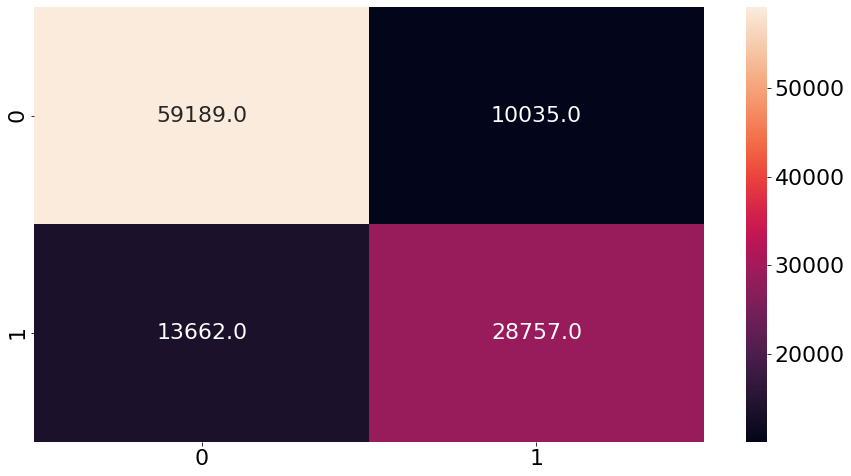

In [62]:
cm_stack = confusion_matrix(ytest,ypred_stack)
sns.heatmap(cm_stack, annot=True, fmt=".1f")

In [73]:
df = pd.DataFrame({'Baseline Linear Model':0.10,
                  'Baseline DT ':0.61,
                   'Baseline RF ':0.55,
                  'Baseline XGB ':0.59,
                  'Baseline GBM ':0.26,
                   'Gaussian NB': 0.14,
                  '10 Fold CV on RF Base Model':0.54,
                  'XGB from KBest':0.13,
                  'DT from KBest':0.50,
                  'RF using RFE':0.63,
                  'CAT Boost after Stat. Test':0.61,
                  'Tuned DT after Stat. Test':0.67,
                  'From RF Feature Importance': 0.62,
                  'From XGB Feature Importance':0.67,
                  'From XGB F-Importance on Scaled_Data':0.68,
                  'Bagging Classifier':0.67,
                  'Stacking Classifier': 0.69}, index =range(1,18))
df.iloc[1]

Baseline Linear Model                   0.10
Baseline DT                             0.61
Baseline RF                             0.55
Baseline XGB                            0.59
Baseline GBM                            0.26
Gaussian NB                             0.14
10 Fold CV on RF Base Model             0.54
XGB from KBest                          0.13
DT from KBest                           0.50
RF using RFE                            0.63
CAT Boost after Stat. Test              0.61
Tuned DT after Stat. Test               0.67
From RF Feature Importance              0.62
From XGB Feature Importance             0.67
From XGB F-Importance on Scaled_Data    0.68
Bagging Classifier                      0.67
Stacking Classifier                     0.69
Name: 2, dtype: float64

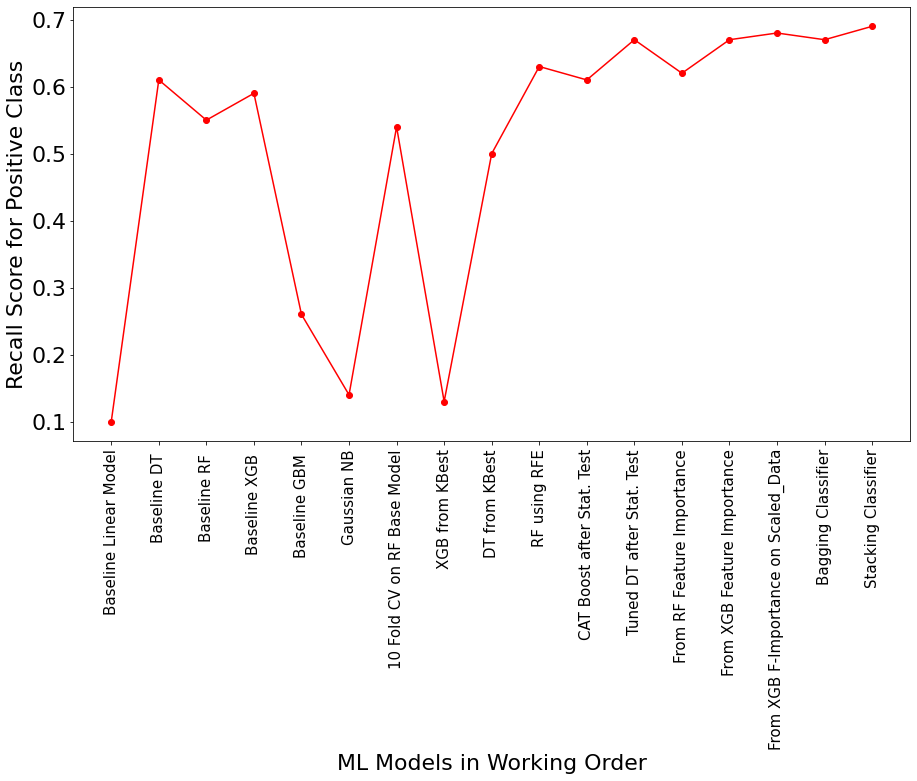

In [83]:
plt.plot(df.iloc[1],marker='o',color='r')
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.xlabel('ML Models in Working Order')
plt.ylabel('Recall Score for Positive Class')
plt.show()

                                            ROC-AUC Score:  0.836471837051513


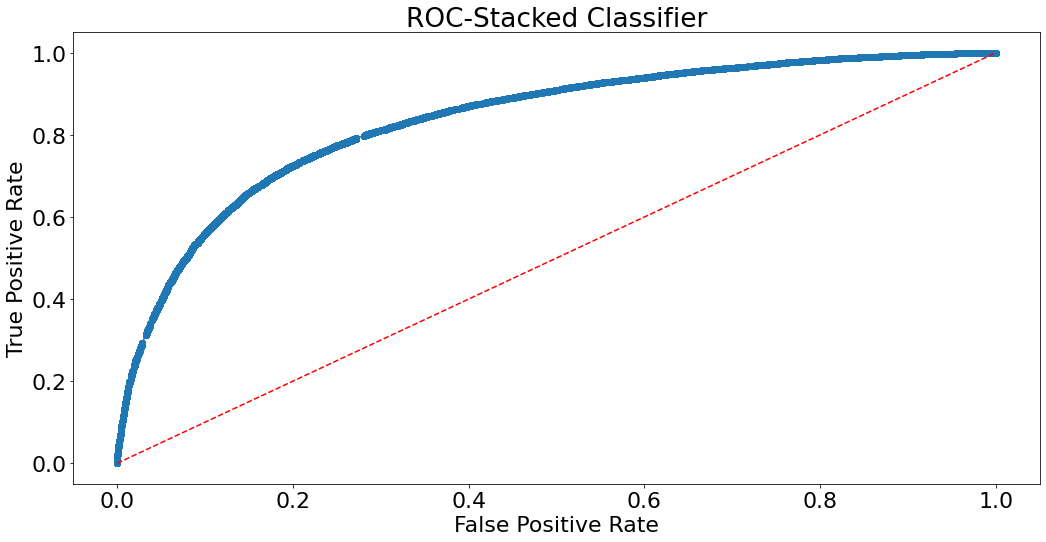

In [72]:
fpr,tpr,threshold= roc_curve(ytest,ypred_proba_stack)
plt.plot(fpr,tpr, marker ='o')
plt.plot([0,1],[0,1],'r--')

plt.title('ROC-Stacked Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('                                            ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_stack))
plt.tight_layout()
plt.show()

### Grid search on the bagging classifier rf model

In [3]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
xgb = XGBClassifier()
rf =RandomForestClassifier()

In [89]:
## Unable to process it due to Lack of Computational resources

# params = {'base_estimator__n_estimators': [5,25,50,100,150],
#          'base_estimator__max_depth': [3,6,8,10,12,16],
#          'base_estimator__criterion': ['gini','entropy'],
#          'base_estimator__min_samples_split':[5,10,15],
#          'base_estimator__min_samples_leaf':[5,10,15]
#          }

# bc = BaggingClassifier(base_estimator =rf, random_state=10)

# randmcv = RandomizedSearchCV(estimator=bc, param_distributions = params,verbose=2,
#                                cv = 5, n_iter = 10, n_jobs=-1)


# randmcv.fit(xtrain, ytrain)

# randmcv.best_params_

## Grid search on the stacking ensemble model

In [17]:
rf =RandomForestClassifier(n_estimators= 25,min_samples_split=10,min_samples_leaf=15,max_depth=16,random_state=42 )

In [18]:
bc1 = BaggingClassifier(base_estimator =rf, random_state=10)

bc1.fit(xtrain,ytrain)
ypred_bc = bc1.predict(xtest)
y_train_bc = bc1.predict(xtrain)
ypred_proba_bc = bc1.predict_proba(xtest)[:,1]

print ('Train Accuracy: ',accuracy_score(ytrain,y_train_bc))
print ('Test Accuracy: ',accuracy_score(ytest,ypred_bc), '\n')

print('ROC-AUC Score: ',roc_auc_score(ytest,ypred_proba_bc))
print('Cohen Cappa Score: ',cohen_kappa_score(ytest,ypred_bc),'\n')

print(confusion_matrix(ytest,ypred_bc),'\n')

print(classification_report(ytest,ypred_bc))

Train Accuracy:  0.7180787696386665
Test Accuracy:  0.7164443807493528 

ROC-AUC Score:  0.7693041010511091
Cohen Cappa Score:  0.34634835082702675 

[[62085  7139]
 [24518 17901]] 

              precision    recall  f1-score   support

           0       0.72      0.90      0.80     69224
           1       0.71      0.42      0.53     42419

    accuracy                           0.72    111643
   macro avg       0.72      0.66      0.66    111643
weighted avg       0.72      0.72      0.70    111643

